# Dual data types (low and high moment seperately)


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # #%load_ext autoreload
    # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import h5py
import numpy as np
import matplotlib.pyplot as plt
hardcopy=True

Notebook detected. Parallel processing is OK


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:
N=100000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=3000)
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)
ig.integrate_update_prior_attributes(f_prior_data_h5)

prior_layered:   0%|                                        | 0/100000 [00:00<?, ?it/s]

File PRIOR_CHI2_NF_3_log-uniform_N100000.h5 does not exist.


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/3125 [00:00<?, ?it/s]

gatdaem1d:   1%|▍                                    | 37/3125 [00:01<01:25, 36.24it/s]

gatdaem1d:   1%|▌                                    | 45/3125 [00:01<01:09, 44.21it/s]

gatdaem1d:   1%|▍                                    | 34/3125 [00:01<01:31, 33.95it/s]

gatdaem1d:   1%|▍                                    | 36/3125 [00:01<01:26, 35.80it/s]

gatdaem1d:   1%|▍                                    | 35/3125 [00:01<01:29, 34.35it/s]

gatdaem1d:   1%|▌                                    | 46/3125 [00:01<01:09, 44.49it/s]

gatdaem1d:   1%|▌                                    | 46/3125 [00:01<01:07, 45.78it/s]

gatdaem1d:   1%|▌                                    | 45/3125 [00:01<01:08, 44.88it/s]

gatdaem1d:   1%|▍                                    | 36/3125 [00:01<01:26, 35.68it/s]

gatdaem1d:   1%|▍                                    | 33/3125 [00:01<01:34, 32.83it/s]

gatdaem1d:   1%|▍                                    | 35/3125 [00:01<01:29, 34.61it/s]

gatdaem1d:   1%|▌                                    | 45/3125 [00:01<01:08, 44.74it/s]

gatdaem1d:   1%|▌                                    | 45/3125 [00:01<01:09, 44.62it/s]

gatdaem1d:   1%|▍                                    | 34/3125 [00:01<01:31, 33.76it/s]

gatdaem1d:   1%|▌                                    | 46/3125 [00:01<01:08, 45.20it/s]

gatdaem1d:   1%|▌                                    | 44/3125 [00:01<01:10, 43.93it/s]

gatdaem1d:   1%|▌                                    | 46/3125 [00:01<01:07, 45.50it/s]

gatdaem1d:   1%|▍                                    | 35/3125 [00:01<01:30, 34.16it/s]

gatdaem1d:   1%|▌                                    | 46/3125 [00:01<01:07, 45.50it/s]

gatdaem1d:   2%|▌                                    | 47/3125 [00:01<01:06, 46.56it/s]

gatdaem1d:   1%|▍                                    | 35/3125 [00:01<01:30, 34.14it/s]

gatdaem1d:   1%|▍                                    | 36/3125 [00:01<01:27, 35.22it/s]

gatdaem1d:   1%|▍                                    | 34/3125 [00:01<01:32, 33.40it/s]

gatdaem1d:   1%|▍                                    | 36/3125 [00:01<01:27, 35.35it/s]

gatdaem1d:   1%|▌                                    | 45/3125 [00:01<01:09, 44.10it/s]

gatdaem1d:   1%|▍                                    | 36/3125 [00:01<01:28, 35.03it/s]

gatdaem1d:   1%|▍                                    | 34/3125 [00:01<01:31, 33.69it/s]

gatdaem1d:   1%|▌                                    | 46/3125 [00:01<01:08, 45.02it/s]

gatdaem1d:   1%|▍                                    | 33/3125 [00:01<01:33, 32.95it/s]

gatdaem1d:   1%|▌                                    | 44/3125 [00:01<01:10, 43.47it/s]

gatdaem1d:   1%|▌                                    | 43/3125 [00:01<01:13, 42.18it/s]

gatdaem1d:   1%|▌                                    | 44/3125 [00:01<01:10, 43.60it/s]

gatdaem1d:   2%|▊                                    | 69/3125 [00:02<01:28, 34.40it/s]

gatdaem1d:   3%|▉                                    | 81/3125 [00:02<01:13, 41.17it/s]

gatdaem1d:   3%|█                                    | 90/3125 [00:02<01:09, 43.89it/s]

gatdaem1d:   3%|▉                                    | 81/3125 [00:02<01:14, 40.63it/s]

gatdaem1d:   2%|▉                                    | 74/3125 [00:02<01:26, 35.37it/s]

gatdaem1d:   2%|▊                                    | 68/3125 [00:02<01:30, 33.87it/s]

gatdaem1d:   3%|█                                    | 91/3125 [00:02<01:08, 44.00it/s]

gatdaem1d:   3%|█                                    | 92/3125 [00:02<01:06, 45.65it/s]

gatdaem1d:   3%|█                                    | 90/3125 [00:02<01:08, 44.37it/s]

gatdaem1d:   2%|▊                                    | 69/3125 [00:02<01:29, 34.18it/s]

gatdaem1d:   3%|▉                                    | 81/3125 [00:02<01:14, 40.93it/s]

gatdaem1d:   2%|▉                                    | 76/3125 [00:02<01:19, 38.35it/s]

gatdaem1d:   2%|▊                                    | 71/3125 [00:02<01:27, 34.83it/s]

gatdaem1d:   3%|▉                                    | 80/3125 [00:02<01:15, 40.20it/s]

gatdaem1d:   3%|█                                    | 92/3125 [00:02<01:08, 44.26it/s]

gatdaem1d:   2%|▊                                    | 72/3125 [00:02<01:28, 34.65it/s]

gatdaem1d:   3%|█                                    | 92/3125 [00:02<01:08, 44.36it/s]

gatdaem1d:   3%|█                                    | 92/3125 [00:02<01:07, 44.93it/s]

gatdaem1d:   2%|▊                                    | 72/3125 [00:02<01:28, 34.60it/s]

gatdaem1d:   2%|▊                                    | 68/3125 [00:02<01:33, 32.63it/s]

gatdaem1d:   2%|▊                                    | 70/3125 [00:02<01:32, 33.19it/s]

gatdaem1d:   3%|█                                    | 92/3125 [00:02<01:09, 43.83it/s]

gatdaem1d:   2%|▊                                    | 67/3125 [00:02<01:32, 32.99it/s]

gatdaem1d:   3%|█                                    | 94/3125 [00:02<01:08, 44.52it/s]

gatdaem1d:   3%|█                                    | 88/3125 [00:02<01:09, 43.65it/s]

gatdaem1d:   2%|▊                                    | 72/3125 [00:02<01:30, 33.82it/s]

gatdaem1d:   3%|█                                    | 88/3125 [00:02<01:10, 43.21it/s]

gatdaem1d:   3%|█                                    | 90/3125 [00:02<01:18, 38.58it/s]

gatdaem1d:   3%|█                                    | 88/3125 [00:02<01:20, 37.86it/s]

gatdaem1d:   3%|█                                    | 90/3125 [00:02<01:19, 38.30it/s]

gatdaem1d:   3%|█                                    | 92/3125 [00:02<01:18, 38.75it/s]

gatdaem1d:   3%|█                                    | 86/3125 [00:02<01:21, 37.26it/s]

gatdaem1d:   3%|█▏                                  | 105/3125 [00:03<01:26, 34.98it/s]

gatdaem1d:   4%|█▍                                  | 126/3125 [00:03<01:10, 42.58it/s]

gatdaem1d:   4%|█▌                                  | 134/3125 [00:03<01:08, 43.73it/s]

gatdaem1d:   4%|█▍                                  | 126/3125 [00:03<01:10, 42.57it/s]

gatdaem1d:   4%|█▎                                  | 110/3125 [00:03<01:24, 35.53it/s]

gatdaem1d:   4%|█▎                                  | 114/3125 [00:03<01:16, 39.11it/s]

gatdaem1d:   4%|█▍                                  | 126/3125 [00:03<01:10, 42.58it/s]

gatdaem1d:   3%|█▏                                  | 105/3125 [00:03<01:26, 34.82it/s]

gatdaem1d:   4%|█▍                                  | 121/3125 [00:03<01:12, 41.30it/s]

gatdaem1d:   4%|█▌                                  | 135/3125 [00:03<01:08, 43.47it/s]

gatdaem1d:   4%|█▍                                  | 125/3125 [00:03<01:11, 42.12it/s]

gatdaem1d:   4%|█▌                                  | 135/3125 [00:03<01:08, 43.96it/s]

gatdaem1d:   3%|█▏                                  | 107/3125 [00:03<01:26, 34.78it/s]

gatdaem1d:   4%|█▎                                  | 118/3125 [00:03<01:15, 39.65it/s]

gatdaem1d:   4%|█▌                                  | 137/3125 [00:03<01:07, 44.00it/s]

gatdaem1d:   3%|█▏                                  | 106/3125 [00:03<01:28, 33.98it/s]

gatdaem1d:   4%|█▌                                  | 137/3125 [00:03<01:07, 44.03it/s]

gatdaem1d:   3%|█▏                                  | 105/3125 [00:03<01:28, 33.96it/s]

gatdaem1d:   3%|█▏                                  | 104/3125 [00:03<01:29, 33.84it/s]

gatdaem1d:   3%|█▏                                  | 102/3125 [00:03<01:29, 33.76it/s]

gatdaem1d:   4%|█▎                                  | 118/3125 [00:03<01:16, 39.13it/s]

gatdaem1d:   4%|█▌                                  | 136/3125 [00:03<01:09, 42.93it/s]

gatdaem1d:   4%|█▌                                  | 139/3125 [00:03<01:08, 43.36it/s]

gatdaem1d:   4%|█▌                                  | 135/3125 [00:03<01:07, 44.57it/s]

gatdaem1d:   4%|█▌                                  | 138/3125 [00:03<01:14, 40.33it/s]

gatdaem1d:   4%|█▌                                  | 132/3125 [00:03<01:15, 39.51it/s]

gatdaem1d:   4%|█▍                                  | 127/3125 [00:03<01:20, 37.02it/s]

gatdaem1d:   4%|█▌                                  | 137/3125 [00:03<01:16, 39.25it/s]

gatdaem1d:   4%|█▍                                  | 129/3125 [00:03<01:21, 36.88it/s]

gatdaem1d:   4%|█▍                                  | 130/3125 [00:03<01:23, 36.01it/s]

gatdaem1d:   4%|█▍                                  | 124/3125 [00:03<01:23, 36.00it/s]

gatdaem1d:   4%|█▌                                  | 132/3125 [00:03<01:22, 36.22it/s]

gatdaem1d:   5%|█▋                                  | 151/3125 [00:04<01:16, 39.05it/s]

gatdaem1d:   6%|█▉                                  | 172/3125 [00:04<01:07, 43.52it/s]

gatdaem1d:   6%|██                                  | 178/3125 [00:04<01:07, 43.44it/s]

gatdaem1d:   5%|█▉                                  | 171/3125 [00:04<01:08, 43.38it/s]

gatdaem1d:   5%|█▋                                  | 146/3125 [00:04<01:23, 35.58it/s]

gatdaem1d:   5%|█▊                                  | 160/3125 [00:04<01:11, 41.59it/s]

gatdaem1d:   5%|█▋                                  | 150/3125 [00:04<01:16, 38.65it/s]

gatdaem1d:   6%|██                                  | 179/3125 [00:04<01:07, 43.96it/s]

gatdaem1d:   5%|█▉                                  | 169/3125 [00:04<01:09, 42.61it/s]

gatdaem1d:   5%|█▋                                  | 143/3125 [00:04<01:25, 34.89it/s]

gatdaem1d:   5%|█▉                                  | 164/3125 [00:04<01:10, 41.88it/s]

gatdaem1d:   5%|█▋                                  | 150/3125 [00:04<01:18, 37.76it/s]

gatdaem1d:   4%|█▌                                  | 139/3125 [00:04<01:28, 33.86it/s]

gatdaem1d:   4%|█▌                                  | 137/3125 [00:04<01:27, 34.17it/s]

gatdaem1d:   5%|█▋                                  | 142/3125 [00:04<01:24, 35.26it/s]

gatdaem1d:   6%|██                                  | 182/3125 [00:04<01:07, 43.64it/s]

gatdaem1d:   5%|█▊                                  | 162/3125 [00:04<01:12, 40.85it/s]

gatdaem1d:   6%|██                                  | 183/3125 [00:04<01:07, 43.59it/s]

gatdaem1d:   6%|██                                  | 180/3125 [00:04<01:06, 44.19it/s]

gatdaem1d:   5%|█▉                                  | 163/3125 [00:04<01:18, 37.80it/s]

gatdaem1d:   5%|█▉                                  | 169/3125 [00:04<01:16, 38.77it/s]

gatdaem1d:   6%|██                                  | 179/3125 [00:04<01:14, 39.58it/s]

gatdaem1d:   6%|██                                  | 182/3125 [00:04<01:12, 40.35it/s]

gatdaem1d:   6%|██                                  | 179/3125 [00:04<01:14, 39.77it/s]

gatdaem1d:   5%|█▉                                  | 171/3125 [00:04<01:15, 39.27it/s]

gatdaem1d:   6%|██                                  | 179/3125 [00:04<01:16, 38.31it/s]

gatdaem1d:   5%|█▉                                  | 167/3125 [00:04<01:21, 36.51it/s]

gatdaem1d:   5%|█▉                                  | 168/3125 [00:04<01:16, 38.78it/s]

gatdaem1d:   6%|█▉                                  | 172/3125 [00:04<01:19, 37.22it/s]

gatdaem1d:   6%|██                                  | 177/3125 [00:04<01:19, 37.16it/s]

gatdaem1d:   5%|█▉                                  | 167/3125 [00:04<01:24, 34.98it/s]

gatdaem1d:   5%|█▉                                  | 169/3125 [00:04<01:23, 35.44it/s]

gatdaem1d:   6%|██▎                                 | 196/3125 [00:05<01:11, 41.07it/s]

gatdaem1d:   7%|██▍                                 | 216/3125 [00:05<01:06, 43.47it/s]

gatdaem1d:   6%|██                                  | 182/3125 [00:05<01:22, 35.68it/s]

gatdaem1d:   7%|██▌                                 | 222/3125 [00:05<01:07, 43.07it/s]

gatdaem1d:   7%|██▎                                 | 204/3125 [00:05<01:09, 42.16it/s]

gatdaem1d:   7%|██▌                                 | 224/3125 [00:05<01:05, 44.17it/s]

gatdaem1d:   6%|██▏                                 | 194/3125 [00:05<01:12, 40.22it/s]

gatdaem1d:   7%|██▍                                 | 213/3125 [00:05<01:07, 42.92it/s]

gatdaem1d:   7%|██▍                                 | 209/3125 [00:05<01:08, 42.72it/s]

gatdaem1d:   6%|██▏                                 | 190/3125 [00:05<01:16, 38.30it/s]

gatdaem1d:   6%|█▉                                  | 173/3125 [00:05<01:28, 33.49it/s]

gatdaem1d:   7%|██▋                                 | 228/3125 [00:05<01:05, 44.45it/s]

gatdaem1d:   6%|██                                  | 178/3125 [00:05<01:26, 34.15it/s]

gatdaem1d:   7%|██▎                                 | 206/3125 [00:05<01:10, 41.69it/s]

gatdaem1d:   7%|██▋                                 | 229/3125 [00:05<01:05, 44.11it/s]

gatdaem1d:   6%|█▉                                  | 172/3125 [00:05<01:28, 33.38it/s]

gatdaem1d:   7%|██▌                                 | 225/3125 [00:05<01:05, 44.15it/s]

gatdaem1d:   6%|██                                  | 178/3125 [00:05<01:26, 33.93it/s]

gatdaem1d:   7%|██▍                                 | 215/3125 [00:05<01:13, 39.37it/s]

gatdaem1d:   7%|██▍                                 | 214/3125 [00:05<01:11, 40.50it/s]

gatdaem1d:   7%|██▍                                 | 216/3125 [00:05<01:10, 41.06it/s]

gatdaem1d:   6%|██▎                                 | 202/3125 [00:05<01:19, 36.73it/s]

gatdaem1d:   7%|██▍                                 | 212/3125 [00:05<01:12, 40.34it/s]

gatdaem1d:   7%|██▎                                 | 204/3125 [00:05<01:21, 35.96it/s]

gatdaem1d:   7%|██▌                                 | 218/3125 [00:05<01:12, 39.90it/s]

gatdaem1d:   7%|██▌                                 | 223/3125 [00:05<01:16, 37.93it/s]

gatdaem1d:   7%|██▌                                 | 220/3125 [00:05<01:17, 37.57it/s]

gatdaem1d:   7%|██▌                                 | 220/3125 [00:05<01:18, 36.91it/s]

gatdaem1d:   7%|██▌                                 | 218/3125 [00:05<01:17, 37.43it/s]

gatdaem1d:   7%|██▎                                 | 204/3125 [00:05<01:22, 35.33it/s]

gatdaem1d:   7%|██▎                                 | 205/3125 [00:05<01:22, 35.38it/s]

gatdaem1d:   7%|██▍                                 | 215/3125 [00:05<01:20, 35.96it/s]

gatdaem1d:   8%|██▊                                 | 240/3125 [00:06<01:08, 41.97it/s]

gatdaem1d:   8%|███                                 | 261/3125 [00:06<01:05, 43.91it/s]

gatdaem1d:   9%|███                                 | 266/3125 [00:06<01:06, 43.30it/s]

gatdaem1d:   8%|██▊                                 | 249/3125 [00:06<01:06, 43.11it/s]

gatdaem1d:   7%|██▌                                 | 218/3125 [00:06<01:22, 35.19it/s]

gatdaem1d:   8%|██▋                                 | 238/3125 [00:06<01:09, 41.31it/s]

gatdaem1d:   8%|██▉                                 | 255/3125 [00:06<01:06, 43.48it/s]

gatdaem1d:   9%|███                                 | 269/3125 [00:06<01:05, 43.38it/s]

gatdaem1d:   9%|███▏                                | 273/3125 [00:06<01:04, 44.40it/s]

gatdaem1d:   7%|██▍                                 | 207/3125 [00:06<01:27, 33.43it/s]

gatdaem1d:   8%|██▉                                 | 250/3125 [00:06<01:07, 42.35it/s]

gatdaem1d:   7%|██▍                                 | 213/3125 [00:06<01:25, 34.11it/s]

gatdaem1d:   8%|██▉                                 | 256/3125 [00:06<01:09, 41.11it/s]

gatdaem1d:   7%|██▎                                 | 206/3125 [00:06<01:27, 33.53it/s]

gatdaem1d:   9%|███▏                                | 274/3125 [00:06<01:05, 43.79it/s]

gatdaem1d:   7%|██▍                                 | 213/3125 [00:06<01:25, 33.97it/s]

gatdaem1d:   7%|██▋                                 | 229/3125 [00:06<01:19, 36.44it/s]

gatdaem1d:   8%|██▉                                 | 260/3125 [00:06<01:07, 42.16it/s]

gatdaem1d:   8%|██▉                                 | 259/3125 [00:06<01:08, 41.56it/s]

gatdaem1d:   9%|███                                 | 270/3125 [00:06<01:08, 41.62it/s]

gatdaem1d:   8%|██▉                                 | 255/3125 [00:06<01:15, 37.83it/s]

gatdaem1d:   8%|██▉                                 | 257/3125 [00:06<01:08, 41.76it/s]

gatdaem1d:   8%|██▊                                 | 240/3125 [00:06<01:20, 35.73it/s]

gatdaem1d:   8%|███                                 | 262/3125 [00:06<01:09, 41.03it/s]

gatdaem1d:   8%|██▉                                 | 260/3125 [00:06<01:15, 38.19it/s]

gatdaem1d:   8%|██▉                                 | 251/3125 [00:06<01:14, 38.60it/s]

gatdaem1d:   8%|███                                 | 262/3125 [00:06<01:17, 37.00it/s]

gatdaem1d:   8%|██▊                                 | 241/3125 [00:06<01:22, 34.96it/s]

gatdaem1d:   8%|██▉                                 | 256/3125 [00:06<01:18, 36.60it/s]

gatdaem1d:   8%|██▊                                 | 240/3125 [00:06<01:22, 34.78it/s]

gatdaem1d:   8%|██▉                                 | 258/3125 [00:06<01:21, 35.07it/s]

gatdaem1d:   8%|██▉                                 | 252/3125 [00:06<01:22, 34.91it/s]

gatdaem1d:   9%|███▎                                | 285/3125 [00:07<01:06, 42.74it/s]

gatdaem1d:  10%|███▌                                | 306/3125 [00:07<01:03, 44.13it/s]

gatdaem1d:   9%|███▍                                | 293/3125 [00:07<01:05, 43.19it/s]

gatdaem1d:  10%|███▌                                | 310/3125 [00:07<01:05, 43.12it/s]

gatdaem1d:   9%|███▏                                | 282/3125 [00:07<01:07, 42.00it/s]

gatdaem1d:  10%|███▍                                | 299/3125 [00:07<01:04, 43.63it/s]

gatdaem1d:   8%|██▉                                 | 254/3125 [00:07<01:22, 34.79it/s]

gatdaem1d:  10%|███▌                                | 313/3125 [00:07<01:04, 43.54it/s]

gatdaem1d:  10%|███▋                                | 318/3125 [00:07<01:03, 44.42it/s]

gatdaem1d:   9%|███▍                                | 296/3125 [00:07<01:05, 43.43it/s]

gatdaem1d:   8%|██▉                                 | 250/3125 [00:07<01:18, 36.83it/s]

gatdaem1d:   8%|██▊                                 | 248/3125 [00:07<01:24, 33.97it/s]

gatdaem1d:   8%|██▊                                 | 241/3125 [00:07<01:27, 32.80it/s]

gatdaem1d:  10%|███▋                                | 318/3125 [00:07<01:04, 43.82it/s]

gatdaem1d:   8%|██▊                                 | 248/3125 [00:07<01:25, 33.84it/s]

gatdaem1d:  10%|███▌                                | 306/3125 [00:07<01:05, 43.14it/s]

gatdaem1d:   9%|███                                 | 266/3125 [00:07<01:19, 35.74it/s]

gatdaem1d:  10%|███▍                                | 298/3125 [00:07<01:12, 38.99it/s]

gatdaem1d:  10%|███▌                                | 304/3125 [00:07<01:06, 42.45it/s]

gatdaem1d:   9%|███▍                                | 294/3125 [00:07<01:15, 37.51it/s]

gatdaem1d:  10%|███▍                                | 301/3125 [00:07<01:06, 42.28it/s]

gatdaem1d:   9%|███▏                                | 276/3125 [00:07<01:20, 35.51it/s]

gatdaem1d:  10%|███▌                                | 312/3125 [00:07<01:11, 39.40it/s]

gatdaem1d:  10%|███▍                                | 299/3125 [00:07<01:15, 37.58it/s]

gatdaem1d:   9%|███▎                                | 287/3125 [00:07<01:14, 38.18it/s]

gatdaem1d:   9%|███▍                                | 296/3125 [00:07<01:15, 37.43it/s]

gatdaem1d:   9%|███▏                                | 275/3125 [00:07<01:22, 34.66it/s]

gatdaem1d:  10%|███▌                                | 304/3125 [00:07<01:12, 38.73it/s]

gatdaem1d:  10%|███▍                                | 300/3125 [00:07<01:18, 36.03it/s]

gatdaem1d:   9%|███▎                                | 290/3125 [00:07<01:16, 37.21it/s]

gatdaem1d:   9%|███▎                                | 288/3125 [00:07<01:20, 35.23it/s]

gatdaem1d:   9%|███▍                                | 294/3125 [00:07<01:21, 34.81it/s]

gatdaem1d:  11%|███▊                                | 330/3125 [00:08<01:04, 43.25it/s]

gatdaem1d:  11%|████                                | 351/3125 [00:08<01:02, 44.15it/s]

gatdaem1d:  11%|███▉                                | 339/3125 [00:08<01:03, 43.96it/s]

gatdaem1d:  11%|████                                | 354/3125 [00:08<01:04, 43.02it/s]

gatdaem1d:  11%|███▉                                | 345/3125 [00:08<01:02, 44.16it/s]

gatdaem1d:  11%|████                                | 357/3125 [00:08<01:03, 43.55it/s]

gatdaem1d:  10%|███▍                                | 299/3125 [00:08<01:15, 37.68it/s]

gatdaem1d:  11%|███▉                                | 340/3125 [00:08<01:03, 43.61it/s]

gatdaem1d:  12%|████▏                               | 363/3125 [00:08<01:02, 44.38it/s]

gatdaem1d:   9%|███▎                                | 288/3125 [00:08<01:19, 35.65it/s]

gatdaem1d:   9%|███▍                                | 295/3125 [00:08<01:12, 39.15it/s]

gatdaem1d:   9%|███▏                                | 276/3125 [00:08<01:25, 33.22it/s]

gatdaem1d:  12%|████▏                               | 362/3125 [00:08<01:03, 43.28it/s]

gatdaem1d:   9%|███▏                                | 282/3125 [00:08<01:24, 33.75it/s]

gatdaem1d:  10%|███▋                                | 325/3125 [00:08<01:11, 39.10it/s]

gatdaem1d:  11%|████                                | 351/3125 [00:08<01:03, 43.56it/s]

gatdaem1d:  10%|███▍                                | 303/3125 [00:08<01:18, 35.78it/s]

gatdaem1d:  11%|████                                | 349/3125 [00:08<01:04, 43.05it/s]

gatdaem1d:  11%|███▉                                | 338/3125 [00:08<01:14, 37.25it/s]

gatdaem1d:  11%|███▊                                | 332/3125 [00:08<01:16, 36.67it/s]

gatdaem1d:  10%|███▌                                | 312/3125 [00:08<01:21, 34.32it/s]

gatdaem1d:  11%|███▊                                | 332/3125 [00:08<01:09, 39.91it/s]

gatdaem1d:  11%|███▉                                | 344/3125 [00:08<01:09, 40.02it/s]

gatdaem1d:  10%|███▌                                | 310/3125 [00:08<01:21, 34.48it/s]

gatdaem1d:  11%|███▊                                | 334/3125 [00:08<01:15, 36.76it/s]

gatdaem1d:  11%|███▉                                | 337/3125 [00:08<01:16, 36.23it/s]

gatdaem1d:  11%|███▊                                | 333/3125 [00:08<01:12, 38.62it/s]

gatdaem1d:  11%|████                                | 352/3125 [00:08<01:13, 37.49it/s]

gatdaem1d:  11%|███▊                                | 330/3125 [00:08<01:15, 37.16it/s]

gatdaem1d:  11%|███▉                                | 337/3125 [00:08<01:18, 35.45it/s]

gatdaem1d:  11%|███▊                                | 330/3125 [00:08<01:21, 34.30it/s]

gatdaem1d:  11%|███▉                                | 344/3125 [00:08<01:14, 37.41it/s]

gatdaem1d:  12%|████▎                               | 374/3125 [00:09<01:03, 43.13it/s]

gatdaem1d:  12%|████▍                               | 384/3125 [00:09<01:01, 44.22it/s]

gatdaem1d:  13%|████▌                               | 396/3125 [00:09<01:02, 43.71it/s]

gatdaem1d:  13%|████▌                               | 398/3125 [00:09<01:03, 42.94it/s]

gatdaem1d:  13%|████▌                               | 401/3125 [00:09<01:02, 43.68it/s]

gatdaem1d:  11%|███▉                                | 343/3125 [00:09<01:10, 39.54it/s]

gatdaem1d:  12%|████▍                               | 390/3125 [00:09<01:01, 44.12it/s]

gatdaem1d:  13%|████▋                               | 409/3125 [00:09<01:00, 44.86it/s]

gatdaem1d:  12%|████▍                               | 385/3125 [00:09<01:02, 43.66it/s]

gatdaem1d:  11%|███▉                                | 340/3125 [00:09<01:08, 40.75it/s]

gatdaem1d:  10%|███▌                                | 310/3125 [00:09<01:24, 33.38it/s]

gatdaem1d:  10%|███▋                                | 324/3125 [00:09<01:19, 35.31it/s]

gatdaem1d:  13%|████▋                               | 406/3125 [00:09<01:02, 43.47it/s]

gatdaem1d:  10%|███▋                                | 318/3125 [00:09<01:21, 34.29it/s]

gatdaem1d:  13%|████▌                               | 396/3125 [00:09<01:02, 43.75it/s]

gatdaem1d:  11%|███▉                                | 341/3125 [00:09<01:16, 36.27it/s]

gatdaem1d:  13%|████▌                               | 394/3125 [00:09<01:02, 43.50it/s]

gatdaem1d:  12%|████▏                               | 365/3125 [00:09<01:13, 37.46it/s]

gatdaem1d:  12%|████▍                               | 384/3125 [00:09<01:09, 39.61it/s]

gatdaem1d:  11%|███▉                                | 347/3125 [00:09<01:20, 34.48it/s]

gatdaem1d:  12%|████▎                               | 378/3125 [00:09<01:06, 41.46it/s]

gatdaem1d:  12%|████▎                               | 369/3125 [00:09<01:17, 35.48it/s]

gatdaem1d:  12%|████▎                               | 371/3125 [00:09<01:15, 36.59it/s]

gatdaem1d:  11%|███▉                                | 345/3125 [00:09<01:21, 34.01it/s]

gatdaem1d:  12%|████▎                               | 374/3125 [00:09<01:16, 35.77it/s]

gatdaem1d:  12%|████▎                               | 374/3125 [00:09<01:10, 38.97it/s]

gatdaem1d:  12%|████▍                               | 390/3125 [00:09<01:14, 36.67it/s]

gatdaem1d:  12%|████▍                               | 385/3125 [00:09<01:11, 38.20it/s]

gatdaem1d:  12%|████▏                               | 365/3125 [00:09<01:20, 34.32it/s]

gatdaem1d:  12%|████▎                               | 373/3125 [00:09<01:19, 34.82it/s]

gatdaem1d:  12%|████▎                               | 372/3125 [00:09<01:14, 37.15it/s]

gatdaem1d:  12%|████▍                               | 382/3125 [00:09<01:15, 36.16it/s]

gatdaem1d:  13%|████▊                               | 418/3125 [00:10<01:02, 43.03it/s]

gatdaem1d:  14%|█████                               | 440/3125 [00:10<01:01, 43.63it/s]

gatdaem1d:  14%|████▉                               | 429/3125 [00:10<01:01, 44.02it/s]

gatdaem1d:  14%|█████                               | 441/3125 [00:10<01:02, 42.92it/s]

gatdaem1d:  12%|████▍                               | 387/3125 [00:10<01:07, 40.66it/s]

gatdaem1d:  14%|████▉                               | 430/3125 [00:10<01:01, 43.82it/s]

gatdaem1d:  14%|█████                               | 435/3125 [00:10<01:01, 43.71it/s]

gatdaem1d:  15%|█████▏                              | 454/3125 [00:10<01:00, 44.33it/s]

gatdaem1d:  12%|████▍                               | 383/3125 [00:10<01:06, 41.17it/s]

gatdaem1d:  11%|████                                | 353/3125 [00:10<01:16, 36.02it/s]

gatdaem1d:  12%|████▏                               | 360/3125 [00:10<01:18, 35.11it/s]

gatdaem1d:  14%|█████▏                              | 450/3125 [00:10<01:01, 43.24it/s]

gatdaem1d:  11%|████                                | 353/3125 [00:10<01:20, 34.30it/s]

gatdaem1d:  14%|█████                               | 440/3125 [00:10<01:01, 43.63it/s]

gatdaem1d:  14%|█████▏                              | 445/3125 [00:10<01:06, 40.26it/s]

gatdaem1d:  14%|█████                               | 439/3125 [00:10<01:01, 43.78it/s]

gatdaem1d:  12%|████▎                               | 378/3125 [00:10<01:17, 35.56it/s]

gatdaem1d:  14%|████▉                               | 430/3125 [00:10<01:05, 41.18it/s]

gatdaem1d:  13%|████▋                               | 403/3125 [00:10<01:15, 35.83it/s]

gatdaem1d:  12%|████▍                               | 383/3125 [00:10<01:18, 34.72it/s]

gatdaem1d:  14%|████▊                               | 423/3125 [00:10<01:03, 42.28it/s]

gatdaem1d:  13%|████▋                               | 405/3125 [00:10<01:17, 34.95it/s]

gatdaem1d:  13%|████▋                               | 408/3125 [00:10<01:14, 36.34it/s]

gatdaem1d:  12%|████▍                               | 380/3125 [00:10<01:21, 33.76it/s]

gatdaem1d:  13%|████▊                               | 418/3125 [00:10<01:07, 40.27it/s]

gatdaem1d:  13%|████▋                               | 410/3125 [00:10<01:17, 34.85it/s]

gatdaem1d:  13%|████▋                               | 409/3125 [00:10<01:17, 35.00it/s]

gatdaem1d:  13%|████▌                               | 400/3125 [00:11<01:20, 33.74it/s]

gatdaem1d:  14%|████▉                               | 427/3125 [00:10<01:15, 35.78it/s]

gatdaem1d:  14%|████▉                               | 424/3125 [00:10<01:13, 36.90it/s]

gatdaem1d:  13%|████▋                               | 410/3125 [00:11<01:15, 36.05it/s]

gatdaem1d:  15%|█████▎                              | 462/3125 [00:11<01:01, 43.28it/s]

gatdaem1d:  15%|█████▌                              | 484/3125 [00:11<01:00, 43.52it/s]

gatdaem1d:  16%|█████▌                              | 486/3125 [00:11<01:00, 43.35it/s]

gatdaem1d:  13%|████▊                               | 419/3125 [00:11<01:16, 35.46it/s]

gatdaem1d:  15%|█████▍                              | 474/3125 [00:11<01:00, 43.82it/s]

gatdaem1d:  14%|████▉                               | 431/3125 [00:11<01:04, 41.65it/s]

gatdaem1d:  15%|█████▌                              | 480/3125 [00:11<01:00, 43.85it/s]

gatdaem1d:  15%|█████▍                              | 475/3125 [00:11<01:00, 43.89it/s]

gatdaem1d:  14%|████▉                               | 429/3125 [00:11<01:03, 42.46it/s]

gatdaem1d:  13%|████▌                               | 398/3125 [00:11<01:10, 38.54it/s]

gatdaem1d:  13%|████▋                               | 404/3125 [00:11<01:12, 37.74it/s]

gatdaem1d:  16%|█████▋                              | 495/3125 [00:11<01:00, 43.51it/s]

gatdaem1d:  16%|█████▌                              | 485/3125 [00:11<00:59, 44.03it/s]

gatdaem1d:  12%|████▍                               | 388/3125 [00:11<01:20, 34.17it/s]

gatdaem1d:  15%|█████▌                              | 483/3125 [00:11<01:00, 43.73it/s]

gatdaem1d:  13%|████▊                               | 414/3125 [00:11<01:16, 35.41it/s]

gatdaem1d:  16%|█████▋                              | 499/3125 [00:11<01:04, 40.67it/s]

gatdaem1d:  15%|█████▍                              | 474/3125 [00:11<01:03, 41.99it/s]

gatdaem1d:  16%|█████▌                              | 486/3125 [00:11<01:09, 38.12it/s]

gatdaem1d:  13%|████▊                               | 418/3125 [00:11<01:18, 34.34it/s]

gatdaem1d:  14%|█████                               | 440/3125 [00:11<01:15, 35.53it/s]

gatdaem1d:  14%|█████▏                              | 445/3125 [00:11<01:14, 36.20it/s]

gatdaem1d:  14%|█████                               | 441/3125 [00:11<01:17, 34.81it/s]

gatdaem1d:  13%|████▊                               | 415/3125 [00:11<01:19, 34.10it/s]

gatdaem1d:  15%|█████▎                              | 462/3125 [00:11<01:04, 41.29it/s]

gatdaem1d:  15%|█████▎                              | 466/3125 [00:11<01:05, 40.69it/s]

gatdaem1d:  14%|█████▏                              | 445/3125 [00:11<01:17, 34.54it/s]

gatdaem1d:  14%|████▉                               | 434/3125 [00:12<01:20, 33.61it/s]

gatdaem1d:  15%|█████▍                              | 471/3125 [00:11<01:10, 37.89it/s]

gatdaem1d:  14%|█████▏                              | 445/3125 [00:12<01:18, 34.29it/s]

gatdaem1d:  16%|█████▊                              | 509/3125 [00:12<00:59, 44.23it/s]

gatdaem1d:  17%|██████                              | 528/3125 [00:12<00:59, 43.55it/s]

gatdaem1d:  14%|█████▏                              | 447/3125 [00:12<01:15, 35.52it/s]

gatdaem1d:  17%|██████                              | 530/3125 [00:12<00:59, 43.43it/s]

gatdaem1d:  17%|█████▉                              | 520/3125 [00:12<00:58, 44.38it/s]

gatdaem1d:  15%|█████▍                              | 477/3125 [00:12<01:01, 42.73it/s]

gatdaem1d:  15%|█████▏                              | 455/3125 [00:12<01:16, 35.09it/s]

gatdaem1d:  17%|██████                              | 524/3125 [00:12<00:59, 43.89it/s]

gatdaem1d:  17%|█████▉                              | 520/3125 [00:12<00:58, 44.19it/s]

gatdaem1d:  15%|█████▎                              | 462/3125 [00:12<01:15, 35.32it/s]

gatdaem1d:  15%|█████▍                              | 474/3125 [00:12<01:01, 42.99it/s]

gatdaem1d:  14%|█████                               | 441/3125 [00:12<01:07, 39.74it/s]

gatdaem1d:  14%|█████▏                              | 448/3125 [00:12<01:07, 39.51it/s]

gatdaem1d:  17%|██████▏                             | 540/3125 [00:12<00:58, 43.91it/s]

gatdaem1d:  17%|██████                              | 531/3125 [00:12<00:58, 44.46it/s]

gatdaem1d:  14%|████▊                               | 423/3125 [00:12<01:18, 34.25it/s]

gatdaem1d:  17%|██████                              | 529/3125 [00:12<00:58, 44.21it/s]

gatdaem1d:  14%|█████▏                              | 450/3125 [00:12<01:15, 35.33it/s]

gatdaem1d:  17%|█████▉                              | 518/3125 [00:12<01:01, 42.06it/s]

gatdaem1d:  17%|██████▏                             | 541/3125 [00:12<01:07, 38.56it/s]

gatdaem1d:  15%|█████▍                              | 476/3125 [00:12<01:15, 35.27it/s]

gatdaem1d:  14%|█████▏                              | 453/3125 [00:12<01:18, 33.86it/s]

gatdaem1d:  17%|██████                              | 525/3125 [00:12<01:11, 36.33it/s]

gatdaem1d:  15%|█████▍                              | 476/3125 [00:12<01:16, 34.44it/s]

gatdaem1d:  16%|█████▊                              | 507/3125 [00:12<01:02, 42.19it/s]

gatdaem1d:  15%|█████▌                              | 482/3125 [00:12<01:13, 35.73it/s]

gatdaem1d:  14%|█████▏                              | 450/3125 [00:12<01:19, 33.77it/s]

gatdaem1d:  16%|█████▊                              | 507/3125 [00:13<01:07, 38.97it/s]

gatdaem1d:  16%|█████▋                              | 489/3125 [00:13<01:11, 37.08it/s]

gatdaem1d:  15%|█████▌                              | 480/3125 [00:13<01:18, 33.86it/s]

gatdaem1d:  15%|█████▍                              | 468/3125 [00:13<01:20, 33.16it/s]

gatdaem1d:  18%|██████▍                             | 556/3125 [00:13<00:57, 44.84it/s]

gatdaem1d:  16%|█████▉                              | 510/3125 [00:13<01:11, 36.72it/s]

gatdaem1d:  18%|██████▌                             | 574/3125 [00:13<00:58, 43.47it/s]

gatdaem1d:  18%|██████▌                             | 565/3125 [00:13<00:57, 44.31it/s]

gatdaem1d:  18%|██████▌                             | 572/3125 [00:13<00:59, 43.07it/s]

gatdaem1d:  15%|█████▌                              | 483/3125 [00:13<01:15, 35.22it/s]

gatdaem1d:  17%|██████                              | 522/3125 [00:13<01:00, 43.17it/s]

gatdaem1d:  16%|█████▋                              | 499/3125 [00:13<01:10, 37.48it/s]

gatdaem1d:  18%|██████▌                             | 569/3125 [00:13<00:58, 43.94it/s]

gatdaem1d:  18%|██████▌                             | 567/3125 [00:13<00:57, 44.76it/s]

gatdaem1d:  16%|█████▋                              | 498/3125 [00:13<01:15, 34.98it/s]

gatdaem1d:  17%|█████▉                              | 518/3125 [00:13<01:00, 42.94it/s]

gatdaem1d:  16%|█████▋                              | 492/3125 [00:13<01:04, 40.56it/s]

gatdaem1d:  19%|██████▋                             | 584/3125 [00:13<00:58, 43.41it/s]

gatdaem1d:  15%|█████▌                              | 481/3125 [00:13<01:08, 38.67it/s]

gatdaem1d:  18%|██████▋                             | 576/3125 [00:13<00:57, 44.35it/s]

gatdaem1d:  15%|█████▎                              | 458/3125 [00:13<01:18, 33.94it/s]

gatdaem1d:  18%|██████▌                             | 574/3125 [00:13<00:57, 44.25it/s]

gatdaem1d:  16%|█████▌                              | 486/3125 [00:13<01:15, 34.79it/s]

gatdaem1d:  16%|█████▉                              | 512/3125 [00:13<01:14, 35.15it/s]

gatdaem1d:  18%|██████▍                             | 561/3125 [00:13<01:04, 40.02it/s]

gatdaem1d:  16%|█████▌                              | 487/3125 [00:13<01:19, 33.37it/s]

gatdaem1d:  17%|██████                              | 525/3125 [00:13<01:08, 37.69it/s]

gatdaem1d:  16%|█████▉                              | 511/3125 [00:13<01:16, 34.16it/s]

gatdaem1d:  18%|██████▍                             | 562/3125 [00:13<01:11, 35.76it/s]

gatdaem1d:  16%|█████▋                              | 496/3125 [00:13<01:10, 37.09it/s]

gatdaem1d:  19%|██████▋                             | 581/3125 [00:13<01:08, 37.17it/s]

gatdaem1d:  17%|██████▏                             | 535/3125 [00:14<01:05, 39.39it/s]

gatdaem1d:  17%|█████▉                              | 518/3125 [00:14<01:15, 34.74it/s]

gatdaem1d:  16%|█████▊                              | 503/3125 [00:14<01:18, 33.46it/s]

gatdaem1d:  18%|██████▎                             | 550/3125 [00:14<01:05, 39.19it/s]

gatdaem1d:  19%|██████▉                             | 601/3125 [00:14<00:57, 43.99it/s]

gatdaem1d:  18%|██████▎                             | 547/3125 [00:14<01:08, 37.77it/s]

gatdaem1d:  20%|███████                             | 618/3125 [00:14<00:57, 43.36it/s]

gatdaem1d:  20%|███████                             | 610/3125 [00:14<00:56, 44.34it/s]

gatdaem1d:  20%|███████                             | 616/3125 [00:14<00:58, 43.16it/s]

gatdaem1d:  17%|█████▉                              | 519/3125 [00:14<01:14, 35.10it/s]

gatdaem1d:  18%|██████▌                             | 566/3125 [00:14<00:59, 43.26it/s]

gatdaem1d:  17%|██████▎                             | 544/3125 [00:14<01:05, 39.45it/s]

gatdaem1d:  20%|███████                             | 613/3125 [00:14<00:57, 43.67it/s]

gatdaem1d:  18%|██████▎                             | 547/3125 [00:14<01:12, 35.56it/s]

gatdaem1d:  17%|██████▏                             | 542/3125 [00:14<01:09, 37.28it/s]

gatdaem1d:  17%|██████▏                             | 536/3125 [00:14<01:02, 41.57it/s]

gatdaem1d:  20%|███████▎                            | 630/3125 [00:14<00:56, 43.88it/s]

gatdaem1d:  20%|███████▏                            | 622/3125 [00:14<00:55, 44.77it/s]

gatdaem1d:  16%|█████▋                              | 492/3125 [00:14<01:18, 33.43it/s]

gatdaem1d:  17%|█████▉                              | 520/3125 [00:14<01:09, 37.38it/s]

gatdaem1d:  17%|██████                              | 531/3125 [00:14<01:08, 37.62it/s]

gatdaem1d:  18%|██████▍                             | 561/3125 [00:14<01:05, 39.37it/s]

gatdaem1d:  20%|███████▏                            | 619/3125 [00:14<00:59, 42.41it/s]

gatdaem1d:  20%|███████                             | 612/3125 [00:14<01:04, 39.14it/s]

gatdaem1d:  19%|██████▉                             | 605/3125 [00:14<01:01, 41.15it/s]

gatdaem1d:  18%|██████▎                             | 548/3125 [00:14<01:13, 34.99it/s]

gatdaem1d:  17%|██████                              | 522/3125 [00:14<01:17, 33.51it/s]

gatdaem1d:  17%|██████▎                             | 546/3125 [00:14<01:14, 34.40it/s]

gatdaem1d:  19%|██████▉                             | 606/3125 [00:14<01:06, 37.99it/s]

gatdaem1d:  18%|██████▌                             | 570/3125 [00:14<01:04, 39.64it/s]

gatdaem1d:  20%|███████▏                            | 625/3125 [00:14<01:04, 38.86it/s]

gatdaem1d:  17%|██████▏                             | 534/3125 [00:15<01:11, 36.41it/s]

gatdaem1d:  19%|██████▋                             | 579/3125 [00:15<01:02, 40.70it/s]

gatdaem1d:  18%|██████▎                             | 553/3125 [00:15<01:14, 34.73it/s]

gatdaem1d:  17%|██████▏                             | 537/3125 [00:15<01:17, 33.57it/s]

gatdaem1d:  19%|██████▊                             | 596/3125 [00:15<01:01, 40.87it/s]

gatdaem1d:  21%|███████▋                            | 663/3125 [00:15<00:55, 44.20it/s]

gatdaem1d:  21%|███████▋                            | 662/3125 [00:15<00:56, 43.26it/s]

gatdaem1d:  18%|██████▍                             | 555/3125 [00:15<01:12, 35.22it/s]

gatdaem1d:  20%|███████                             | 610/3125 [00:15<00:58, 43.11it/s]

gatdaem1d:  21%|███████▌                            | 658/3125 [00:15<00:56, 43.85it/s]

gatdaem1d:  19%|██████▋                             | 585/3125 [00:15<01:09, 36.39it/s]

gatdaem1d:  19%|██████▊                             | 586/3125 [00:15<01:04, 39.06it/s]

gatdaem1d:  19%|██████▋                             | 580/3125 [00:15<01:00, 42.17it/s]

gatdaem1d:  19%|██████▋                             | 583/3125 [00:15<01:13, 34.59it/s]

gatdaem1d:  22%|███████▊                            | 676/3125 [00:15<00:55, 44.27it/s]

gatdaem1d:  21%|███████▋                            | 667/3125 [00:15<00:55, 44.49it/s]

gatdaem1d:  19%|██████▋                             | 584/3125 [00:15<01:08, 37.09it/s]

gatdaem1d:  21%|███████▍                            | 646/3125 [00:15<01:01, 40.25it/s]

gatdaem1d:  17%|██████                              | 526/3125 [00:15<01:17, 33.47it/s]

gatdaem1d:  18%|██████▍                             | 562/3125 [00:15<01:06, 38.64it/s]

gatdaem1d:  21%|███████▌                            | 655/3125 [00:15<01:01, 40.15it/s]

gatdaem1d:  18%|██████▋                             | 577/3125 [00:15<01:03, 39.87it/s]

gatdaem1d:  19%|██████▉                             | 601/3125 [00:15<01:06, 37.67it/s]

gatdaem1d:  21%|███████▋                            | 662/3125 [00:15<01:01, 40.12it/s]

gatdaem1d:  21%|███████▌                            | 652/3125 [00:15<00:58, 42.60it/s]

gatdaem1d:  18%|██████▍                             | 556/3125 [00:15<01:16, 33.55it/s]

gatdaem1d:  19%|██████▋                             | 581/3125 [00:15<01:13, 34.54it/s]

gatdaem1d:  21%|███████▍                            | 648/3125 [00:15<01:03, 39.05it/s]

gatdaem1d:  20%|███████                             | 611/3125 [00:15<01:03, 39.81it/s]

gatdaem1d:  19%|██████▋                             | 584/3125 [00:15<01:13, 34.45it/s]

gatdaem1d:  21%|███████▌                            | 653/3125 [00:16<01:06, 36.96it/s]

gatdaem1d:  20%|███████▏                            | 624/3125 [00:16<00:59, 41.74it/s]

gatdaem1d:  18%|██████▌                             | 571/3125 [00:16<01:11, 35.55it/s]

gatdaem1d:  19%|██████▋                             | 584/3125 [00:16<01:08, 37.29it/s]

gatdaem1d:  21%|███████▋                            | 665/3125 [00:16<01:06, 36.98it/s]

gatdaem1d:  19%|██████▊                             | 588/3125 [00:16<01:14, 34.02it/s]

gatdaem1d:  21%|███████▍                            | 641/3125 [00:16<00:59, 42.01it/s]

gatdaem1d:  23%|████████▏                           | 706/3125 [00:16<00:55, 43.32it/s]

gatdaem1d:  23%|████████▏                           | 708/3125 [00:16<00:54, 44.04it/s]

gatdaem1d:  19%|██████▊                             | 592/3125 [00:16<01:11, 35.56it/s]

gatdaem1d:  21%|███████▌                            | 654/3125 [00:16<00:57, 43.28it/s]

gatdaem1d:  23%|████████                            | 705/3125 [00:16<00:54, 44.45it/s]

gatdaem1d:  20%|███████▏                            | 629/3125 [00:16<01:02, 40.17it/s]

gatdaem1d:  20%|███████▏                            | 624/3125 [00:16<00:58, 42.60it/s]

gatdaem1d:  20%|███████▏                            | 622/3125 [00:16<01:09, 36.11it/s]

gatdaem1d:  23%|████████▎                           | 722/3125 [00:16<00:53, 44.68it/s]

gatdaem1d:  20%|███████                             | 618/3125 [00:16<01:13, 34.31it/s]

gatdaem1d:  20%|███████▎                            | 630/3125 [00:16<01:03, 39.48it/s]

gatdaem1d:  18%|██████▍                             | 563/3125 [00:16<01:14, 34.44it/s]

gatdaem1d:  19%|██████▉                             | 605/3125 [00:16<01:03, 39.72it/s]

gatdaem1d:  20%|███████▏                            | 623/3125 [00:16<01:00, 41.48it/s]

gatdaem1d:  22%|████████                            | 696/3125 [00:16<01:02, 38.96it/s]

gatdaem1d:  22%|███████▉                            | 687/3125 [00:16<01:04, 38.02it/s]

gatdaem1d:  23%|████████▏                           | 712/3125 [00:16<00:59, 40.88it/s]

gatdaem1d:  22%|████████                            | 696/3125 [00:16<00:56, 42.90it/s]

gatdaem1d:  19%|██████▊                             | 590/3125 [00:16<01:15, 33.43it/s]

gatdaem1d:  22%|███████▉                            | 694/3125 [00:16<00:59, 40.78it/s]

gatdaem1d:  20%|███████▏                            | 629/3125 [00:16<01:06, 37.41it/s]

gatdaem1d:  20%|███████▎                            | 640/3125 [00:16<01:08, 36.35it/s]

gatdaem1d:  20%|███████                             | 616/3125 [00:17<01:13, 34.08it/s]

gatdaem1d:  21%|███████▋                            | 668/3125 [00:17<00:58, 42.28it/s]

gatdaem1d:  21%|███████▍                            | 651/3125 [00:17<01:04, 38.14it/s]

gatdaem1d:  19%|██████▉                             | 607/3125 [00:17<01:10, 35.58it/s]

gatdaem1d:  22%|███████▉                            | 691/3125 [00:17<01:07, 36.08it/s]

gatdaem1d:  22%|████████                            | 703/3125 [00:17<01:04, 37.47it/s]

gatdaem1d:  22%|███████▉                            | 685/3125 [00:17<00:57, 42.32it/s]

gatdaem1d:  20%|███████▏                            | 623/3125 [00:17<01:15, 33.31it/s]

gatdaem1d:  22%|████████                            | 698/3125 [00:17<00:56, 43.10it/s]

gatdaem1d:  20%|███████▏                            | 622/3125 [00:17<01:10, 35.65it/s]

gatdaem1d:  22%|████████                            | 703/3125 [00:17<01:07, 35.72it/s]

gatdaem1d:  24%|████████▋                           | 753/3125 [00:17<00:55, 43.13it/s]

gatdaem1d:  20%|███████▏                            | 628/3125 [00:17<01:11, 34.84it/s]

gatdaem1d:  22%|███████▋                            | 672/3125 [00:17<01:00, 40.84it/s]

gatdaem1d:  24%|████████▋                           | 750/3125 [00:17<00:53, 44.08it/s]

gatdaem1d:  21%|███████▋                            | 663/3125 [00:17<01:05, 37.35it/s]

gatdaem1d:  21%|███████▋                            | 667/3125 [00:17<00:58, 42.24it/s]

gatdaem1d:  24%|████████▋                           | 750/3125 [00:17<00:58, 40.90it/s]

gatdaem1d:  21%|███████▌                            | 653/3125 [00:17<01:12, 34.02it/s]

gatdaem1d:  22%|███████▋                            | 672/3125 [00:17<01:01, 39.93it/s]

gatdaem1d:  21%|███████▍                            | 646/3125 [00:17<01:01, 40.01it/s]

gatdaem1d:  25%|████████▊                           | 767/3125 [00:17<00:55, 42.72it/s]

gatdaem1d:  24%|████████▍                           | 736/3125 [00:17<01:02, 38.49it/s]

gatdaem1d:  21%|███████▋                            | 665/3125 [00:17<01:01, 40.30it/s]

gatdaem1d:  19%|██████▉                             | 598/3125 [00:17<01:18, 32.29it/s]

gatdaem1d:  21%|███████▋                            | 667/3125 [00:17<01:05, 37.27it/s]

gatdaem1d:  24%|████████▌                           | 740/3125 [00:18<00:58, 40.78it/s]

gatdaem1d:  20%|███████▏                            | 624/3125 [00:18<01:18, 31.94it/s]

gatdaem1d:  24%|████████▍                           | 736/3125 [00:18<01:00, 39.23it/s]

gatdaem1d:  23%|████████▍                           | 728/3125 [00:18<01:05, 36.33it/s]

gatdaem1d:  23%|████████▎                           | 726/3125 [00:18<01:09, 34.36it/s]

gatdaem1d:  24%|████████▋                           | 754/3125 [00:18<01:04, 36.86it/s]

gatdaem1d:  23%|████████▏                           | 711/3125 [00:18<00:58, 41.07it/s]

gatdaem1d:  21%|███████▍                            | 651/3125 [00:18<01:17, 31.98it/s]

gatdaem1d:  22%|███████▊                            | 677/3125 [00:18<01:12, 33.94it/s]

gatdaem1d:  21%|███████▋                            | 665/3125 [00:18<01:09, 35.29it/s]

gatdaem1d:  22%|████████                            | 702/3125 [00:18<01:04, 37.66it/s]

gatdaem1d:  24%|████████▌                           | 742/3125 [00:18<00:56, 41.95it/s]

gatdaem1d:  22%|███████▉                            | 690/3125 [00:18<01:09, 35.24it/s]

gatdaem1d:  21%|███████▍                            | 643/3125 [00:18<01:15, 32.91it/s]

gatdaem1d:  24%|████████▌                           | 741/3125 [00:18<01:08, 35.00it/s]

gatdaem1d:  23%|████████▏                           | 714/3125 [00:18<01:00, 40.17it/s]

gatdaem1d:  21%|███████▌                            | 657/3125 [00:18<01:17, 31.70it/s]

gatdaem1d:  23%|████████▏                           | 710/3125 [00:18<00:58, 41.37it/s]

gatdaem1d:  23%|████████▏                           | 713/3125 [00:18<01:00, 40.12it/s]

gatdaem1d:  21%|███████▌                            | 658/3125 [00:18<01:13, 33.61it/s]

gatdaem1d:  25%|█████████▏                          | 795/3125 [00:18<00:55, 42.26it/s]

gatdaem1d:  22%|███████▉                            | 687/3125 [00:18<01:01, 39.53it/s]

gatdaem1d:  23%|████████▍                           | 728/3125 [00:18<01:03, 37.74it/s]

gatdaem1d:  24%|████████▌                           | 740/3125 [00:18<01:11, 33.19it/s]

gatdaem1d:  26%|█████████▎                          | 810/3125 [00:18<00:55, 42.08it/s]

gatdaem1d:  22%|███████▉                            | 688/3125 [00:18<01:16, 32.01it/s]

gatdaem1d:  25%|████████▉                           | 779/3125 [00:18<00:59, 39.55it/s]

gatdaem1d:  21%|███████▍                            | 641/3125 [00:18<01:10, 35.10it/s]

gatdaem1d:  26%|█████████▏                          | 797/3125 [00:18<01:01, 37.90it/s]

gatdaem1d:  25%|█████████                           | 792/3125 [00:18<01:03, 36.56it/s]

gatdaem1d:  23%|████████▏                           | 711/3125 [00:19<01:01, 39.14it/s]

gatdaem1d:  23%|████████▏                           | 706/3125 [00:19<01:04, 37.45it/s]

gatdaem1d:  25%|████████▉                           | 779/3125 [00:19<00:58, 40.17it/s]

gatdaem1d:  25%|████████▉                           | 772/3125 [00:19<01:01, 38.35it/s]

gatdaem1d:  21%|███████▌                            | 660/3125 [00:19<01:14, 32.93it/s]

gatdaem1d:  24%|████████▊                           | 762/3125 [00:19<01:09, 34.18it/s]

gatdaem1d:  24%|████████▋                           | 753/3125 [00:19<00:58, 40.89it/s]

gatdaem1d:  23%|████████▎                           | 721/3125 [00:19<01:05, 36.58it/s]

gatdaem1d:  22%|███████▉                            | 686/3125 [00:19<01:15, 32.51it/s]

gatdaem1d:  25%|█████████                           | 782/3125 [00:19<01:00, 38.77it/s]

gatdaem1d:  25%|█████████                           | 792/3125 [00:19<01:05, 35.46it/s]

gatdaem1d:  23%|████████▏                           | 708/3125 [00:19<01:04, 37.37it/s]

gatdaem1d:  25%|█████████                           | 787/3125 [00:19<00:54, 42.58it/s]

gatdaem1d:  22%|███████▉                            | 688/3125 [00:19<01:07, 36.05it/s]

gatdaem1d:  22%|████████                            | 702/3125 [00:19<01:08, 35.28it/s]

gatdaem1d:  24%|████████▋                           | 754/3125 [00:19<00:56, 42.13it/s]

gatdaem1d:  23%|████████▎                           | 726/3125 [00:19<01:09, 34.66it/s]

gatdaem1d:  24%|████████▋                           | 758/3125 [00:19<00:57, 41.39it/s]

gatdaem1d:  24%|████████▌                           | 740/3125 [00:19<01:05, 36.39it/s]

gatdaem1d:  25%|████████▉                           | 777/3125 [00:19<01:08, 34.36it/s]

gatdaem1d:  27%|█████████▋                          | 838/3125 [00:19<00:54, 42.11it/s]

gatdaem1d:  24%|████████▋                           | 755/3125 [00:19<01:00, 38.99it/s]

gatdaem1d:  22%|███████▉                            | 692/3125 [00:19<01:13, 33.07it/s]

gatdaem1d:  23%|████████▍                           | 729/3125 [00:19<00:59, 40.03it/s]

gatdaem1d:  27%|█████████▊                          | 853/3125 [00:19<00:54, 41.85it/s]

gatdaem1d:  25%|████████▉                           | 774/3125 [00:19<01:12, 32.55it/s]

gatdaem1d:  26%|█████████▍                          | 821/3125 [00:19<00:57, 40.18it/s]

gatdaem1d:  23%|████████▎                           | 721/3125 [00:19<01:15, 31.76it/s]

gatdaem1d:  22%|███████▊                            | 678/3125 [00:19<01:08, 35.65it/s]

gatdaem1d:  25%|████████▊                           | 767/3125 [00:19<01:05, 35.86it/s]

gatdaem1d:  27%|█████████▋                          | 837/3125 [00:20<01:02, 36.66it/s]

gatdaem1d:  24%|████████▋                           | 756/3125 [00:20<00:58, 40.58it/s]

gatdaem1d:  27%|█████████▌                          | 830/3125 [00:20<01:04, 35.43it/s]

gatdaem1d:  22%|████████                            | 702/3125 [00:20<01:08, 35.52it/s]

gatdaem1d:  26%|█████████▍                          | 823/3125 [00:20<00:56, 41.09it/s]

gatdaem1d:  26%|█████████▍                          | 814/3125 [00:20<00:58, 39.20it/s]

gatdaem1d:  24%|████████▌                           | 744/3125 [00:20<01:06, 36.02it/s]

gatdaem1d:  25%|█████████▏                          | 796/3125 [00:20<00:56, 41.37it/s]

gatdaem1d:  26%|█████████▏                          | 797/3125 [00:20<01:08, 33.99it/s]

gatdaem1d:  23%|████████▎                           | 720/3125 [00:20<01:13, 32.80it/s]

gatdaem1d:  24%|████████▋                           | 759/3125 [00:20<01:05, 36.16it/s]

gatdaem1d:  24%|████████▋                           | 753/3125 [00:20<01:00, 39.40it/s]

gatdaem1d:  27%|█████████▌                          | 829/3125 [00:20<01:05, 35.15it/s]

gatdaem1d:  27%|█████████▌                          | 830/3125 [00:20<00:53, 42.54it/s]

gatdaem1d:  26%|█████████▍                          | 822/3125 [00:20<01:02, 37.10it/s]

gatdaem1d:  24%|████████▌                           | 747/3125 [00:20<01:02, 37.86it/s]

gatdaem1d:  23%|████████▎                           | 725/3125 [00:20<01:07, 35.69it/s]

gatdaem1d:  26%|█████████▏                          | 798/3125 [00:20<00:54, 42.49it/s]

gatdaem1d:  25%|█████████                           | 782/3125 [00:20<01:01, 37.98it/s]

gatdaem1d:  26%|█████████▏                          | 801/3125 [00:20<00:55, 41.81it/s]

gatdaem1d:  26%|█████████▍                          | 821/3125 [00:20<01:02, 36.92it/s]

gatdaem1d:  24%|████████▊                           | 761/3125 [00:20<01:08, 34.35it/s]

gatdaem1d:  28%|██████████▏                         | 882/3125 [00:20<00:52, 42.52it/s]

gatdaem1d:  23%|████████▍                           | 734/3125 [00:20<01:07, 35.48it/s]

gatdaem1d:  25%|████████▉                           | 773/3125 [00:20<00:57, 41.09it/s]

gatdaem1d:  25%|█████████▏                          | 795/3125 [00:20<01:02, 37.52it/s]

gatdaem1d:  26%|█████████▎                          | 808/3125 [00:20<01:10, 32.82it/s]

gatdaem1d:  24%|████████▋                           | 756/3125 [00:20<01:13, 32.44it/s]

gatdaem1d:  23%|████████▏                           | 714/3125 [00:20<01:09, 34.72it/s]

gatdaem1d:  26%|█████████▎                          | 804/3125 [00:20<01:05, 35.55it/s]

gatdaem1d:  29%|██████████▎                         | 895/3125 [00:20<00:57, 38.83it/s]

gatdaem1d:  28%|█████████▉                          | 862/3125 [00:21<01:00, 37.65it/s]

gatdaem1d:  28%|██████████                          | 872/3125 [00:21<01:00, 37.05it/s]

gatdaem1d:  24%|████████▌                           | 740/3125 [00:21<01:05, 36.22it/s]

gatdaem1d:  28%|██████████                          | 875/3125 [00:21<01:03, 35.69it/s]

gatdaem1d:  28%|█████████▉                          | 867/3125 [00:21<00:54, 41.81it/s]

gatdaem1d:  27%|█████████▊                          | 856/3125 [00:21<00:56, 39.82it/s]

gatdaem1d:  26%|█████████▏                          | 797/3125 [00:21<01:01, 37.88it/s]

gatdaem1d:  27%|█████████▋                          | 839/3125 [00:21<00:54, 41.74it/s]

gatdaem1d:  24%|████████▋                           | 753/3125 [00:21<01:12, 32.62it/s]

gatdaem1d:  25%|████████▉                           | 781/3125 [00:21<01:06, 35.25it/s]

gatdaem1d:  26%|█████████▏                          | 797/3125 [00:21<00:57, 40.62it/s]

gatdaem1d:  27%|█████████▌                          | 832/3125 [00:21<01:09, 33.12it/s]

gatdaem1d:  25%|█████████▏                          | 796/3125 [00:21<01:06, 34.98it/s]

gatdaem1d:  28%|█████████▉                          | 865/3125 [00:21<01:04, 34.82it/s]

gatdaem1d:  25%|█████████                           | 791/3125 [00:21<00:58, 39.57it/s]

gatdaem1d:  28%|██████████                          | 873/3125 [00:21<00:53, 41.85it/s]

gatdaem1d:  27%|█████████▋                          | 842/3125 [00:21<00:53, 42.85it/s]

gatdaem1d:  26%|█████████▌                          | 825/3125 [00:21<00:58, 39.40it/s]

gatdaem1d:  28%|█████████▉                          | 864/3125 [00:21<00:58, 38.49it/s]

gatdaem1d:  27%|█████████▋                          | 843/3125 [00:21<00:54, 41.71it/s]

gatdaem1d:  30%|██████████▋                         | 925/3125 [00:21<00:51, 42.53it/s]

gatdaem1d:  25%|████████▉                           | 778/3125 [00:21<01:02, 37.76it/s]

gatdaem1d:  28%|█████████▉                          | 860/3125 [00:21<01:03, 35.73it/s]

gatdaem1d:  26%|█████████▍                          | 816/3125 [00:21<00:55, 41.53it/s]

gatdaem1d:  24%|████████▊                           | 762/3125 [00:21<01:09, 34.07it/s]

gatdaem1d:  25%|█████████▏                          | 796/3125 [00:21<01:11, 32.72it/s]

gatdaem1d:  27%|█████████▋                          | 838/3125 [00:21<00:58, 38.90it/s]

gatdaem1d:  27%|█████████▋                          | 845/3125 [00:21<01:07, 33.81it/s]

gatdaem1d:  25%|█████████                           | 790/3125 [00:21<01:11, 32.65it/s]

gatdaem1d:  24%|████████▋                           | 749/3125 [00:21<01:09, 34.18it/s]

gatdaem1d:  29%|██████████▌                         | 915/3125 [00:22<00:57, 38.68it/s]

gatdaem1d:  27%|█████████▋                          | 841/3125 [00:22<01:05, 34.64it/s]

gatdaem1d:  29%|██████████▎                         | 900/3125 [00:22<00:54, 40.98it/s]

gatdaem1d:  30%|██████████▊                         | 935/3125 [00:22<00:59, 36.88it/s]

gatdaem1d:  29%|██████████▌                         | 912/3125 [00:22<00:52, 42.50it/s]

gatdaem1d:  29%|██████████▍                         | 901/3125 [00:22<01:00, 36.59it/s]

gatdaem1d:  25%|████████▉                           | 777/3125 [00:22<01:06, 35.34it/s]

gatdaem1d:  28%|██████████▏                         | 883/3125 [00:22<00:52, 42.36it/s]

gatdaem1d:  27%|█████████▋                          | 838/3125 [00:22<00:59, 38.65it/s]

gatdaem1d:  29%|██████████▌                         | 912/3125 [00:22<01:03, 34.61it/s]

gatdaem1d:  25%|█████████                           | 788/3125 [00:22<01:10, 33.13it/s]

gatdaem1d:  27%|█████████▋                          | 841/3125 [00:22<00:55, 41.46it/s]

gatdaem1d:  26%|█████████▍                          | 817/3125 [00:22<01:07, 34.42it/s]

gatdaem1d:  28%|█████████▉                          | 866/3125 [00:22<01:09, 32.62it/s]

gatdaem1d:  27%|█████████▌                          | 831/3125 [00:22<00:57, 39.62it/s]

gatdaem1d:  29%|██████████▌                         | 917/3125 [00:22<00:52, 42.30it/s]

gatdaem1d:  28%|██████████                          | 870/3125 [00:22<00:54, 41.00it/s]

gatdaem1d:  27%|█████████▌                          | 832/3125 [00:22<01:06, 34.71it/s]

gatdaem1d:  29%|██████████▍                         | 907/3125 [00:22<00:55, 39.72it/s]

gatdaem1d:  28%|██████████▏                         | 885/3125 [00:22<00:53, 42.22it/s]

gatdaem1d:  28%|██████████▏                         | 886/3125 [00:22<00:53, 41.79it/s]

gatdaem1d:  31%|███████████▏                        | 968/3125 [00:22<00:50, 42.53it/s]

gatdaem1d:  29%|██████████▍                         | 901/3125 [00:22<01:05, 33.96it/s]

gatdaem1d:  29%|██████████▎                         | 899/3125 [00:22<01:00, 36.52it/s]

gatdaem1d:  26%|█████████▏                          | 797/3125 [00:22<01:08, 34.05it/s]

gatdaem1d:  28%|██████████▏                         | 881/3125 [00:22<00:56, 40.02it/s]

gatdaem1d:  27%|█████████▋                          | 839/3125 [00:22<01:04, 35.45it/s]

gatdaem1d:  26%|█████████▍                          | 817/3125 [00:22<01:03, 36.24it/s]

gatdaem1d:  28%|██████████▏                         | 880/3125 [00:22<01:06, 33.73it/s]

gatdaem1d:  26%|█████████▍                          | 823/3125 [00:22<01:11, 32.20it/s]

gatdaem1d:  25%|█████████                           | 784/3125 [00:22<01:08, 34.35it/s]

gatdaem1d:  27%|█████████▉                          | 858/3125 [00:23<00:59, 37.87it/s]

gatdaem1d:  31%|███████████                         | 957/3125 [00:23<00:54, 39.58it/s]

gatdaem1d:  28%|██████████                          | 877/3125 [00:23<01:05, 34.17it/s]

gatdaem1d:  30%|██████████▊                         | 944/3125 [00:23<00:52, 41.76it/s]

gatdaem1d:  31%|███████████                         | 956/3125 [00:23<00:50, 42.78it/s]

gatdaem1d:  31%|███████████▎                        | 977/3125 [00:23<00:56, 38.05it/s]

gatdaem1d:  30%|██████████▉                         | 945/3125 [00:23<00:56, 38.40it/s]

gatdaem1d:  30%|██████████▋                         | 926/3125 [00:23<00:51, 42.54it/s]

gatdaem1d:  26%|█████████▎                          | 813/3125 [00:23<01:06, 34.72it/s]

gatdaem1d:  26%|█████████▍                          | 822/3125 [00:23<01:10, 32.82it/s]

gatdaem1d:  28%|██████████▏                         | 884/3125 [00:23<00:53, 41.77it/s]

gatdaem1d:  27%|█████████▉                          | 858/3125 [00:23<01:02, 36.16it/s]

gatdaem1d:  28%|██████████                          | 877/3125 [00:23<01:00, 36.86it/s]

gatdaem1d:  30%|██████████▉                         | 947/3125 [00:23<01:05, 33.20it/s]

gatdaem1d:  29%|██████████▎                         | 900/3125 [00:23<01:07, 32.96it/s]

gatdaem1d:  29%|██████████▌                         | 912/3125 [00:23<00:53, 41.26it/s]

gatdaem1d:  28%|██████████                          | 873/3125 [00:23<01:01, 36.46it/s]

gatdaem1d:  30%|██████████▉                         | 951/3125 [00:23<00:53, 40.73it/s]

gatdaem1d:  30%|██████████▋                         | 929/3125 [00:23<00:51, 42.55it/s]

gatdaem1d:  32%|███████████▎                       | 1011/3125 [00:23<00:49, 42.53it/s]

gatdaem1d:  30%|██████████▋                         | 928/3125 [00:23<00:53, 41.31it/s]

gatdaem1d:  28%|██████████                          | 871/3125 [00:23<00:59, 37.60it/s]

gatdaem1d:  30%|██████████▊                         | 936/3125 [00:23<01:05, 33.30it/s]

gatdaem1d:  30%|██████████▋                         | 924/3125 [00:23<00:54, 40.72it/s]

gatdaem1d:  28%|██████████▏                         | 882/3125 [00:23<00:59, 37.48it/s]

gatdaem1d:  27%|█████████▌                          | 832/3125 [00:23<01:07, 33.96it/s]

gatdaem1d:  30%|██████████▊                         | 936/3125 [00:23<01:02, 35.17it/s]

gatdaem1d:  29%|██████████▌                         | 914/3125 [00:23<01:05, 33.55it/s]

gatdaem1d:  31%|███████████                         | 960/3125 [00:23<00:56, 38.63it/s]

gatdaem1d:  27%|█████████▊                          | 856/3125 [00:23<01:10, 32.11it/s]

gatdaem1d:  27%|█████████▊                          | 854/3125 [00:24<01:05, 34.70it/s]

gatdaem1d:  26%|█████████▍                          | 819/3125 [00:24<01:07, 34.02it/s]

gatdaem1d:  32%|███████████▏                       | 1002/3125 [00:24<00:51, 41.04it/s]

gatdaem1d:  32%|███████████▎                        | 986/3125 [00:24<00:51, 41.59it/s]

gatdaem1d:  32%|███████████▏                       | 1001/3125 [00:24<00:49, 43.30it/s]

gatdaem1d:  33%|███████████▍                       | 1017/3125 [00:24<00:54, 38.35it/s]

gatdaem1d:  29%|██████████▌                         | 912/3125 [00:24<01:05, 33.77it/s]

gatdaem1d:  29%|██████████▎                         | 897/3125 [00:24<01:02, 35.60it/s]

gatdaem1d:  31%|███████████▏                        | 970/3125 [00:24<00:50, 42.91it/s]

gatdaem1d:  31%|███████████▎                        | 984/3125 [00:24<00:57, 37.04it/s]

gatdaem1d:  27%|█████████▊                          | 849/3125 [00:24<01:05, 34.86it/s]

gatdaem1d:  28%|█████████▉                          | 865/3125 [00:24<01:03, 35.75it/s]

gatdaem1d:  30%|██████████▋                         | 927/3125 [00:24<00:52, 42.03it/s]

gatdaem1d:  29%|██████████▍                         | 901/3125 [00:24<00:58, 38.03it/s]

gatdaem1d:  31%|███████████▎                        | 981/3125 [00:24<01:04, 33.38it/s]

gatdaem1d:  30%|██████████▊                         | 935/3125 [00:24<01:05, 33.21it/s]

gatdaem1d:  31%|███████████                         | 955/3125 [00:24<00:52, 41.63it/s]

gatdaem1d:  29%|██████████▌                         | 915/3125 [00:24<01:01, 36.22it/s]

gatdaem1d:  29%|██████████▌                         | 916/3125 [00:24<00:57, 38.14it/s]

gatdaem1d:  31%|███████████▏                        | 971/3125 [00:24<00:51, 41.71it/s]

gatdaem1d:  34%|███████████▊                       | 1054/3125 [00:24<00:48, 42.44it/s]

gatdaem1d:  31%|███████████▏                        | 972/3125 [00:24<00:51, 42.19it/s]

gatdaem1d:  32%|███████████▍                        | 993/3125 [00:24<00:53, 40.01it/s]

gatdaem1d:  29%|██████████▌                         | 914/3125 [00:24<00:56, 38.96it/s]

gatdaem1d:  31%|███████████▏                        | 969/3125 [00:24<00:51, 41.95it/s]

gatdaem1d:  31%|███████████▏                        | 970/3125 [00:24<01:05, 33.01it/s]

gatdaem1d:  30%|██████████▉                         | 948/3125 [00:24<01:04, 33.67it/s]

gatdaem1d:  28%|█████████▉                          | 867/3125 [00:24<01:07, 33.43it/s]

gatdaem1d:  32%|███████████▎                       | 1005/3125 [00:24<00:52, 40.21it/s]

gatdaem1d:  29%|██████████▌                         | 920/3125 [00:24<01:01, 36.15it/s]

gatdaem1d:  31%|███████████▏                        | 972/3125 [00:24<01:02, 34.58it/s]

gatdaem1d:  29%|██████████▎                         | 900/3125 [00:24<01:02, 35.32it/s]

gatdaem1d:  28%|██████████▎                         | 890/3125 [00:25<01:04, 34.51it/s]

gatdaem1d:  33%|███████████▋                       | 1045/3125 [00:25<00:50, 41.53it/s]

gatdaem1d:  27%|█████████▊                          | 854/3125 [00:25<01:07, 33.56it/s]

gatdaem1d:  33%|███████████▌                       | 1028/3125 [00:25<00:50, 41.63it/s]

gatdaem1d:  30%|██████████▉                         | 953/3125 [00:25<01:01, 35.51it/s]

gatdaem1d:  32%|███████████▎                       | 1013/3125 [00:25<00:49, 42.88it/s]

gatdaem1d:  30%|██████████▊                         | 934/3125 [00:25<01:01, 35.36it/s]

gatdaem1d:  28%|██████████▏                         | 884/3125 [00:25<01:04, 34.88it/s]

gatdaem1d:  29%|██████████▍                         | 908/3125 [00:25<00:58, 37.81it/s]

gatdaem1d:  34%|███████████▊                       | 1056/3125 [00:25<00:56, 36.57it/s]

gatdaem1d:  30%|██████████▊                         | 944/3125 [00:25<00:55, 39.44it/s]

gatdaem1d:  31%|███████████▏                        | 971/3125 [00:25<00:50, 42.40it/s]

gatdaem1d:  33%|███████████▋                       | 1045/3125 [00:25<00:51, 40.03it/s]

gatdaem1d:  33%|███████████▍                       | 1022/3125 [00:25<00:59, 35.47it/s]

gatdaem1d:  32%|███████████▎                       | 1015/3125 [00:25<01:03, 32.98it/s]

gatdaem1d:  31%|███████████▏                        | 969/3125 [00:25<01:04, 33.25it/s]

gatdaem1d:  32%|███████████▍                        | 998/3125 [00:25<00:50, 41.82it/s]

gatdaem1d:  31%|███████████                         | 960/3125 [00:25<00:54, 39.69it/s]

gatdaem1d:  35%|████████████▎                      | 1097/3125 [00:25<00:47, 42.42it/s]

gatdaem1d:  32%|███████████▎                       | 1015/3125 [00:25<00:50, 42.13it/s]

gatdaem1d:  32%|███████████▎                       | 1015/3125 [00:25<00:50, 42.00it/s]

gatdaem1d:  30%|██████████▉                         | 952/3125 [00:25<01:01, 35.06it/s]

gatdaem1d:  31%|██████████▉                         | 954/3125 [00:25<00:55, 39.18it/s]

gatdaem1d:  32%|███████████▎                       | 1013/3125 [00:25<00:49, 42.33it/s]

gatdaem1d:  32%|███████████▏                       | 1004/3125 [00:25<01:03, 33.19it/s]

gatdaem1d:  29%|██████████▍                         | 902/3125 [00:25<01:05, 33.77it/s]

gatdaem1d:  34%|███████████▊                       | 1050/3125 [00:25<00:50, 41.31it/s]

gatdaem1d:  33%|███████████▌                       | 1034/3125 [00:25<00:56, 37.22it/s]

gatdaem1d:  31%|███████████▎                        | 982/3125 [00:25<01:05, 32.56it/s]

gatdaem1d:  30%|██████████▊                         | 942/3125 [00:25<00:58, 37.13it/s]

gatdaem1d:  32%|███████████▎                       | 1007/3125 [00:25<01:02, 33.95it/s]

gatdaem1d:  31%|███████████                         | 957/3125 [00:26<01:01, 35.27it/s]

gatdaem1d:  35%|████████████▏                      | 1088/3125 [00:26<00:48, 41.70it/s]

gatdaem1d:  30%|██████████▋                         | 925/3125 [00:26<01:04, 33.90it/s]

gatdaem1d:  34%|████████████                       | 1072/3125 [00:26<00:48, 42.06it/s]

gatdaem1d:  28%|██████████▏                         | 888/3125 [00:26<01:09, 32.31it/s]

gatdaem1d:  34%|███████████▊                       | 1056/3125 [00:26<00:48, 42.74it/s]

gatdaem1d:  32%|███████████▍                        | 989/3125 [00:26<01:01, 35.00it/s]

gatdaem1d:  30%|██████████▉                         | 951/3125 [00:26<00:55, 39.31it/s]

gatdaem1d:  31%|███████████▏                        | 970/3125 [00:26<01:02, 34.59it/s]

gatdaem1d:  32%|███████████▍                        | 988/3125 [00:26<00:52, 40.73it/s]

gatdaem1d:  29%|██████████▌                         | 919/3125 [00:26<01:04, 33.95it/s]

gatdaem1d:  32%|███████████▎                       | 1014/3125 [00:26<00:49, 42.30it/s]

gatdaem1d:  35%|████████████▏                      | 1089/3125 [00:26<00:49, 40.98it/s]

gatdaem1d:  34%|███████████▉                       | 1065/3125 [00:26<00:54, 37.46it/s]

gatdaem1d:  34%|███████████▊                       | 1051/3125 [00:26<01:01, 33.65it/s]

gatdaem1d:  33%|███████████▋                       | 1042/3125 [00:26<00:49, 42.38it/s]

gatdaem1d:  35%|████████████▏                      | 1093/3125 [00:26<00:57, 35.10it/s]

gatdaem1d:  32%|███████████▏                       | 1003/3125 [00:26<01:04, 33.15it/s]

gatdaem1d:  32%|███████████▏                       | 1002/3125 [00:26<00:52, 40.21it/s]

gatdaem1d:  36%|████████████▊                      | 1140/3125 [00:26<00:46, 42.45it/s]

gatdaem1d:  34%|███████████▊                       | 1059/3125 [00:26<00:48, 42.43it/s]

gatdaem1d:  34%|███████████▊                       | 1057/3125 [00:26<00:48, 42.79it/s]

gatdaem1d:  32%|███████████▍                        | 988/3125 [00:26<01:02, 34.20it/s]

gatdaem1d:  33%|███████████▋                       | 1038/3125 [00:26<01:03, 33.08it/s]

gatdaem1d:  30%|██████████▊                         | 936/3125 [00:26<01:05, 33.58it/s]

gatdaem1d:  32%|███████████▍                        | 994/3125 [00:26<00:56, 37.56it/s]

gatdaem1d:  35%|████████████▎                      | 1094/3125 [00:26<00:48, 41.99it/s]

gatdaem1d:  34%|███████████▊                       | 1058/3125 [00:26<00:53, 38.93it/s]

gatdaem1d:  33%|███████████▍                       | 1017/3125 [00:26<01:03, 33.20it/s]

gatdaem1d:  32%|███████████▎                        | 985/3125 [00:26<00:55, 38.67it/s]

gatdaem1d:  33%|███████████▋                       | 1042/3125 [00:27<01:01, 34.03it/s]

gatdaem1d:  31%|███████████                         | 963/3125 [00:27<01:01, 35.03it/s]

gatdaem1d:  34%|████████████                       | 1072/3125 [00:27<00:57, 35.72it/s]

gatdaem1d:  36%|████████████▋                      | 1131/3125 [00:27<00:47, 41.76it/s]

gatdaem1d:  32%|███████████▍                        | 993/3125 [00:27<01:02, 34.27it/s]

gatdaem1d:  36%|████████████▍                      | 1116/3125 [00:27<00:47, 42.41it/s]

gatdaem1d:  29%|██████████▌                         | 921/3125 [00:27<01:09, 31.57it/s]

gatdaem1d:  32%|███████████▎                       | 1011/3125 [00:27<00:58, 36.34it/s]

gatdaem1d:  33%|███████████▍                       | 1025/3125 [00:27<01:01, 33.95it/s]

gatdaem1d:  33%|███████████▌                       | 1031/3125 [00:27<00:50, 41.13it/s]

gatdaem1d:  34%|███████████▊                       | 1057/3125 [00:27<00:48, 42.41it/s]

gatdaem1d:  31%|██████████▉                         | 954/3125 [00:27<01:04, 33.72it/s]

gatdaem1d:  36%|████████████▋                      | 1131/3125 [00:27<00:48, 41.08it/s]

gatdaem1d:  36%|████████████▍                      | 1110/3125 [00:27<00:51, 39.38it/s]

gatdaem1d:  35%|████████████▏                      | 1085/3125 [00:27<01:00, 33.50it/s]

gatdaem1d:  33%|███████████▋                       | 1045/3125 [00:27<00:58, 35.58it/s]

gatdaem1d:  35%|████████████▏                      | 1085/3125 [00:27<00:48, 42.26it/s]

gatdaem1d:  32%|███████████▍                        | 991/3125 [00:27<00:57, 36.97it/s]

gatdaem1d:  35%|████████████▎                      | 1099/3125 [00:27<00:52, 38.95it/s]

gatdaem1d:  38%|█████████████▎                     | 1184/3125 [00:27<00:45, 42.74it/s]

gatdaem1d:  35%|████████████▎                      | 1103/3125 [00:27<00:47, 42.76it/s]

gatdaem1d:  33%|███████████▋                       | 1043/3125 [00:27<00:54, 38.50it/s]

gatdaem1d:  35%|████████████▎                      | 1101/3125 [00:27<00:47, 42.99it/s]

gatdaem1d:  33%|███████████▌                       | 1030/3125 [00:27<00:57, 36.32it/s]

gatdaem1d:  36%|████████████▋                      | 1129/3125 [00:27<01:00, 33.11it/s]

gatdaem1d:  35%|████████████                       | 1082/3125 [00:27<00:56, 36.10it/s]

gatdaem1d:  36%|████████████▋                      | 1137/3125 [00:28<00:47, 41.93it/s]

gatdaem1d:  31%|███████████▏                        | 970/3125 [00:27<01:04, 33.24it/s]

gatdaem1d:  33%|███████████▌                       | 1027/3125 [00:27<00:53, 39.55it/s]

gatdaem1d:  33%|███████████▌                       | 1032/3125 [00:28<00:57, 36.14it/s]

gatdaem1d:  34%|███████████▊                       | 1051/3125 [00:28<01:03, 32.67it/s]

gatdaem1d:  34%|████████████                       | 1077/3125 [00:28<01:00, 33.80it/s]

gatdaem1d:  38%|█████████████▏                     | 1175/3125 [00:28<00:46, 42.15it/s]

gatdaem1d:  35%|████████████▎                      | 1098/3125 [00:28<00:54, 37.09it/s]

gatdaem1d:  33%|███████████▌                       | 1028/3125 [00:28<01:01, 33.99it/s]

gatdaem1d:  35%|████████████▍                      | 1109/3125 [00:28<00:57, 35.23it/s]

gatdaem1d:  32%|███████████▌                        | 999/3125 [00:28<01:02, 34.21it/s]

gatdaem1d:  37%|████████████▉                      | 1160/3125 [00:28<00:45, 42.78it/s]

gatdaem1d:  31%|██████████▉                         | 954/3125 [00:28<01:08, 31.85it/s]

gatdaem1d:  34%|███████████▉                       | 1065/3125 [00:28<00:58, 35.43it/s]

gatdaem1d:  35%|████████████▎                      | 1100/3125 [00:28<00:48, 42.06it/s]

gatdaem1d:  32%|███████████▍                        | 988/3125 [00:28<01:03, 33.64it/s]

gatdaem1d:  38%|█████████████▏                     | 1175/3125 [00:28<00:46, 41.89it/s]

gatdaem1d:  37%|████████████▉                      | 1152/3125 [00:28<00:49, 39.95it/s]

gatdaem1d:  34%|███████████▋                       | 1048/3125 [00:28<00:59, 34.85it/s]

gatdaem1d:  36%|████████████▌                      | 1119/3125 [00:28<01:00, 33.37it/s]

gatdaem1d:  35%|████████████▏                      | 1088/3125 [00:28<00:54, 37.52it/s]

gatdaem1d:  36%|████████████▋                      | 1128/3125 [00:28<00:47, 42.14it/s]

gatdaem1d:  39%|█████████████▊                     | 1228/3125 [00:28<00:44, 43.02it/s]

gatdaem1d:  34%|████████████                       | 1073/3125 [00:28<00:52, 38.97it/s]

gatdaem1d:  37%|████████████▊                      | 1147/3125 [00:28<00:46, 42.87it/s]

gatdaem1d:  35%|████████████▏                      | 1088/3125 [00:28<00:50, 40.13it/s]

gatdaem1d:  33%|███████████▌                       | 1029/3125 [00:28<00:58, 35.65it/s]

gatdaem1d:  36%|████████████▊                      | 1139/3125 [00:28<00:53, 37.27it/s]

gatdaem1d:  37%|████████████▊                      | 1145/3125 [00:28<00:46, 42.68it/s]

gatdaem1d:  36%|████████████▌                      | 1125/3125 [00:28<00:52, 37.87it/s]

gatdaem1d:  37%|█████████████                      | 1163/3125 [00:28<01:00, 32.54it/s]

gatdaem1d:  38%|█████████████▏                     | 1180/3125 [00:29<00:46, 42.22it/s]

gatdaem1d:  32%|███████████▎                       | 1015/3125 [00:28<00:57, 36.48it/s]

gatdaem1d:  34%|███████████▉                       | 1067/3125 [00:29<00:59, 34.65it/s]

gatdaem1d:  34%|███████████▉                       | 1069/3125 [00:28<00:51, 40.07it/s]

gatdaem1d:  35%|████████████▏                      | 1084/3125 [00:29<01:02, 32.51it/s]

gatdaem1d:  36%|████████████▍                      | 1111/3125 [00:29<01:00, 33.56it/s]

gatdaem1d:  39%|█████████████▋                     | 1218/3125 [00:29<00:45, 42.37it/s]

gatdaem1d:  34%|███████████▉                       | 1069/3125 [00:29<00:58, 35.29it/s]

gatdaem1d:  34%|███████████▉                       | 1063/3125 [00:29<01:00, 33.94it/s]

gatdaem1d:  37%|████████████▉                      | 1152/3125 [00:29<00:53, 37.19it/s]

gatdaem1d:  36%|████████████▋                      | 1136/3125 [00:29<00:54, 36.40it/s]

gatdaem1d:  33%|███████████▌                       | 1034/3125 [00:29<01:01, 34.15it/s]

gatdaem1d:  38%|█████████████▍                     | 1203/3125 [00:29<00:45, 42.60it/s]

gatdaem1d:  32%|███████████▎                        | 987/3125 [00:29<01:06, 31.94it/s]

gatdaem1d:  37%|████████████▊                      | 1144/3125 [00:29<00:46, 42.46it/s]

gatdaem1d:  39%|█████████████▋                     | 1218/3125 [00:29<00:45, 42.17it/s]

gatdaem1d:  33%|███████████▍                       | 1022/3125 [00:29<01:03, 33.25it/s]

gatdaem1d:  38%|█████████████▍                     | 1196/3125 [00:29<00:46, 41.06it/s]

gatdaem1d:  35%|████████████▎                      | 1101/3125 [00:29<00:59, 34.29it/s]

gatdaem1d:  37%|████████████▉                      | 1153/3125 [00:29<00:58, 33.53it/s]

gatdaem1d:  35%|████████████▏                      | 1084/3125 [00:29<00:58, 34.98it/s]

gatdaem1d:  36%|████████████▋                      | 1132/3125 [00:29<00:50, 39.27it/s]

gatdaem1d:  38%|█████████████▏                     | 1173/3125 [00:29<00:45, 42.84it/s]

gatdaem1d:  41%|██████████████▏                    | 1272/3125 [00:29<00:42, 43.30it/s]

gatdaem1d:  38%|█████████████▎                     | 1191/3125 [00:29<00:44, 43.00it/s]

gatdaem1d:  36%|████████████▋                      | 1131/3125 [00:29<00:48, 40.88it/s]

gatdaem1d:  38%|█████████████▎                     | 1188/3125 [00:29<00:45, 42.70it/s]

gatdaem1d:  36%|████████████▍                      | 1113/3125 [00:29<00:53, 37.37it/s]

gatdaem1d:  37%|█████████████                      | 1169/3125 [00:29<00:49, 39.61it/s]

gatdaem1d:  34%|███████████▉                       | 1065/3125 [00:29<00:59, 34.75it/s]

gatdaem1d:  38%|█████████████▏                     | 1177/3125 [00:29<00:53, 36.64it/s]

gatdaem1d:  38%|█████████████▍                     | 1196/3125 [00:29<00:59, 32.53it/s]

gatdaem1d:  39%|█████████████▋                     | 1223/3125 [00:30<00:44, 42.43it/s]

gatdaem1d:  34%|███████████▊                       | 1057/3125 [00:30<00:54, 37.84it/s]

gatdaem1d:  36%|████████████▍                      | 1112/3125 [00:29<00:49, 40.76it/s]

gatdaem1d:  35%|████████████▎                      | 1102/3125 [00:30<00:58, 34.35it/s]

gatdaem1d:  36%|████████████▌                      | 1117/3125 [00:30<01:01, 32.51it/s]

gatdaem1d:  37%|████████████▊                      | 1145/3125 [00:30<00:59, 33.36it/s]

gatdaem1d:  40%|██████████████                     | 1261/3125 [00:30<00:44, 42.27it/s]

gatdaem1d:  35%|████████████▍                      | 1105/3125 [00:30<00:57, 35.01it/s]

gatdaem1d:  38%|█████████████▎                     | 1194/3125 [00:30<00:50, 38.34it/s]

gatdaem1d:  35%|████████████▎                      | 1098/3125 [00:30<01:00, 33.63it/s]

gatdaem1d:  40%|█████████████▉                     | 1246/3125 [00:30<00:44, 42.33it/s]

gatdaem1d:  34%|███████████▉                       | 1069/3125 [00:30<01:01, 33.66it/s]

gatdaem1d:  38%|█████████████▏                     | 1173/3125 [00:30<00:54, 35.52it/s]

gatdaem1d:  33%|███████████▍                       | 1020/3125 [00:30<01:05, 32.14it/s]

gatdaem1d:  38%|█████████████▎                     | 1188/3125 [00:30<00:45, 42.80it/s]

gatdaem1d:  40%|██████████████                     | 1261/3125 [00:30<00:44, 42.25it/s]

gatdaem1d:  34%|███████████▊                       | 1057/3125 [00:30<01:01, 33.65it/s]

gatdaem1d:  36%|████████████▋                      | 1136/3125 [00:30<00:57, 34.48it/s]

gatdaem1d:  36%|████████████▋                      | 1128/3125 [00:30<00:53, 37.42it/s]

gatdaem1d:  40%|█████████████▊                     | 1238/3125 [00:30<00:46, 40.62it/s]

gatdaem1d:  39%|█████████████▌                     | 1216/3125 [00:30<00:44, 42.81it/s]

gatdaem1d:  42%|██████████████▋                    | 1316/3125 [00:30<00:42, 42.99it/s]

gatdaem1d:  38%|█████████████▏                     | 1172/3125 [00:30<00:50, 38.49it/s]

gatdaem1d:  38%|█████████████▎                     | 1187/3125 [00:30<00:59, 32.61it/s]

gatdaem1d:  40%|█████████████▊                     | 1235/3125 [00:30<00:44, 42.80it/s]

gatdaem1d:  38%|█████████████▏                     | 1174/3125 [00:30<00:47, 41.44it/s]

gatdaem1d:  39%|█████████████▊                     | 1233/3125 [00:30<00:43, 43.17it/s]

gatdaem1d:  39%|█████████████▌                     | 1210/3125 [00:30<00:47, 40.00it/s]

gatdaem1d:  39%|█████████████▊                     | 1229/3125 [00:30<00:58, 32.55it/s]

gatdaem1d:  41%|██████████████▏                    | 1266/3125 [00:31<00:43, 42.44it/s]

gatdaem1d:  35%|████████████▎                      | 1100/3125 [00:31<00:59, 34.17it/s]

gatdaem1d:  37%|████████████▉                      | 1151/3125 [00:31<00:54, 36.23it/s]

gatdaem1d:  39%|█████████████▌                     | 1214/3125 [00:31<00:53, 35.58it/s]

gatdaem1d:  37%|████████████▉                      | 1156/3125 [00:30<00:47, 41.56it/s]

gatdaem1d:  36%|████████████▋                      | 1137/3125 [00:31<00:58, 34.09it/s]

gatdaem1d:  35%|████████████▎                      | 1095/3125 [00:31<00:55, 36.63it/s]

gatdaem1d:  37%|████████████▉                      | 1159/3125 [00:31<00:55, 35.16it/s]

gatdaem1d:  42%|██████████████▌                    | 1305/3125 [00:31<00:42, 42.68it/s]

gatdaem1d:  38%|█████████████▏                     | 1179/3125 [00:31<00:58, 33.04it/s]

gatdaem1d:  40%|█████████████▊                     | 1238/3125 [00:31<00:47, 39.90it/s]

gatdaem1d:  37%|████████████▊                      | 1141/3125 [00:31<00:57, 34.44it/s]

gatdaem1d:  36%|████████████▋                      | 1132/3125 [00:31<00:59, 33.60it/s]

gatdaem1d:  41%|██████████████▍                    | 1289/3125 [00:31<00:43, 42.24it/s]

gatdaem1d:  35%|████████████▍                      | 1105/3125 [00:31<00:59, 34.06it/s]

gatdaem1d:  34%|███████████▊                       | 1056/3125 [00:31<01:02, 32.97it/s]

gatdaem1d:  39%|█████████████▌                     | 1209/3125 [00:31<00:55, 34.66it/s]

gatdaem1d:  39%|█████████████▊                     | 1232/3125 [00:31<00:43, 43.05it/s]

gatdaem1d:  42%|██████████████▌                    | 1304/3125 [00:31<00:43, 42.35it/s]

gatdaem1d:  35%|████████████▏                      | 1091/3125 [00:31<01:00, 33.54it/s]

gatdaem1d:  41%|██████████████▎                    | 1283/3125 [00:31<00:44, 41.74it/s]

gatdaem1d:  38%|█████████████▏                     | 1172/3125 [00:31<00:49, 39.08it/s]

gatdaem1d:  40%|██████████████                     | 1260/3125 [00:31<00:43, 42.91it/s]

gatdaem1d:  37%|█████████████                      | 1171/3125 [00:31<00:57, 33.87it/s]

gatdaem1d:  44%|███████████████▏                   | 1361/3125 [00:31<00:40, 43.45it/s]

gatdaem1d:  39%|█████████████▋                     | 1220/3125 [00:31<00:58, 32.59it/s]

gatdaem1d:  41%|██████████████▎                    | 1278/3125 [00:31<00:43, 42.83it/s]

gatdaem1d:  40%|██████████████                     | 1253/3125 [00:31<00:45, 40.80it/s]

gatdaem1d:  39%|█████████████▌                     | 1211/3125 [00:31<00:51, 36.92it/s]

gatdaem1d:  41%|██████████████▎                    | 1277/3125 [00:31<00:42, 43.14it/s]

gatdaem1d:  39%|█████████████▌                     | 1216/3125 [00:31<00:48, 39.73it/s]

gatdaem1d:  40%|██████████████▏                    | 1264/3125 [00:31<00:56, 32.97it/s]

gatdaem1d:  36%|████████████▋                      | 1135/3125 [00:32<00:58, 34.27it/s]

gatdaem1d:  42%|██████████████▋                    | 1309/3125 [00:32<00:43, 41.55it/s]

gatdaem1d:  38%|█████████████▍                     | 1200/3125 [00:31<00:45, 42.00it/s]

gatdaem1d:  38%|█████████████▎                     | 1188/3125 [00:32<00:54, 35.51it/s]

gatdaem1d:  38%|█████████████▏                     | 1172/3125 [00:32<00:57, 34.24it/s]

gatdaem1d:  38%|█████████████▍                     | 1201/3125 [00:32<00:51, 37.07it/s]

gatdaem1d:  40%|██████████████                     | 1250/3125 [00:32<00:53, 34.79it/s]

gatdaem1d:  36%|████████████▋                      | 1132/3125 [00:32<00:55, 35.86it/s]

gatdaem1d:  43%|███████████████                    | 1348/3125 [00:32<00:41, 42.67it/s]

gatdaem1d:  39%|█████████████▌                     | 1214/3125 [00:32<00:57, 33.40it/s]

gatdaem1d:  38%|█████████████▏                     | 1179/3125 [00:32<00:55, 35.16it/s]

gatdaem1d:  43%|██████████████▉                    | 1332/3125 [00:32<00:42, 42.37it/s]

gatdaem1d:  37%|█████████████                      | 1166/3125 [00:32<00:58, 33.35it/s]

gatdaem1d:  36%|████████████▊                      | 1140/3125 [00:32<00:58, 33.89it/s]

gatdaem1d:  41%|██████████████▎                    | 1279/3125 [00:32<00:48, 38.27it/s]

gatdaem1d:  40%|██████████████                     | 1252/3125 [00:32<00:50, 36.84it/s]

gatdaem1d:  35%|████████████▏                      | 1090/3125 [00:32<01:02, 32.32it/s]

gatdaem1d:  41%|██████████████▎                    | 1276/3125 [00:32<00:42, 43.14it/s]

gatdaem1d:  43%|███████████████                    | 1347/3125 [00:32<00:42, 42.15it/s]

gatdaem1d:  36%|████████████▌                      | 1125/3125 [00:32<00:59, 33.45it/s]

gatdaem1d:  42%|██████████████▊                    | 1327/3125 [00:32<00:42, 42.17it/s]

gatdaem1d:  39%|█████████████▌                     | 1216/3125 [00:32<00:47, 40.25it/s]

gatdaem1d:  39%|█████████████▌                     | 1213/3125 [00:32<00:53, 36.02it/s]

gatdaem1d:  40%|██████████████                     | 1253/3125 [00:32<00:57, 32.70it/s]

gatdaem1d:  42%|██████████████▊                    | 1321/3125 [00:32<00:42, 42.78it/s]

gatdaem1d:  45%|███████████████▋                   | 1405/3125 [00:32<00:40, 42.96it/s]

gatdaem1d:  42%|██████████████▌                    | 1303/3125 [00:32<00:44, 40.87it/s]

gatdaem1d:  42%|██████████████▌                    | 1297/3125 [00:32<00:44, 41.53it/s]

gatdaem1d:  40%|██████████████                     | 1254/3125 [00:32<00:48, 38.48it/s]

gatdaem1d:  42%|██████████████▊                    | 1321/3125 [00:32<00:41, 42.99it/s]

gatdaem1d:  42%|██████████████▌                    | 1298/3125 [00:32<00:55, 33.17it/s]

gatdaem1d:  43%|███████████████▏                   | 1353/3125 [00:33<00:42, 42.12it/s]

gatdaem1d:  40%|█████████████▉                     | 1244/3125 [00:32<00:44, 42.43it/s]

gatdaem1d:  40%|██████████████                     | 1256/3125 [00:33<00:49, 37.90it/s]

gatdaem1d:  39%|█████████████▌                     | 1207/3125 [00:33<00:56, 34.19it/s]

gatdaem1d:  37%|█████████████                      | 1170/3125 [00:33<00:59, 32.79it/s]

gatdaem1d:  39%|█████████████▋                     | 1224/3125 [00:33<00:54, 34.69it/s]

gatdaem1d:  41%|██████████████▍                    | 1285/3125 [00:33<00:53, 34.20it/s]

gatdaem1d:  40%|█████████████▉                     | 1248/3125 [00:33<00:57, 32.69it/s]

gatdaem1d:  37%|█████████████                      | 1168/3125 [00:33<00:56, 34.53it/s]

gatdaem1d:  40%|█████████████▉                     | 1239/3125 [00:33<00:53, 35.20it/s]

gatdaem1d:  39%|█████████████▋                     | 1221/3125 [00:33<00:51, 36.96it/s]

gatdaem1d:  44%|███████████████▍                   | 1376/3125 [00:33<00:41, 42.59it/s]

gatdaem1d:  38%|█████████████▏                     | 1174/3125 [00:33<00:57, 33.88it/s]

gatdaem1d:  41%|██████████████▍                    | 1292/3125 [00:33<00:48, 37.63it/s]

gatdaem1d:  38%|█████████████▍                     | 1200/3125 [00:33<00:59, 32.16it/s]

gatdaem1d:  45%|███████████████▌                   | 1391/3125 [00:33<00:44, 39.02it/s]

gatdaem1d:  36%|████████████▋                      | 1133/3125 [00:33<00:56, 35.27it/s]

gatdaem1d:  42%|██████████████▊                    | 1320/3125 [00:33<00:41, 43.27it/s]

gatdaem1d:  42%|██████████████▊                    | 1318/3125 [00:33<00:49, 36.73it/s]

gatdaem1d:  37%|█████████████                      | 1169/3125 [00:33<00:53, 36.43it/s]

gatdaem1d:  44%|███████████████▎                   | 1371/3125 [00:33<00:41, 42.61it/s]

gatdaem1d:  40%|██████████████                     | 1257/3125 [00:33<00:48, 38.30it/s]

gatdaem1d:  41%|██████████████▍                    | 1287/3125 [00:33<00:55, 33.06it/s]

gatdaem1d:  44%|███████████████▎                   | 1364/3125 [00:33<00:41, 42.58it/s]

gatdaem1d:  46%|████████████████▏                  | 1448/3125 [00:33<00:39, 42.61it/s]

gatdaem1d:  40%|██████████████                     | 1257/3125 [00:33<00:47, 39.10it/s]

gatdaem1d:  43%|███████████████                    | 1340/3125 [00:33<00:42, 41.96it/s]

gatdaem1d:  44%|███████████████▌                   | 1390/3125 [00:33<00:44, 38.68it/s]

gatdaem1d:  41%|██████████████▌                    | 1296/3125 [00:33<00:46, 39.23it/s]

gatdaem1d:  44%|███████████████▎                   | 1364/3125 [00:33<00:41, 42.64it/s]

gatdaem1d:  43%|██████████████▉                    | 1332/3125 [00:34<00:54, 33.14it/s]

gatdaem1d:  45%|███████████████▋                   | 1398/3125 [00:34<00:40, 42.90it/s]

gatdaem1d:  43%|███████████████                    | 1345/3125 [00:34<00:46, 38.65it/s]

gatdaem1d:  41%|██████████████▍                    | 1287/3125 [00:33<00:43, 42.59it/s]

gatdaem1d:  40%|█████████████▉                     | 1242/3125 [00:34<00:54, 34.32it/s]

gatdaem1d:  39%|█████████████▍                     | 1205/3125 [00:34<00:57, 33.39it/s]

gatdaem1d:  40%|██████████████                     | 1259/3125 [00:34<00:54, 34.25it/s]

gatdaem1d:  41%|██████████████▎                    | 1283/3125 [00:34<00:55, 33.18it/s]

gatdaem1d:  42%|██████████████▊                    | 1320/3125 [00:34<00:54, 33.22it/s]

gatdaem1d:  39%|█████████████▌                     | 1209/3125 [00:34<00:53, 36.13it/s]

gatdaem1d:  40%|██████████████▏                    | 1265/3125 [00:34<00:48, 38.75it/s]

gatdaem1d:  41%|██████████████▌                    | 1295/3125 [00:34<00:51, 35.64it/s]

gatdaem1d:  41%|██████████████▎                    | 1275/3125 [00:34<00:53, 34.78it/s]

gatdaem1d:  39%|█████████████▌                     | 1208/3125 [00:34<00:57, 33.07it/s]

gatdaem1d:  40%|█████████████▉                     | 1239/3125 [00:34<00:55, 33.88it/s]

gatdaem1d:  38%|█████████████▏                     | 1175/3125 [00:34<00:52, 37.07it/s]

gatdaem1d:  45%|███████████████▉                   | 1419/3125 [00:34<00:42, 40.24it/s]

gatdaem1d:  44%|███████████████▎                   | 1364/3125 [00:34<00:40, 42.99it/s]

gatdaem1d:  39%|█████████████▌                     | 1213/3125 [00:34<00:49, 38.66it/s]

gatdaem1d:  43%|██████████████▉                    | 1330/3125 [00:34<00:49, 35.98it/s]

gatdaem1d:  43%|███████████████▏                   | 1356/3125 [00:34<00:48, 36.10it/s]

gatdaem1d:  45%|███████████████▊                   | 1415/3125 [00:34<00:39, 42.84it/s]

gatdaem1d:  42%|██████████████▌                    | 1300/3125 [00:34<00:46, 39.61it/s]

gatdaem1d:  46%|████████████████                   | 1431/3125 [00:34<00:45, 36.99it/s]

gatdaem1d:  45%|███████████████▊                   | 1408/3125 [00:34<00:40, 42.84it/s]

gatdaem1d:  42%|██████████████▊                    | 1321/3125 [00:34<00:54, 32.84it/s]

gatdaem1d:  42%|██████████████▌                    | 1299/3125 [00:34<00:45, 39.81it/s]

gatdaem1d:  48%|████████████████▋                  | 1491/3125 [00:34<00:38, 42.29it/s]

gatdaem1d:  44%|███████████████▌                   | 1384/3125 [00:34<00:40, 42.51it/s]

gatdaem1d:  46%|████████████████                   | 1433/3125 [00:34<00:42, 39.85it/s]

gatdaem1d:  43%|██████████████▉                    | 1338/3125 [00:34<00:44, 39.91it/s]

gatdaem1d:  45%|███████████████▊                   | 1408/3125 [00:34<00:40, 42.80it/s]

gatdaem1d:  44%|███████████████▎                   | 1366/3125 [00:35<00:52, 33.27it/s]

gatdaem1d:  46%|████████████████▏                  | 1444/3125 [00:35<00:38, 43.62it/s]

gatdaem1d:  44%|███████████████▌                   | 1384/3125 [00:35<00:46, 37.40it/s]

gatdaem1d:  40%|█████████████▉                     | 1239/3125 [00:35<00:56, 33.24it/s]

gatdaem1d:  41%|██████████████▎                    | 1277/3125 [00:35<00:54, 34.06it/s]

gatdaem1d:  43%|██████████████▉                    | 1330/3125 [00:35<00:44, 39.99it/s]

gatdaem1d:  42%|██████████████▊                    | 1318/3125 [00:35<00:54, 33.39it/s]

gatdaem1d:  41%|██████████████▍                    | 1294/3125 [00:35<00:54, 33.33it/s]

gatdaem1d:  40%|██████████████                     | 1255/3125 [00:35<00:48, 38.72it/s]

gatdaem1d:  42%|██████████████▋                    | 1308/3125 [00:35<00:45, 39.82it/s]

gatdaem1d:  43%|██████████████▉                    | 1338/3125 [00:35<00:47, 37.63it/s]

gatdaem1d:  43%|███████████████▏                   | 1354/3125 [00:35<00:53, 32.80it/s]

gatdaem1d:  42%|██████████████▋                    | 1310/3125 [00:35<00:53, 34.15it/s]

gatdaem1d:  40%|█████████████▉                     | 1242/3125 [00:35<00:57, 32.90it/s]

gatdaem1d:  39%|█████████████▋                     | 1217/3125 [00:35<00:49, 38.48it/s]

gatdaem1d:  41%|██████████████▎                    | 1274/3125 [00:35<00:55, 33.55it/s]

gatdaem1d:  40%|██████████████                     | 1255/3125 [00:35<00:47, 39.43it/s]

gatdaem1d:  45%|███████████████▊                   | 1407/3125 [00:35<00:40, 42.09it/s]

gatdaem1d:  43%|███████████████                    | 1343/3125 [00:35<00:44, 40.42it/s]

gatdaem1d:  45%|███████████████▌                   | 1393/3125 [00:35<00:48, 35.38it/s]

gatdaem1d:  43%|███████████████▏                   | 1357/3125 [00:35<00:52, 33.76it/s]

gatdaem1d:  47%|████████████████▎                  | 1460/3125 [00:35<00:43, 37.92it/s]

gatdaem1d:  47%|████████████████▎                  | 1455/3125 [00:35<00:38, 43.79it/s]

gatdaem1d:  43%|███████████████                    | 1343/3125 [00:35<00:43, 40.89it/s]

gatdaem1d:  49%|█████████████████▏                 | 1535/3125 [00:35<00:37, 42.70it/s]

gatdaem1d:  47%|████████████████▍                  | 1469/3125 [00:35<00:46, 35.95it/s]

gatdaem1d:  44%|███████████████▎                   | 1367/3125 [00:35<00:51, 33.95it/s]

gatdaem1d:  46%|███████████████▉                   | 1427/3125 [00:35<00:40, 42.43it/s]

gatdaem1d:  47%|████████████████▌                  | 1476/3125 [00:35<00:40, 40.69it/s]

gatdaem1d:  44%|███████████████▍                   | 1382/3125 [00:36<00:42, 40.95it/s]

gatdaem1d:  47%|████████████████▎                  | 1458/3125 [00:35<00:41, 39.97it/s]

gatdaem1d:  46%|████████████████▎                  | 1451/3125 [00:35<00:39, 42.58it/s]

gatdaem1d:  48%|████████████████▋                  | 1488/3125 [00:36<00:37, 43.46it/s]

gatdaem1d:  45%|███████████████▋                   | 1400/3125 [00:36<00:53, 32.32it/s]

gatdaem1d:  42%|██████████████▋                    | 1312/3125 [00:36<00:54, 33.51it/s]

gatdaem1d:  41%|██████████████▎                    | 1273/3125 [00:36<00:57, 32.39it/s]

gatdaem1d:  43%|███████████████▏                   | 1352/3125 [00:36<00:53, 33.37it/s]

gatdaem1d:  42%|██████████████▌                    | 1299/3125 [00:36<00:45, 40.10it/s]

gatdaem1d:  46%|███████████████▉                   | 1422/3125 [00:36<00:47, 35.61it/s]

gatdaem1d:  43%|███████████████▏                   | 1355/3125 [00:36<00:42, 41.72it/s]

gatdaem1d:  44%|███████████████▌                   | 1387/3125 [00:36<00:53, 32.73it/s]

gatdaem1d:  42%|██████████████▊                    | 1328/3125 [00:36<00:54, 33.02it/s]

gatdaem1d:  44%|███████████████▍                   | 1377/3125 [00:36<00:47, 36.84it/s]

gatdaem1d:  44%|███████████████▎                   | 1371/3125 [00:36<00:46, 37.96it/s]

gatdaem1d:  41%|██████████████▎                    | 1275/3125 [00:36<00:56, 32.91it/s]

gatdaem1d:  43%|███████████████                    | 1345/3125 [00:36<00:53, 33.58it/s]

gatdaem1d:  40%|██████████████                     | 1259/3125 [00:36<00:47, 39.42it/s]

gatdaem1d:  42%|██████████████▋                    | 1315/3125 [00:36<00:50, 35.63it/s]

gatdaem1d:  42%|██████████████▌                    | 1298/3125 [00:36<00:45, 40.31it/s]

gatdaem1d:  44%|███████████████▌                   | 1386/3125 [00:36<00:42, 41.14it/s]

gatdaem1d:  45%|███████████████▋                   | 1399/3125 [00:36<00:47, 36.13it/s]

gatdaem1d:  44%|███████████████▌                   | 1385/3125 [00:36<00:42, 41.08it/s]

gatdaem1d:  50%|█████████████████▋                 | 1578/3125 [00:36<00:36, 42.55it/s]

gatdaem1d:  47%|████████████████▍                  | 1470/3125 [00:36<00:38, 42.54it/s]

gatdaem1d:  49%|█████████████████                  | 1518/3125 [00:36<00:39, 41.01it/s]

gatdaem1d:  48%|████████████████▊                  | 1501/3125 [00:36<00:39, 40.80it/s]

gatdaem1d:  46%|████████████████                   | 1429/3125 [00:36<00:49, 34.06it/s]

gatdaem1d:  48%|████████████████▊                  | 1499/3125 [00:36<00:38, 42.08it/s]

gatdaem1d:  48%|████████████████▊                  | 1506/3125 [00:37<00:45, 35.24it/s]

gatdaem1d:  45%|███████████████▋                   | 1402/3125 [00:36<00:51, 33.48it/s]

gatdaem1d:  48%|████████████████▊                  | 1499/3125 [00:36<00:44, 36.34it/s]

gatdaem1d:  48%|████████████████▋                  | 1495/3125 [00:36<00:38, 42.78it/s]

gatdaem1d:  46%|████████████████▏                  | 1450/3125 [00:37<00:43, 38.61it/s]

gatdaem1d:  49%|█████████████████▏                 | 1536/3125 [00:37<00:35, 44.58it/s]

gatdaem1d:  46%|████████████████                   | 1433/3125 [00:37<00:53, 31.89it/s]

gatdaem1d:  42%|██████████████▋                    | 1306/3125 [00:37<00:56, 32.44it/s]

gatdaem1d:  46%|███████████████▉                   | 1424/3125 [00:37<00:46, 36.93it/s]

gatdaem1d:  43%|███████████████                    | 1346/3125 [00:37<00:53, 32.96it/s]

gatdaem1d:  44%|███████████████▌                   | 1387/3125 [00:37<00:51, 33.79it/s]

gatdaem1d:  43%|███████████████                    | 1342/3125 [00:37<00:43, 40.86it/s]

gatdaem1d:  45%|███████████████▋                   | 1400/3125 [00:37<00:40, 42.50it/s]

gatdaem1d:  45%|███████████████▉                   | 1421/3125 [00:37<00:51, 32.91it/s]

gatdaem1d:  44%|███████████████▎                   | 1363/3125 [00:37<00:52, 33.40it/s]

gatdaem1d:  47%|████████████████▎                  | 1458/3125 [00:37<00:47, 34.77it/s]

gatdaem1d:  42%|██████████████▊                    | 1319/3125 [00:37<00:50, 35.96it/s]

gatdaem1d:  42%|██████████████▌                    | 1300/3125 [00:37<00:45, 39.85it/s]

gatdaem1d:  43%|███████████████▏                   | 1359/3125 [00:37<00:46, 37.83it/s]

gatdaem1d:  45%|███████████████▊                   | 1415/3125 [00:37<00:48, 35.35it/s]

gatdaem1d:  43%|███████████████                    | 1341/3125 [00:37<00:43, 40.88it/s]

gatdaem1d:  45%|███████████████▊                   | 1410/3125 [00:37<00:46, 36.52it/s]

gatdaem1d:  46%|████████████████                   | 1429/3125 [00:37<00:40, 41.51it/s]

gatdaem1d:  44%|███████████████▍                   | 1379/3125 [00:37<00:55, 31.67it/s]

gatdaem1d:  46%|████████████████▏                  | 1442/3125 [00:37<00:44, 38.14it/s]

gatdaem1d:  46%|███████████████▉                   | 1428/3125 [00:37<00:40, 41.52it/s]

gatdaem1d:  52%|██████████████████▏                | 1621/3125 [00:37<00:35, 42.63it/s]

gatdaem1d:  49%|█████████████████▎                 | 1544/3125 [00:37<00:38, 41.41it/s]

gatdaem1d:  48%|████████████████▉                  | 1513/3125 [00:37<00:38, 42.06it/s]

gatdaem1d:  47%|████████████████▍                  | 1464/3125 [00:37<00:48, 34.00it/s]

gatdaem1d:  46%|████████████████                   | 1437/3125 [00:38<00:49, 33.88it/s]

gatdaem1d:  48%|████████████████▋                  | 1492/3125 [00:38<00:41, 39.51it/s]

gatdaem1d:  49%|█████████████████▏                 | 1538/3125 [00:37<00:37, 42.36it/s]

gatdaem1d:  50%|█████████████████▍                 | 1560/3125 [00:38<00:39, 39.46it/s]

gatdaem1d:  49%|█████████████████▏                 | 1536/3125 [00:38<00:44, 35.55it/s]

gatdaem1d:  49%|█████████████████▎                 | 1542/3125 [00:38<00:46, 34.34it/s]

gatdaem1d:  51%|█████████████████▋                 | 1581/3125 [00:38<00:35, 44.08it/s]

gatdaem1d:  47%|████████████████▍                  | 1467/3125 [00:38<00:51, 32.38it/s]

gatdaem1d:  49%|█████████████████▎                 | 1542/3125 [00:38<00:40, 38.82it/s]

gatdaem1d:  43%|███████████████                    | 1340/3125 [00:38<00:54, 32.62it/s]

gatdaem1d:  44%|███████████████▌                   | 1385/3125 [00:38<00:42, 41.38it/s]

gatdaem1d:  46%|████████████████▏                  | 1444/3125 [00:38<00:39, 42.82it/s]

gatdaem1d:  44%|███████████████▍                   | 1379/3125 [00:38<00:54, 32.29it/s]

gatdaem1d:  45%|███████████████▉                   | 1421/3125 [00:38<00:51, 33.32it/s]

gatdaem1d:  47%|████████████████▎                  | 1455/3125 [00:38<00:50, 32.96it/s]

gatdaem1d:  45%|███████████████▊                   | 1407/3125 [00:38<00:47, 36.25it/s]

gatdaem1d:  47%|████████████████▎                  | 1462/3125 [00:38<00:46, 35.53it/s]

gatdaem1d:  48%|████████████████▋                  | 1493/3125 [00:38<00:47, 34.34it/s]

gatdaem1d:  43%|███████████████                    | 1343/3125 [00:38<00:43, 40.66it/s]

gatdaem1d:  45%|███████████████▋                   | 1397/3125 [00:38<00:45, 37.78it/s]

gatdaem1d:  44%|███████████████▌                   | 1388/3125 [00:38<00:40, 42.52it/s]

gatdaem1d:  43%|███████████████▏                   | 1356/3125 [00:38<00:51, 34.60it/s]

gatdaem1d:  47%|████████████████▌                  | 1474/3125 [00:38<00:38, 42.38it/s]

gatdaem1d:  45%|███████████████▊                   | 1412/3125 [00:38<00:53, 31.85it/s]

gatdaem1d:  48%|████████████████▋                  | 1486/3125 [00:38<00:41, 39.61it/s]

gatdaem1d:  46%|████████████████▏                  | 1447/3125 [00:38<00:47, 35.02it/s]

gatdaem1d:  53%|██████████████████▋                | 1665/3125 [00:38<00:33, 42.99it/s]

gatdaem1d:  46%|████████████████▎                  | 1451/3125 [00:38<00:49, 33.64it/s]

gatdaem1d:  47%|████████████████▍                  | 1470/3125 [00:38<00:40, 40.94it/s]

gatdaem1d:  51%|█████████████████▊                 | 1587/3125 [00:38<00:36, 41.77it/s]

gatdaem1d:  50%|█████████████████▍                 | 1557/3125 [00:39<00:37, 42.37it/s]

gatdaem1d:  48%|████████████████▊                  | 1499/3125 [00:39<00:47, 33.89it/s]

gatdaem1d:  47%|████████████████▍                  | 1472/3125 [00:39<00:48, 33.80it/s]

gatdaem1d:  49%|█████████████████▏                 | 1535/3125 [00:39<00:39, 40.43it/s]

gatdaem1d:  51%|█████████████████▋                 | 1581/3125 [00:38<00:36, 42.26it/s]

gatdaem1d:  51%|█████████████████▋                 | 1584/3125 [00:39<00:42, 36.44it/s]

gatdaem1d:  52%|██████████████████▏                | 1626/3125 [00:39<00:34, 43.92it/s]

gatdaem1d:  50%|█████████████████▌                 | 1572/3125 [00:39<00:45, 34.34it/s]

gatdaem1d:  48%|████████████████▊                  | 1502/3125 [00:39<00:49, 33.09it/s]

gatdaem1d:  51%|█████████████████▉                 | 1600/3125 [00:39<00:41, 37.14it/s]

gatdaem1d:  44%|███████████████▍                   | 1374/3125 [00:39<00:53, 32.89it/s]

gatdaem1d:  46%|████████████████                   | 1429/3125 [00:39<00:40, 42.13it/s]

gatdaem1d:  45%|███████████████▊                   | 1412/3125 [00:39<00:52, 32.43it/s]

gatdaem1d:  48%|████████████████▋                  | 1487/3125 [00:39<00:38, 42.52it/s]

gatdaem1d:  48%|████████████████▊                  | 1499/3125 [00:39<00:44, 36.13it/s]

gatdaem1d:  47%|████████████████▎                  | 1455/3125 [00:39<00:50, 33.26it/s]

gatdaem1d:  51%|█████████████████▋                 | 1582/3125 [00:39<00:41, 37.11it/s]

gatdaem1d:  46%|████████████████▎                  | 1452/3125 [00:39<00:43, 38.59it/s]

gatdaem1d:  49%|█████████████████                  | 1528/3125 [00:39<00:46, 34.08it/s]

gatdaem1d:  44%|███████████████▌                   | 1388/3125 [00:39<00:41, 41.84it/s]

gatdaem1d:  46%|████████████████▏                  | 1442/3125 [00:39<00:42, 39.69it/s]

gatdaem1d:  48%|████████████████▊                  | 1499/3125 [00:39<00:47, 34.14it/s]

gatdaem1d:  46%|████████████████                   | 1432/3125 [00:39<00:39, 42.76it/s]

gatdaem1d:  49%|████████████████▉                  | 1517/3125 [00:39<00:37, 42.50it/s]

gatdaem1d:  46%|████████████████▏                  | 1446/3125 [00:39<00:52, 32.28it/s]

gatdaem1d:  45%|███████████████▌                   | 1391/3125 [00:39<00:51, 33.81it/s]

gatdaem1d:  49%|█████████████████▏                 | 1530/3125 [00:39<00:39, 40.80it/s]

gatdaem1d:  48%|████████████████▋                  | 1485/3125 [00:39<00:48, 33.47it/s]

gatdaem1d:  47%|████████████████▌                  | 1483/3125 [00:39<00:47, 34.60it/s]

gatdaem1d:  52%|██████████████████▎                | 1631/3125 [00:39<00:35, 42.37it/s]

gatdaem1d:  51%|█████████████████▋                 | 1580/3125 [00:40<00:37, 41.66it/s]

gatdaem1d:  49%|█████████████████▎                 | 1542/3125 [00:40<00:43, 36.31it/s]

gatdaem1d:  55%|███████████████████▏               | 1708/3125 [00:40<00:34, 40.53it/s]

gatdaem1d:  52%|██████████████████▏                | 1621/3125 [00:40<00:41, 36.28it/s]

gatdaem1d:  48%|████████████████▉                  | 1512/3125 [00:40<00:41, 38.53it/s]

gatdaem1d:  53%|██████████████████▋                | 1671/3125 [00:40<00:33, 44.01it/s]

gatdaem1d:  48%|████████████████▊                  | 1506/3125 [00:40<00:50, 32.07it/s]

gatdaem1d:  52%|██████████████████                 | 1616/3125 [00:40<00:40, 36.84it/s]

gatdaem1d:  51%|█████████████████▉                 | 1600/3125 [00:40<00:39, 39.08it/s]

gatdaem1d:  49%|█████████████████▏                 | 1536/3125 [00:40<00:48, 32.53it/s]

gatdaem1d:  53%|██████████████████▍                | 1643/3125 [00:40<00:38, 38.51it/s]

gatdaem1d:  45%|███████████████▊                   | 1407/3125 [00:40<00:52, 32.48it/s]

gatdaem1d:  47%|████████████████▍                  | 1473/3125 [00:40<00:38, 42.48it/s]

gatdaem1d:  49%|█████████████████▏                 | 1531/3125 [00:40<00:37, 42.91it/s]

gatdaem1d:  47%|████████████████▎                  | 1456/3125 [00:40<00:46, 35.56it/s]

gatdaem1d:  52%|██████████████████▏                | 1624/3125 [00:40<00:39, 37.80it/s]

gatdaem1d:  48%|████████████████▋                  | 1489/3125 [00:40<00:49, 33.19it/s]

gatdaem1d:  48%|████████████████▋                  | 1494/3125 [00:40<00:41, 39.36it/s]

gatdaem1d:  52%|██████████████████▏                | 1627/3125 [00:40<00:38, 38.99it/s]

gatdaem1d:  49%|█████████████████▏                 | 1536/3125 [00:40<00:45, 34.70it/s]

gatdaem1d:  50%|█████████████████▌                 | 1563/3125 [00:40<00:46, 33.92it/s]

gatdaem1d:  47%|████████████████▌                  | 1484/3125 [00:40<00:40, 40.15it/s]

gatdaem1d:  46%|████████████████                   | 1430/3125 [00:40<00:41, 41.11it/s]

gatdaem1d:  49%|█████████████████▏                 | 1534/3125 [00:40<00:46, 34.02it/s]

gatdaem1d:  50%|█████████████████▍                 | 1560/3125 [00:40<00:36, 42.56it/s]

gatdaem1d:  47%|████████████████▌                  | 1480/3125 [00:40<00:50, 32.58it/s]

gatdaem1d:  47%|████████████████▌                  | 1475/3125 [00:40<00:39, 41.44it/s]

gatdaem1d:  50%|█████████████████▌                 | 1573/3125 [00:40<00:37, 41.24it/s]

gatdaem1d:  46%|███████████████▉                   | 1425/3125 [00:40<00:51, 33.25it/s]

gatdaem1d:  49%|█████████████████                  | 1519/3125 [00:40<00:48, 33.28it/s]

gatdaem1d:  54%|██████████████████▊                | 1675/3125 [00:40<00:33, 42.73it/s]

gatdaem1d:  52%|██████████████████▏                | 1623/3125 [00:41<00:35, 41.99it/s]

gatdaem1d:  49%|█████████████████                  | 1518/3125 [00:40<00:47, 33.68it/s]

gatdaem1d:  51%|█████████████████▊                 | 1585/3125 [00:41<00:40, 38.05it/s]

gatdaem1d:  53%|██████████████████▌                | 1658/3125 [00:41<00:40, 35.81it/s]

gatdaem1d:  49%|█████████████████▏                 | 1540/3125 [00:41<00:48, 32.47it/s]

gatdaem1d:  53%|██████████████████▌                | 1660/3125 [00:41<00:37, 38.73it/s]

gatdaem1d:  55%|███████████████████▏               | 1716/3125 [00:41<00:32, 43.68it/s]

gatdaem1d:  50%|█████████████████▎                 | 1551/3125 [00:41<00:42, 36.79it/s]

gatdaem1d:  50%|█████████████████▌                 | 1572/3125 [00:41<00:46, 33.39it/s]

gatdaem1d:  56%|███████████████████▌               | 1749/3125 [00:41<00:36, 37.78it/s]

gatdaem1d:  52%|██████████████████▎                | 1640/3125 [00:41<00:38, 38.80it/s]

gatdaem1d:  54%|██████████████████▊                | 1683/3125 [00:41<00:37, 38.90it/s]

gatdaem1d:  49%|████████████████▉                  | 1516/3125 [00:41<00:37, 42.37it/s]

gatdaem1d:  46%|████████████████▏                  | 1440/3125 [00:41<00:52, 32.28it/s]

gatdaem1d:  50%|█████████████████▋                 | 1574/3125 [00:41<00:36, 42.93it/s]

gatdaem1d:  48%|████████████████▊                  | 1497/3125 [00:41<00:43, 37.09it/s]

gatdaem1d:  53%|██████████████████▋                | 1668/3125 [00:41<00:36, 39.39it/s]

gatdaem1d:  53%|██████████████████▋                | 1670/3125 [00:41<00:36, 40.03it/s]

gatdaem1d:  49%|█████████████████▏                 | 1538/3125 [00:41<00:39, 40.54it/s]

gatdaem1d:  49%|█████████████████                  | 1523/3125 [00:41<00:49, 32.46it/s]

gatdaem1d:  51%|█████████████████▉                 | 1597/3125 [00:41<00:45, 33.88it/s]

gatdaem1d:  50%|█████████████████▌                 | 1571/3125 [00:41<00:45, 34.46it/s]

gatdaem1d:  49%|█████████████████                  | 1528/3125 [00:41<00:38, 41.16it/s]

gatdaem1d:  49%|█████████████████                  | 1525/3125 [00:41<00:44, 35.96it/s]

gatdaem1d:  50%|█████████████████▌                 | 1569/3125 [00:41<00:46, 33.29it/s]

gatdaem1d:  52%|██████████████████                 | 1616/3125 [00:41<00:36, 41.69it/s]

gatdaem1d:  49%|████████████████▉                  | 1517/3125 [00:41<00:38, 41.33it/s]

gatdaem1d:  47%|████████████████▎                  | 1460/3125 [00:41<00:49, 33.59it/s]

gatdaem1d:  47%|████████████████▍                  | 1472/3125 [00:41<00:43, 38.34it/s]

gatdaem1d:  55%|███████████████████▏               | 1718/3125 [00:41<00:33, 42.59it/s]

gatdaem1d:  50%|█████████████████▍                 | 1553/3125 [00:41<00:47, 33.05it/s]

gatdaem1d:  53%|██████████████████▋                | 1667/3125 [00:42<00:34, 42.43it/s]

gatdaem1d:  52%|██████████████████▏                | 1626/3125 [00:42<00:38, 38.89it/s]

gatdaem1d:  50%|█████████████████▍                 | 1552/3125 [00:41<00:47, 33.40it/s]

gatdaem1d:  51%|█████████████████▉                 | 1603/3125 [00:42<00:39, 38.83it/s]

gatdaem1d:  50%|█████████████████▋                 | 1576/3125 [00:42<00:46, 33.27it/s]

gatdaem1d:  56%|███████████████████▋               | 1761/3125 [00:42<00:31, 43.86it/s]

gatdaem1d:  54%|██████████████████▉                | 1694/3125 [00:42<00:40, 34.95it/s]

gatdaem1d:  55%|███████████████████                | 1704/3125 [00:42<00:35, 39.98it/s]

gatdaem1d:  51%|█████████████████▉                 | 1606/3125 [00:42<00:45, 33.38it/s]

gatdaem1d:  55%|███████████████████▎               | 1726/3125 [00:42<00:35, 39.80it/s]

gatdaem1d:  50%|█████████████████▍                 | 1559/3125 [00:42<00:36, 42.34it/s]

gatdaem1d:  52%|██████████████████                 | 1617/3125 [00:42<00:35, 42.76it/s]

gatdaem1d:  47%|████████████████▍                  | 1473/3125 [00:42<00:51, 32.30it/s]

gatdaem1d:  49%|█████████████████▏                 | 1540/3125 [00:42<00:40, 38.68it/s]

gatdaem1d:  55%|███████████████████▏               | 1712/3125 [00:42<00:34, 40.52it/s]

gatdaem1d:  55%|███████████████████▏               | 1712/3125 [00:42<00:35, 40.36it/s]

gatdaem1d:  51%|█████████████████▋                 | 1580/3125 [00:42<00:37, 40.72it/s]

gatdaem1d:  57%|████████████████████               | 1788/3125 [00:42<00:37, 36.02it/s]

gatdaem1d:  51%|█████████████████▊                 | 1589/3125 [00:42<00:44, 34.89it/s]

gatdaem1d:  54%|██████████████████▊                | 1680/3125 [00:42<00:39, 36.43it/s]

gatdaem1d:  50%|█████████████████▍                 | 1556/3125 [00:42<00:48, 32.47it/s]

gatdaem1d:  52%|██████████████████▎                | 1632/3125 [00:42<00:43, 34.20it/s]

gatdaem1d:  52%|██████████████████                 | 1613/3125 [00:42<00:41, 36.52it/s]

gatdaem1d:  50%|█████████████████▌                 | 1572/3125 [00:42<00:37, 41.73it/s]

gatdaem1d:  51%|█████████████████▉                 | 1603/3125 [00:42<00:45, 33.42it/s]

gatdaem1d:  53%|██████████████████▌                | 1660/3125 [00:42<00:34, 42.16it/s]

gatdaem1d:  50%|█████████████████▍                 | 1560/3125 [00:42<00:37, 41.59it/s]

gatdaem1d:  48%|████████████████▊                  | 1503/3125 [00:42<00:44, 36.14it/s]

gatdaem1d:  50%|█████████████████▍                 | 1562/3125 [00:43<00:44, 34.94it/s]

gatdaem1d:  56%|███████████████████▋               | 1763/3125 [00:43<00:31, 43.09it/s]

gatdaem1d:  55%|███████████████████▏               | 1711/3125 [00:43<00:33, 42.54it/s]

gatdaem1d:  51%|█████████████████▊                 | 1587/3125 [00:43<00:47, 32.51it/s]

gatdaem1d:  51%|█████████████████▊                 | 1586/3125 [00:42<00:46, 33.40it/s]

gatdaem1d:  48%|████████████████▉                  | 1511/3125 [00:43<00:44, 36.58it/s]

gatdaem1d:  52%|██████████████████                 | 1610/3125 [00:43<00:45, 33.33it/s]

gatdaem1d:  56%|███████████████████▍               | 1740/3125 [00:43<00:36, 38.03it/s]

gatdaem1d:  53%|██████████████████▋                | 1666/3125 [00:43<00:39, 36.71it/s]

gatdaem1d:  58%|████████████████████▏              | 1805/3125 [00:43<00:30, 43.09it/s]

gatdaem1d:  53%|██████████████████▍                | 1643/3125 [00:43<00:41, 36.14it/s]

gatdaem1d:  52%|██████████████████▎                | 1640/3125 [00:43<00:45, 32.65it/s]

gatdaem1d:  51%|█████████████████▉                 | 1602/3125 [00:43<00:35, 42.32it/s]

gatdaem1d:  56%|███████████████████▌               | 1745/3125 [00:43<00:36, 38.00it/s]

gatdaem1d:  51%|█████████████████▋                 | 1583/3125 [00:43<00:38, 39.73it/s]

gatdaem1d:  48%|████████████████▉                  | 1507/3125 [00:43<00:49, 32.48it/s]

gatdaem1d:  56%|███████████████████▋               | 1754/3125 [00:43<00:33, 40.89it/s]

gatdaem1d:  53%|██████████████████▌                | 1660/3125 [00:43<00:34, 42.18it/s]

gatdaem1d:  56%|███████████████████▋               | 1754/3125 [00:43<00:33, 40.83it/s]

gatdaem1d:  52%|██████████████████▏                | 1622/3125 [00:43<00:36, 40.86it/s]

gatdaem1d:  57%|███████████████████▊               | 1767/3125 [00:43<00:36, 37.53it/s]

gatdaem1d:  51%|█████████████████▊                 | 1589/3125 [00:43<00:47, 32.18it/s]

gatdaem1d:  53%|██████████████████▌                | 1655/3125 [00:43<00:38, 38.06it/s]

gatdaem1d:  58%|████████████████████▍              | 1825/3125 [00:43<00:37, 35.12it/s]

gatdaem1d:  52%|██████████████████▏                | 1625/3125 [00:43<00:44, 34.01it/s]

gatdaem1d:  53%|██████████████████▋                | 1667/3125 [00:43<00:42, 33.92it/s]

gatdaem1d:  52%|██████████████████                 | 1616/3125 [00:43<00:35, 42.15it/s]

gatdaem1d:  55%|███████████████████▏               | 1717/3125 [00:43<00:40, 35.13it/s]

gatdaem1d:  52%|██████████████████▎                | 1637/3125 [00:43<00:44, 33.23it/s]

gatdaem1d:  51%|█████████████████▉                 | 1602/3125 [00:43<00:36, 41.40it/s]

gatdaem1d:  50%|█████████████████▎                 | 1548/3125 [00:43<00:40, 38.54it/s]

gatdaem1d:  54%|███████████████████                | 1703/3125 [00:44<00:34, 41.27it/s]

gatdaem1d:  58%|████████████████████▏              | 1807/3125 [00:44<00:30, 42.95it/s]

gatdaem1d:  52%|██████████████████▏                | 1621/3125 [00:44<00:45, 32.90it/s]

gatdaem1d:  50%|█████████████████▍                 | 1553/3125 [00:44<00:41, 38.05it/s]

gatdaem1d:  56%|███████████████████▋               | 1754/3125 [00:44<00:32, 42.19it/s]

gatdaem1d:  51%|█████████████████▉                 | 1598/3125 [00:44<00:45, 33.80it/s]

gatdaem1d:  52%|██████████████████▏                | 1620/3125 [00:44<00:45, 33.27it/s]

gatdaem1d:  53%|██████████████████▍                | 1644/3125 [00:44<00:44, 33.52it/s]

gatdaem1d:  57%|███████████████████▉               | 1781/3125 [00:44<00:34, 38.75it/s]

gatdaem1d:  59%|████████████████████▋              | 1849/3125 [00:44<00:29, 43.28it/s]

gatdaem1d:  55%|███████████████████                | 1704/3125 [00:44<00:39, 36.00it/s]

gatdaem1d:  53%|██████████████████▍                | 1647/3125 [00:44<00:34, 43.02it/s]

gatdaem1d:  49%|█████████████████▏                 | 1540/3125 [00:44<00:48, 32.57it/s]

gatdaem1d:  52%|██████████████████▏                | 1628/3125 [00:44<00:36, 41.03it/s]

gatdaem1d:  57%|████████████████████               | 1796/3125 [00:44<00:32, 41.16it/s]

gatdaem1d:  54%|██████████████████▊                | 1680/3125 [00:44<00:40, 35.31it/s]

gatdaem1d:  55%|███████████████████                | 1705/3125 [00:44<00:33, 42.73it/s]

gatdaem1d:  53%|██████████████████▋                | 1664/3125 [00:44<00:35, 41.15it/s]

gatdaem1d:  54%|██████████████████▋                | 1673/3125 [00:44<00:45, 31.69it/s]

gatdaem1d:  57%|███████████████████▉               | 1784/3125 [00:44<00:35, 37.27it/s]

gatdaem1d:  52%|██████████████████▎                | 1632/3125 [00:44<00:42, 35.25it/s]

gatdaem1d:  60%|████████████████████▉              | 1869/3125 [00:44<00:33, 37.32it/s]

gatdaem1d:  54%|███████████████████                | 1702/3125 [00:44<00:41, 34.07it/s]

gatdaem1d:  53%|██████████████████▌                | 1659/3125 [00:44<00:34, 42.19it/s]

gatdaem1d:  54%|██████████████████▉                | 1694/3125 [00:44<00:38, 37.10it/s]

gatdaem1d:  58%|████████████████████▏              | 1805/3125 [00:44<00:36, 35.93it/s]

gatdaem1d:  53%|██████████████████▌                | 1660/3125 [00:44<00:44, 33.25it/s]

gatdaem1d:  57%|████████████████████               | 1796/3125 [00:44<00:35, 37.83it/s]

gatdaem1d:  56%|███████████████████▋               | 1753/3125 [00:44<00:40, 34.19it/s]

gatdaem1d:  53%|██████████████████▍                | 1647/3125 [00:44<00:35, 42.23it/s]

gatdaem1d:  54%|██████████████████▊                | 1676/3125 [00:44<00:41, 34.63it/s]

gatdaem1d:  51%|█████████████████▊                 | 1591/3125 [00:44<00:38, 39.77it/s]

gatdaem1d:  59%|████████████████████▋              | 1851/3125 [00:45<00:29, 43.15it/s]

gatdaem1d:  53%|██████████████████▌                | 1654/3125 [00:45<00:45, 32.60it/s]

gatdaem1d:  58%|████████████████████▏              | 1798/3125 [00:45<00:31, 42.55it/s]

gatdaem1d:  51%|█████████████████▊                 | 1595/3125 [00:45<00:39, 38.98it/s]

gatdaem1d:  52%|██████████████████▎                | 1632/3125 [00:45<00:44, 33.35it/s]

gatdaem1d:  53%|██████████████████▌                | 1654/3125 [00:45<00:44, 32.75it/s]

gatdaem1d:  56%|███████████████████▌               | 1745/3125 [00:45<00:36, 38.26it/s]

gatdaem1d:  58%|████████████████████▍              | 1825/3125 [00:45<00:32, 40.04it/s]

gatdaem1d:  54%|██████████████████▊                | 1678/3125 [00:45<00:44, 32.74it/s]

gatdaem1d:  61%|█████████████████████▏             | 1893/3125 [00:45<00:28, 43.09it/s]

gatdaem1d:  56%|███████████████████▌               | 1747/3125 [00:45<00:36, 37.76it/s]

gatdaem1d:  54%|██████████████████▉                | 1691/3125 [00:45<00:33, 42.99it/s]

gatdaem1d:  53%|██████████████████▋                | 1671/3125 [00:45<00:34, 41.55it/s]

gatdaem1d:  50%|█████████████████▋                 | 1575/3125 [00:45<00:46, 33.20it/s]

gatdaem1d:  55%|███████████████████▏               | 1716/3125 [00:45<00:40, 35.16it/s]

gatdaem1d:  55%|███████████████████▏               | 1708/3125 [00:45<00:33, 41.84it/s]

gatdaem1d:  55%|███████████████████                | 1707/3125 [00:45<00:44, 32.12it/s]

gatdaem1d:  54%|██████████████████▊                | 1675/3125 [00:45<00:38, 37.52it/s]

gatdaem1d:  59%|████████████████████▌              | 1838/3125 [00:45<00:32, 39.38it/s]

gatdaem1d:  61%|█████████████████████▍             | 1912/3125 [00:45<00:31, 38.67it/s]

gatdaem1d:  58%|████████████████████▍              | 1822/3125 [00:45<00:36, 35.98it/s]

gatdaem1d:  56%|███████████████████▍               | 1737/3125 [00:45<00:41, 33.84it/s]

gatdaem1d:  56%|███████████████████▌               | 1748/3125 [00:45<00:34, 40.22it/s]

gatdaem1d:  54%|███████████████████                | 1702/3125 [00:45<00:33, 41.97it/s]

gatdaem1d:  54%|██████████████████▉                | 1695/3125 [00:45<00:42, 33.54it/s]

gatdaem1d:  58%|████████████████████▏              | 1797/3125 [00:45<00:36, 36.78it/s]

gatdaem1d:  54%|██████████████████▉                | 1690/3125 [00:45<00:33, 42.45it/s]

gatdaem1d:  55%|███████████████████▏               | 1715/3125 [00:45<00:39, 35.84it/s]

gatdaem1d:  59%|████████████████████▋              | 1842/3125 [00:45<00:36, 34.82it/s]

gatdaem1d:  52%|██████████████████▎                | 1634/3125 [00:45<00:36, 40.71it/s]

gatdaem1d:  55%|███████████████████▍               | 1732/3125 [00:45<00:39, 35.55it/s]

gatdaem1d:  59%|████████████████████▌              | 1835/3125 [00:45<00:35, 36.47it/s]

gatdaem1d:  61%|█████████████████████▏             | 1895/3125 [00:46<00:28, 43.24it/s]

gatdaem1d:  52%|██████████████████▎                | 1639/3125 [00:46<00:36, 40.28it/s]

gatdaem1d:  54%|██████████████████▉                | 1687/3125 [00:46<00:44, 32.48it/s]

gatdaem1d:  59%|████████████████████▌              | 1841/3125 [00:46<00:30, 42.45it/s]

gatdaem1d:  53%|██████████████████▋                | 1666/3125 [00:46<00:43, 33.20it/s]

gatdaem1d:  54%|██████████████████▉                | 1690/3125 [00:46<00:42, 33.51it/s]

gatdaem1d:  60%|████████████████████▉              | 1868/3125 [00:46<00:30, 40.62it/s]

gatdaem1d:  55%|███████████████████▏               | 1711/3125 [00:46<00:43, 32.74it/s]

gatdaem1d:  62%|█████████████████████▋             | 1937/3125 [00:46<00:27, 43.12it/s]

gatdaem1d:  57%|███████████████████▉               | 1784/3125 [00:46<00:36, 36.60it/s]

gatdaem1d:  56%|███████████████████▍               | 1735/3125 [00:46<00:32, 43.00it/s]

gatdaem1d:  55%|███████████████████▏               | 1715/3125 [00:46<00:33, 42.07it/s]

gatdaem1d:  51%|██████████████████                 | 1609/3125 [00:46<00:45, 33.17it/s]

gatdaem1d:  56%|███████████████████▌               | 1751/3125 [00:46<00:32, 42.01it/s]

gatdaem1d:  56%|███████████████████▌               | 1749/3125 [00:46<00:39, 34.80it/s]

gatdaem1d:  57%|████████████████████               | 1786/3125 [00:46<00:37, 36.13it/s]

gatdaem1d:  56%|███████████████████▌               | 1752/3125 [00:46<00:39, 34.52it/s]

gatdaem1d:  55%|███████████████████▎               | 1720/3125 [00:46<00:35, 39.67it/s]

gatdaem1d:  63%|█████████████████████▉             | 1955/3125 [00:46<00:29, 39.79it/s]

gatdaem1d:  56%|███████████████████▌               | 1744/3125 [00:46<00:32, 41.92it/s]

gatdaem1d:  57%|███████████████████▊               | 1771/3125 [00:46<00:40, 33.74it/s]

gatdaem1d:  55%|███████████████████▍               | 1732/3125 [00:46<00:40, 34.41it/s]

gatdaem1d:  59%|████████████████████▊              | 1859/3125 [00:46<00:36, 35.02it/s]

gatdaem1d:  60%|█████████████████████              | 1878/3125 [00:46<00:33, 37.35it/s]

gatdaem1d:  55%|███████████████████▍               | 1734/3125 [00:46<00:32, 42.91it/s]

gatdaem1d:  54%|██████████████████▊                | 1677/3125 [00:47<00:35, 41.24it/s]

gatdaem1d:  59%|████████████████████▌              | 1835/3125 [00:46<00:35, 36.16it/s]

gatdaem1d:  56%|███████████████████▌               | 1751/3125 [00:47<00:39, 35.08it/s]

gatdaem1d:  60%|█████████████████████              | 1878/3125 [00:47<00:36, 34.37it/s]

gatdaem1d:  57%|████████████████████               | 1789/3125 [00:47<00:35, 37.49it/s]

gatdaem1d:  57%|███████████████████▊               | 1768/3125 [00:47<00:39, 34.39it/s]

gatdaem1d:  62%|█████████████████████▋             | 1939/3125 [00:47<00:27, 43.01it/s]

gatdaem1d:  55%|███████████████████▎               | 1728/3125 [00:47<00:40, 34.92it/s]

gatdaem1d:  54%|██████████████████▊                | 1683/3125 [00:47<00:35, 41.16it/s]

gatdaem1d:  60%|████████████████████▉              | 1872/3125 [00:47<00:35, 34.84it/s]

gatdaem1d:  55%|███████████████████▍               | 1733/3125 [00:47<00:38, 36.23it/s]

gatdaem1d:  54%|███████████████████                | 1700/3125 [00:47<00:43, 33.06it/s]

gatdaem1d:  60%|█████████████████████              | 1884/3125 [00:47<00:30, 40.62it/s]

gatdaem1d:  61%|█████████████████████▍             | 1912/3125 [00:47<00:29, 41.50it/s]

gatdaem1d:  63%|██████████████████████▏            | 1982/3125 [00:47<00:26, 43.49it/s]

gatdaem1d:  56%|███████████████████▌               | 1744/3125 [00:47<00:43, 31.85it/s]

gatdaem1d:  56%|███████████████████▋               | 1758/3125 [00:47<00:32, 42.30it/s]

gatdaem1d:  57%|███████████████████▉               | 1779/3125 [00:47<00:31, 42.61it/s]

gatdaem1d:  57%|████████████████████               | 1794/3125 [00:47<00:31, 42.22it/s]

gatdaem1d:  58%|████████████████████▍              | 1821/3125 [00:47<00:36, 35.34it/s]

gatdaem1d:  57%|███████████████████▉               | 1784/3125 [00:47<00:38, 34.74it/s]

gatdaem1d:  56%|███████████████████▋               | 1762/3125 [00:47<00:33, 40.20it/s]

gatdaem1d:  53%|██████████████████▍                | 1643/3125 [00:47<00:46, 32.05it/s]

gatdaem1d:  57%|████████████████████               | 1787/3125 [00:47<00:39, 33.97it/s]

gatdaem1d:  64%|██████████████████████▍            | 1998/3125 [00:47<00:27, 40.57it/s]

gatdaem1d:  58%|████████████████████▍              | 1823/3125 [00:47<00:37, 35.10it/s]

gatdaem1d:  57%|████████████████████               | 1788/3125 [00:47<00:31, 42.34it/s]

gatdaem1d:  58%|████████████████████▏              | 1805/3125 [00:47<00:39, 33.70it/s]

gatdaem1d:  57%|███████████████████▉               | 1777/3125 [00:47<00:36, 37.27it/s]

gatdaem1d:  57%|███████████████████▉               | 1779/3125 [00:47<00:31, 43.26it/s]

gatdaem1d:  61%|█████████████████████▏             | 1895/3125 [00:47<00:36, 34.16it/s]

gatdaem1d:  55%|███████████████████▎               | 1720/3125 [00:48<00:33, 41.46it/s]

gatdaem1d:  61%|█████████████████████▍             | 1913/3125 [00:48<00:35, 34.00it/s]

gatdaem1d:  61%|█████████████████████▍             | 1916/3125 [00:47<00:33, 35.57it/s]

gatdaem1d:  63%|██████████████████████▏            | 1983/3125 [00:48<00:26, 43.06it/s]

gatdaem1d:  60%|████████████████████▉              | 1872/3125 [00:48<00:35, 35.06it/s]

gatdaem1d:  57%|████████████████████               | 1787/3125 [00:48<00:39, 34.05it/s]

gatdaem1d:  57%|███████████████████▊               | 1771/3125 [00:48<00:36, 37.10it/s]

gatdaem1d:  58%|████████████████████▏              | 1803/3125 [00:48<00:39, 33.70it/s]

gatdaem1d:  55%|███████████████████▎               | 1726/3125 [00:48<00:33, 41.47it/s]

gatdaem1d:  58%|████████████████████▍              | 1827/3125 [00:48<00:36, 36.02it/s]

gatdaem1d:  61%|█████████████████████▎             | 1908/3125 [00:48<00:35, 34.50it/s]

gatdaem1d:  57%|███████████████████▉               | 1777/3125 [00:48<00:35, 38.28it/s]

gatdaem1d:  55%|███████████████████▍               | 1734/3125 [00:48<00:42, 33.07it/s]

gatdaem1d:  62%|█████████████████████▌             | 1928/3125 [00:48<00:28, 41.52it/s]

gatdaem1d:  63%|█████████████████████▉             | 1955/3125 [00:48<00:27, 41.86it/s]

gatdaem1d:  65%|██████████████████████▋            | 2026/3125 [00:48<00:25, 43.45it/s]

gatdaem1d:  57%|███████████████████▉               | 1778/3125 [00:48<00:41, 32.45it/s]

gatdaem1d:  58%|████████████████████▏              | 1801/3125 [00:48<00:31, 42.22it/s]

gatdaem1d:  58%|████████████████████▍              | 1822/3125 [00:48<00:30, 42.39it/s]

gatdaem1d:  59%|████████████████████▊              | 1857/3125 [00:48<00:36, 35.14it/s]

gatdaem1d:  58%|████████████████████▎              | 1819/3125 [00:48<00:37, 34.70it/s]

gatdaem1d:  58%|████████████████████▏              | 1806/3125 [00:48<00:32, 41.19it/s]

gatdaem1d:  54%|██████████████████▊                | 1677/3125 [00:48<00:44, 32.56it/s]

gatdaem1d:  65%|██████████████████████▊            | 2041/3125 [00:48<00:26, 41.06it/s]

gatdaem1d:  59%|████████████████████▌              | 1831/3125 [00:48<00:30, 42.39it/s]

gatdaem1d:  58%|████████████████████▍              | 1822/3125 [00:48<00:38, 33.54it/s]

gatdaem1d:  59%|████████████████████▊              | 1859/3125 [00:48<00:36, 34.72it/s]

gatdaem1d:  59%|████████████████████▌              | 1840/3125 [00:48<00:37, 33.83it/s]

gatdaem1d:  58%|████████████████████▎              | 1819/3125 [00:48<00:33, 38.60it/s]

gatdaem1d:  59%|████████████████████▌              | 1837/3125 [00:48<00:33, 38.42it/s]

gatdaem1d:  58%|████████████████████▍              | 1823/3125 [00:48<00:30, 43.01it/s]

gatdaem1d:  56%|███████████████████▋               | 1762/3125 [00:49<00:32, 41.58it/s]

gatdaem1d:  62%|█████████████████████▋             | 1939/3125 [00:48<00:32, 36.67it/s]

gatdaem1d:  65%|██████████████████████▋            | 2027/3125 [00:49<00:25, 42.88it/s]

gatdaem1d:  61%|█████████████████████▎             | 1908/3125 [00:49<00:34, 35.00it/s]

gatdaem1d:  62%|█████████████████████▊             | 1952/3125 [00:49<00:33, 35.05it/s]

gatdaem1d:  62%|█████████████████████▊             | 1948/3125 [00:49<00:35, 33.24it/s]

gatdaem1d:  58%|████████████████████▎              | 1814/3125 [00:49<00:33, 38.68it/s]

gatdaem1d:  59%|████████████████████▌              | 1837/3125 [00:49<00:38, 33.65it/s]

gatdaem1d:  57%|███████████████████▊               | 1769/3125 [00:49<00:32, 41.70it/s]

gatdaem1d:  58%|████████████████████▍              | 1822/3125 [00:49<00:38, 33.52it/s]

gatdaem1d:  58%|████████████████████▍              | 1821/3125 [00:49<00:32, 39.69it/s]

gatdaem1d:  62%|█████████████████████▊             | 1943/3125 [00:49<00:34, 33.92it/s]

gatdaem1d:  60%|████████████████████▉              | 1864/3125 [00:49<00:35, 35.11it/s]

gatdaem1d:  63%|██████████████████████             | 1971/3125 [00:49<00:27, 41.94it/s]

gatdaem1d:  57%|███████████████████▊               | 1768/3125 [00:49<00:41, 32.88it/s]

gatdaem1d:  64%|██████████████████████▍            | 1998/3125 [00:49<00:26, 42.08it/s]

gatdaem1d:  66%|███████████████████████▏           | 2070/3125 [00:49<00:24, 42.91it/s]

gatdaem1d:  58%|████████████████████▎              | 1811/3125 [00:49<00:40, 32.18it/s]

gatdaem1d:  59%|████████████████████▋              | 1844/3125 [00:49<00:30, 42.18it/s]

gatdaem1d:  60%|████████████████████▉              | 1865/3125 [00:49<00:29, 42.46it/s]

gatdaem1d:  59%|████████████████████▊              | 1854/3125 [00:49<00:36, 34.39it/s]

gatdaem1d:  61%|█████████████████████▏             | 1893/3125 [00:49<00:35, 34.52it/s]

gatdaem1d:  59%|████████████████████▋              | 1850/3125 [00:49<00:30, 41.76it/s]

gatdaem1d:  55%|███████████████████▏               | 1710/3125 [00:49<00:43, 32.35it/s]

gatdaem1d:  67%|███████████████████████▎           | 2085/3125 [00:49<00:24, 41.72it/s]

gatdaem1d:  60%|████████████████████▉              | 1874/3125 [00:49<00:29, 42.35it/s]

gatdaem1d:  59%|████████████████████▊              | 1857/3125 [00:49<00:37, 33.65it/s]

gatdaem1d:  60%|█████████████████████              | 1876/3125 [00:49<00:36, 34.28it/s]

gatdaem1d:  60%|████████████████████▊              | 1860/3125 [00:49<00:32, 39.17it/s]

gatdaem1d:  61%|█████████████████████▏             | 1894/3125 [00:49<00:36, 34.08it/s]

gatdaem1d:  60%|████████████████████▉              | 1867/3125 [00:49<00:29, 43.20it/s]

gatdaem1d:  58%|████████████████████▏              | 1804/3125 [00:50<00:31, 41.45it/s]

gatdaem1d:  64%|██████████████████████▏            | 1985/3125 [00:50<00:29, 39.16it/s]

gatdaem1d:  60%|█████████████████████              | 1877/3125 [00:50<00:34, 36.66it/s]

gatdaem1d:  66%|███████████████████████▏           | 2072/3125 [00:50<00:24, 43.25it/s]

gatdaem1d:  63%|██████████████████████▏            | 1982/3125 [00:50<00:34, 33.35it/s]

gatdaem1d:  62%|█████████████████████▊             | 1944/3125 [00:50<00:33, 34.77it/s]

gatdaem1d:  58%|████████████████████▎              | 1811/3125 [00:50<00:31, 41.61it/s]

gatdaem1d:  60%|████████████████████▉              | 1871/3125 [00:50<00:37, 33.31it/s]

gatdaem1d:  59%|████████████████████▊              | 1856/3125 [00:50<00:38, 33.07it/s]

gatdaem1d:  60%|████████████████████▉              | 1864/3125 [00:50<00:31, 40.37it/s]

gatdaem1d:  63%|██████████████████████▏            | 1984/3125 [00:50<00:31, 35.86it/s]

gatdaem1d:  61%|█████████████████████▎             | 1907/3125 [00:50<00:32, 37.23it/s]

gatdaem1d:  64%|██████████████████████▎            | 1988/3125 [00:50<00:33, 33.71it/s]

gatdaem1d:  64%|██████████████████████▌            | 2014/3125 [00:50<00:26, 41.92it/s]

gatdaem1d:  59%|████████████████████▊              | 1853/3125 [00:50<00:34, 36.91it/s]

gatdaem1d:  58%|████████████████████▏              | 1802/3125 [00:50<00:40, 32.98it/s]

gatdaem1d:  68%|███████████████████████▋           | 2113/3125 [00:50<00:23, 42.92it/s]

gatdaem1d:  59%|████████████████████▊              | 1855/3125 [00:50<00:35, 35.43it/s]

gatdaem1d:  60%|█████████████████████▏             | 1887/3125 [00:50<00:29, 41.79it/s]

gatdaem1d:  61%|█████████████████████▎             | 1908/3125 [00:50<00:29, 41.66it/s]

gatdaem1d:  65%|██████████████████████▊            | 2041/3125 [00:50<00:28, 38.48it/s]

gatdaem1d:  56%|███████████████████▌               | 1752/3125 [00:50<00:39, 35.09it/s]

gatdaem1d:  60%|█████████████████████▏             | 1889/3125 [00:50<00:36, 33.76it/s]

gatdaem1d:  62%|█████████████████████▌             | 1928/3125 [00:50<00:35, 34.15it/s]

gatdaem1d:  68%|███████████████████████▊           | 2128/3125 [00:50<00:23, 41.97it/s]

gatdaem1d:  61%|█████████████████████▍             | 1917/3125 [00:50<00:28, 42.05it/s]

gatdaem1d:  61%|█████████████████████▏             | 1891/3125 [00:50<00:36, 33.43it/s]

gatdaem1d:  61%|█████████████████████▍             | 1911/3125 [00:50<00:35, 34.04it/s]

gatdaem1d:  62%|█████████████████████▌             | 1929/3125 [00:50<00:35, 33.71it/s]

gatdaem1d:  61%|█████████████████████▍             | 1911/3125 [00:50<00:28, 43.32it/s]

gatdaem1d:  65%|██████████████████████▋            | 2027/3125 [00:51<00:27, 39.94it/s]

gatdaem1d:  59%|████████████████████▋              | 1848/3125 [00:51<00:30, 41.91it/s]

gatdaem1d:  61%|█████████████████████▏             | 1892/3125 [00:51<00:32, 37.92it/s]

gatdaem1d:  61%|█████████████████████▎             | 1900/3125 [00:51<00:33, 36.65it/s]

gatdaem1d:  68%|███████████████████████▋           | 2117/3125 [00:51<00:23, 43.55it/s]

gatdaem1d:  65%|██████████████████████▋            | 2025/3125 [00:51<00:30, 35.87it/s]

gatdaem1d:  59%|████████████████████▊              | 1854/3125 [00:51<00:30, 41.89it/s]

gatdaem1d:  61%|█████████████████████▎             | 1905/3125 [00:51<00:36, 33.32it/s]

gatdaem1d:  61%|█████████████████████▍             | 1915/3125 [00:51<00:34, 35.56it/s]

gatdaem1d:  63%|██████████████████████▏            | 1979/3125 [00:51<00:33, 33.89it/s]

gatdaem1d:  65%|██████████████████████▋            | 2026/3125 [00:51<00:29, 37.48it/s]

gatdaem1d:  66%|███████████████████████            | 2057/3125 [00:51<00:25, 42.18it/s]

gatdaem1d:  60%|█████████████████████▏             | 1890/3125 [00:51<00:37, 32.63it/s]

gatdaem1d:  59%|████████████████████▋              | 1844/3125 [00:51<00:36, 35.54it/s]

gatdaem1d:  61%|█████████████████████▏             | 1891/3125 [00:51<00:33, 36.64it/s]

gatdaem1d:  65%|██████████████████████▋            | 2022/3125 [00:51<00:33, 32.85it/s]

gatdaem1d:  62%|█████████████████████▊             | 1945/3125 [00:51<00:32, 36.08it/s]

gatdaem1d:  61%|█████████████████████▎             | 1900/3125 [00:51<00:32, 38.13it/s]

gatdaem1d:  61%|█████████████████████▎             | 1905/3125 [00:51<00:32, 37.63it/s]

gatdaem1d:  69%|████████████████████████▏          | 2156/3125 [00:51<00:23, 40.97it/s]

gatdaem1d:  62%|█████████████████████▋             | 1931/3125 [00:51<00:28, 42.20it/s]

gatdaem1d:  57%|████████████████████               | 1796/3125 [00:51<00:35, 37.57it/s]

gatdaem1d:  63%|██████████████████████             | 1965/3125 [00:51<00:33, 34.86it/s]

gatdaem1d:  62%|█████████████████████▌             | 1923/3125 [00:51<00:35, 33.49it/s]

gatdaem1d:  69%|████████████████████████▎          | 2171/3125 [00:51<00:22, 41.93it/s]

gatdaem1d:  63%|█████████████████████▉             | 1960/3125 [00:51<00:27, 42.22it/s]

gatdaem1d:  62%|█████████████████████▋             | 1935/3125 [00:51<00:32, 36.22it/s]

gatdaem1d:  67%|███████████████████████▎           | 2081/3125 [00:51<00:28, 36.97it/s]

gatdaem1d:  62%|█████████████████████▊             | 1947/3125 [00:51<00:34, 34.30it/s]

gatdaem1d:  63%|█████████████████████▉             | 1963/3125 [00:51<00:34, 33.42it/s]

gatdaem1d:  62%|█████████████████████▊             | 1950/3125 [00:52<00:30, 38.41it/s]

gatdaem1d:  63%|█████████████████████▉             | 1956/3125 [00:52<00:26, 43.54it/s]

gatdaem1d:  66%|███████████████████████▏           | 2070/3125 [00:52<00:25, 40.58it/s]

gatdaem1d:  61%|█████████████████████▏             | 1891/3125 [00:52<00:29, 42.09it/s]

gatdaem1d:  62%|█████████████████████▋             | 1931/3125 [00:52<00:32, 36.94it/s]

gatdaem1d:  69%|████████████████████████▏          | 2162/3125 [00:52<00:21, 43.77it/s]

gatdaem1d:  66%|███████████████████████▏           | 2068/3125 [00:52<00:27, 37.77it/s]

gatdaem1d:  61%|█████████████████████▎             | 1899/3125 [00:52<00:28, 42.70it/s]

gatdaem1d:  62%|█████████████████████▋             | 1938/3125 [00:52<00:33, 35.68it/s]

gatdaem1d:  62%|█████████████████████▋             | 1940/3125 [00:52<00:35, 33.79it/s]

gatdaem1d:  63%|█████████████████████▉             | 1958/3125 [00:52<00:31, 37.37it/s]

gatdaem1d:  66%|███████████████████████▏           | 2068/3125 [00:52<00:27, 38.54it/s]

gatdaem1d:  67%|███████████████████████▌           | 2101/3125 [00:52<00:24, 42.63it/s]

gatdaem1d:  64%|██████████████████████▌            | 2013/3125 [00:52<00:33, 33.32it/s]

gatdaem1d:  60%|█████████████████████              | 1884/3125 [00:52<00:33, 36.67it/s]

gatdaem1d:  62%|█████████████████████▌             | 1925/3125 [00:52<00:36, 33.11it/s]

gatdaem1d:  66%|███████████████████████            | 2057/3125 [00:52<00:31, 33.42it/s]

gatdaem1d:  62%|█████████████████████▊             | 1944/3125 [00:52<00:29, 39.79it/s]

gatdaem1d:  63%|██████████████████████▏            | 1982/3125 [00:52<00:32, 35.33it/s]

gatdaem1d:  62%|█████████████████████▌             | 1928/3125 [00:52<00:34, 34.92it/s]

gatdaem1d:  59%|████████████████████▌              | 1839/3125 [00:52<00:32, 39.04it/s]

gatdaem1d:  62%|█████████████████████▊             | 1944/3125 [00:52<00:32, 35.98it/s]

gatdaem1d:  64%|██████████████████████▍            | 2004/3125 [00:52<00:31, 35.87it/s]

gatdaem1d:  63%|█████████████████████▉             | 1958/3125 [00:52<00:34, 33.83it/s]

gatdaem1d:  70%|████████████████████████▌          | 2198/3125 [00:52<00:23, 38.94it/s]

gatdaem1d:  64%|██████████████████████▍            | 2004/3125 [00:52<00:26, 42.67it/s]

gatdaem1d:  63%|██████████████████████▏            | 1978/3125 [00:52<00:30, 38.00it/s]

gatdaem1d:  68%|███████████████████████▊           | 2123/3125 [00:52<00:26, 38.17it/s]

gatdaem1d:  63%|██████████████████████▏            | 1982/3125 [00:52<00:33, 34.30it/s]

gatdaem1d:  63%|██████████████████████             | 1974/3125 [00:52<00:29, 38.89it/s]

gatdaem1d:  64%|██████████████████████▍            | 1998/3125 [00:52<00:33, 33.78it/s]

gatdaem1d:  64%|██████████████████████▎            | 1994/3125 [00:53<00:28, 39.94it/s]

gatdaem1d:  68%|███████████████████████▋           | 2112/3125 [00:53<00:24, 40.86it/s]

gatdaem1d:  64%|██████████████████████▍            | 2000/3125 [00:53<00:26, 43.25it/s]

gatdaem1d:  62%|█████████████████████▋             | 1934/3125 [00:53<00:28, 42.14it/s]

gatdaem1d:  71%|████████████████████████▊          | 2213/3125 [00:53<00:23, 38.62it/s]

gatdaem1d:  71%|████████████████████████▋          | 2206/3125 [00:53<00:21, 43.42it/s]

gatdaem1d:  62%|█████████████████████▊             | 1943/3125 [00:53<00:27, 43.04it/s]

gatdaem1d:  68%|███████████████████████▋           | 2113/3125 [00:53<00:25, 39.60it/s]

gatdaem1d:  63%|██████████████████████             | 1974/3125 [00:53<00:34, 33.51it/s]

gatdaem1d:  63%|██████████████████████             | 1969/3125 [00:53<00:32, 35.97it/s]

gatdaem1d:  63%|██████████████████████             | 1974/3125 [00:53<00:32, 35.11it/s]

gatdaem1d:  68%|███████████████████████▋           | 2110/3125 [00:53<00:25, 39.49it/s]

gatdaem1d:  66%|███████████████████████            | 2056/3125 [00:53<00:29, 36.01it/s]

gatdaem1d:  61%|█████████████████████▌             | 1921/3125 [00:53<00:33, 36.44it/s]

gatdaem1d:  64%|██████████████████████▎            | 1996/3125 [00:53<00:31, 36.11it/s]

gatdaem1d:  67%|███████████████████████▍           | 2091/3125 [00:53<00:31, 32.85it/s]

gatdaem1d:  63%|█████████████████████▉             | 1959/3125 [00:53<00:36, 31.94it/s]

gatdaem1d:  65%|██████████████████████▋            | 2023/3125 [00:53<00:29, 36.90it/s]

gatdaem1d:  64%|██████████████████████▎            | 1987/3125 [00:53<00:27, 40.66it/s]

gatdaem1d:  63%|█████████████████████▉             | 1964/3125 [00:53<00:33, 34.49it/s]

gatdaem1d:  69%|████████████████████████           | 2144/3125 [00:53<00:25, 38.96it/s]

gatdaem1d:  60%|█████████████████████              | 1881/3125 [00:53<00:31, 39.65it/s]

gatdaem1d:  64%|██████████████████████▎            | 1992/3125 [00:53<00:34, 33.25it/s]

gatdaem1d:  66%|██████████████████████▉            | 2047/3125 [00:53<00:25, 42.66it/s]

gatdaem1d:  65%|██████████████████████▊            | 2040/3125 [00:53<00:31, 34.82it/s]

gatdaem1d:  65%|██████████████████████▋            | 2021/3125 [00:53<00:28, 39.38it/s]

gatdaem1d:  63%|██████████████████████▏            | 1981/3125 [00:53<00:32, 34.88it/s]

gatdaem1d:  69%|████████████████████████▎          | 2167/3125 [00:54<00:24, 39.60it/s]

gatdaem1d:  65%|██████████████████████▊            | 2037/3125 [00:54<00:26, 40.79it/s]

gatdaem1d:  65%|██████████████████████▌            | 2017/3125 [00:54<00:32, 33.73it/s]

gatdaem1d:  65%|██████████████████████▉            | 2045/3125 [00:54<00:24, 43.72it/s]

gatdaem1d:  63%|██████████████████████▏            | 1977/3125 [00:54<00:27, 42.33it/s]

gatdaem1d:  72%|█████████████████████████          | 2238/3125 [00:54<00:23, 37.00it/s]

gatdaem1d:  69%|████████████████████████           | 2154/3125 [00:54<00:23, 40.94it/s]

gatdaem1d:  65%|██████████████████████▊            | 2032/3125 [00:54<00:33, 32.90it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2254/3125 [00:54<00:22, 39.12it/s]

gatdaem1d:  64%|██████████████████████▌            | 2014/3125 [00:54<00:29, 37.08it/s]

gatdaem1d:  69%|████████████████████████▏          | 2157/3125 [00:54<00:23, 40.67it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2250/3125 [00:54<00:20, 42.86it/s]

gatdaem1d:  64%|██████████████████████▎            | 1987/3125 [00:54<00:27, 42.01it/s]

gatdaem1d:  64%|██████████████████████▍            | 2008/3125 [00:54<00:33, 33.13it/s]

gatdaem1d:  69%|████████████████████████           | 2152/3125 [00:54<00:24, 40.13it/s]

gatdaem1d:  67%|███████████████████████▌           | 2099/3125 [00:54<00:27, 37.80it/s]

gatdaem1d:  64%|██████████████████████▌            | 2010/3125 [00:54<00:32, 34.20it/s]

gatdaem1d:  64%|██████████████████████▍            | 2006/3125 [00:54<00:32, 34.88it/s]

gatdaem1d:  68%|███████████████████████▊           | 2125/3125 [00:54<00:30, 32.93it/s]

gatdaem1d:  63%|█████████████████████▉             | 1958/3125 [00:54<00:33, 35.10it/s]

gatdaem1d:  64%|██████████████████████▎            | 1992/3125 [00:54<00:35, 32.05it/s]

gatdaem1d:  66%|███████████████████████▏           | 2067/3125 [00:54<00:27, 38.71it/s]

gatdaem1d:  65%|██████████████████████▋            | 2029/3125 [00:54<00:26, 40.81it/s]

gatdaem1d:  65%|██████████████████████▊            | 2033/3125 [00:54<00:31, 35.15it/s]

gatdaem1d:  64%|██████████████████████▍            | 1999/3125 [00:54<00:32, 34.43it/s]

gatdaem1d:  62%|█████████████████████▌             | 1925/3125 [00:54<00:29, 40.79it/s]

gatdaem1d:  67%|███████████████████████▍           | 2091/3125 [00:54<00:24, 42.89it/s]

gatdaem1d:  65%|██████████████████████▋            | 2026/3125 [00:54<00:33, 33.18it/s]

gatdaem1d:  70%|████████████████████████▍          | 2184/3125 [00:54<00:25, 37.10it/s]

gatdaem1d:  66%|███████████████████████            | 2064/3125 [00:54<00:26, 40.42it/s]

gatdaem1d:  66%|███████████████████████▏           | 2075/3125 [00:54<00:30, 34.43it/s]

gatdaem1d:  71%|████████████████████████▊          | 2210/3125 [00:55<00:22, 40.34it/s]

gatdaem1d:  65%|██████████████████████▌            | 2017/3125 [00:54<00:32, 34.36it/s]

gatdaem1d:  67%|███████████████████████▎           | 2081/3125 [00:55<00:25, 41.58it/s]

gatdaem1d:  66%|██████████████████████▉            | 2051/3125 [00:55<00:31, 33.70it/s]

gatdaem1d:  70%|████████████████████████▌          | 2197/3125 [00:55<00:22, 41.52it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2282/3125 [00:55<00:21, 38.68it/s]

gatdaem1d:  67%|███████████████████████▍           | 2089/3125 [00:55<00:23, 43.22it/s]

gatdaem1d:  66%|███████████████████████▏           | 2065/3125 [00:55<00:32, 32.81it/s]

gatdaem1d:  74%|█████████████████████████▋         | 2297/3125 [00:55<00:20, 40.19it/s]

gatdaem1d:  65%|██████████████████████▌            | 2020/3125 [00:55<00:27, 40.58it/s]

gatdaem1d:  70%|████████████████████████▋          | 2199/3125 [00:55<00:22, 41.04it/s]

gatdaem1d:  66%|██████████████████████▉            | 2052/3125 [00:55<00:29, 35.95it/s]

gatdaem1d:  73%|█████████████████████████▋         | 2295/3125 [00:55<00:19, 43.25it/s]

gatdaem1d:  70%|████████████████████████▋          | 2200/3125 [00:55<00:21, 42.32it/s]

gatdaem1d:  69%|████████████████████████           | 2143/3125 [00:55<00:24, 39.41it/s]

gatdaem1d:  65%|██████████████████████▊            | 2042/3125 [00:55<00:33, 32.82it/s]

gatdaem1d:  65%|██████████████████████▉            | 2045/3125 [00:55<00:32, 33.47it/s]

gatdaem1d:  69%|████████████████████████▏          | 2159/3125 [00:55<00:29, 33.04it/s]

gatdaem1d:  65%|██████████████████████▊            | 2042/3125 [00:55<00:31, 34.07it/s]

gatdaem1d:  64%|██████████████████████▍            | 1998/3125 [00:55<00:31, 36.26it/s]

gatdaem1d:  68%|███████████████████████▋           | 2111/3125 [00:55<00:25, 40.07it/s]

gatdaem1d:  65%|██████████████████████▋            | 2030/3125 [00:55<00:28, 38.35it/s]

gatdaem1d:  65%|██████████████████████▋            | 2025/3125 [00:55<00:35, 30.84it/s]

gatdaem1d:  66%|███████████████████████▏           | 2069/3125 [00:55<00:31, 33.39it/s]

gatdaem1d:  63%|██████████████████████             | 1969/3125 [00:55<00:27, 41.56it/s]

gatdaem1d:  66%|███████████████████████▏           | 2070/3125 [00:55<00:28, 37.65it/s]

gatdaem1d:  68%|███████████████████████▉           | 2134/3125 [00:55<00:23, 42.78it/s]

gatdaem1d:  66%|███████████████████████            | 2060/3125 [00:55<00:32, 33.28it/s]

gatdaem1d:  65%|██████████████████████▊            | 2034/3125 [00:55<00:33, 32.55it/s]

gatdaem1d:  67%|███████████████████████▌           | 2108/3125 [00:55<00:24, 41.24it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2253/3125 [00:56<00:21, 41.01it/s]

gatdaem1d:  68%|███████████████████████▊           | 2125/3125 [00:56<00:23, 42.09it/s]

gatdaem1d:  68%|███████████████████████▋           | 2110/3125 [00:56<00:30, 33.80it/s]

gatdaem1d:  66%|██████████████████████▉            | 2052/3125 [00:55<00:31, 34.10it/s]

gatdaem1d:  72%|█████████████████████████          | 2241/3125 [00:56<00:21, 42.05it/s]

gatdaem1d:  67%|███████████████████████▎           | 2085/3125 [00:56<00:31, 32.91it/s]

gatdaem1d:  74%|██████████████████████████         | 2327/3125 [00:56<00:19, 40.20it/s]

gatdaem1d:  67%|███████████████████████▌           | 2108/3125 [00:56<00:28, 35.54it/s]

gatdaem1d:  71%|████████████████████████▉          | 2222/3125 [00:56<00:25, 35.11it/s]

gatdaem1d:  68%|███████████████████████▉           | 2133/3125 [00:56<00:23, 43.05it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2339/3125 [00:56<00:19, 40.38it/s]

gatdaem1d:  72%|█████████████████████████          | 2241/3125 [00:56<00:21, 41.29it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2339/3125 [00:56<00:18, 43.14it/s]

gatdaem1d:  67%|███████████████████████▎           | 2086/3125 [00:56<00:28, 35.88it/s]

gatdaem1d:  70%|████████████████████████▍          | 2186/3125 [00:56<00:23, 40.23it/s]

gatdaem1d:  67%|███████████████████████▍           | 2089/3125 [00:56<00:29, 35.04it/s]

gatdaem1d:  66%|███████████████████████            | 2061/3125 [00:56<00:27, 38.33it/s]

gatdaem1d:  67%|███████████████████████▎           | 2079/3125 [00:56<00:31, 33.60it/s]

gatdaem1d:  67%|███████████████████████▎           | 2079/3125 [00:56<00:30, 34.69it/s]

gatdaem1d:  70%|████████████████████████▌          | 2194/3125 [00:56<00:27, 33.40it/s]

gatdaem1d:  69%|████████████████████████           | 2154/3125 [00:56<00:23, 40.81it/s]

gatdaem1d:  72%|█████████████████████████          | 2243/3125 [00:56<00:22, 39.13it/s]

gatdaem1d:  65%|██████████████████████▊            | 2035/3125 [00:56<00:30, 35.19it/s]

gatdaem1d:  66%|███████████████████████            | 2057/3125 [00:56<00:34, 31.10it/s]

gatdaem1d:  64%|██████████████████████▌            | 2014/3125 [00:56<00:26, 42.48it/s]

gatdaem1d:  67%|███████████████████████▌           | 2104/3125 [00:56<00:30, 33.62it/s]

gatdaem1d:  66%|███████████████████████▏           | 2069/3125 [00:56<00:28, 37.15it/s]

gatdaem1d:  70%|████████████████████████▍          | 2178/3125 [00:56<00:22, 43.00it/s]

gatdaem1d:  67%|███████████████████████▍           | 2094/3125 [00:56<00:30, 33.30it/s]

gatdaem1d:  66%|███████████████████████▏           | 2067/3125 [00:56<00:32, 32.40it/s]

gatdaem1d:  69%|████████████████████████           | 2152/3125 [00:56<00:23, 41.83it/s]

gatdaem1d:  74%|█████████████████████████▋         | 2298/3125 [00:57<00:19, 41.88it/s]

gatdaem1d:  67%|███████████████████████▌           | 2109/3125 [00:57<00:27, 36.87it/s]

gatdaem1d:  69%|████████████████████████▎          | 2168/3125 [00:57<00:22, 42.34it/s]

gatdaem1d:  69%|████████████████████████           | 2144/3125 [00:57<00:29, 33.62it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2285/3125 [00:57<00:19, 42.53it/s]

gatdaem1d:  68%|███████████████████████▊           | 2129/3125 [00:57<00:27, 35.97it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2372/3125 [00:57<00:18, 41.39it/s]

gatdaem1d:  67%|███████████████████████▎           | 2087/3125 [00:57<00:30, 33.50it/s]

gatdaem1d:  69%|████████████████████████           | 2152/3125 [00:57<00:25, 37.75it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2381/3125 [00:57<00:18, 40.80it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2258/3125 [00:57<00:25, 34.64it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2285/3125 [00:57<00:20, 41.93it/s]

gatdaem1d:  70%|████████████████████████▍          | 2177/3125 [00:57<00:22, 41.34it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2383/3125 [00:57<00:17, 43.13it/s]

gatdaem1d:  68%|███████████████████████▉           | 2132/3125 [00:57<00:26, 37.16it/s]

gatdaem1d:  71%|████████████████████████▉          | 2228/3125 [00:57<00:22, 40.55it/s]

gatdaem1d:  68%|███████████████████████▊           | 2122/3125 [00:57<00:28, 35.02it/s]

gatdaem1d:  67%|███████████████████████▌           | 2100/3125 [00:57<00:27, 37.23it/s]

gatdaem1d:  68%|███████████████████████▋           | 2113/3125 [00:57<00:30, 33.04it/s]

gatdaem1d:  70%|████████████████████████▋          | 2199/3125 [00:57<00:22, 41.82it/s]

gatdaem1d:  68%|███████████████████████▋           | 2114/3125 [00:57<00:29, 34.09it/s]

gatdaem1d:  71%|████████████████████████▉          | 2228/3125 [00:57<00:27, 32.34it/s]

gatdaem1d:  67%|███████████████████████▍           | 2089/3125 [00:57<00:33, 30.76it/s]

gatdaem1d:  66%|███████████████████████▏           | 2071/3125 [00:57<00:30, 34.16it/s]

gatdaem1d:  68%|███████████████████████▉           | 2138/3125 [00:57<00:29, 33.46it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2283/3125 [00:57<00:22, 37.24it/s]

gatdaem1d:  66%|███████████████████████            | 2057/3125 [00:57<00:25, 41.50it/s]

gatdaem1d:  68%|███████████████████████▉           | 2136/3125 [00:57<00:27, 35.72it/s]

gatdaem1d:  71%|████████████████████████▉          | 2222/3125 [00:57<00:21, 42.83it/s]

gatdaem1d:  70%|████████████████████████▌          | 2195/3125 [00:57<00:22, 42.04it/s]

gatdaem1d:  67%|███████████████████████▌           | 2101/3125 [00:57<00:31, 32.54it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2342/3125 [00:58<00:18, 42.44it/s]

gatdaem1d:  67%|███████████████████████▌           | 2107/3125 [00:58<00:28, 35.35it/s]

gatdaem1d:  71%|████████████████████████▊          | 2213/3125 [00:58<00:21, 42.86it/s]

gatdaem1d:  70%|████████████████████████▍          | 2178/3125 [00:58<00:28, 33.15it/s]

gatdaem1d:  75%|██████████████████████████         | 2329/3125 [00:58<00:18, 42.69it/s]

gatdaem1d:  69%|████████████████████████▎          | 2171/3125 [00:58<00:25, 37.70it/s]

gatdaem1d:  77%|███████████████████████████        | 2416/3125 [00:58<00:16, 42.01it/s]

gatdaem1d:  70%|████████████████████████▌          | 2194/3125 [00:58<00:23, 38.91it/s]

gatdaem1d:  68%|███████████████████████▊           | 2121/3125 [00:58<00:30, 33.09it/s]

gatdaem1d:  74%|█████████████████████████▊         | 2301/3125 [00:58<00:22, 36.83it/s]

gatdaem1d:  69%|████████████████████████           | 2147/3125 [00:58<00:28, 34.72it/s]

gatdaem1d:  75%|██████████████████████████         | 2330/3125 [00:58<00:18, 42.72it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2427/3125 [00:58<00:16, 42.79it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2422/3125 [00:58<00:18, 37.81it/s]

gatdaem1d:  70%|████████████████████████▎          | 2175/3125 [00:58<00:24, 38.71it/s]

gatdaem1d:  73%|█████████████████████████▍         | 2273/3125 [00:58<00:20, 41.56it/s]

gatdaem1d:  71%|████████████████████████▊          | 2219/3125 [00:58<00:23, 38.24it/s]

gatdaem1d:  69%|████████████████████████           | 2148/3125 [00:58<00:29, 33.49it/s]

gatdaem1d:  72%|█████████████████████████          | 2242/3125 [00:58<00:20, 42.05it/s]

gatdaem1d:  69%|████████████████████████▏          | 2158/3125 [00:58<00:28, 33.99it/s]

gatdaem1d:  69%|████████████████████████           | 2149/3125 [00:58<00:28, 33.83it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2262/3125 [00:58<00:26, 32.68it/s]

gatdaem1d:  68%|███████████████████████▉           | 2138/3125 [00:58<00:27, 35.66it/s]

gatdaem1d:  68%|███████████████████████▊           | 2123/3125 [00:58<00:31, 31.47it/s]

gatdaem1d:  68%|███████████████████████▋           | 2115/3125 [00:58<00:27, 36.75it/s]

gatdaem1d:  70%|████████████████████████▎          | 2172/3125 [00:58<00:28, 33.32it/s]

gatdaem1d:  70%|████████████████████████▍          | 2177/3125 [00:58<00:25, 37.19it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2265/3125 [00:58<00:20, 42.66it/s]

gatdaem1d:  72%|█████████████████████████          | 2238/3125 [00:58<00:21, 42.11it/s]

gatdaem1d:  68%|███████████████████████▉           | 2135/3125 [00:58<00:30, 32.88it/s]

gatdaem1d:  74%|█████████████████████████▉         | 2321/3125 [00:58<00:22, 36.30it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2386/3125 [00:59<00:17, 42.77it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2257/3125 [00:59<00:20, 42.95it/s]

gatdaem1d:  71%|████████████████████████▊          | 2212/3125 [00:59<00:27, 33.36it/s]

gatdaem1d:  69%|████████████████████████           | 2143/3125 [00:59<00:28, 34.82it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2372/3125 [00:59<00:17, 42.65it/s]

gatdaem1d:  71%|████████████████████████▊          | 2214/3125 [00:59<00:23, 39.10it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2460/3125 [00:59<00:15, 42.36it/s]

gatdaem1d:  67%|███████████████████████▌           | 2099/3125 [00:59<00:26, 38.83it/s]

gatdaem1d:  72%|█████████████████████████          | 2237/3125 [00:59<00:22, 39.95it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2343/3125 [00:59<00:20, 38.25it/s]

gatdaem1d:  69%|████████████████████████▏          | 2155/3125 [00:59<00:29, 32.98it/s]

gatdaem1d:  70%|████████████████████████▍          | 2183/3125 [00:59<00:27, 34.43it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2373/3125 [00:59<00:17, 42.08it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2471/3125 [00:59<00:15, 42.96it/s]

gatdaem1d:  71%|████████████████████████▊          | 2217/3125 [00:59<00:22, 39.64it/s]

gatdaem1d:  74%|█████████████████████████▉         | 2315/3125 [00:59<00:19, 40.65it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2461/3125 [00:59<00:18, 36.59it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2286/3125 [00:59<00:19, 42.51it/s]

gatdaem1d:  70%|████████████████████████▍          | 2182/3125 [00:59<00:28, 32.97it/s]

gatdaem1d:  70%|████████████████████████▍          | 2184/3125 [00:59<00:27, 34.12it/s]

gatdaem1d:  70%|████████████████████████▌          | 2193/3125 [00:59<00:27, 33.34it/s]

gatdaem1d:  70%|████████████████████████▍          | 2180/3125 [00:59<00:25, 37.25it/s]

gatdaem1d:  74%|█████████████████████████▋         | 2297/3125 [00:59<00:24, 33.14it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2258/3125 [00:59<00:23, 36.57it/s]

gatdaem1d:  69%|████████████████████████▏          | 2159/3125 [00:59<00:29, 32.55it/s]

gatdaem1d:  71%|████████████████████████▋          | 2206/3125 [00:59<00:27, 33.29it/s]

gatdaem1d:  69%|████████████████████████           | 2152/3125 [00:59<00:26, 36.22it/s]

gatdaem1d:  74%|█████████████████████████▊         | 2310/3125 [00:59<00:18, 43.27it/s]

gatdaem1d:  69%|████████████████████████▎          | 2168/3125 [00:59<00:29, 32.79it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2281/3125 [01:00<00:20, 41.64it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2429/3125 [01:00<00:16, 42.31it/s]

gatdaem1d:  75%|██████████████████████████▍        | 2358/3125 [00:59<00:21, 36.03it/s]

gatdaem1d:  74%|█████████████████████████▊         | 2301/3125 [01:00<00:19, 43.04it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2247/3125 [01:00<00:25, 33.79it/s]

gatdaem1d:  71%|████████████████████████▊          | 2215/3125 [01:00<00:25, 35.55it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2258/3125 [01:00<00:21, 40.43it/s]

gatdaem1d:  70%|████████████████████████▍          | 2179/3125 [01:00<00:27, 34.71it/s]

gatdaem1d:  80%|████████████████████████████       | 2503/3125 [01:00<00:14, 42.28it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2280/3125 [01:00<00:20, 40.71it/s]

gatdaem1d:  77%|███████████████████████████        | 2415/3125 [01:00<00:16, 41.93it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2384/3125 [01:00<00:19, 38.75it/s]

gatdaem1d:  70%|████████████████████████▌          | 2198/3125 [01:00<00:25, 35.71it/s]

gatdaem1d:  77%|███████████████████████████        | 2416/3125 [01:00<00:16, 42.01it/s]

gatdaem1d:  68%|███████████████████████▉           | 2139/3125 [01:00<00:26, 36.76it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2515/3125 [01:00<00:14, 43.26it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2262/3125 [01:00<00:21, 40.98it/s]

gatdaem1d:  71%|████████████████████████▊          | 2218/3125 [01:00<00:27, 33.15it/s]

gatdaem1d:  75%|██████████████████████████         | 2329/3125 [01:00<00:18, 42.62it/s]

gatdaem1d:  71%|████████████████████████▊          | 2216/3125 [01:00<00:27, 32.83it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2339/3125 [01:00<00:22, 35.68it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2498/3125 [01:00<00:18, 34.68it/s]

gatdaem1d:  71%|████████████████████████▊          | 2219/3125 [01:00<00:27, 33.33it/s]

gatdaem1d:  71%|████████████████████████▉          | 2227/3125 [01:00<00:27, 32.63it/s]

gatdaem1d:  75%|██████████████████████████▍        | 2356/3125 [01:00<00:20, 37.53it/s]

gatdaem1d:  71%|████████████████████████▊          | 2218/3125 [01:00<00:24, 36.42it/s]

gatdaem1d:  73%|█████████████████████████▋         | 2295/3125 [01:00<00:23, 35.88it/s]

gatdaem1d:  70%|████████████████████████▋          | 2202/3125 [01:00<00:26, 35.33it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2249/3125 [01:00<00:24, 36.07it/s]

gatdaem1d:  70%|████████████████████████▌          | 2195/3125 [01:00<00:24, 38.09it/s]

gatdaem1d:  71%|████████████████████████▊          | 2211/3125 [01:00<00:25, 35.65it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2472/3125 [01:01<00:15, 42.48it/s]

gatdaem1d:  73%|█████████████████████████▋         | 2289/3125 [01:01<00:23, 36.08it/s]

gatdaem1d:  77%|██████████████████████████▊        | 2395/3125 [01:01<00:20, 35.29it/s]

gatdaem1d:  74%|█████████████████████████▊         | 2302/3125 [01:01<00:19, 41.30it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2459/3125 [01:01<00:15, 42.51it/s]

gatdaem1d:  74%|██████████████████████████         | 2324/3125 [01:01<00:19, 41.41it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2251/3125 [01:01<00:25, 34.65it/s]

gatdaem1d:  72%|█████████████████████████          | 2240/3125 [01:01<00:23, 37.51it/s]

gatdaem1d:  71%|████████████████████████▊          | 2214/3125 [01:01<00:26, 33.80it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2427/3125 [01:01<00:17, 39.69it/s]

gatdaem1d:  75%|██████████████████████████▎        | 2354/3125 [01:01<00:19, 39.81it/s]

gatdaem1d:  74%|██████████████████████████         | 2323/3125 [01:01<00:20, 38.94it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2460/3125 [01:01<00:15, 42.39it/s]

gatdaem1d:  75%|██████████████████████████▎        | 2345/3125 [01:01<00:19, 39.45it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2559/3125 [01:01<00:13, 43.01it/s]

gatdaem1d:  81%|████████████████████████████▌      | 2546/3125 [01:01<00:14, 39.13it/s]

gatdaem1d:  74%|█████████████████████████▊         | 2305/3125 [01:01<00:19, 41.46it/s]

gatdaem1d:  70%|████████████████████████▍          | 2177/3125 [01:01<00:26, 36.06it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2252/3125 [01:01<00:26, 32.79it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2373/3125 [01:01<00:17, 42.82it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2250/3125 [01:01<00:26, 32.99it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2380/3125 [01:01<00:20, 37.22it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2261/3125 [01:01<00:26, 32.89it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2244/3125 [01:01<00:23, 37.27it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2534/3125 [01:01<00:17, 34.14it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2253/3125 [01:01<00:26, 32.86it/s]

gatdaem1d:  72%|█████████████████████████          | 2238/3125 [01:01<00:22, 39.51it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2255/3125 [01:01<00:24, 35.88it/s]

gatdaem1d:  73%|█████████████████████████▋         | 2291/3125 [01:01<00:22, 37.61it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2255/3125 [01:01<00:22, 37.95it/s]

gatdaem1d:  75%|██████████████████████████         | 2332/3125 [01:02<00:22, 34.54it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2515/3125 [01:02<00:14, 42.44it/s]

gatdaem1d:  77%|██████████████████████████▊        | 2395/3125 [01:02<00:20, 35.66it/s]

gatdaem1d:  75%|██████████████████████████         | 2331/3125 [01:02<00:21, 37.69it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2431/3125 [01:02<00:19, 35.11it/s]

gatdaem1d:  80%|████████████████████████████       | 2503/3125 [01:02<00:14, 42.74it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2368/3125 [01:02<00:18, 41.86it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2287/3125 [01:02<00:24, 34.82it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2470/3125 [01:02<00:16, 40.61it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2282/3125 [01:02<00:21, 38.54it/s]

gatdaem1d:  72%|█████████████████████████▏         | 2248/3125 [01:02<00:26, 33.70it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2387/3125 [01:02<00:18, 39.90it/s]

gatdaem1d:  80%|████████████████████████████       | 2503/3125 [01:02<00:14, 42.15it/s]

gatdaem1d:  75%|██████████████████████████▎        | 2344/3125 [01:02<00:20, 37.88it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2286/3125 [01:02<00:25, 33.12it/s]

gatdaem1d:  77%|██████████████████████████▊        | 2395/3125 [01:02<00:19, 36.98it/s]

gatdaem1d:  71%|████████████████████████▊          | 2214/3125 [01:02<00:25, 35.45it/s]

gatdaem1d:  75%|██████████████████████████▎        | 2347/3125 [01:02<00:19, 39.75it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2603/3125 [01:02<00:12, 41.05it/s]

gatdaem1d:  76%|██████████████████████████▍        | 2363/3125 [01:02<00:21, 35.40it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2586/3125 [01:02<00:14, 37.29it/s]

gatdaem1d:  77%|███████████████████████████        | 2419/3125 [01:02<00:18, 37.72it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2284/3125 [01:02<00:25, 32.75it/s]

gatdaem1d:  77%|███████████████████████████        | 2416/3125 [01:02<00:17, 40.74it/s]

gatdaem1d:  73%|█████████████████████████▋         | 2294/3125 [01:02<00:25, 32.92it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2286/3125 [01:02<00:21, 38.48it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2333/3125 [01:02<00:20, 38.84it/s]

gatdaem1d:  74%|█████████████████████████▋         | 2298/3125 [01:03<00:21, 37.69it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2282/3125 [01:02<00:20, 40.46it/s]

gatdaem1d:  82%|████████████████████████████▊      | 2569/3125 [01:02<00:16, 33.76it/s]

gatdaem1d:  73%|█████████████████████████▌         | 2286/3125 [01:02<00:26, 32.08it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2378/3125 [01:03<00:19, 37.49it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2558/3125 [01:03<00:13, 42.07it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2374/3125 [01:03<00:19, 39.19it/s]

gatdaem1d:  73%|█████████████████████████▋         | 2294/3125 [01:03<00:22, 36.73it/s]

gatdaem1d:  81%|████████████████████████████▌      | 2546/3125 [01:03<00:13, 42.78it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2432/3125 [01:03<00:19, 34.69it/s]

gatdaem1d:  77%|███████████████████████████        | 2411/3125 [01:03<00:17, 41.95it/s]

gatdaem1d:  74%|██████████████████████████         | 2322/3125 [01:03<00:23, 34.62it/s]

gatdaem1d:  74%|██████████████████████████         | 2327/3125 [01:03<00:19, 40.40it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2513/3125 [01:03<00:14, 41.17it/s]

gatdaem1d:  73%|█████████████████████████▋         | 2292/3125 [01:03<00:22, 36.54it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2467/3125 [01:03<00:19, 34.24it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2430/3125 [01:03<00:17, 40.57it/s]

gatdaem1d:  82%|████████████████████████████▌      | 2547/3125 [01:03<00:13, 42.46it/s]

gatdaem1d:  74%|█████████████████████████▉         | 2320/3125 [01:03<00:24, 33.12it/s]

gatdaem1d:  72%|█████████████████████████▎         | 2257/3125 [01:03<00:23, 37.43it/s]

gatdaem1d:  78%|███████████████████████████▎       | 2438/3125 [01:03<00:17, 38.35it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2383/3125 [01:03<00:20, 35.84it/s]

gatdaem1d:  77%|██████████████████████████▉        | 2400/3125 [01:03<00:20, 35.13it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2624/3125 [01:03<00:13, 36.13it/s]

gatdaem1d:  74%|██████████████████████████         | 2327/3125 [01:03<00:22, 35.70it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2388/3125 [01:03<00:19, 37.74it/s]

gatdaem1d:  75%|██████████████████████████         | 2329/3125 [01:03<00:23, 33.42it/s]

gatdaem1d:  75%|██████████████████████████         | 2329/3125 [01:03<00:20, 39.59it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 2645/3125 [01:03<00:12, 38.02it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2339/3125 [01:04<00:20, 38.60it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2457/3125 [01:03<00:18, 35.81it/s]

gatdaem1d:  75%|██████████████████████████         | 2329/3125 [01:04<00:22, 35.02it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2603/3125 [01:04<00:15, 32.99it/s]

gatdaem1d:  77%|███████████████████████████        | 2421/3125 [01:04<00:18, 38.95it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2372/3125 [01:04<00:20, 36.81it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2457/3125 [01:04<00:17, 37.35it/s]

gatdaem1d:  77%|███████████████████████████        | 2416/3125 [01:04<00:17, 39.76it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2589/3125 [01:04<00:12, 42.72it/s]

gatdaem1d:  74%|██████████████████████████         | 2323/3125 [01:04<00:21, 37.58it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2476/3125 [01:04<00:17, 37.17it/s]

gatdaem1d:  78%|███████████████████████████▍       | 2453/3125 [01:04<00:16, 41.96it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2369/3125 [01:04<00:18, 40.73it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2557/3125 [01:04<00:13, 41.88it/s]

gatdaem1d:  75%|██████████████████████████▏        | 2335/3125 [01:04<00:20, 38.31it/s]

gatdaem1d:  75%|██████████████████████████         | 2331/3125 [01:04<00:22, 35.10it/s]

gatdaem1d:  75%|██████████████████████████▍        | 2357/3125 [01:04<00:22, 34.00it/s]

gatdaem1d:  80%|████████████████████████████       | 2502/3125 [01:04<00:18, 33.61it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2472/3125 [01:04<00:15, 40.95it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2601/3125 [01:04<00:13, 38.20it/s]

gatdaem1d:  83%|█████████████████████████████      | 2590/3125 [01:04<00:12, 41.99it/s]

gatdaem1d:  75%|██████████████████████████▍        | 2356/3125 [01:04<00:22, 33.74it/s]

gatdaem1d:  74%|█████████████████████████▊         | 2300/3125 [01:04<00:21, 38.95it/s]

gatdaem1d:  79%|███████████████████████████▊       | 2481/3125 [01:04<00:16, 39.38it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2370/3125 [01:04<00:19, 37.77it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 2668/3125 [01:04<00:11, 38.13it/s]

gatdaem1d:  78%|███████████████████████████▎       | 2436/3125 [01:04<00:20, 34.42it/s]

gatdaem1d:  77%|███████████████████████████        | 2420/3125 [01:04<00:20, 34.97it/s]

gatdaem1d:  76%|██████████████████████████▍        | 2363/3125 [01:04<00:22, 33.35it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2374/3125 [01:05<00:19, 37.88it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2494/3125 [01:04<00:17, 35.18it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2464/3125 [01:05<00:16, 40.10it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2369/3125 [01:05<00:19, 37.95it/s]

gatdaem1d:  86%|██████████████████████████████     | 2684/3125 [01:05<00:11, 36.85it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2427/3125 [01:05<00:19, 35.69it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 2637/3125 [01:05<00:14, 32.72it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2499/3125 [01:05<00:16, 38.57it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2457/3125 [01:05<00:16, 40.07it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2378/3125 [01:05<00:20, 35.88it/s]

gatdaem1d:  81%|████████████████████████████▏      | 2521/3125 [01:05<00:15, 39.12it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2497/3125 [01:05<00:14, 42.44it/s]

gatdaem1d:  77%|██████████████████████████▉        | 2410/3125 [01:05<00:20, 35.50it/s]

gatdaem1d:  77%|███████████████████████████        | 2412/3125 [01:05<00:17, 41.36it/s]

gatdaem1d:  83%|█████████████████████████████      | 2599/3125 [01:05<00:12, 41.86it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2378/3125 [01:05<00:18, 39.33it/s]

gatdaem1d:  76%|██████████████████████████▌        | 2374/3125 [01:05<00:20, 37.14it/s]

gatdaem1d:  76%|██████████████████████████▍        | 2362/3125 [01:05<00:20, 36.41it/s]

gatdaem1d:  77%|██████████████████████████▊        | 2392/3125 [01:05<00:21, 33.81it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2536/3125 [01:05<00:17, 33.27it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 2644/3125 [01:05<00:12, 39.31it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2632/3125 [01:05<00:12, 39.30it/s]

gatdaem1d:  77%|██████████████████████████▊        | 2398/3125 [01:05<00:20, 36.04it/s]

gatdaem1d:  75%|██████████████████████████▎        | 2344/3125 [01:05<00:19, 40.38it/s]

gatdaem1d:  81%|████████████████████████████▎      | 2523/3125 [01:05<00:15, 40.00it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2514/3125 [01:05<00:15, 38.63it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2633/3125 [01:05<00:12, 38.72it/s]

gatdaem1d:  77%|███████████████████████████        | 2413/3125 [01:05<00:18, 39.19it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2471/3125 [01:05<00:19, 34.17it/s]

gatdaem1d:  77%|██████████████████████████▉        | 2405/3125 [01:05<00:20, 35.74it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2456/3125 [01:05<00:19, 34.21it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2707/3125 [01:06<00:11, 36.50it/s]

gatdaem1d:  77%|███████████████████████████        | 2417/3125 [01:06<00:18, 39.16it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2538/3125 [01:05<00:15, 37.46it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 2670/3125 [01:06<00:13, 32.62it/s]

gatdaem1d:  80%|████████████████████████████       | 2500/3125 [01:06<00:15, 40.81it/s]

gatdaem1d:  77%|██████████████████████████▉        | 2408/3125 [01:06<00:19, 37.00it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2464/3125 [01:06<00:19, 34.79it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2722/3125 [01:06<00:11, 35.70it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2423/3125 [01:06<00:18, 38.18it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2564/3125 [01:06<00:13, 40.21it/s]

gatdaem1d:  80%|████████████████████████████       | 2505/3125 [01:06<00:16, 38.27it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2539/3125 [01:06<00:15, 37.90it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2542/3125 [01:06<00:13, 42.95it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 2641/3125 [01:06<00:11, 41.90it/s]

gatdaem1d:  79%|███████████████████████████▍       | 2455/3125 [01:06<00:16, 41.66it/s]

gatdaem1d:  78%|███████████████████████████▍       | 2446/3125 [01:06<00:19, 35.25it/s]

gatdaem1d:  77%|███████████████████████████        | 2417/3125 [01:06<00:18, 38.58it/s]

gatdaem1d:  82%|████████████████████████████▊      | 2571/3125 [01:06<00:16, 33.56it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2426/3125 [01:06<00:21, 33.04it/s]

gatdaem1d:  86%|██████████████████████████████     | 2687/3125 [01:06<00:10, 40.14it/s]

gatdaem1d:  77%|██████████████████████████▊        | 2399/3125 [01:06<00:20, 35.14it/s]

gatdaem1d:  77%|███████████████████████████        | 2418/3125 [01:06<00:19, 37.15it/s]

gatdaem1d:  78%|███████████████████████████▎       | 2439/3125 [01:06<00:18, 37.38it/s]

gatdaem1d:  76%|██████████████████████████▋        | 2387/3125 [01:06<00:17, 41.01it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2672/3125 [01:06<00:11, 38.27it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2564/3125 [01:06<00:14, 39.89it/s]

gatdaem1d:  82%|████████████████████████████▌      | 2554/3125 [01:06<00:15, 38.06it/s]

gatdaem1d:  78%|███████████████████████████▍       | 2453/3125 [01:06<00:17, 38.98it/s]

gatdaem1d:  80%|████████████████████████████       | 2506/3125 [01:06<00:18, 34.07it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2492/3125 [01:06<00:18, 34.56it/s]

gatdaem1d:  78%|███████████████████████████▎       | 2441/3125 [01:07<00:19, 35.06it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2673/3125 [01:07<00:12, 36.99it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2459/3125 [01:07<00:16, 39.99it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2744/3125 [01:07<00:10, 35.91it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2579/3125 [01:06<00:14, 38.30it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2704/3125 [01:07<00:12, 33.00it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2544/3125 [01:07<00:13, 41.56it/s]

gatdaem1d:  78%|███████████████████████████▍       | 2451/3125 [01:07<00:17, 38.49it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2466/3125 [01:07<00:16, 39.42it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2758/3125 [01:07<00:10, 35.58it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2608/3125 [01:07<00:12, 41.09it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2582/3125 [01:07<00:13, 39.17it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2586/3125 [01:07<00:12, 43.14it/s]

gatdaem1d:  80%|████████████████████████████       | 2500/3125 [01:07<00:18, 34.30it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2498/3125 [01:07<00:14, 41.93it/s]

gatdaem1d:  80%|███████████████████████████▊       | 2487/3125 [01:07<00:17, 36.86it/s]

gatdaem1d:  86%|██████████████████████████████     | 2683/3125 [01:07<00:10, 41.47it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2461/3125 [01:07<00:16, 39.99it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2544/3125 [01:07<00:15, 36.94it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 2614/3125 [01:07<00:14, 36.04it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2732/3125 [01:07<00:09, 41.38it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2460/3125 [01:07<00:20, 32.94it/s]

gatdaem1d:  78%|███████████████████████████▏       | 2429/3125 [01:07<00:16, 41.13it/s]

gatdaem1d:  79%|███████████████████████████▌       | 2456/3125 [01:07<00:18, 36.19it/s]

gatdaem1d:  78%|███████████████████████████▎       | 2435/3125 [01:07<00:20, 33.91it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2606/3125 [01:07<00:12, 40.36it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2477/3125 [01:07<00:17, 36.26it/s]

gatdaem1d:  83%|█████████████████████████████      | 2597/3125 [01:07<00:13, 39.38it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2711/3125 [01:07<00:11, 36.16it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2541/3125 [01:07<00:17, 34.13it/s]

gatdaem1d:  81%|████████████████████████████▎      | 2527/3125 [01:08<00:17, 34.38it/s]

gatdaem1d:  80%|████████████████████████████       | 2501/3125 [01:08<00:15, 40.40it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2493/3125 [01:08<00:17, 36.94it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2477/3125 [01:08<00:19, 33.92it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 2781/3125 [01:08<00:09, 35.66it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2738/3125 [01:08<00:11, 32.72it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2589/3125 [01:08<00:12, 42.55it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2711/3125 [01:08<00:11, 35.51it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 2618/3125 [01:08<00:13, 36.94it/s]

gatdaem1d:  80%|████████████████████████████       | 2509/3125 [01:08<00:15, 40.36it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 2650/3125 [01:08<00:11, 41.25it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2625/3125 [01:08<00:12, 40.22it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2630/3125 [01:08<00:11, 43.02it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2542/3125 [01:08<00:13, 42.45it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2794/3125 [01:08<00:09, 34.98it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2726/3125 [01:08<00:09, 41.83it/s]

gatdaem1d:  81%|████████████████████████████▎      | 2531/3125 [01:08<00:15, 38.73it/s]

gatdaem1d:  80%|████████████████████████████       | 2505/3125 [01:08<00:15, 40.99it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2490/3125 [01:08<00:17, 36.42it/s]

gatdaem1d:  81%|████████████████████████████▍      | 2535/3125 [01:08<00:17, 33.19it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 2659/3125 [01:08<00:12, 38.45it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2582/3125 [01:08<00:15, 36.08it/s]

gatdaem1d:  89%|███████████████████████████████    | 2776/3125 [01:08<00:08, 42.10it/s]

gatdaem1d:  80%|████████████████████████████       | 2502/3125 [01:08<00:17, 35.36it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2473/3125 [01:08<00:15, 41.96it/s]

gatdaem1d:  79%|███████████████████████████▋       | 2472/3125 [01:08<00:18, 34.63it/s]

gatdaem1d:  80%|███████████████████████████▉       | 2493/3125 [01:08<00:17, 35.45it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2514/3125 [01:08<00:16, 35.95it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 2639/3125 [01:08<00:12, 39.97it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 2647/3125 [01:08<00:12, 38.20it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2748/3125 [01:09<00:10, 34.60it/s]

gatdaem1d:  82%|████████████████████████████▊      | 2576/3125 [01:09<00:16, 33.25it/s]

gatdaem1d:  81%|████████████████████████████▌      | 2545/3125 [01:09<00:14, 41.24it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2562/3125 [01:09<00:16, 33.36it/s]

gatdaem1d:  89%|███████████████████████████████    | 2773/3125 [01:09<00:10, 33.36it/s]

gatdaem1d:  81%|████████████████████████████▎      | 2531/3125 [01:09<00:16, 36.07it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2512/3125 [01:09<00:18, 33.40it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2754/3125 [01:09<00:09, 37.41it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2817/3125 [01:09<00:08, 34.82it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2632/3125 [01:09<00:11, 42.27it/s]

gatdaem1d:  82%|████████████████████████████▌      | 2553/3125 [01:09<00:13, 41.22it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 2668/3125 [01:09<00:11, 40.90it/s]

gatdaem1d:  82%|████████████████████████████▊      | 2574/3125 [01:09<00:13, 39.93it/s]

gatdaem1d:  89%|███████████████████████████████    | 2770/3125 [01:09<00:08, 42.30it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2674/3125 [01:09<00:10, 42.70it/s]

gatdaem1d:  82%|████████████████████████████▌      | 2548/3125 [01:09<00:13, 41.43it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 2656/3125 [01:09<00:13, 35.27it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2579/3125 [01:09<00:15, 35.98it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2700/3125 [01:09<00:10, 39.14it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 2830/3125 [01:09<00:08, 33.55it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2821/3125 [01:09<00:07, 42.79it/s]

gatdaem1d:  81%|████████████████████████████▎      | 2527/3125 [01:09<00:16, 35.29it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2692/3125 [01:09<00:11, 38.43it/s]

gatdaem1d:  81%|████████████████████████████▌      | 2545/3125 [01:09<00:15, 37.44it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2585/3125 [01:09<00:13, 39.59it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 2619/3125 [01:09<00:14, 35.58it/s]

gatdaem1d:  81%|████████████████████████████▏      | 2518/3125 [01:09<00:14, 42.55it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2514/3125 [01:09<00:16, 36.68it/s]

gatdaem1d:  81%|████████████████████████████▎      | 2529/3125 [01:09<00:17, 34.66it/s]

gatdaem1d:  82%|████████████████████████████▌      | 2551/3125 [01:09<00:16, 34.63it/s]

gatdaem1d:  86%|██████████████████████████████     | 2680/3125 [01:09<00:11, 38.30it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 2618/3125 [01:10<00:14, 35.64it/s]

gatdaem1d:  86%|██████████████████████████████     | 2686/3125 [01:10<00:12, 36.54it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 2783/3125 [01:10<00:10, 33.88it/s]

gatdaem1d:  83%|█████████████████████████████      | 2596/3125 [01:10<00:15, 33.34it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2807/3125 [01:10<00:09, 33.51it/s]

gatdaem1d:  81%|████████████████████████████▌      | 2546/3125 [01:10<00:17, 33.40it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2587/3125 [01:10<00:13, 39.34it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2792/3125 [01:10<00:08, 37.23it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2675/3125 [01:10<00:10, 42.08it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2852/3125 [01:10<00:07, 34.38it/s]

gatdaem1d:  83%|█████████████████████████████      | 2596/3125 [01:10<00:12, 41.52it/s]

gatdaem1d:  82%|████████████████████████████▊      | 2568/3125 [01:10<00:15, 35.37it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2711/3125 [01:10<00:10, 41.24it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 2620/3125 [01:10<00:12, 41.51it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2717/3125 [01:10<00:09, 42.40it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2813/3125 [01:10<00:07, 41.90it/s]

gatdaem1d:  83%|█████████████████████████████      | 2591/3125 [01:10<00:12, 41.85it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 2622/3125 [01:10<00:13, 37.75it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2743/3125 [01:10<00:09, 39.99it/s]

gatdaem1d:  92%|████████████████████████████████   | 2866/3125 [01:10<00:05, 43.33it/s]

gatdaem1d:  92%|████████████████████████████████   | 2864/3125 [01:10<00:07, 33.32it/s]

gatdaem1d:  82%|████████████████████████████▊      | 2568/3125 [01:10<00:15, 36.83it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2692/3125 [01:10<00:12, 34.27it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2588/3125 [01:10<00:13, 38.81it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2561/3125 [01:10<00:13, 42.66it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2731/3125 [01:10<00:10, 37.11it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 2655/3125 [01:10<00:13, 34.72it/s]

gatdaem1d:  82%|████████████████████████████▋      | 2558/3125 [01:10<00:14, 38.75it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2625/3125 [01:10<00:13, 37.85it/s]

gatdaem1d:  82%|████████████████████████████▊      | 2567/3125 [01:10<00:15, 35.53it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2586/3125 [01:10<00:15, 34.43it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 2662/3125 [01:11<00:12, 37.97it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2719/3125 [01:11<00:11, 36.87it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2723/3125 [01:11<00:11, 35.82it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2630/3125 [01:11<00:14, 33.29it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2841/3125 [01:11<00:08, 33.60it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2580/3125 [01:11<00:16, 33.48it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2818/3125 [01:11<00:09, 33.15it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2718/3125 [01:11<00:09, 42.19it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2896/3125 [01:11<00:06, 37.09it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 2638/3125 [01:11<00:11, 41.55it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2753/3125 [01:11<00:09, 41.17it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 2664/3125 [01:11<00:10, 42.15it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 2830/3125 [01:11<00:08, 36.04it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2604/3125 [01:11<00:15, 34.54it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 2635/3125 [01:11<00:11, 42.34it/s]

gatdaem1d:  91%|████████████████████████████████   | 2858/3125 [01:11<00:06, 42.50it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2627/3125 [01:11<00:13, 37.38it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2760/3125 [01:11<00:08, 40.91it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 2786/3125 [01:11<00:08, 40.61it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2608/3125 [01:11<00:13, 37.68it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2910/3125 [01:11<00:04, 43.28it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2899/3125 [01:11<00:06, 33.51it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2630/3125 [01:11<00:12, 39.60it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 2661/3125 [01:11<00:12, 37.09it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2727/3125 [01:11<00:11, 33.83it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2604/3125 [01:11<00:12, 42.70it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2601/3125 [01:11<00:13, 39.88it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2698/3125 [01:11<00:11, 36.74it/s]

gatdaem1d:  89%|███████████████████████████████    | 2769/3125 [01:11<00:09, 35.99it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 2664/3125 [01:11<00:12, 36.85it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2603/3125 [01:11<00:14, 35.31it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 2629/3125 [01:12<00:13, 36.63it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2706/3125 [01:12<00:10, 39.67it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 2665/3125 [01:12<00:13, 33.76it/s]

gatdaem1d:  84%|█████████████████████████████▎     | 2614/3125 [01:12<00:15, 33.49it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 2875/3125 [01:12<00:07, 33.10it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2852/3125 [01:12<00:08, 33.26it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2757/3125 [01:12<00:10, 35.70it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2938/3125 [01:12<00:04, 38.31it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2762/3125 [01:12<00:08, 42.47it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2760/3125 [01:12<00:10, 34.81it/s]

gatdaem1d:  86%|██████████████████████████████     | 2682/3125 [01:12<00:10, 42.19it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2796/3125 [01:12<00:07, 41.54it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2708/3125 [01:12<00:09, 42.48it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2678/3125 [01:12<00:10, 42.48it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 2671/3125 [01:12<00:11, 39.16it/s]

gatdaem1d:  92%|████████████████████████████████   | 2867/3125 [01:12<00:07, 35.36it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 2639/3125 [01:12<00:14, 33.85it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 2829/3125 [01:12<00:07, 41.28it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2672/3125 [01:12<00:11, 40.23it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2700/3125 [01:12<00:11, 37.56it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2943/3125 [01:12<00:05, 36.31it/s]

gatdaem1d:  95%|█████████████████████████████████  | 2954/3125 [01:12<00:03, 42.83it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 2648/3125 [01:12<00:11, 42.91it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2761/3125 [01:12<00:10, 33.20it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 2646/3125 [01:12<00:13, 36.26it/s]

gatdaem1d:  85%|█████████████████████████████▌     | 2644/3125 [01:12<00:11, 40.74it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2901/3125 [01:12<00:05, 38.94it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2802/3125 [01:12<00:08, 38.29it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2735/3125 [01:12<00:10, 36.00it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2806/3125 [01:12<00:08, 35.46it/s]

gatdaem1d:  84%|█████████████████████████████▌     | 2639/3125 [01:12<00:13, 35.05it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2672/3125 [01:13<00:11, 38.27it/s]

gatdaem1d:  86%|██████████████████████████████▎    | 2702/3125 [01:12<00:11, 35.82it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2750/3125 [01:13<00:09, 40.69it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2699/3125 [01:13<00:12, 33.56it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2909/3125 [01:13<00:06, 33.33it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 2648/3125 [01:13<00:14, 33.52it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 2887/3125 [01:13<00:07, 33.54it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2725/3125 [01:13<00:09, 42.43it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 2983/3125 [01:13<00:03, 40.04it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2806/3125 [01:13<00:07, 42.68it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2805/3125 [01:13<00:08, 37.46it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2721/3125 [01:13<00:09, 42.52it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2751/3125 [01:13<00:08, 41.66it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2715/3125 [01:13<00:10, 40.26it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2793/3125 [01:13<00:09, 33.96it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 2874/3125 [01:13<00:05, 42.20it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 2986/3125 [01:13<00:03, 38.19it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 2673/3125 [01:13<00:13, 32.43it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2903/3125 [01:13<00:06, 33.68it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2693/3125 [01:13<00:09, 43.24it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2838/3125 [01:13<00:07, 37.79it/s]

gatdaem1d:  86%|██████████████████████████████     | 2686/3125 [01:13<00:10, 41.04it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2997/3125 [01:13<00:03, 41.48it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2713/3125 [01:13<00:10, 38.71it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2795/3125 [01:13<00:10, 32.72it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2738/3125 [01:13<00:10, 35.79it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2843/3125 [01:13<00:07, 38.96it/s]

gatdaem1d:  89%|███████████████████████████████    | 2779/3125 [01:13<00:09, 38.11it/s]

gatdaem1d:  86%|██████████████████████████████     | 2683/3125 [01:13<00:12, 34.68it/s]

gatdaem1d:  86%|██████████████████████████████     | 2682/3125 [01:13<00:11, 37.26it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2941/3125 [01:14<00:05, 36.58it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2842/3125 [01:14<00:08, 34.33it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2793/3125 [01:14<00:08, 41.17it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2739/3125 [01:14<00:11, 34.66it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2711/3125 [01:14<00:11, 35.71it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 2692/3125 [01:14<00:11, 36.47it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2733/3125 [01:14<00:11, 32.99it/s]

gatdaem1d:  94%|█████████████████████████████████  | 2952/3125 [01:14<00:04, 36.03it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 2921/3125 [01:14<00:06, 33.46it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3027/3125 [01:14<00:02, 41.12it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2848/3125 [01:14<00:07, 38.88it/s]

gatdaem1d:  89%|███████████████████████████████    | 2768/3125 [01:14<00:08, 42.20it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2793/3125 [01:14<00:07, 41.65it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2764/3125 [01:14<00:08, 42.07it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2758/3125 [01:14<00:08, 40.83it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2849/3125 [01:14<00:06, 40.60it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 2828/3125 [01:14<00:08, 33.84it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 2917/3125 [01:14<00:04, 42.30it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3029/3125 [01:14<00:02, 39.56it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 2707/3125 [01:14<00:12, 32.60it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2937/3125 [01:14<00:05, 33.69it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2738/3125 [01:14<00:08, 43.49it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2728/3125 [01:14<00:09, 41.23it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 2829/3125 [01:14<00:08, 33.01it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2752/3125 [01:14<00:09, 38.32it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2818/3125 [01:14<00:08, 38.04it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 2877/3125 [01:14<00:06, 36.66it/s]

gatdaem1d:  89%|███████████████████████████████    | 2775/3125 [01:14<00:10, 34.81it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 2883/3125 [01:14<00:06, 37.81it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 2725/3125 [01:14<00:10, 38.78it/s]

gatdaem1d:  87%|██████████████████████████████▍    | 2718/3125 [01:15<00:12, 33.66it/s]

gatdaem1d:  97%|██████████████████████████████████ | 3039/3125 [01:15<00:02, 38.49it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 2877/3125 [01:15<00:07, 34.23it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2836/3125 [01:15<00:06, 41.53it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2979/3125 [01:15<00:04, 35.32it/s]

gatdaem1d:  89%|███████████████████████████████    | 2774/3125 [01:15<00:10, 34.25it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2993/3125 [01:15<00:03, 37.48it/s]

gatdaem1d:  89%|███████████████████████████████    | 2777/3125 [01:15<00:09, 36.11it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2736/3125 [01:15<00:10, 38.42it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3072/3125 [01:15<00:01, 41.98it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2811/3125 [01:15<00:07, 42.28it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2891/3125 [01:15<00:05, 39.76it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2748/3125 [01:15<00:10, 34.81it/s]

gatdaem1d:  95%|█████████████████████████████████  | 2955/3125 [01:15<00:05, 32.81it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2838/3125 [01:15<00:06, 42.40it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2809/3125 [01:15<00:07, 42.66it/s]

gatdaem1d:  90%|███████████████████████████████▎   | 2801/3125 [01:15<00:07, 41.24it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 2960/3125 [01:15<00:03, 42.29it/s]

gatdaem1d:  92%|████████████████████████████████   | 2862/3125 [01:15<00:07, 32.88it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2742/3125 [01:15<00:11, 33.22it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2972/3125 [01:15<00:04, 33.88it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 2782/3125 [01:15<00:07, 43.63it/s]

gatdaem1d:  89%|███████████████████████████████    | 2770/3125 [01:15<00:08, 41.45it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 3069/3125 [01:15<00:01, 38.14it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 2890/3125 [01:15<00:06, 38.00it/s]

gatdaem1d:  92%|████████████████████████████████   | 2863/3125 [01:15<00:07, 32.79it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 2915/3125 [01:15<00:05, 36.79it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2818/3125 [01:15<00:08, 37.06it/s]

gatdaem1d:  89%|██████████████████████████████▉    | 2766/3125 [01:15<00:09, 39.42it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2752/3125 [01:16<00:11, 33.55it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 2791/3125 [01:16<00:09, 35.68it/s]

gatdaem1d:  94%|████████████████████████████████▋  | 2922/3125 [01:16<00:05, 36.85it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 2878/3125 [01:16<00:05, 41.65it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2912/3125 [01:16<00:06, 33.59it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2857/3125 [01:16<00:07, 34.58it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 3015/3125 [01:16<00:03, 35.06it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3078/3125 [01:16<00:01, 36.14it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2809/3125 [01:16<00:09, 33.79it/s]

gatdaem1d:  89%|███████████████████████████████    | 2779/3125 [01:16<00:08, 39.71it/s]

gatdaem1d:  97%|██████████████████████████████████ | 3036/3125 [01:16<00:02, 38.78it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2821/3125 [01:16<00:07, 38.18it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 3115/3125 [01:16<00:00, 42.26it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2934/3125 [01:16<00:04, 40.63it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2854/3125 [01:16<00:06, 42.32it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 2988/3125 [01:16<00:04, 32.05it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 2881/3125 [01:16<00:05, 42.56it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2844/3125 [01:16<00:06, 41.56it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 2784/3125 [01:16<00:10, 33.90it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2852/3125 [01:16<00:06, 42.40it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2905/3125 [01:16<00:06, 35.51it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 3003/3125 [01:16<00:02, 41.10it/s]

gatdaem1d:  89%|███████████████████████████████    | 2776/3125 [01:16<00:10, 33.07it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 3007/3125 [01:16<00:03, 34.06it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2814/3125 [01:16<00:07, 42.04it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 2826/3125 [01:16<00:06, 43.25it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2899/3125 [01:16<00:06, 33.70it/s]

gatdaem1d:  92%|████████████████████████████████   | 2862/3125 [01:16<00:06, 38.92it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 3108/3125 [01:16<00:00, 36.35it/s]

gatdaem1d:  94%|█████████████████████████████████  | 2953/3125 [01:16<00:04, 36.08it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2812/3125 [01:16<00:07, 41.30it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2929/3125 [01:17<00:05, 35.99it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 2786/3125 [01:17<00:10, 33.48it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 2921/3125 [01:17<00:04, 41.83it/s]

gatdaem1d:  95%|█████████████████████████████████  | 2956/3125 [01:17<00:04, 36.47it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 2828/3125 [01:17<00:08, 34.83it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 2960/3125 [01:17<00:04, 35.69it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2893/3125 [01:17<00:06, 34.27it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2823/3125 [01:17<00:07, 40.82it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2853/3125 [01:17<00:07, 36.43it/s]

gatdaem1d:  99%|██████████████████████████████████▍| 3080/3125 [01:17<00:01, 40.16it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3051/3125 [01:17<00:02, 33.99it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 3115/3125 [01:17<00:00, 35.25it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2900/3125 [01:17<00:05, 43.24it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2977/3125 [01:17<00:03, 41.08it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2928/3125 [01:17<00:04, 43.73it/s]

gatdaem1d:  92%|████████████████████████████████   | 2860/3125 [01:17<00:07, 36.08it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 3024/3125 [01:17<00:03, 32.87it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2821/3125 [01:17<00:08, 34.74it/s]

gatdaem1d:  94%|█████████████████████████████████  | 2947/3125 [01:17<00:04, 37.04it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3050/3125 [01:17<00:02, 36.51it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 2886/3125 [01:17<00:06, 39.22it/s]

gatdaem1d:  90%|███████████████████████████████▍   | 2810/3125 [01:17<00:09, 33.08it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2944/3125 [01:17<00:04, 36.90it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 2870/3125 [01:17<00:06, 41.83it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2895/3125 [01:17<00:06, 38.27it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2908/3125 [01:17<00:05, 40.77it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2857/3125 [01:17<00:06, 39.67it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2997/3125 [01:18<00:03, 38.08it/s]

gatdaem1d:  97%|██████████████████████████████████ | 3045/3125 [01:17<00:02, 37.76it/s]

gatdaem1d:  91%|███████████████████████████████▋   | 2831/3125 [01:18<00:08, 36.61it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 2966/3125 [01:18<00:04, 35.04it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 2963/3125 [01:18<00:03, 41.56it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 3006/3125 [01:18<00:02, 40.22it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2854/3125 [01:18<00:07, 38.58it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2996/3125 [01:18<00:03, 35.34it/s]

gatdaem1d:  92%|████████████████████████████████   | 2864/3125 [01:18<00:07, 34.43it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 3124/3125 [01:18<00:00, 41.19it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2897/3125 [01:18<00:05, 38.41it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2928/3125 [01:18<00:05, 33.89it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2946/3125 [01:18<00:04, 43.86it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 3021/3125 [01:18<00:02, 41.74it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 3086/3125 [01:18<00:01, 33.80it/s]

gatdaem1d:  92%|████████████████████████████████   | 2864/3125 [01:18<00:06, 39.39it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 2982/3125 [01:18<00:03, 46.58it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2905/3125 [01:18<00:05, 38.54it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3058/3125 [01:18<00:02, 33.14it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2857/3125 [01:18<00:07, 34.94it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3095/3125 [01:18<00:00, 38.92it/s]

gatdaem1d:  91%|███████████████████████████████▉   | 2846/3125 [01:18<00:08, 33.81it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 2985/3125 [01:18<00:03, 36.16it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2997/3125 [01:18<00:03, 41.46it/s]

gatdaem1d:  94%|█████████████████████████████████  | 2951/3125 [01:18<00:04, 41.39it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2926/3125 [01:18<00:05, 37.13it/s]

gatdaem1d:  97%|██████████████████████████████████ | 3041/3125 [01:19<00:02, 39.70it/s]

gatdaem1d:  92%|████████████████████████████████▏  | 2875/3125 [01:19<00:06, 38.73it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2935/3125 [01:19<00:05, 36.85it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2897/3125 [01:19<00:06, 37.98it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2912/3125 [01:19<00:05, 39.07it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 3008/3125 [01:19<00:02, 42.54it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 3002/3125 [01:19<00:03, 34.58it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 3059/3125 [01:19<00:01, 43.75it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 3084/3125 [01:19<00:01, 36.18it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3032/3125 [01:19<00:02, 35.27it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2899/3125 [01:19<00:06, 34.16it/s]

gatdaem1d:  94%|█████████████████████████████████  | 2950/3125 [01:19<00:04, 42.38it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 2963/3125 [01:19<00:04, 33.90it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2992/3125 [01:19<00:02, 44.35it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 3066/3125 [01:19<00:01, 42.53it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2894/3125 [01:19<00:06, 36.96it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 3121/3125 [01:19<00:00, 33.93it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3035/3125 [01:19<00:01, 48.43it/s]

gatdaem1d:  94%|█████████████████████████████████  | 2952/3125 [01:19<00:04, 40.86it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3092/3125 [01:19<00:00, 33.30it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 2904/3125 [01:19<00:05, 37.64it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2893/3125 [01:19<00:06, 34.30it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 2882/3125 [01:19<00:07, 34.44it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3051/3125 [01:19<00:01, 45.13it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 3022/3125 [01:19<00:02, 35.69it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3094/3125 [01:20<00:00, 43.49it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 2964/3125 [01:20<00:04, 36.43it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2993/3125 [01:20<00:03, 40.31it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 2920/3125 [01:20<00:05, 40.35it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2973/3125 [01:20<00:04, 36.39it/s]

gatdaem1d:  97%|██████████████████████████████████ | 3037/3125 [01:20<00:02, 34.67it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 3114/3125 [01:20<00:00, 47.00it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3055/3125 [01:20<00:01, 43.59it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2936/3125 [01:20<00:05, 37.16it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3076/3125 [01:20<00:01, 37.68it/s]

gatdaem1d:  94%|█████████████████████████████████  | 2952/3125 [01:20<00:04, 37.62it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2934/3125 [01:20<00:05, 34.17it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 3003/3125 [01:20<00:02, 45.34it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 2999/3125 [01:20<00:03, 34.36it/s]

gatdaem1d:  97%|██████████████████████████████████ | 3042/3125 [01:20<00:01, 46.01it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 3110/3125 [01:20<00:00, 42.87it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2932/3125 [01:20<00:05, 36.37it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 3006/3125 [01:20<00:02, 44.52it/s]

gatdaem1d:  94%|████████████████████████████████▊  | 2928/3125 [01:20<00:05, 33.96it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 2942/3125 [01:20<00:05, 36.59it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 2917/3125 [01:20<00:06, 34.52it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3098/3125 [01:20<00:00, 45.53it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3058/3125 [01:20<00:01, 35.19it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 3084/3125 [01:20<00:00, 43.01it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2971/3125 [01:21<00:03, 43.38it/s]

gatdaem1d:  96%|█████████████████████████████████▌ | 3001/3125 [01:21<00:03, 35.99it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3034/3125 [01:21<00:02, 39.11it/s]

gatdaem1d:  96%|█████████████████████████████████▋ | 3010/3125 [01:21<00:03, 36.55it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3075/3125 [01:21<00:01, 35.53it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 3109/3125 [01:21<00:00, 46.59it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2974/3125 [01:21<00:04, 36.78it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 2990/3125 [01:21<00:03, 37.68it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 3120/3125 [01:21<00:00, 39.37it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2971/3125 [01:21<00:04, 34.73it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3049/3125 [01:21<00:01, 45.37it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3054/3125 [01:21<00:01, 40.14it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3100/3125 [01:21<00:00, 49.44it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2979/3125 [01:21<00:03, 39.29it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2974/3125 [01:21<00:04, 37.33it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3051/3125 [01:21<00:01, 42.07it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2979/3125 [01:21<00:04, 36.36it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2974/3125 [01:21<00:03, 41.11it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3102/3125 [01:21<00:00, 37.49it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3029/3125 [01:22<00:02, 47.54it/s]

gatdaem1d:  97%|██████████████████████████████████ | 3039/3125 [01:22<00:02, 36.55it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3048/3125 [01:22<00:02, 36.82it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 3022/3125 [01:22<00:02, 39.88it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3074/3125 [01:22<00:01, 38.00it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 3049/3125 [01:22<00:01, 43.55it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3031/3125 [01:22<00:02, 41.88it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3097/3125 [01:22<00:00, 45.88it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 3108/3125 [01:22<00:00, 44.07it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 3022/3125 [01:22<00:02, 40.07it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 3024/3125 [01:22<00:02, 40.96it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 3018/3125 [01:22<00:02, 36.96it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 3034/3125 [01:22<00:01, 46.63it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3094/3125 [01:22<00:00, 40.71it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 3088/3125 [01:23<00:00, 50.82it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3078/3125 [01:23<00:01, 37.04it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3101/3125 [01:23<00:00, 41.44it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 3083/3125 [01:23<00:00, 45.85it/s]

gatdaem1d:  99%|██████████████████████████████████▊| 3105/3125 [01:23<00:00, 47.09it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 3093/3125 [01:23<00:00, 47.57it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3078/3125 [01:23<00:01, 44.49it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 3085/3125 [01:23<00:00, 46.71it/s]

gatdaem1d:  98%|██████████████████████████████████▍| 3073/3125 [01:23<00:01, 42.16it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 3081/3125 [01:23<00:00, 45.23it/s]

prior_data_gaaem: Time= 85.0s/100000 soundings.  0.9ms/sounding, 1175.8it/s


id_data = 1


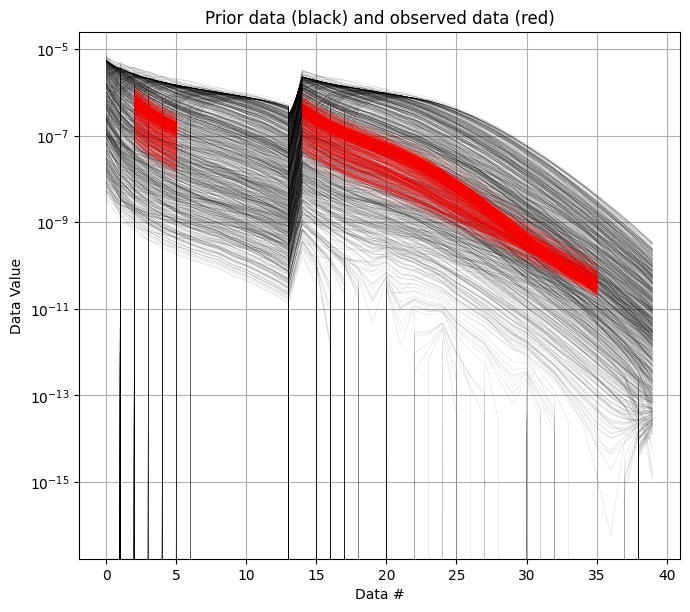

True

In [5]:
# into TWO data sets, LOW and HIGH moment.

ig.plot_data_prior(f_prior_data_h5, f_data_h5)

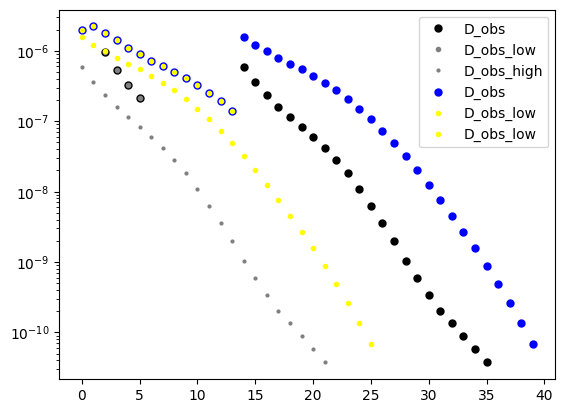

In [6]:
# Read D_obs from f_data_h5
with h5py.File(f_data_h5, 'r') as f:
    D_obs = f['D1/d_obs'][:]
    D_std = f['D1/d_std'][:]
# Alternatively, use the ig.load_data function    
#D_obs = ig.load_data(f_data_h5, id=1, showInfo=1)['d_obs'][0]
#D_std = ig.load_data(f_data_h5, id=1, showInfo=1)['d_std'][0]

with h5py.File(f_prior_data_h5, 'r') as f:
    D = f['/D1'][:]
# Alternatively, use the ig.load_prior_data function    
#D = ig.load_prior_data(f_prior_data_h5)[0][0]
    
# Now splot the into low and high moment data sets
# The low moment data set will be the first 14 columns, and the high moment data set will be the last columns.
nd = D_obs.shape[1]
n_low = 14
n_high = nd - n_low
# set i low to 0:n_low-1
i_low = range(n_low)
i_high = range(n_low, nd)

# Split prior data
D_low = D[:,i_low]
D_high = D[:,i_high]
# Split observed data
D_obs_low = D_obs[:,i_low]
D_std_low = D_std[:,i_low]*2
D_obs_high = D_obs[:,i_high]
D_std_high = D_std[:,i_high]*2


plt.semilogy(D_obs[0],'k.',markersize=10, label='D_obs')
plt.semilogy(D_obs_low[0],'.', color='gray', markersize=6, label='D_obs_low')
plt.semilogy(D_obs_high[0],'.', color='gray',markersize=4, label='D_obs_high')

plt.semilogy(D[0],'b.',markersize=10, label='D_obs')
plt.semilogy(D_low[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.semilogy(D_high[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.legend()

In [7]:
f_data_dual_h5 = 'DAUGAARD_AVG_dual.h5'

useOldMethod = False
if useOldMethod:
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    # Delete D1
    with h5py.File(f_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
    # Update D1 and D2      
    with h5py.File(f_data_dual_h5, 'a') as f:
        # remove 'D1' 
        #del f['D1']
        f.create_dataset('D1/d_obs', data=D_obs_low)
        f.create_dataset('D1/d_std', data=D_std_low)
        f['D1'].attrs['noise_model'] = 'gaussian'
        f.create_dataset('D2/d_obs', data=D_obs_high)
        f.create_dataset('D2/d_std', data=D_std_high)
        f['D2'].attrs['noise_model'] = 'gaussian'
else:
    # Alternatively, use the ig.write_data_gaussian function
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    ig.write_data_gaussian(D_obs_low, D_std = D_std_low, f_data_h5 = f_data_dual_h5, id=1, showInfo=0)
    ig.write_data_gaussian(D_obs_high, D_std = D_std_high, f_data_h5 = f_data_dual_h5, id=2, showInfo=0)



Removing group DAUGAARD_AVG_dual.h5:D1 
Adding group DAUGAARD_AVG_dual.h5:D1 
Adding group DAUGAARD_AVG_dual.h5:D2 


In [8]:
f_prior_data_dual_h5 = 'PRIOR_dual.h5'
ig.copy_hdf5_file(f_prior_data_h5,f_prior_data_dual_h5)
if useOldMethod:

    with h5py.File(f_prior_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
        f.create_dataset('D1', data=D_low)
        f.create_dataset('D2', data=D_high)
else:
    # Alternatively, use the ig.write_data_gaussian function 
    ig.save_prior_data(f_prior_data_dual_h5, D_low, id=1, force_delete=True)
    ig.save_prior_data(f_prior_data_dual_h5, D_high, id=2, force_delete=False)

Saving new prior data '/D1' to file: PRIOR_dual.h5 
Deleting prior data '/D1' from file: <HDF5 file "PRIOR_dual.h5" (mode r+)> 
New prior data '/D1' saved to file: PRIOR_dual.h5 
Saving new prior data '/D2' to file: PRIOR_dual.h5 
New prior data '/D2' saved to file: PRIOR_dual.h5 


id_data = 1


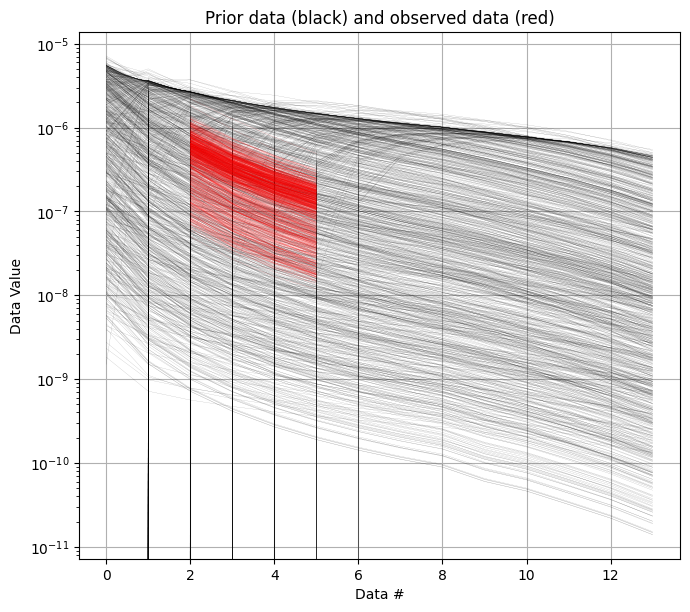

id_data = 2


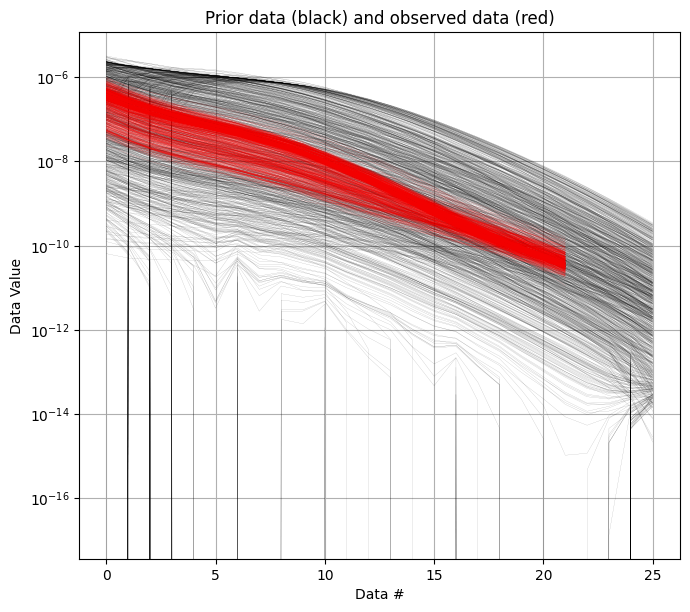

True

In [9]:
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=1)
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=2)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [10]:
N_use = 100000 #%N
N_cpu = 8
f_post_arr = []
updatePostStat=False
showInfo = 1

import time
t_inversion = []

for itype in [0,1,2,3]:
    t_start = time.time()
    if itype == 0:
        # LOW AND HIGH MOMENT AS ONE DATA SET - THE ORIGINAL METHOD
        f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                    f_data_h5, 
                                    f_post_h5='POST_type%d.h5' % itype,
                                    N_use = N_use, Ncpu=N_cpu,
                                    showInfo=showInfo, 
                                    updatePostStat=updatePostStat)
    elif itype == 1:
        # LOW MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,
                                   id_use = [1])
    elif itype == 2:
        # HIGH MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                #    f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [2])
    elif itype == 3:
        # JOINT INVERSION USING BOTH LOW AND HIGH MOMENT
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [1,2])

    t_inversion.append(time.time() - t_start)
    f_post_arr.append(f_post_h5)



Loading data from DAUGAARD_AVG.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 11693/40 data
Loading prior data from PRIOR_CHI2_NF_3_log-uniform_N100000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 100000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_CHI2_NF_3_log-uniform_N100000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=DAUGAARD_AVG.h5
f_post_h5=POST_type0.h5


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:13, 19.64it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:18, 18.49it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:18, 18.48it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:21, 17.90it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:20, 17.93it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:25, 17.01it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:23, 17.41it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:26, 16.74it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:17, 18.58it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:20, 17.91it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:19, 18.16it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:22, 17.50it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:20, 17.92it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:23, 17.36it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:21, 17.65it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:23, 17.34it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:18, 18.16it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:20, 17.82it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:19, 17.95it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:20, 17.82it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:21, 17.59it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:21, 17.55it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:20, 17.70it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:21, 17.56it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:18, 18.07it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:19, 17.85it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:19, 17.87it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:19, 17.83it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:20, 17.69it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:20, 17.64it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:20, 17.73it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:20, 17.64it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:18, 17.91it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:19, 17.84it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:19, 17.76it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:19, 17.67it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:20, 17.49it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:19, 17.67it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:19, 17.73it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:19, 17.70it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:18, 17.91it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:18, 17.84it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:18, 17.85it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:19, 17.74it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:19, 17.72it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:21, 17.29it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:18, 17.76it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:19, 17.72it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:18, 17.84it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:18, 17.82it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:18, 17.77it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:18, 17.74it/s]

rejection:   5%|█▊                                   | 70/1461 [00:03<01:18, 17.72it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:19, 17.43it/s]

rejection:   5%|█▊                                   | 70/1461 [00:03<01:18, 17.75it/s]

rejection:   5%|█▊                                   | 70/1461 [00:03<01:18, 17.71it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:17, 17.82it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:17, 17.77it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:17, 17.79it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:17, 17.73it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:18, 17.53it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:17, 17.73it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:17, 17.75it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:17, 17.72it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:17, 17.76it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:17, 17.72it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:17, 17.74it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:17, 17.71it/s]

rejection:   6%|██▎                                  | 90/1462 [00:05<01:18, 17.56it/s]

rejection:   6%|██▎                                  | 90/1461 [00:05<01:17, 17.70it/s]

rejection:   6%|██▎                                  | 90/1461 [00:05<01:17, 17.71it/s]

rejection:   6%|██▎                                  | 90/1461 [00:05<01:17, 17.69it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:16, 17.73it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:16, 17.72it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:16, 17.71it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:16, 17.70it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:17, 17.59it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:16, 17.68it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:16, 17.70it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:16, 17.68it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:16, 17.68it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:16, 17.67it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:16, 17.68it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:16, 17.68it/s]

rejection:   8%|██▋                                 | 110/1462 [00:06<01:16, 17.61it/s]

rejection:   8%|██▋                                 | 110/1461 [00:06<01:16, 17.69it/s]

rejection:   8%|██▋                                 | 110/1461 [00:06<01:16, 17.67it/s]

rejection:   8%|██▋                                 | 110/1461 [00:06<01:16, 17.68it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:15, 17.71it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:15, 17.75it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:15, 17.71it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:15, 17.70it/s]

rejection:   8%|██▉                                 | 120/1461 [00:06<01:15, 17.70it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:16, 17.65it/s]

rejection:   8%|██▉                                 | 120/1461 [00:06<01:15, 17.70it/s]

rejection:   8%|██▉                                 | 120/1461 [00:06<01:15, 17.70it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:15, 17.70it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:15, 17.69it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:15, 17.69it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:15, 17.69it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:15, 17.65it/s]

rejection:   9%|███▏                                | 130/1461 [00:07<01:15, 17.68it/s]

rejection:   9%|███▏                                | 130/1461 [00:07<01:15, 17.68it/s]

rejection:   9%|███▏                                | 130/1461 [00:07<01:15, 17.69it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:14, 17.70it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:14, 17.70it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:14, 17.69it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:14, 17.69it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:14, 17.67it/s]

rejection:  10%|███▍                                | 140/1461 [00:07<01:14, 17.69it/s]

rejection:  10%|███▍                                | 140/1461 [00:07<01:14, 17.69it/s]

rejection:  10%|███▍                                | 140/1461 [00:07<01:14, 17.69it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:14, 17.70it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:14, 17.73it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:14, 17.71it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:14, 17.70it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:14, 17.68it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:14, 17.70it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:14, 17.70it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:14, 17.70it/s]

rejection:  11%|███▉                                | 160/1462 [00:08<01:13, 17.69it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:13, 17.68it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:13, 17.67it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:13, 17.68it/s]

rejection:  11%|███▉                                | 160/1461 [00:09<01:13, 17.67it/s]

rejection:  11%|███▉                                | 160/1462 [00:09<01:13, 17.66it/s]

rejection:  11%|███▉                                | 160/1461 [00:09<01:13, 17.67it/s]

rejection:  11%|███▉                                | 160/1461 [00:09<01:13, 17.66it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:13, 17.66it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:13, 17.66it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:13, 17.64it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:13, 17.66it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:13, 17.65it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:13, 17.63it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:13, 17.66it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:13, 17.65it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:12, 17.63it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:12, 17.65it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:12, 17.63it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:12, 17.64it/s]

rejection:  12%|████▍                               | 180/1461 [00:10<01:12, 17.64it/s]

rejection:  12%|████▍                               | 180/1462 [00:10<01:12, 17.64it/s]

rejection:  12%|████▍                               | 180/1461 [00:10<01:14, 17.30it/s]

rejection:  12%|████▍                               | 180/1461 [00:10<01:12, 17.64it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:11, 17.69it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:11, 17.68it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:11, 17.67it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:12, 17.65it/s]

rejection:  13%|████▋                               | 190/1461 [00:10<01:11, 17.66it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:12, 17.65it/s]

rejection:  13%|████▋                               | 190/1461 [00:10<01:13, 17.26it/s]

rejection:  13%|████▋                               | 190/1461 [00:10<01:11, 17.68it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:11, 17.70it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:11, 17.70it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:11, 17.69it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:11, 17.72it/s]

rejection:  14%|████▉                               | 200/1461 [00:11<01:11, 17.75it/s]

rejection:  14%|████▉                               | 200/1461 [00:11<01:11, 17.76it/s]

rejection:  14%|████▉                               | 200/1461 [00:11<01:12, 17.45it/s]

rejection:  14%|████▉                               | 200/1462 [00:11<01:13, 17.23it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:10, 17.74it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:10, 17.74it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:10, 17.74it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:12, 17.21it/s]

rejection:  14%|█████▏                              | 210/1461 [00:11<01:10, 17.74it/s]

rejection:  14%|█████▏                              | 210/1461 [00:11<01:11, 17.53it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:12, 17.36it/s]

rejection:  14%|█████▏                              | 210/1461 [00:11<01:10, 17.72it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:10, 17.72it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:10, 17.73it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:10, 17.72it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:11, 17.35it/s]

rejection:  15%|█████▍                              | 220/1461 [00:12<01:10, 17.71it/s]

rejection:  15%|█████▍                              | 220/1461 [00:12<01:10, 17.71it/s]

rejection:  15%|█████▍                              | 220/1461 [00:12<01:10, 17.56it/s]

rejection:  15%|█████▍                              | 220/1462 [00:12<01:11, 17.45it/s]

rejection:  16%|█████▋                              | 230/1462 [00:12<01:09, 17.70it/s]

rejection:  16%|█████▋                              | 230/1462 [00:12<01:09, 17.71it/s]

rejection:  16%|█████▋                              | 230/1462 [00:12<01:09, 17.71it/s]

rejection:  16%|█████▋                              | 230/1462 [00:13<01:10, 17.45it/s]

rejection:  16%|█████▋                              | 230/1461 [00:13<01:09, 17.70it/s]

rejection:  16%|█████▋                              | 230/1461 [00:13<01:09, 17.76it/s]

rejection:  16%|█████▋                              | 230/1461 [00:13<01:09, 17.60it/s]

rejection:  16%|█████▋                              | 230/1462 [00:13<01:10, 17.52it/s]

rejection:  16%|█████▉                              | 240/1462 [00:13<01:09, 17.69it/s]

rejection:  16%|█████▉                              | 240/1462 [00:13<01:09, 17.68it/s]

rejection:  16%|█████▉                              | 240/1462 [00:13<01:09, 17.67it/s]

rejection:  16%|█████▉                              | 240/1462 [00:13<01:09, 17.49it/s]

rejection:  16%|█████▉                              | 240/1461 [00:13<01:09, 17.69it/s]

rejection:  16%|█████▉                              | 240/1461 [00:13<01:09, 17.69it/s]

rejection:  16%|█████▉                              | 240/1461 [00:13<01:09, 17.63it/s]

rejection:  16%|█████▉                              | 240/1462 [00:13<01:09, 17.58it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:08, 17.69it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:08, 17.70it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:08, 17.70it/s]

rejection:  17%|██████▏                             | 250/1461 [00:14<01:08, 17.69it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:11, 17.06it/s]

rejection:  17%|██████▏                             | 250/1461 [00:14<01:08, 17.68it/s]

rejection:  17%|██████▏                             | 250/1462 [00:14<01:08, 17.60it/s]

rejection:  17%|██████▏                             | 250/1461 [00:14<01:08, 17.63it/s]

rejection:  18%|██████▍                             | 260/1462 [00:14<01:07, 17.74it/s]

rejection:  18%|██████▍                             | 260/1462 [00:14<01:07, 17.73it/s]

rejection:  18%|██████▍                             | 260/1462 [00:14<01:07, 17.73it/s]

rejection:  18%|██████▍                             | 260/1462 [00:14<01:09, 17.30it/s]

rejection:  18%|██████▍                             | 260/1461 [00:14<01:07, 17.73it/s]

rejection:  18%|██████▍                             | 260/1461 [00:14<01:07, 17.70it/s]

rejection:  18%|██████▍                             | 260/1461 [00:14<01:07, 17.72it/s]

rejection:  18%|██████▍                             | 260/1462 [00:14<01:08, 17.67it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:07, 17.73it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:07, 17.72it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:07, 17.72it/s]

rejection:  18%|██████▋                             | 270/1461 [00:15<01:07, 17.72it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:08, 17.41it/s]

rejection:  18%|██████▋                             | 270/1462 [00:15<01:07, 17.68it/s]

rejection:  18%|██████▋                             | 270/1461 [00:15<01:07, 17.71it/s]

rejection:  18%|██████▋                             | 270/1461 [00:15<01:07, 17.63it/s]

rejection:  19%|██████▉                             | 280/1462 [00:15<01:06, 17.75it/s]

rejection:  19%|██████▉                             | 280/1462 [00:15<01:06, 17.74it/s]

rejection:  19%|██████▉                             | 280/1462 [00:15<01:06, 17.73it/s]

rejection:  19%|██████▉                             | 280/1461 [00:15<01:06, 17.74it/s]

rejection:  19%|██████▉                             | 280/1462 [00:15<01:07, 17.51it/s]

rejection:  19%|██████▉                             | 280/1461 [00:15<01:06, 17.78it/s]

rejection:  19%|██████▉                             | 280/1462 [00:15<01:06, 17.71it/s]

rejection:  19%|██████▉                             | 280/1461 [00:15<01:06, 17.73it/s]

rejection:  20%|███████▏                            | 290/1462 [00:16<01:05, 17.86it/s]

rejection:  20%|███████▏                            | 290/1462 [00:16<01:06, 17.74it/s]

rejection:  20%|███████▏                            | 290/1462 [00:16<01:06, 17.73it/s]

rejection:  20%|███████▏                            | 290/1462 [00:16<01:06, 17.60it/s]

rejection:  20%|███████▏                            | 290/1461 [00:16<01:06, 17.74it/s]

rejection:  20%|███████▏                            | 290/1461 [00:16<01:06, 17.73it/s]

rejection:  20%|███████▏                            | 290/1461 [00:16<01:05, 17.75it/s]

rejection:  20%|███████▏                            | 290/1462 [00:16<01:06, 17.72it/s]

rejection:  21%|███████▍                            | 300/1462 [00:16<01:04, 17.98it/s]

rejection:  21%|███████▍                            | 300/1462 [00:16<01:05, 17.80it/s]

rejection:  21%|███████▍                            | 300/1462 [00:16<01:05, 17.80it/s]

rejection:  21%|███████▍                            | 300/1461 [00:16<01:05, 17.80it/s]

rejection:  21%|███████▍                            | 300/1462 [00:17<01:05, 17.68it/s]

rejection:  21%|███████▍                            | 300/1461 [00:16<01:05, 17.78it/s]

rejection:  21%|███████▍                            | 300/1461 [00:16<01:05, 17.79it/s]

rejection:  21%|███████▍                            | 300/1462 [00:17<01:07, 17.28it/s]

rejection:  21%|███████▋                            | 310/1462 [00:17<01:04, 17.73it/s]

rejection:  21%|███████▋                            | 310/1462 [00:17<01:04, 17.82it/s]

rejection:  21%|███████▋                            | 310/1462 [00:17<01:04, 17.82it/s]

rejection:  21%|███████▋                            | 310/1461 [00:17<01:04, 17.80it/s]

rejection:  21%|███████▋                            | 310/1462 [00:17<01:04, 17.73it/s]

rejection:  21%|███████▋                            | 310/1461 [00:17<01:04, 17.80it/s]

rejection:  21%|███████▋                            | 310/1461 [00:17<01:06, 17.29it/s]

rejection:  21%|███████▋                            | 310/1462 [00:17<01:06, 17.42it/s]

rejection:  22%|███████▉                            | 320/1462 [00:17<01:04, 17.75it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:04, 17.82it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:04, 17.84it/s]

rejection:  22%|███████▉                            | 320/1461 [00:18<01:03, 17.83it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:04, 17.77it/s]

rejection:  22%|███████▉                            | 320/1461 [00:18<01:04, 17.81it/s]

rejection:  22%|███████▉                            | 320/1461 [00:18<01:05, 17.45it/s]

rejection:  22%|███████▉                            | 320/1462 [00:18<01:06, 17.17it/s]

rejection:  23%|████████▏                           | 330/1462 [00:18<01:03, 17.79it/s]

rejection:  23%|████████▏                           | 330/1462 [00:18<01:03, 17.83it/s]

rejection:  23%|████████▏                           | 330/1462 [00:18<01:03, 17.83it/s]

rejection:  23%|████████▏                           | 330/1461 [00:18<01:03, 17.82it/s]

rejection:  23%|████████▏                           | 330/1462 [00:18<01:03, 17.78it/s]

rejection:  23%|████████▏                           | 330/1461 [00:18<01:03, 17.80it/s]

rejection:  23%|████████▏                           | 330/1461 [00:18<01:04, 17.44it/s]

rejection:  23%|████████▏                           | 330/1462 [00:18<01:05, 17.22it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:03, 17.75it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:03, 17.78it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:03, 17.77it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:03, 17.76it/s]

rejection:  23%|████████▍                           | 340/1461 [00:19<01:03, 17.78it/s]

rejection:  23%|████████▍                           | 340/1461 [00:19<01:03, 17.77it/s]

rejection:  23%|████████▍                           | 340/1461 [00:19<01:03, 17.62it/s]

rejection:  23%|████████▎                           | 340/1462 [00:19<01:04, 17.34it/s]

rejection:  24%|████████▌                           | 350/1462 [00:19<01:02, 17.69it/s]

rejection:  24%|████████▌                           | 350/1462 [00:19<01:02, 17.73it/s]

rejection:  24%|████████▌                           | 350/1462 [00:19<01:02, 17.73it/s]

rejection:  24%|████████▌                           | 350/1461 [00:19<01:02, 17.72it/s]

rejection:  24%|████████▌                           | 350/1462 [00:19<01:02, 17.70it/s]

rejection:  24%|████████▌                           | 350/1461 [00:19<01:02, 17.73it/s]

rejection:  24%|████████▌                           | 350/1461 [00:19<01:03, 17.63it/s]

rejection:  24%|████████▌                           | 350/1462 [00:19<01:03, 17.45it/s]

rejection:  25%|████████▊                           | 360/1462 [00:20<01:02, 17.71it/s]

rejection:  25%|████████▊                           | 360/1462 [00:20<01:02, 17.73it/s]

rejection:  25%|████████▊                           | 360/1462 [00:20<01:02, 17.73it/s]

rejection:  25%|████████▊                           | 360/1462 [00:20<01:02, 17.72it/s]

rejection:  25%|████████▊                           | 360/1461 [00:20<01:02, 17.73it/s]

rejection:  25%|████████▊                           | 360/1461 [00:20<01:02, 17.73it/s]

rejection:  25%|████████▊                           | 360/1461 [00:20<01:02, 17.65it/s]

rejection:  25%|████████▊                           | 360/1462 [00:20<01:02, 17.52it/s]

rejection:  25%|█████████                           | 370/1462 [00:20<01:01, 17.70it/s]

rejection:  25%|█████████                           | 370/1462 [00:20<01:01, 17.72it/s]

rejection:  25%|█████████                           | 370/1462 [00:20<01:01, 17.72it/s]

rejection:  25%|█████████                           | 370/1461 [00:20<01:01, 17.71it/s]

rejection:  25%|█████████                           | 370/1462 [00:20<01:01, 17.70it/s]

rejection:  25%|█████████                           | 370/1461 [00:20<01:01, 17.71it/s]

rejection:  25%|█████████                           | 370/1461 [00:20<01:01, 17.65it/s]

rejection:  25%|█████████                           | 370/1462 [00:21<01:02, 17.56it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:21<01:01, 17.68it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:21<01:01, 17.70it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:21<01:01, 17.70it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:21<01:01, 17.71it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:21<01:01, 17.69it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:21<01:01, 17.70it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:21<01:01, 17.67it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:21<01:01, 17.62it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:21<01:00, 17.67it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:21<01:00, 17.68it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:22<01:00, 17.68it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:22<01:00, 17.66it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:22<01:00, 17.66it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:22<01:00, 17.69it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:22<01:00, 17.68it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:22<01:00, 17.62it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:22<01:00, 17.70it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:22<01:00, 17.69it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:22<01:00, 17.69it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:22<01:00, 17.69it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:22<01:01, 17.26it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:22<00:59, 17.70it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:22<01:00, 17.68it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:22<01:00, 17.64it/s]

rejection:  28%|██████████                          | 410/1462 [00:23<00:59, 17.75it/s]

rejection:  28%|██████████                          | 410/1462 [00:23<00:59, 17.74it/s]

rejection:  28%|██████████                          | 410/1462 [00:23<00:59, 17.75it/s]

rejection:  28%|██████████                          | 410/1462 [00:23<00:59, 17.75it/s]

rejection:  28%|██████████                          | 410/1461 [00:23<00:59, 17.74it/s]

rejection:  28%|██████████                          | 410/1461 [00:23<01:00, 17.35it/s]

rejection:  28%|██████████                          | 410/1461 [00:23<00:59, 17.72it/s]

rejection:  28%|██████████                          | 410/1462 [00:23<00:59, 17.70it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:23<00:58, 17.72it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:23<00:58, 17.72it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:23<00:58, 17.73it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:23<00:58, 17.74it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:23<00:59, 17.47it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:23<00:58, 17.74it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:23<00:58, 17.74it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:23<00:58, 17.72it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:24<00:58, 17.74it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:24<00:58, 17.74it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:24<00:58, 17.74it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:24<00:58, 17.74it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:24<00:58, 17.53it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:24<00:58, 17.73it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:24<00:58, 17.73it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:24<00:58, 17.71it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:24<00:57, 17.73it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:24<00:57, 17.73it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:24<00:57, 17.73it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:24<00:57, 17.74it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:24<00:58, 17.60it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:24<00:57, 17.73it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:24<00:57, 17.72it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:25<00:57, 17.72it/s]

rejection:  31%|███████████                         | 450/1462 [00:25<00:57, 17.72it/s]

rejection:  31%|███████████                         | 450/1462 [00:25<00:57, 17.71it/s]

rejection:  31%|███████████                         | 450/1462 [00:25<00:57, 17.71it/s]

rejection:  31%|███████████                         | 450/1462 [00:25<00:57, 17.71it/s]

rejection:  31%|███████████                         | 450/1461 [00:25<00:57, 17.71it/s]

rejection:  31%|███████████                         | 450/1461 [00:25<00:57, 17.61it/s]

rejection:  31%|███████████                         | 450/1461 [00:25<00:57, 17.71it/s]

rejection:  31%|███████████                         | 450/1462 [00:25<00:57, 17.71it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:25<00:56, 17.68it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:25<00:56, 17.69it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:25<00:56, 17.69it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:26<00:56, 17.69it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:25<00:56, 17.69it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:26<00:56, 17.63it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:26<00:56, 17.70it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:26<00:56, 17.69it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:26<00:56, 17.69it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:26<00:56, 17.67it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:26<00:56, 17.59it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:26<00:56, 17.70it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:26<00:56, 17.67it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:26<00:55, 17.71it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:26<00:55, 17.70it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:26<00:56, 17.69it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:27<00:55, 17.70it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:27<00:55, 17.71it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:27<00:55, 17.73it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:27<00:55, 17.71it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:27<00:55, 17.67it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:27<00:55, 17.70it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:27<00:55, 17.70it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:27<00:55, 17.69it/s]

rejection:  34%|████████████                        | 490/1462 [00:27<00:54, 17.70it/s]

rejection:  34%|████████████                        | 490/1462 [00:27<00:54, 17.69it/s]

rejection:  34%|████████████                        | 490/1462 [00:27<00:54, 17.71it/s]

rejection:  34%|████████████                        | 490/1462 [00:27<00:54, 17.68it/s]

rejection:  34%|████████████                        | 490/1461 [00:27<00:54, 17.66it/s]

rejection:  34%|████████████                        | 490/1461 [00:27<00:54, 17.68it/s]

rejection:  34%|████████████                        | 490/1461 [00:27<00:54, 17.68it/s]

rejection:  34%|████████████                        | 490/1462 [00:27<00:54, 17.69it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:28<00:54, 17.69it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:28<00:54, 17.69it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:28<00:54, 17.70it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:28<00:54, 17.69it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:28<00:54, 17.69it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:28<00:54, 17.68it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:28<00:54, 17.70it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:28<00:54, 17.70it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:28<00:53, 17.71it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:28<00:53, 17.70it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:28<00:53, 17.72it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:28<00:53, 17.71it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:28<00:53, 17.71it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:28<00:53, 17.72it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:28<00:53, 17.76it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:28<00:53, 17.77it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:29<00:53, 17.76it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:29<00:52, 17.78it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:29<00:52, 17.80it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:29<00:52, 17.78it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:29<00:54, 17.27it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:29<00:52, 17.79it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:29<00:52, 17.77it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:29<00:53, 17.77it/s]

rejection:  36%|█████████████                       | 530/1462 [00:29<00:54, 17.24it/s]

rejection:  36%|█████████████                       | 530/1462 [00:29<00:52, 17.74it/s]

rejection:  36%|█████████████                       | 530/1462 [00:29<00:52, 17.75it/s]

rejection:  36%|█████████████                       | 530/1461 [00:29<00:52, 17.73it/s]

rejection:  36%|█████████████                       | 530/1461 [00:29<00:52, 17.73it/s]

rejection:  36%|█████████████                       | 530/1462 [00:30<00:53, 17.37it/s]

rejection:  36%|█████████████                       | 530/1461 [00:30<00:52, 17.72it/s]

rejection:  36%|█████████████                       | 530/1462 [00:30<00:52, 17.71it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:30<00:53, 17.35it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:30<00:52, 17.71it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:30<00:52, 17.72it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:30<00:52, 17.71it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:30<00:51, 17.71it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:30<00:52, 17.46it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:30<00:52, 17.71it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:30<00:52, 17.71it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:31<00:52, 17.45it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:31<00:51, 17.71it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:31<00:51, 17.70it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:31<00:51, 17.69it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:31<00:51, 17.68it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:31<00:52, 17.51it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:31<00:51, 17.70it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:31<00:51, 17.70it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:31<00:50, 17.71it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:31<00:51, 17.52it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:31<00:50, 17.70it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:31<00:51, 17.57it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:31<00:50, 17.69it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:31<00:50, 17.69it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:31<00:50, 17.69it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:31<00:50, 17.69it/s]

rejection:  39%|██████████████                      | 570/1462 [00:32<00:50, 17.70it/s]

rejection:  39%|██████████████                      | 570/1462 [00:32<00:50, 17.53it/s]

rejection:  39%|██████████████                      | 570/1462 [00:32<00:50, 17.69it/s]

rejection:  39%|██████████████                      | 570/1462 [00:32<00:50, 17.61it/s]

rejection:  39%|██████████████                      | 570/1461 [00:32<00:50, 17.70it/s]

rejection:  39%|██████████████                      | 570/1461 [00:32<00:50, 17.69it/s]

rejection:  39%|██████████████                      | 570/1461 [00:32<00:50, 17.69it/s]

rejection:  39%|██████████████                      | 570/1462 [00:32<00:50, 17.69it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:32<00:50, 17.63it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:32<00:49, 17.71it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:32<00:49, 17.72it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:32<00:49, 17.71it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:32<00:49, 17.64it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:32<00:49, 17.71it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:32<00:49, 17.69it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:32<00:49, 17.70it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:33<00:49, 17.69it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:33<00:49, 17.63it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:33<00:49, 17.68it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:33<00:49, 17.70it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:33<00:49, 17.64it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:33<00:49, 17.67it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:33<00:49, 17.69it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:33<00:49, 17.68it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:33<00:48, 17.66it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:33<00:48, 17.68it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:33<00:48, 17.70it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:33<00:48, 17.73it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:33<00:48, 17.68it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:33<00:48, 17.70it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:33<00:48, 17.70it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:34<00:48, 17.71it/s]

rejection:  42%|███████████████                     | 610/1462 [00:34<00:48, 17.71it/s]

rejection:  42%|███████████████                     | 610/1462 [00:34<00:48, 17.73it/s]

rejection:  42%|███████████████                     | 610/1462 [00:34<00:48, 17.73it/s]

rejection:  42%|███████████████                     | 610/1461 [00:34<00:47, 17.76it/s]

rejection:  42%|███████████████                     | 610/1462 [00:34<00:48, 17.72it/s]

rejection:  42%|███████████████                     | 610/1461 [00:34<00:47, 17.74it/s]

rejection:  42%|███████████████                     | 610/1461 [00:34<00:47, 17.75it/s]

rejection:  42%|███████████████                     | 610/1462 [00:34<00:48, 17.73it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:34<00:47, 17.71it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:34<00:47, 17.73it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:34<00:47, 17.72it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:35<00:47, 17.73it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:35<00:47, 17.71it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:35<00:47, 17.71it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:35<00:47, 17.73it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:35<00:47, 17.72it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:35<00:46, 17.73it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:35<00:46, 17.71it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:35<00:46, 17.72it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:35<00:46, 17.71it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:35<00:46, 17.72it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:35<00:46, 17.71it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:35<00:46, 17.75it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:35<00:46, 17.78it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:36<00:46, 17.85it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:36<00:46, 17.84it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:36<00:46, 17.85it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:36<00:46, 17.84it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:36<00:46, 17.84it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:36<00:46, 17.85it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:36<00:47, 17.32it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:36<00:48, 16.95it/s]

rejection:  44%|████████████████                    | 650/1462 [00:36<00:45, 17.81it/s]

rejection:  44%|████████████████                    | 650/1462 [00:36<00:45, 17.81it/s]

rejection:  44%|████████████████                    | 650/1462 [00:36<00:45, 17.82it/s]

rejection:  44%|████████████████                    | 650/1461 [00:36<00:45, 17.82it/s]

rejection:  44%|████████████████                    | 650/1461 [00:36<00:45, 17.80it/s]

rejection:  44%|████████████████                    | 650/1462 [00:36<00:46, 17.45it/s]

rejection:  44%|████████████████                    | 650/1461 [00:36<00:45, 17.81it/s]

rejection:  44%|████████████████                    | 650/1462 [00:36<00:47, 17.06it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:37<00:45, 17.81it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:37<00:45, 17.79it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:37<00:45, 17.80it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:37<00:44, 17.82it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:37<00:44, 17.80it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:37<00:44, 17.81it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:37<00:45, 17.55it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:37<00:46, 17.27it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:37<00:44, 17.80it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:37<00:44, 17.79it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:37<00:44, 17.79it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:37<00:44, 17.80it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:37<00:44, 17.79it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:37<00:44, 17.61it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:37<00:44, 17.78it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:38<00:45, 17.46it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:38<00:43, 17.83it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:38<00:43, 17.83it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:38<00:43, 17.82it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:38<00:43, 17.81it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:38<00:43, 17.81it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:38<00:44, 17.67it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:38<00:45, 17.27it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:38<00:44, 17.50it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:38<00:43, 17.75it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:38<00:43, 17.75it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:38<00:43, 17.75it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:39<00:43, 17.75it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:38<00:43, 17.75it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:39<00:43, 17.66it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:39<00:44, 17.39it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:39<00:44, 17.54it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:39<00:42, 17.75it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:39<00:42, 17.72it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:39<00:42, 17.73it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:39<00:42, 17.73it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:39<00:42, 17.73it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:39<00:43, 17.68it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:39<00:43, 17.49it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:39<00:43, 17.59it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:40<00:42, 17.71it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:40<00:42, 17.72it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:40<00:42, 17.74it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:40<00:42, 17.73it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:40<00:42, 17.73it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:40<00:42, 17.68it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:40<00:42, 17.54it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:40<00:42, 17.62it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:40<00:41, 17.69it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:40<00:41, 17.70it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:40<00:41, 17.68it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:40<00:41, 17.66it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:40<00:41, 17.66it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:40<00:42, 17.57it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:40<00:42, 17.48it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:40<00:42, 17.55it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:41<00:41, 17.61it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:41<00:41, 17.62it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:41<00:41, 17.62it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:41<00:41, 17.63it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:41<00:41, 17.62it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:41<00:41, 17.61it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:41<00:41, 17.54it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:41<00:41, 17.58it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:41<00:40, 17.64it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:41<00:40, 17.63it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:41<00:40, 17.64it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:41<00:40, 17.64it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:41<00:40, 17.64it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:41<00:40, 17.63it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:41<00:40, 17.61it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:42<00:41, 17.61it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:42<00:40, 17.64it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:42<00:40, 17.63it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:42<00:40, 17.65it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:42<00:40, 17.67it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:42<00:40, 17.67it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:42<00:40, 17.67it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:42<00:40, 17.64it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:42<00:40, 17.71it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:42<00:39, 17.72it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:42<00:39, 17.72it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:42<00:39, 17.72it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:42<00:39, 17.71it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:42<00:39, 17.69it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:43<00:39, 17.71it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:43<00:39, 17.69it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:43<00:39, 17.73it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:43<00:39, 17.72it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:43<00:39, 17.71it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:43<00:39, 17.73it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:43<00:38, 17.74it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:43<00:38, 17.72it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:43<00:39, 17.73it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:43<00:39, 17.71it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:43<00:39, 17.72it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:43<00:38, 17.74it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:44<00:38, 17.74it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:44<00:38, 17.74it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:44<00:38, 17.79it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:44<00:38, 17.74it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:44<00:38, 17.74it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:44<00:38, 17.72it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:44<00:38, 17.71it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:44<00:37, 17.73it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:44<00:37, 17.73it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:44<00:37, 17.74it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:44<00:37, 17.86it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:44<00:37, 17.75it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:44<00:37, 17.74it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:44<00:37, 17.74it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:44<00:37, 17.74it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:45<00:37, 17.76it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:45<00:37, 17.75it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:45<00:37, 17.76it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:45<00:36, 17.92it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:45<00:37, 17.75it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:45<00:37, 17.75it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:45<00:37, 17.73it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:45<00:37, 17.72it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:45<00:36, 17.71it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:45<00:36, 17.71it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:45<00:36, 17.71it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:45<00:35, 18.16it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:45<00:36, 17.71it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:45<00:36, 17.70it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:45<00:36, 17.69it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:46<00:36, 17.68it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:46<00:36, 17.68it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:46<00:36, 17.68it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:46<00:36, 17.70it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:46<00:35, 17.99it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:46<00:36, 17.70it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:46<00:36, 17.70it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:46<00:36, 17.71it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:46<00:36, 17.71it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:46<00:35, 17.72it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:46<00:35, 17.73it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:46<00:36, 17.23it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:46<00:35, 17.96it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:46<00:35, 17.78it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:47<00:35, 17.77it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:47<00:35, 17.76it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:47<00:35, 17.74it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:47<00:35, 17.74it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:47<00:35, 17.74it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:47<00:35, 17.36it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:47<00:34, 17.87it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:47<00:34, 17.74it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:47<00:35, 17.75it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:47<00:34, 17.75it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:47<00:35, 17.75it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:47<00:34, 17.79it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:47<00:34, 17.78it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:48<00:34, 17.53it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:48<00:34, 17.78it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:47<00:35, 17.36it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:48<00:34, 17.77it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:48<00:34, 17.77it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:48<00:34, 17.77it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:48<00:33, 17.77it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:48<00:33, 17.75it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:48<00:34, 17.56it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:48<00:33, 17.73it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:48<00:34, 17.44it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:48<00:33, 17.75it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:48<00:33, 17.75it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:48<00:33, 17.74it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:49<00:33, 17.74it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:49<00:33, 17.74it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:49<00:33, 17.59it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:49<00:33, 17.74it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:49<00:33, 17.51it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:49<00:33, 17.71it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:49<00:33, 17.70it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:49<00:33, 17.69it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:49<00:32, 17.70it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:49<00:32, 17.69it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:49<00:33, 17.61it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:49<00:33, 17.58it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:49<00:32, 17.69it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:49<00:32, 17.70it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:49<00:32, 17.72it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:49<00:32, 17.70it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:50<00:32, 17.72it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:50<00:32, 17.72it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:50<00:32, 17.65it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:50<00:32, 17.71it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:50<00:32, 17.61it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:50<00:32, 17.73it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:50<00:32, 17.83it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:50<00:32, 17.77it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:50<00:31, 17.77it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:50<00:31, 17.76it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:50<00:31, 17.71it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:50<00:31, 17.76it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:50<00:31, 17.75it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:50<00:32, 17.16it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:50<00:31, 18.01it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:51<00:31, 17.76it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:51<00:30, 17.81it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:51<00:31, 17.81it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:51<00:31, 17.77it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:51<00:30, 17.82it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:51<00:30, 17.83it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:51<00:32, 16.96it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:51<00:31, 17.73it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:51<00:30, 17.83it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:51<00:30, 17.80it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:51<00:30, 17.79it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:51<00:30, 17.79it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:51<00:30, 17.79it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:52<00:30, 17.78it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:52<00:30, 17.70it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:52<00:31, 17.13it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:52<00:30, 17.83it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:52<00:29, 17.79it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:52<00:29, 17.78it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:52<00:29, 17.77it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:52<00:29, 17.77it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:52<00:29, 17.77it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:52<00:29, 17.74it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:52<00:30, 17.31it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:52<00:29, 17.75it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:53<00:29, 17.75it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:53<00:29, 17.75it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:53<00:29, 17.79it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:53<00:29, 17.82it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:53<00:29, 17.85it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:53<00:29, 17.89it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:53<00:29, 17.54it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:53<00:29, 17.90it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:53<00:28, 17.91it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:53<00:29, 17.38it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:53<00:28, 17.93it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:53<00:29, 17.40it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:53<00:28, 17.93it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:53<00:28, 17.91it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:53<00:28, 17.69it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:53<00:28, 17.91it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:54<00:27, 17.93it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:54<00:29, 17.07it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:54<00:28, 17.92it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:54<00:27, 17.93it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:54<00:28, 17.55it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:54<00:28, 17.87it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:54<00:28, 17.76it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:54<00:28, 17.90it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:54<00:27, 17.88it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:54<00:27, 17.86it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:54<00:28, 17.25it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:54<00:27, 17.60it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:54<00:27, 17.85it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:54<00:27, 17.81it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:54<00:27, 17.72it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:55<00:27, 17.81it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:55<00:27, 17.83it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:55<00:27, 17.39it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:55<00:27, 17.81it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:55<00:27, 17.80it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:55<00:27, 17.62it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:55<00:27, 17.77it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:55<00:27, 17.72it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:55<00:27, 17.80it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:55<00:26, 17.78it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:55<00:27, 17.47it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:55<00:26, 17.76it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:56<00:26, 17.75it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:55<00:26, 17.62it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:55<00:26, 17.69it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:55<00:26, 17.72it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:56<00:26, 17.74it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:56<00:26, 17.74it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:56<00:26, 17.53it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:56<00:26, 17.74it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:56<00:26, 17.64it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:56<00:26, 17.72it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:56<00:26, 17.70it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:56<00:26, 17.72it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:56<00:26, 17.76it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:56<00:25, 17.78it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:57<00:25, 17.78it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:57<00:25, 17.63it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:57<00:25, 17.72it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:57<00:25, 17.78it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:57<00:25, 17.75it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:57<00:25, 17.38it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:57<00:25, 17.75it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:57<00:24, 17.76it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:57<00:25, 17.64it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:57<00:24, 17.73it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:57<00:24, 17.73it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:57<00:24, 17.67it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:57<00:24, 17.69it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:57<00:24, 17.72it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:57<00:24, 17.68it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:58<00:24, 17.66it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:58<00:24, 17.64it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:58<00:24, 17.57it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:58<00:24, 17.64it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:58<00:24, 17.60it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:58<00:24, 17.75it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:58<00:24, 17.62it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:58<00:24, 17.63it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:58<00:23, 17.59it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:58<00:24, 17.54it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:58<00:24, 17.58it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:58<00:23, 17.54it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:58<00:24, 17.55it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:58<00:23, 17.64it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:58<00:23, 17.55it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:58<00:24, 17.55it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:59<00:23, 17.54it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:59<00:23, 17.49it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:59<00:23, 17.52it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:59<00:23, 17.52it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:59<00:23, 17.50it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:59<00:23, 17.58it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:59<00:23, 17.52it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:59<00:23, 17.51it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:59<00:22, 17.49it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:59<00:23, 17.46it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:59<00:22, 17.49it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [01:00<00:22, 17.48it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:59<00:22, 17.47it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:59<00:22, 17.52it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:59<00:22, 17.48it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [01:00<00:22, 17.50it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:00<00:22, 17.51it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:00<00:22, 17.54it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:00<00:22, 17.51it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [01:00<00:22, 17.54it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:00<00:22, 17.17it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [01:00<00:22, 17.71it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [01:00<00:22, 17.55it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [01:00<00:22, 17.55it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:00<00:21, 17.63it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:01<00:21, 17.61it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:01<00:21, 17.62it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [01:01<00:21, 17.61it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:01<00:22, 17.21it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [01:01<00:21, 17.61it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [01:01<00:21, 17.58it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [01:01<00:21, 17.61it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:01<00:21, 17.60it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:01<00:21, 17.61it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:01<00:21, 17.59it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [01:01<00:21, 17.63it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:01<00:21, 17.36it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [01:01<00:21, 17.64it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [01:01<00:21, 17.63it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [01:01<00:21, 17.67it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:02<00:20, 17.65it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:02<00:20, 17.66it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:02<00:20, 17.63it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [01:02<00:20, 17.63it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [01:02<00:20, 17.63it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [01:02<00:20, 17.62it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:02<00:20, 17.43it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [01:02<00:20, 17.61it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:02<00:19, 17.62it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:02<00:19, 17.62it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:02<00:19, 17.62it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [01:02<00:19, 17.62it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [01:02<00:19, 17.67it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:02<00:20, 17.48it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [01:02<00:19, 17.62it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [01:02<00:19, 17.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:03<00:19, 17.62it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:03<00:19, 17.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:03<00:19, 17.62it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [01:03<00:19, 17.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [01:03<00:19, 17.68it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:03<00:19, 17.53it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [01:03<00:19, 17.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [01:03<00:19, 17.64it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:03<00:18, 17.63it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:03<00:18, 17.66it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:03<00:18, 17.62it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [01:03<00:18, 17.63it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [01:03<00:18, 17.60it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [01:03<00:18, 17.63it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:04<00:18, 17.55it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [01:04<00:18, 17.62it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:04<00:18, 17.62it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:04<00:18, 17.62it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:04<00:18, 17.62it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:04<00:18, 17.63it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:04<00:18, 17.60it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:04<00:18, 17.57it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:04<00:18, 17.62it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:04<00:18, 17.62it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:04<00:17, 17.62it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:04<00:17, 17.62it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:05<00:17, 17.62it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:05<00:17, 17.62it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:05<00:17, 17.61it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:05<00:17, 17.60it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:05<00:17, 17.63it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:05<00:17, 17.62it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:05<00:17, 17.64it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:05<00:17, 17.63it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:05<00:17, 17.62it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:05<00:17, 17.63it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:05<00:17, 17.62it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:05<00:17, 17.63it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:05<00:17, 17.61it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:05<00:17, 17.64it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:06<00:16, 17.64it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:06<00:16, 17.64it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:06<00:16, 17.64it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:06<00:16, 17.66it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:06<00:16, 17.63it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:06<00:16, 17.63it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:06<00:16, 17.64it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:06<00:16, 17.64it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:06<00:15, 17.63it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:06<00:15, 17.71it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:06<00:15, 17.64it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:06<00:15, 17.64it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:06<00:15, 17.65it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:06<00:15, 17.65it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:06<00:15, 17.66it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:06<00:15, 17.67it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:07<00:15, 17.69it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:07<00:15, 17.70it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:07<00:15, 17.68it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:07<00:15, 17.72it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:07<00:15, 17.72it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:07<00:15, 17.72it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:07<00:15, 17.21it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:07<00:15, 17.71it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:07<00:14, 17.70it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:07<00:14, 17.69it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:07<00:14, 17.67it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:07<00:14, 17.68it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:07<00:14, 17.68it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:07<00:14, 17.67it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:07<00:15, 17.31it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:08<00:14, 17.68it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:08<00:14, 17.68it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:08<00:14, 17.67it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:08<00:14, 17.68it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:08<00:14, 17.68it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:08<00:14, 17.67it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:08<00:14, 17.67it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:08<00:14, 17.41it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:08<00:14, 17.66it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:08<00:13, 17.66it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:08<00:13, 17.65it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:08<00:13, 17.64it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:09<00:13, 17.65it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:09<00:13, 17.64it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:09<00:13, 17.63it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:09<00:13, 17.44it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:09<00:13, 17.63it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:09<00:13, 17.62it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:09<00:13, 17.60it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:09<00:13, 17.60it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:09<00:13, 17.60it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:09<00:13, 17.60it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:09<00:13, 17.60it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:09<00:13, 17.48it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:09<00:13, 17.60it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:09<00:12, 17.60it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:10<00:12, 17.60it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:10<00:12, 17.59it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:10<00:12, 17.59it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:10<00:12, 17.59it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:10<00:12, 17.59it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:10<00:12, 17.53it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:10<00:12, 17.62it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:10<00:12, 17.62it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:10<00:12, 17.61it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:10<00:12, 17.61it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:10<00:11, 17.60it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:10<00:12, 17.61it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:10<00:11, 17.60it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:10<00:12, 17.55it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:10<00:12, 17.62it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:11<00:11, 17.60it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:11<00:11, 17.62it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:11<00:11, 17.61it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:11<00:11, 17.64it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:11<00:11, 17.63it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:11<00:11, 17.62it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:11<00:11, 17.59it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:11<00:11, 17.62it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:11<00:10, 17.63it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:11<00:10, 17.65it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:11<00:10, 17.65it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:11<00:10, 17.64it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:11<00:10, 17.65it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:11<00:10, 17.65it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:11<00:10, 17.63it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:12<00:10, 17.66it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:12<00:10, 17.67it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:12<00:10, 17.67it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:12<00:10, 17.67it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:12<00:10, 17.68it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:12<00:10, 17.68it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:12<00:10, 17.68it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:12<00:10, 17.67it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:12<00:10, 17.70it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:12<00:09, 17.74it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:12<00:09, 17.75it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:12<00:09, 17.75it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:12<00:09, 17.74it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:13<00:09, 17.75it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:13<00:09, 17.74it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:13<00:09, 17.32it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:13<00:09, 17.75it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:13<00:09, 17.78it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:13<00:09, 17.77it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:13<00:09, 17.77it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:13<00:09, 17.78it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:13<00:09, 17.77it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:13<00:09, 17.77it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:13<00:09, 17.79it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:13<00:09, 17.38it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:13<00:08, 17.76it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:14<00:08, 17.76it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:14<00:08, 17.76it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:14<00:08, 17.76it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:14<00:08, 17.76it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:14<00:08, 17.76it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:14<00:08, 17.75it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:14<00:08, 17.46it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:14<00:08, 17.72it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:14<00:08, 17.71it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:14<00:08, 17.71it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:14<00:07, 17.70it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:14<00:08, 17.70it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:14<00:07, 17.70it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:14<00:08, 17.55it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:14<00:08, 17.70it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:15<00:07, 17.70it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:15<00:07, 17.70it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:15<00:07, 17.69it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:15<00:07, 17.68it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:15<00:07, 17.69it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:15<00:07, 17.68it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:15<00:07, 17.70it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:15<00:07, 17.54it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:15<00:06, 17.68it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:15<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:15<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:15<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:15<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:15<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:15<00:06, 17.58it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:15<00:06, 17.68it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:16<00:06, 17.68it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:16<00:06, 17.68it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:16<00:06, 17.68it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:16<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:16<00:06, 17.72it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:16<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:16<00:06, 17.69it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:16<00:06, 17.61it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:16<00:05, 17.71it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:16<00:05, 17.71it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:16<00:05, 17.71it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:16<00:05, 17.71it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:16<00:05, 17.81it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:17<00:05, 17.72it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:17<00:05, 17.72it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:17<00:05, 17.67it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:17<00:05, 17.77it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:17<00:05, 17.78it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:17<00:05, 17.77it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:17<00:05, 17.79it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:17<00:05, 17.79it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:17<00:05, 17.74it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:17<00:05, 17.75it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:17<00:05, 17.39it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:17<00:04, 17.79it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:18<00:04, 17.85it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:17<00:04, 17.80it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:18<00:04, 17.82it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:18<00:04, 17.84it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:18<00:04, 17.80it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:18<00:04, 17.81it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:18<00:04, 17.42it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:18<00:04, 17.81it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:18<00:04, 17.79it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:18<00:04, 17.80it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:18<00:03, 17.81it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:18<00:03, 17.77it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:18<00:04, 17.78it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:18<00:03, 17.75it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:18<00:04, 17.47it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:19<00:03, 17.75it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:19<00:03, 17.74it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:19<00:03, 17.74it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:19<00:03, 17.74it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:19<00:03, 17.73it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:19<00:03, 17.74it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:19<00:03, 17.73it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:19<00:03, 17.54it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:19<00:02, 17.73it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:19<00:02, 17.72it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:19<00:02, 17.72it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:19<00:02, 17.70it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:19<00:02, 17.70it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:19<00:02, 17.71it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:19<00:02, 17.69it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:19<00:02, 17.56it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:20<00:02, 17.70it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:20<00:02, 17.70it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:20<00:02, 17.69it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:20<00:02, 17.71it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:20<00:02, 17.70it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:20<00:02, 17.69it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:20<00:02, 17.71it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:20<00:02, 17.62it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:20<00:01, 17.71it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:20<00:01, 17.71it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:20<00:01, 17.71it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:20<00:01, 17.70it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:20<00:01, 17.71it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:20<00:01, 17.65it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:20<00:01, 17.70it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:21<00:01, 17.63it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:21<00:01, 17.69it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:21<00:01, 17.72it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:21<00:01, 17.72it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:21<00:01, 17.76it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:21<00:01, 17.81it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:21<00:01, 17.79it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:21<00:01, 17.80it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:21<00:01, 17.78it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:21<00:00, 17.30it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:21<00:00, 17.82it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:21<00:00, 17.82it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:22<00:00, 17.33it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:22<00:00, 17.83it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:22<00:00, 17.83it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:22<00:00, 17.84it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:22<00:00, 17.80it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:22<00:00, 17.46it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:22<00:00, 17.81it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:22<00:00, 17.81it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:22<00:00, 18.00it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:22<00:00, 17.62it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:22<00:00, 17.98it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:22<00:00, 18.40it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:22<00:00, 18.67it/s]

integrate_rejection: Time= 82.9s/11693 soundings,  7.1ms/sounding, 141.0it/s. T_av=48.4, EV_av=-67.1
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 11693/14 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1]
  - /D1:  N,nd = 100000/14
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type1.h5


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:26, 55.33it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:28, 50.89it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:31, 45.81it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:29, 49.58it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<00:28, 50.13it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:31, 46.45it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<00:30, 48.32it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<00:32, 44.80it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:27, 53.35it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:27, 52.86it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:29, 49.10it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:30, 48.03it/s]

rejection:   1%|▌                                    | 20/1461 [00:00<00:27, 51.83it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:31, 46.51it/s]

rejection:   1%|▌                                    | 20/1461 [00:00<00:30, 46.73it/s]

rejection:   1%|▌                                    | 20/1461 [00:00<00:31, 45.72it/s]

rejection:   2%|▊                                    | 30/1462 [00:00<00:27, 52.11it/s]

rejection:   2%|▊                                    | 30/1462 [00:00<00:27, 52.16it/s]

rejection:   2%|▊                                    | 30/1461 [00:00<00:27, 52.61it/s]

rejection:   2%|▊                                    | 30/1462 [00:00<00:29, 47.83it/s]

rejection:   2%|▊                                    | 30/1462 [00:00<00:30, 47.13it/s]

rejection:   2%|▊                                    | 30/1462 [00:00<00:30, 46.88it/s]

rejection:   2%|▊                                    | 30/1461 [00:00<00:30, 46.59it/s]

rejection:   2%|▊                                    | 30/1461 [00:00<00:30, 47.42it/s]

rejection:   3%|█                                    | 40/1462 [00:00<00:27, 51.11it/s]

rejection:   3%|█                                    | 40/1462 [00:00<00:27, 51.82it/s]

rejection:   3%|█                                    | 40/1461 [00:00<00:26, 52.85it/s]

rejection:   3%|█                                    | 40/1462 [00:00<00:29, 48.48it/s]

rejection:   3%|█                                    | 40/1462 [00:00<00:29, 48.15it/s]

rejection:   3%|█                                    | 40/1462 [00:00<00:30, 47.01it/s]

rejection:   3%|█                                    | 40/1461 [00:00<00:29, 48.14it/s]

rejection:   3%|█                                    | 40/1461 [00:00<00:30, 46.22it/s]

rejection:   3%|█▎                                   | 50/1462 [00:00<00:27, 52.12it/s]

rejection:   3%|█▎                                   | 50/1462 [00:00<00:28, 50.21it/s]

rejection:   3%|█▎                                   | 50/1461 [00:00<00:26, 53.29it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:29, 48.43it/s]

rejection:   3%|█▎                                   | 50/1461 [00:01<00:29, 48.58it/s]

rejection:   3%|█▎                                   | 50/1461 [00:01<00:28, 48.85it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:29, 47.83it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:30, 45.80it/s]

rejection:   4%|█▌                                   | 60/1461 [00:01<00:26, 53.46it/s]

rejection:   4%|█▌                                   | 60/1462 [00:01<00:29, 47.25it/s]

rejection:   4%|█▌                                   | 60/1462 [00:01<00:29, 48.23it/s]

rejection:   4%|█▌                                   | 60/1462 [00:01<00:29, 48.33it/s]

rejection:   4%|█▌                                   | 60/1461 [00:01<00:28, 49.85it/s]

rejection:   4%|█▌                                   | 60/1461 [00:01<00:28, 49.41it/s]

rejection:   4%|█▌                                   | 60/1462 [00:01<00:29, 47.99it/s]

rejection:   4%|█▌                                   | 60/1462 [00:01<00:29, 47.12it/s]

rejection:   5%|█▊                                   | 70/1461 [00:01<00:26, 53.10it/s]

rejection:   5%|█▊                                   | 70/1462 [00:01<00:29, 47.17it/s]

rejection:   5%|█▊                                   | 70/1462 [00:01<00:29, 46.45it/s]

rejection:   5%|█▊                                   | 70/1462 [00:01<00:28, 48.83it/s]

rejection:   5%|█▊                                   | 70/1461 [00:01<00:27, 50.55it/s]

rejection:   5%|█▊                                   | 70/1461 [00:01<00:28, 49.51it/s]

rejection:   5%|█▊                                   | 70/1462 [00:01<00:28, 48.45it/s]

rejection:   5%|█▊                                   | 70/1462 [00:01<00:29, 47.37it/s]

rejection:   5%|██                                   | 80/1461 [00:01<00:26, 52.74it/s]

rejection:   5%|██                                   | 80/1462 [00:01<00:29, 46.91it/s]

rejection:   5%|██                                   | 80/1462 [00:01<00:27, 49.89it/s]

rejection:   5%|██                                   | 80/1461 [00:01<00:27, 51.00it/s]

rejection:   5%|██                                   | 80/1462 [00:01<00:29, 46.22it/s]

rejection:   5%|██                                   | 80/1462 [00:01<00:28, 48.46it/s]

rejection:   5%|██                                   | 80/1462 [00:01<00:29, 47.53it/s]

rejection:   5%|██                                   | 80/1461 [00:01<00:28, 48.03it/s]

rejection:   6%|██▎                                  | 90/1461 [00:01<00:26, 51.93it/s]

rejection:   6%|██▎                                  | 90/1462 [00:01<00:27, 50.45it/s]

rejection:   6%|██▎                                  | 90/1462 [00:01<00:28, 47.74it/s]

rejection:   6%|██▎                                  | 90/1461 [00:01<00:26, 51.95it/s]

rejection:   6%|██▎                                  | 90/1462 [00:01<00:29, 46.07it/s]

rejection:   6%|██▎                                  | 90/1462 [00:01<00:28, 47.71it/s]

rejection:   6%|██▎                                  | 90/1462 [00:01<00:28, 47.77it/s]

rejection:   6%|██▎                                  | 90/1461 [00:01<00:28, 47.50it/s]

rejection:   7%|██▍                                 | 100/1461 [00:01<00:26, 50.73it/s]

rejection:   7%|██▍                                 | 100/1462 [00:02<00:26, 51.47it/s]

rejection:   7%|██▍                                 | 100/1461 [00:02<00:26, 51.58it/s]

rejection:   7%|██▍                                 | 100/1462 [00:02<00:28, 48.63it/s]

rejection:   7%|██▍                                 | 100/1462 [00:02<00:29, 45.69it/s]

rejection:   7%|██▍                                 | 100/1462 [00:02<00:28, 47.39it/s]

rejection:   7%|██▍                                 | 100/1462 [00:02<00:28, 47.96it/s]

rejection:   7%|██▍                                 | 100/1461 [00:02<00:29, 46.29it/s]

rejection:   8%|██▋                                 | 110/1461 [00:02<00:27, 49.43it/s]

rejection:   8%|██▋                                 | 110/1462 [00:02<00:26, 51.55it/s]

rejection:   8%|██▋                                 | 110/1461 [00:02<00:25, 52.54it/s]

rejection:   8%|██▋                                 | 110/1462 [00:02<00:28, 47.51it/s]

rejection:   8%|██▋                                 | 110/1462 [00:02<00:28, 47.07it/s]

rejection:   8%|██▋                                 | 110/1462 [00:02<00:28, 46.92it/s]

rejection:   8%|██▋                                 | 110/1462 [00:02<00:28, 47.24it/s]

rejection:   8%|██▋                                 | 110/1461 [00:02<00:29, 46.14it/s]

rejection:   8%|██▉                                 | 120/1461 [00:02<00:27, 48.36it/s]

rejection:   8%|██▉                                 | 120/1462 [00:02<00:26, 50.84it/s]

rejection:   8%|██▉                                 | 120/1461 [00:02<00:25, 52.13it/s]

rejection:   8%|██▉                                 | 120/1462 [00:02<00:27, 48.21it/s]

rejection:   8%|██▉                                 | 120/1462 [00:02<00:27, 49.12it/s]

rejection:   8%|██▉                                 | 120/1462 [00:02<00:28, 46.88it/s]

rejection:   8%|██▉                                 | 120/1462 [00:02<00:28, 47.16it/s]

rejection:   8%|██▉                                 | 120/1461 [00:02<00:28, 46.35it/s]

rejection:   9%|███▏                                | 130/1462 [00:02<00:25, 51.40it/s]

rejection:   9%|███▏                                | 130/1461 [00:02<00:25, 52.30it/s]

rejection:   9%|███▏                                | 130/1461 [00:02<00:27, 47.63it/s]

rejection:   9%|███▏                                | 130/1462 [00:02<00:27, 47.90it/s]

rejection:   9%|███▏                                | 130/1462 [00:02<00:26, 50.23it/s]

rejection:   9%|███▏                                | 130/1462 [00:02<00:28, 46.61it/s]

rejection:   9%|███▏                                | 130/1462 [00:02<00:28, 46.40it/s]

rejection:  10%|███▍                                | 140/1462 [00:02<00:25, 51.49it/s]

rejection:  10%|███▍                                | 140/1461 [00:02<00:25, 52.12it/s]

rejection:   9%|███▏                                | 130/1461 [00:02<00:28, 46.12it/s]

rejection:  10%|███▍                                | 140/1461 [00:02<00:27, 48.61it/s]

rejection:  10%|███▍                                | 140/1462 [00:02<00:25, 51.23it/s]

rejection:  10%|███▍                                | 140/1462 [00:02<00:27, 48.06it/s]

rejection:  10%|███▍                                | 140/1462 [00:02<00:27, 47.58it/s]

rejection:  10%|███▋                                | 150/1462 [00:02<00:25, 52.14it/s]

rejection:  10%|███▋                                | 150/1461 [00:02<00:24, 52.59it/s]

rejection:  10%|███▍                                | 140/1461 [00:02<00:28, 46.94it/s]

rejection:  10%|███▋                                | 150/1461 [00:02<00:26, 49.52it/s]

rejection:  10%|███▍                                | 140/1462 [00:02<00:29, 44.84it/s]

rejection:  10%|███▋                                | 150/1462 [00:03<00:25, 51.49it/s]

rejection:  10%|███▋                                | 150/1462 [00:03<00:26, 49.09it/s]

rejection:  11%|███▉                                | 160/1462 [00:03<00:24, 52.18it/s]

rejection:  11%|███▉                                | 160/1461 [00:03<00:24, 52.23it/s]

rejection:  10%|███▋                                | 150/1461 [00:03<00:27, 47.41it/s]

rejection:  10%|███▋                                | 150/1462 [00:03<00:28, 45.92it/s]

rejection:  11%|███▉                                | 160/1461 [00:03<00:26, 48.55it/s]

rejection:  11%|███▉                                | 160/1462 [00:03<00:24, 52.56it/s]

rejection:  10%|███▋                                | 150/1462 [00:03<00:28, 45.52it/s]

rejection:  11%|███▉                                | 160/1462 [00:03<00:26, 49.75it/s]

rejection:  12%|████▏                               | 170/1461 [00:03<00:24, 52.76it/s]

rejection:  12%|████▏                               | 170/1462 [00:03<00:25, 50.06it/s]

rejection:  11%|███▉                                | 160/1461 [00:03<00:26, 48.20it/s]

rejection:  12%|████▏                               | 170/1462 [00:03<00:24, 52.87it/s]

rejection:  11%|███▉                                | 160/1462 [00:03<00:28, 46.35it/s]

rejection:  12%|████▏                               | 170/1461 [00:03<00:26, 48.06it/s]

rejection:  12%|████▏                               | 170/1462 [00:03<00:25, 50.16it/s]

rejection:  11%|███▉                                | 160/1462 [00:03<00:29, 44.76it/s]

rejection:  12%|████▍                               | 180/1461 [00:03<00:25, 50.99it/s]

rejection:  12%|████▍                               | 180/1462 [00:03<00:25, 49.83it/s]

rejection:  12%|████▍                               | 180/1462 [00:03<00:24, 51.95it/s]

rejection:  12%|████▏                               | 170/1461 [00:03<00:26, 47.90it/s]

rejection:  12%|████▏                               | 170/1462 [00:03<00:27, 46.35it/s]

rejection:  12%|████▍                               | 180/1462 [00:03<00:25, 50.01it/s]

rejection:  12%|████▍                               | 180/1461 [00:03<00:27, 47.24it/s]

rejection:  12%|████▏                               | 170/1462 [00:03<00:28, 44.95it/s]

rejection:  13%|████▋                               | 190/1461 [00:03<00:24, 50.93it/s]

rejection:  13%|████▋                               | 190/1462 [00:03<00:25, 49.44it/s]

rejection:  13%|████▋                               | 190/1462 [00:03<00:24, 51.81it/s]

rejection:  12%|████▍                               | 180/1461 [00:03<00:26, 47.55it/s]

rejection:  12%|████▍                               | 180/1462 [00:03<00:27, 46.03it/s]

rejection:  13%|████▋                               | 190/1462 [00:03<00:25, 50.20it/s]

rejection:  13%|████▋                               | 190/1461 [00:03<00:26, 47.25it/s]

rejection:  12%|████▍                               | 180/1462 [00:03<00:28, 45.12it/s]

rejection:  14%|████▉                               | 200/1461 [00:03<00:25, 49.87it/s]

rejection:  14%|████▉                               | 200/1462 [00:04<00:25, 49.18it/s]

rejection:  14%|████▉                               | 200/1462 [00:04<00:24, 50.71it/s]

rejection:  13%|████▋                               | 190/1461 [00:04<00:26, 47.49it/s]

rejection:  13%|████▋                               | 190/1462 [00:04<00:27, 46.50it/s]

rejection:  14%|████▉                               | 200/1462 [00:04<00:25, 48.89it/s]

rejection:  14%|████▉                               | 200/1461 [00:04<00:26, 47.94it/s]

rejection:  13%|████▋                               | 190/1462 [00:04<00:27, 45.91it/s]

rejection:  14%|█████▏                              | 210/1461 [00:04<00:24, 50.26it/s]

rejection:  14%|█████▏                              | 210/1462 [00:04<00:24, 50.24it/s]

rejection:  14%|█████▏                              | 210/1462 [00:04<00:24, 51.79it/s]

rejection:  14%|████▉                               | 200/1462 [00:04<00:26, 47.80it/s]

rejection:  14%|█████▏                              | 210/1462 [00:04<00:25, 49.58it/s]

rejection:  14%|█████▏                              | 210/1461 [00:04<00:26, 48.11it/s]

rejection:  14%|████▉                               | 200/1461 [00:04<00:27, 45.64it/s]

rejection:  14%|████▉                               | 200/1462 [00:04<00:27, 46.28it/s]

rejection:  15%|█████▍                              | 220/1461 [00:04<00:24, 50.64it/s]

rejection:  15%|█████▍                              | 220/1462 [00:04<00:24, 50.56it/s]

rejection:  15%|█████▍                              | 220/1462 [00:04<00:23, 52.08it/s]

rejection:  15%|█████▍                              | 220/1462 [00:04<00:24, 49.75it/s]

rejection:  14%|█████▏                              | 210/1462 [00:04<00:26, 47.58it/s]

rejection:  14%|█████▏                              | 210/1461 [00:04<00:26, 47.04it/s]

rejection:  15%|█████▍                              | 220/1461 [00:04<00:25, 47.82it/s]

rejection:  14%|█████▏                              | 210/1462 [00:04<00:26, 46.47it/s]

rejection:  16%|█████▋                              | 230/1461 [00:04<00:24, 50.05it/s]

rejection:  16%|█████▋                              | 230/1462 [00:04<00:24, 50.41it/s]

rejection:  16%|█████▋                              | 230/1462 [00:04<00:23, 51.46it/s]

rejection:  16%|█████▋                              | 230/1462 [00:04<00:24, 49.43it/s]

rejection:  15%|█████▍                              | 220/1462 [00:04<00:25, 48.26it/s]

rejection:  15%|█████▍                              | 220/1461 [00:04<00:25, 47.94it/s]

rejection:  16%|█████▋                              | 230/1461 [00:04<00:24, 49.40it/s]

rejection:  15%|█████▍                              | 220/1462 [00:04<00:26, 47.09it/s]

rejection:  16%|█████▉                              | 240/1461 [00:04<00:24, 50.78it/s]

rejection:  16%|█████▉                              | 240/1462 [00:04<00:23, 50.98it/s]

rejection:  16%|█████▉                              | 240/1462 [00:04<00:24, 49.57it/s]

rejection:  16%|█████▋                              | 230/1461 [00:04<00:25, 47.65it/s]

rejection:  16%|█████▉                              | 240/1462 [00:04<00:25, 48.16it/s]

rejection:  16%|█████▋                              | 230/1462 [00:04<00:25, 47.43it/s]

rejection:  16%|█████▉                              | 240/1461 [00:04<00:25, 48.44it/s]

rejection:  16%|█████▋                              | 230/1462 [00:04<00:26, 46.76it/s]

rejection:  17%|██████▏                             | 250/1462 [00:04<00:23, 51.86it/s]

rejection:  17%|██████▏                             | 250/1461 [00:04<00:24, 49.36it/s]

rejection:  17%|██████▏                             | 250/1462 [00:05<00:24, 49.34it/s]

rejection:  16%|█████▉                              | 240/1462 [00:05<00:25, 48.54it/s]

rejection:  17%|██████▏                             | 250/1462 [00:05<00:25, 47.51it/s]

rejection:  17%|██████▏                             | 250/1461 [00:05<00:25, 47.77it/s]

rejection:  16%|█████▉                              | 240/1461 [00:05<00:25, 47.01it/s]

rejection:  18%|██████▍                             | 260/1462 [00:05<00:23, 52.05it/s]

rejection:  16%|█████▉                              | 240/1462 [00:05<00:26, 46.86it/s]

rejection:  18%|██████▍                             | 260/1461 [00:05<00:24, 49.96it/s]

rejection:  18%|██████▍                             | 260/1462 [00:05<00:23, 50.72it/s]

rejection:  18%|██████▍                             | 260/1462 [00:05<00:23, 50.71it/s]

rejection:  17%|██████▏                             | 250/1462 [00:05<00:24, 48.79it/s]

rejection:  18%|██████▍                             | 260/1461 [00:05<00:24, 48.45it/s]

rejection:  18%|██████▋                             | 270/1462 [00:05<00:23, 51.36it/s]

rejection:  17%|██████▏                             | 250/1461 [00:05<00:26, 44.87it/s]

rejection:  17%|██████▏                             | 250/1462 [00:05<00:25, 48.36it/s]

rejection:  18%|██████▋                             | 270/1461 [00:05<00:23, 50.03it/s]

rejection:  18%|██████▋                             | 270/1462 [00:05<00:23, 50.78it/s]

rejection:  18%|██████▋                             | 270/1462 [00:05<00:23, 51.37it/s]

rejection:  18%|██████▍                             | 260/1462 [00:05<00:24, 48.14it/s]

rejection:  18%|██████▋                             | 270/1461 [00:05<00:24, 47.74it/s]

rejection:  18%|██████▍                             | 260/1462 [00:05<00:24, 49.89it/s]

rejection:  19%|██████▉                             | 280/1461 [00:05<00:23, 50.30it/s]

rejection:  18%|██████▍                             | 260/1461 [00:05<00:26, 45.49it/s]

rejection:  19%|██████▉                             | 280/1462 [00:05<00:23, 49.85it/s]

rejection:  19%|██████▉                             | 280/1462 [00:05<00:22, 52.11it/s]

rejection:  19%|██████▉                             | 280/1462 [00:05<00:23, 50.90it/s]

rejection:  18%|██████▋                             | 270/1462 [00:05<00:24, 49.53it/s]

rejection:  19%|██████▉                             | 280/1461 [00:05<00:24, 49.11it/s]

rejection:  18%|██████▋                             | 270/1462 [00:05<00:23, 50.72it/s]

rejection:  20%|███████▏                            | 290/1461 [00:05<00:22, 50.92it/s]

rejection:  18%|██████▋                             | 270/1461 [00:05<00:25, 46.13it/s]

rejection:  20%|███████▏                            | 290/1462 [00:05<00:23, 49.15it/s]

rejection:  20%|███████▏                            | 290/1462 [00:05<00:23, 49.28it/s]

rejection:  20%|███████▏                            | 290/1462 [00:05<00:21, 53.58it/s]

rejection:  19%|██████▉                             | 280/1462 [00:05<00:23, 50.18it/s]

rejection:  19%|██████▉                             | 280/1462 [00:05<00:23, 51.18it/s]

rejection:  20%|███████▏                            | 290/1461 [00:05<00:24, 48.44it/s]

rejection:  21%|███████▍                            | 300/1461 [00:05<00:22, 51.13it/s]

rejection:  19%|██████▉                             | 280/1461 [00:05<00:24, 47.24it/s]

rejection:  21%|███████▍                            | 300/1462 [00:05<00:24, 48.28it/s]

rejection:  21%|███████▍                            | 300/1462 [00:06<00:21, 53.78it/s]

rejection:  21%|███████▍                            | 300/1462 [00:06<00:24, 48.40it/s]

rejection:  20%|███████▏                            | 290/1462 [00:06<00:23, 50.39it/s]

rejection:  20%|███████▏                            | 290/1462 [00:06<00:22, 51.57it/s]

rejection:  21%|███████▍                            | 300/1461 [00:06<00:23, 48.73it/s]

rejection:  21%|███████▋                            | 310/1461 [00:06<00:22, 50.93it/s]

rejection:  20%|███████▏                            | 290/1461 [00:06<00:24, 48.56it/s]

rejection:  21%|███████▋                            | 310/1462 [00:06<00:23, 48.22it/s]

rejection:  21%|███████▋                            | 310/1462 [00:06<00:21, 52.93it/s]

rejection:  21%|███████▋                            | 310/1462 [00:06<00:23, 48.43it/s]

rejection:  21%|███████▍                            | 300/1462 [00:06<00:22, 50.89it/s]

rejection:  21%|███████▍                            | 300/1462 [00:06<00:22, 51.74it/s]

rejection:  21%|███████▋                            | 310/1461 [00:06<00:23, 48.75it/s]

rejection:  22%|███████▉                            | 320/1461 [00:06<00:22, 50.62it/s]

rejection:  21%|███████▍                            | 300/1461 [00:06<00:23, 48.56it/s]

rejection:  22%|███████▉                            | 320/1462 [00:06<00:23, 48.96it/s]

rejection:  22%|███████▉                            | 320/1462 [00:06<00:23, 49.25it/s]

rejection:  22%|███████▉                            | 320/1462 [00:06<00:22, 51.07it/s]

rejection:  21%|███████▋                            | 310/1462 [00:06<00:22, 51.56it/s]

rejection:  21%|███████▋                            | 310/1462 [00:06<00:21, 52.62it/s]

rejection:  22%|███████▉                            | 320/1461 [00:06<00:23, 48.29it/s]

rejection:  23%|████████▏                           | 330/1461 [00:06<00:22, 50.51it/s]

rejection:  21%|███████▋                            | 310/1461 [00:06<00:23, 48.04it/s]

rejection:  23%|████████▏                           | 330/1462 [00:06<00:23, 48.37it/s]

rejection:  23%|████████▏                           | 330/1462 [00:06<00:23, 48.29it/s]

rejection:  23%|████████▏                           | 330/1462 [00:06<00:22, 49.74it/s]

rejection:  22%|███████▉                            | 320/1462 [00:06<00:21, 51.93it/s]

rejection:  22%|███████▉                            | 320/1462 [00:06<00:21, 53.14it/s]

rejection:  23%|████████▍                           | 340/1461 [00:06<00:21, 51.14it/s]

rejection:  23%|████████▏                           | 330/1461 [00:06<00:23, 48.67it/s]

rejection:  22%|███████▉                            | 320/1461 [00:06<00:24, 47.43it/s]

rejection:  23%|████████▎                           | 340/1462 [00:06<00:22, 50.27it/s]

rejection:  23%|████████▎                           | 340/1462 [00:06<00:23, 47.66it/s]

rejection:  23%|████████▏                           | 330/1462 [00:06<00:21, 52.88it/s]

rejection:  23%|████████▎                           | 340/1462 [00:06<00:23, 47.55it/s]

rejection:  23%|████████▏                           | 330/1462 [00:06<00:21, 52.35it/s]

rejection:  24%|████████▌                           | 350/1461 [00:06<00:21, 50.97it/s]

rejection:  23%|████████▍                           | 340/1461 [00:06<00:22, 49.54it/s]

rejection:  23%|████████▏                           | 330/1461 [00:06<00:23, 48.83it/s]

rejection:  23%|████████▎                           | 340/1462 [00:07<00:21, 52.58it/s]

rejection:  24%|████████▌                           | 350/1462 [00:07<00:23, 47.47it/s]

rejection:  24%|████████▌                           | 350/1462 [00:07<00:22, 49.17it/s]

rejection:  24%|████████▌                           | 350/1462 [00:07<00:23, 47.41it/s]

rejection:  23%|████████▎                           | 340/1462 [00:07<00:21, 52.41it/s]

rejection:  25%|████████▊                           | 360/1461 [00:07<00:22, 49.94it/s]

rejection:  24%|████████▌                           | 350/1461 [00:07<00:22, 49.20it/s]

rejection:  23%|████████▍                           | 340/1461 [00:07<00:23, 47.95it/s]

rejection:  24%|████████▌                           | 350/1462 [00:07<00:21, 52.55it/s]

rejection:  24%|████████▌                           | 350/1462 [00:07<00:21, 52.27it/s]

rejection:  25%|████████▊                           | 360/1462 [00:07<00:23, 47.00it/s]

rejection:  25%|████████▊                           | 360/1462 [00:07<00:22, 48.14it/s]

rejection:  25%|████████▊                           | 360/1462 [00:07<00:23, 46.91it/s]

rejection:  25%|████████▊                           | 360/1461 [00:07<00:22, 48.40it/s]

rejection:  25%|█████████                           | 370/1461 [00:07<00:22, 48.64it/s]

rejection:  25%|████████▊                           | 360/1462 [00:07<00:21, 52.13it/s]

rejection:  24%|████████▌                           | 350/1461 [00:07<00:23, 47.71it/s]

rejection:  25%|████████▊                           | 360/1462 [00:07<00:20, 52.62it/s]

rejection:  25%|█████████                           | 370/1462 [00:07<00:23, 46.85it/s]

rejection:  25%|█████████                           | 370/1462 [00:07<00:22, 47.62it/s]

rejection:  25%|█████████                           | 370/1462 [00:07<00:23, 46.85it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:07<00:22, 49.01it/s]

rejection:  25%|█████████                           | 370/1461 [00:07<00:22, 47.58it/s]

rejection:  25%|█████████                           | 370/1462 [00:07<00:20, 52.05it/s]

rejection:  25%|█████████                           | 370/1462 [00:07<00:20, 53.28it/s]

rejection:  25%|████████▊                           | 360/1461 [00:07<00:23, 47.31it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:07<00:23, 46.98it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:07<00:22, 47.54it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:07<00:22, 48.09it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:07<00:21, 49.69it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:07<00:22, 48.24it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:07<00:20, 52.17it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:07<00:20, 52.90it/s]

rejection:  25%|█████████                           | 370/1461 [00:07<00:22, 47.45it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:07<00:22, 47.02it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:07<00:22, 47.41it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:07<00:22, 46.69it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:07<00:21, 50.29it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:07<00:21, 49.36it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:07<00:20, 52.30it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:07<00:20, 53.40it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:08<00:23, 46.79it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:08<00:22, 46.83it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:08<00:22, 46.49it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:08<00:22, 46.26it/s]

rejection:  28%|██████████                          | 410/1461 [00:08<00:20, 51.09it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:08<00:20, 52.59it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:08<00:21, 49.00it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:08<00:19, 53.77it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:08<00:23, 46.34it/s]

rejection:  28%|██████████                          | 410/1462 [00:08<00:22, 46.42it/s]

rejection:  28%|██████████                          | 410/1462 [00:08<00:22, 46.25it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:08<00:20, 50.82it/s]

rejection:  28%|██████████                          | 410/1462 [00:08<00:20, 52.47it/s]

rejection:  28%|██████████                          | 410/1462 [00:08<00:22, 45.84it/s]

rejection:  28%|██████████                          | 410/1462 [00:08<00:19, 53.69it/s]

rejection:  28%|██████████                          | 410/1461 [00:08<00:22, 47.76it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:08<00:22, 47.39it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:08<00:20, 50.11it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:08<00:19, 52.35it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:08<00:22, 45.82it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:08<00:22, 45.70it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:08<00:19, 53.25it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:08<00:22, 45.67it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:08<00:22, 46.81it/s]

rejection:  28%|██████████                          | 410/1461 [00:08<00:22, 46.68it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:08<00:20, 50.06it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:08<00:19, 52.28it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:08<00:19, 53.00it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:08<00:22, 46.30it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:08<00:22, 46.71it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:08<00:23, 44.73it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:08<00:21, 46.97it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:08<00:22, 46.31it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:08<00:19, 51.79it/s]

rejection:  31%|███████████                         | 450/1461 [00:08<00:20, 49.65it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:08<00:19, 51.50it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:08<00:21, 46.76it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:08<00:21, 47.06it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:09<00:22, 45.78it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:09<00:22, 46.08it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:09<00:21, 47.74it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:09<00:19, 50.49it/s]

rejection:  31%|███████████                         | 450/1462 [00:09<00:19, 51.39it/s]

rejection:  31%|███████████                         | 450/1462 [00:09<00:19, 51.93it/s]

rejection:  31%|███████████                         | 450/1462 [00:09<00:21, 47.03it/s]

rejection:  31%|███████████                         | 450/1462 [00:09<00:21, 48.01it/s]

rejection:  31%|███████████                         | 450/1462 [00:09<00:21, 46.45it/s]

rejection:  31%|███████████                         | 450/1461 [00:09<00:21, 46.94it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:09<00:20, 48.78it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:09<00:19, 51.81it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:09<00:19, 51.16it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:09<00:19, 52.28it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:09<00:20, 48.71it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:09<00:21, 46.30it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:09<00:21, 47.17it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:09<00:21, 47.30it/s]

rejection:  31%|███████████                         | 450/1461 [00:09<00:20, 50.48it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:09<00:18, 52.61it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:09<00:19, 51.98it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:09<00:20, 47.86it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:09<00:20, 48.79it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:09<00:20, 47.30it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:09<00:20, 47.94it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:09<00:20, 47.73it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:09<00:18, 52.70it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:09<00:20, 49.08it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:09<00:18, 52.02it/s]

rejection:  34%|████████████                        | 490/1461 [00:09<00:20, 47.30it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:09<00:19, 49.60it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:09<00:20, 48.95it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:09<00:20, 46.92it/s]

rejection:  34%|████████████                        | 490/1462 [00:09<00:18, 52.66it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:09<00:20, 47.33it/s]

rejection:  34%|████████████                        | 490/1462 [00:09<00:18, 51.96it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:09<00:20, 48.94it/s]

rejection:  34%|████████████                        | 490/1462 [00:09<00:19, 50.25it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:09<00:20, 47.01it/s]

rejection:  34%|████████████                        | 490/1462 [00:10<00:20, 48.10it/s]

rejection:  34%|████████████                        | 490/1462 [00:10<00:20, 46.76it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:10<00:18, 52.36it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:10<00:18, 52.08it/s]

rejection:  34%|████████████                        | 490/1461 [00:10<00:20, 47.10it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:10<00:20, 49.04it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:10<00:18, 50.91it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:10<00:20, 47.10it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:10<00:19, 48.85it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:10<00:20, 46.89it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:10<00:18, 52.29it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:10<00:18, 51.08it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:10<00:20, 46.99it/s]

rejection:  34%|████████████                        | 490/1461 [00:10<00:19, 49.67it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:10<00:18, 51.41it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:10<00:19, 49.84it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:10<00:20, 46.95it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:10<00:20, 46.83it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:10<00:18, 50.23it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:10<00:18, 51.78it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:10<00:19, 48.64it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:10<00:20, 46.73it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:10<00:18, 52.21it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:10<00:19, 49.03it/s]

rejection:  36%|█████████████                       | 530/1461 [00:10<00:19, 46.66it/s]

rejection:  36%|█████████████                       | 530/1462 [00:10<00:17, 52.14it/s]

rejection:  36%|█████████████                       | 530/1462 [00:10<00:18, 50.57it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:10<00:20, 46.59it/s]

rejection:  36%|█████████████                       | 530/1462 [00:10<00:17, 52.73it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:10<00:20, 46.73it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:10<00:19, 48.04it/s]

rejection:  36%|█████████████                       | 530/1462 [00:10<00:18, 49.84it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:10<00:19, 46.75it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:10<00:17, 51.89it/s]

rejection:  36%|█████████████                       | 530/1462 [00:10<00:19, 47.81it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:10<00:18, 49.42it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:10<00:17, 52.69it/s]

rejection:  36%|█████████████                       | 530/1461 [00:10<00:19, 46.87it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:10<00:19, 47.53it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:11<00:18, 48.96it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:11<00:17, 52.06it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:11<00:19, 46.71it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:11<00:18, 50.13it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:11<00:17, 52.27it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:11<00:19, 46.33it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:11<00:19, 48.23it/s]

rejection:  36%|█████████████                       | 530/1461 [00:11<00:19, 48.93it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:11<00:18, 48.82it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:11<00:17, 52.65it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:11<00:17, 50.80it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:11<00:19, 46.71it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:11<00:17, 52.27it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:11<00:19, 46.48it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:11<00:19, 48.40it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:11<00:19, 47.68it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:11<00:18, 49.84it/s]

rejection:  39%|██████████████                      | 570/1462 [00:11<00:17, 51.55it/s]

rejection:  39%|██████████████                      | 570/1462 [00:11<00:17, 51.43it/s]

rejection:  39%|██████████████                      | 570/1462 [00:11<00:17, 52.05it/s]

rejection:  39%|██████████████                      | 570/1461 [00:11<00:19, 46.54it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:11<00:19, 46.36it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:11<00:19, 47.11it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:11<00:19, 47.42it/s]

rejection:  39%|██████████████                      | 570/1462 [00:11<00:18, 49.27it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:11<00:16, 52.30it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:11<00:17, 50.34it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:11<00:16, 52.53it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:11<00:19, 46.35it/s]

rejection:  39%|██████████████                      | 570/1462 [00:11<00:19, 46.21it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:11<00:19, 46.99it/s]

rejection:  39%|██████████████                      | 570/1461 [00:11<00:19, 46.77it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:11<00:17, 49.96it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:11<00:16, 52.18it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:11<00:16, 51.43it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:11<00:16, 52.73it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:11<00:18, 46.19it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:11<00:19, 46.14it/s]

rejection:  39%|██████████████                      | 570/1461 [00:11<00:18, 48.76it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:11<00:18, 46.64it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:12<00:16, 52.27it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:12<00:16, 51.93it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:12<00:17, 48.71it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:12<00:16, 52.61it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:12<00:18, 46.42it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:12<00:18, 46.52it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:12<00:17, 49.27it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:12<00:18, 47.31it/s]

rejection:  42%|███████████████                     | 610/1462 [00:12<00:16, 52.25it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:12<00:17, 49.21it/s]

rejection:  42%|███████████████                     | 610/1462 [00:12<00:16, 53.12it/s]

rejection:  42%|███████████████                     | 610/1462 [00:12<00:16, 50.72it/s]

rejection:  42%|███████████████                     | 610/1461 [00:12<00:18, 45.84it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:12<00:17, 49.53it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:12<00:17, 49.22it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:12<00:16, 52.53it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:12<00:18, 45.84it/s]

rejection:  42%|███████████████                     | 610/1462 [00:12<00:17, 49.92it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:12<00:15, 52.96it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:12<00:16, 49.69it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:12<00:18, 46.09it/s]

rejection:  42%|███████████████                     | 610/1461 [00:12<00:16, 51.01it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:12<00:15, 53.21it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:12<00:17, 48.21it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:12<00:15, 52.64it/s]

rejection:  42%|███████████████                     | 610/1462 [00:12<00:18, 45.94it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:12<00:17, 48.48it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:12<00:16, 50.00it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:12<00:15, 53.36it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:12<00:17, 49.38it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:12<00:18, 46.00it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:12<00:15, 52.33it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:12<00:17, 47.47it/s]

rejection:  42%|███████████████                     | 610/1461 [00:12<00:17, 47.56it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:12<00:17, 48.69it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:12<00:16, 49.83it/s]

rejection:  44%|████████████████                    | 650/1462 [00:12<00:15, 52.91it/s]

rejection:  44%|████████████████                    | 650/1462 [00:13<00:15, 51.98it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:12<00:17, 48.81it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:12<00:17, 48.51it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:12<00:17, 46.17it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:13<00:16, 50.26it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:13<00:17, 47.13it/s]

rejection:  44%|████████████████                    | 650/1462 [00:13<00:16, 48.04it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:13<00:15, 51.11it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:13<00:15, 52.28it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:13<00:16, 49.54it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:13<00:16, 48.48it/s]

rejection:  44%|████████████████                    | 650/1462 [00:13<00:15, 51.06it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:13<00:17, 47.67it/s]

rejection:  44%|████████████████                    | 650/1461 [00:13<00:17, 45.38it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:13<00:16, 48.57it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:13<00:15, 51.55it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:13<00:15, 51.16it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:13<00:16, 49.21it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:13<00:15, 50.23it/s]

rejection:  44%|████████████████                    | 650/1462 [00:13<00:16, 48.90it/s]

rejection:  44%|████████████████                    | 650/1461 [00:13<00:16, 47.95it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:13<00:17, 46.30it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:13<00:16, 49.06it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:13<00:15, 52.00it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:13<00:15, 51.99it/s]

rejection:  44%|████████████████                    | 650/1461 [00:13<00:16, 49.09it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:13<00:16, 49.73it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:13<00:16, 47.86it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:13<00:16, 49.09it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:13<00:16, 47.30it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:13<00:16, 48.73it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:13<00:14, 52.67it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:13<00:14, 52.62it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:13<00:15, 50.38it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:13<00:16, 48.36it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:13<00:16, 48.05it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:13<00:16, 48.02it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:13<00:16, 48.80it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:13<00:15, 48.42it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:13<00:14, 52.45it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:13<00:14, 52.81it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:14<00:16, 48.52it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:14<00:16, 47.94it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:14<00:16, 47.67it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:14<00:16, 46.89it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:14<00:16, 47.04it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:14<00:16, 47.28it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:14<00:14, 52.85it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:14<00:14, 52.00it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:14<00:16, 47.51it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:14<00:15, 48.01it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:14<00:16, 47.75it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:14<00:16, 47.07it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:14<00:16, 46.39it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:14<00:14, 52.54it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:14<00:16, 46.74it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:14<00:14, 51.80it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:14<00:15, 48.49it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:14<00:15, 48.37it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:14<00:15, 47.79it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:14<00:15, 47.98it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:14<00:16, 46.91it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:14<00:13, 52.57it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:14<00:14, 52.19it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:14<00:16, 46.22it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:14<00:15, 50.20it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:14<00:15, 48.03it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:14<00:15, 48.55it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:14<00:14, 51.39it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:14<00:16, 46.46it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:14<00:16, 45.82it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:14<00:13, 52.41it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:14<00:15, 47.27it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:14<00:14, 50.51it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:14<00:15, 47.81it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:14<00:13, 51.37it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:14<00:15, 47.51it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:14<00:15, 46.38it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:14<00:13, 51.25it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:14<00:16, 45.60it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:14<00:15, 47.07it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:15<00:14, 49.41it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:15<00:13, 51.48it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:15<00:14, 48.17it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:15<00:15, 47.68it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:15<00:15, 47.53it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:15<00:13, 50.67it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:15<00:15, 47.47it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:15<00:15, 46.97it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:15<00:14, 50.05it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:15<00:14, 48.22it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:15<00:13, 49.83it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:15<00:14, 48.22it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:15<00:15, 48.01it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:15<00:13, 51.13it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:15<00:14, 47.48it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:15<00:14, 47.31it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:15<00:14, 50.06it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:15<00:14, 49.39it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:15<00:13, 50.63it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:15<00:14, 49.11it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:15<00:14, 48.65it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:15<00:13, 51.43it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:15<00:14, 47.31it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:15<00:14, 47.14it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:15<00:14, 50.08it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:15<00:13, 51.39it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:15<00:14, 48.48it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:15<00:13, 49.38it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:15<00:13, 51.56it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:15<00:14, 48.03it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:15<00:14, 47.13it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:15<00:13, 50.39it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:15<00:14, 46.88it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:15<00:13, 51.62it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:15<00:12, 51.81it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:15<00:13, 49.39it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:15<00:14, 48.52it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:15<00:14, 47.62it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:16<00:14, 47.15it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:16<00:13, 50.17it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:16<00:14, 46.99it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:16<00:13, 52.34it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:16<00:12, 51.69it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:16<00:12, 50.55it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:16<00:13, 48.52it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:16<00:14, 47.38it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:16<00:14, 46.89it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:16<00:13, 51.04it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:16<00:12, 54.20it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:16<00:14, 46.95it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:16<00:12, 51.83it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:16<00:12, 49.76it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:16<00:13, 48.30it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:16<00:14, 47.16it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:16<00:12, 51.65it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:16<00:12, 54.65it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:16<00:14, 47.15it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:16<00:13, 46.81it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:16<00:12, 51.92it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:16<00:12, 50.70it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:16<00:13, 47.73it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:16<00:12, 51.90it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:16<00:14, 47.09it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:16<00:11, 54.65it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:16<00:13, 48.84it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:16<00:13, 47.04it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:16<00:11, 51.96it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:16<00:12, 50.63it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:16<00:13, 47.48it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:16<00:12, 52.09it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:16<00:13, 48.49it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:16<00:12, 52.75it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:16<00:13, 48.78it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:16<00:11, 51.88it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:16<00:13, 46.77it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:16<00:12, 50.84it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:16<00:13, 48.43it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:17<00:12, 49.92it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:17<00:13, 47.70it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:16<00:12, 49.91it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:16<00:12, 50.44it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:17<00:11, 51.66it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:17<00:12, 49.24it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:17<00:13, 46.32it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:17<00:13, 47.68it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:17<00:12, 48.61it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:17<00:13, 47.16it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:17<00:12, 48.65it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:17<00:12, 49.20it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:17<00:11, 51.51it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:17<00:11, 50.27it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:17<00:12, 47.78it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:17<00:12, 47.65it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:17<00:12, 48.33it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:17<00:12, 48.37it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:17<00:13, 47.12it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:17<00:12, 48.48it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:17<00:11, 51.05it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:17<00:11, 50.93it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:17<00:12, 47.81it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:17<00:12, 47.29it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:17<00:12, 49.27it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:17<00:12, 49.20it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:17<00:11, 51.94it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:17<00:12, 47.78it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:17<00:13, 45.55it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:17<00:11, 49.10it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:17<00:12, 47.13it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:17<00:12, 47.65it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:17<00:12, 49.92it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:17<00:11, 49.54it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:17<00:10, 51.73it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:17<00:12, 46.67it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:17<00:12, 47.48it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:17<00:11, 49.03it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:17<00:12, 47.36it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:17<00:11, 48.62it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:18<00:11, 50.24it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:18<00:10, 52.63it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:18<00:12, 47.87it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:18<00:12, 45.82it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:18<00:12, 47.99it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:18<00:11, 49.64it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:18<00:12, 47.56it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:18<00:11, 49.46it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:18<00:10, 52.59it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:18<00:11, 50.02it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:18<00:12, 47.15it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:18<00:12, 47.68it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:18<00:11, 47.60it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:18<00:10, 50.15it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:18<00:11, 47.57it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:18<00:11, 48.62it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:18<00:11, 50.21it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:18<00:10, 51.82it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:18<00:11, 49.06it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:18<00:11, 48.70it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:18<00:11, 48.01it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:18<00:10, 50.31it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:18<00:11, 47.81it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:18<00:10, 51.73it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:18<00:10, 50.57it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:18<00:11, 49.06it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:18<00:11, 50.90it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:18<00:10, 51.67it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:18<00:11, 47.71it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:18<00:11, 48.46it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:18<00:11, 47.64it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:18<00:09, 52.22it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:18<00:11, 49.08it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:18<00:10, 49.48it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:18<00:10, 50.31it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:18<00:09, 51.85it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:18<00:11, 48.87it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:18<00:11, 48.76it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:18<00:09, 52.68it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:18<00:11, 47.30it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:18<00:10, 49.62it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:19<00:10, 48.39it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:19<00:09, 52.79it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:19<00:11, 48.98it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:19<00:11, 48.20it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:19<00:11, 48.15it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:19<00:09, 52.72it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:19<00:10, 50.44it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:19<00:11, 46.67it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:19<00:10, 50.57it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:19<00:10, 48.22it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:19<00:09, 52.82it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:19<00:10, 49.39it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:19<00:11, 47.92it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:19<00:09, 52.78it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:19<00:10, 50.77it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:19<00:10, 47.47it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:19<00:09, 52.13it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:19<00:09, 52.55it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:19<00:10, 47.73it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:19<00:10, 48.43it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:19<00:11, 47.41it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:19<00:08, 52.89it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:19<00:09, 54.00it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:19<00:10, 49.24it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:19<00:10, 46.98it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:19<00:09, 50.45it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:19<00:10, 47.24it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:19<00:08, 52.61it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:19<00:10, 47.84it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:19<00:10, 47.15it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:19<00:09, 53.20it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:19<00:09, 49.33it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:19<00:10, 46.94it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:19<00:09, 50.82it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:19<00:10, 47.18it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:19<00:08, 52.61it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:19<00:10, 48.60it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:19<00:10, 47.56it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:19<00:09, 51.03it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:19<00:09, 50.16it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:20<00:10, 46.83it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:20<00:09, 49.44it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:20<00:10, 46.99it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:20<00:08, 53.01it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:20<00:10, 47.97it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:20<00:10, 47.29it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:20<00:09, 51.40it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:20<00:09, 50.43it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:20<00:08, 50.39it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:20<00:10, 46.84it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:20<00:08, 53.33it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:20<00:09, 47.43it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:20<00:10, 47.68it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:20<00:10, 47.04it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:20<00:09, 50.86it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:20<00:09, 49.74it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:20<00:08, 49.80it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:20<00:07, 52.87it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:20<00:09, 46.66it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:20<00:09, 47.94it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:20<00:09, 47.24it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:20<00:09, 46.94it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:20<00:08, 50.35it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:20<00:09, 49.28it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:20<00:08, 50.29it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:20<00:08, 51.29it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:20<00:09, 48.31it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:20<00:09, 45.95it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:20<00:09, 47.52it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:20<00:08, 50.69it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:20<00:09, 47.33it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:20<00:08, 49.64it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:20<00:08, 51.17it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:20<00:07, 50.30it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:20<00:09, 47.40it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:20<00:09, 47.94it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:20<00:08, 51.98it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:20<00:08, 50.10it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:21<00:09, 46.67it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:20<00:09, 47.45it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:21<00:07, 51.24it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:21<00:08, 49.13it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:21<00:07, 49.26it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:21<00:09, 47.61it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:21<00:08, 51.64it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:21<00:08, 49.69it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:21<00:09, 47.66it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:21<00:09, 47.32it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:21<00:07, 50.04it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:21<00:08, 49.42it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:21<00:07, 49.80it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:21<00:08, 47.32it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:21<00:08, 50.79it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:21<00:08, 48.66it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:21<00:08, 49.33it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:21<00:08, 48.04it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:21<00:07, 49.09it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:21<00:08, 49.02it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:21<00:07, 49.00it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:21<00:08, 47.01it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:21<00:08, 49.50it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:21<00:08, 49.22it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:21<00:08, 48.01it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:21<00:08, 47.87it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:21<00:07, 50.35it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:21<00:08, 49.61it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:21<00:07, 48.04it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:21<00:08, 46.73it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:21<00:08, 48.24it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:21<00:08, 48.84it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:21<00:08, 49.20it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:21<00:08, 48.29it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:21<00:07, 49.59it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:21<00:07, 50.08it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:21<00:07, 47.11it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:21<00:07, 51.76it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:22<00:08, 46.49it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:21<00:07, 49.53it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:22<00:08, 47.75it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:22<00:08, 47.28it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:22<00:07, 49.42it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:22<00:07, 50.79it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:22<00:07, 50.29it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:22<00:07, 46.77it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:22<00:08, 47.50it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:22<00:07, 49.42it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:22<00:08, 47.29it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:22<00:07, 48.73it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:22<00:07, 46.92it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:22<00:07, 51.66it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:22<00:06, 47.51it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:22<00:07, 48.52it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:22<00:07, 48.65it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:22<00:07, 48.16it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:22<00:07, 49.27it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:22<00:07, 51.33it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:22<00:08, 46.52it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:22<00:06, 48.35it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:22<00:06, 47.50it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:22<00:07, 47.80it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:22<00:07, 47.53it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:22<00:06, 51.84it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:22<00:07, 47.61it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:22<00:06, 49.92it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:22<00:07, 46.92it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:22<00:08, 45.14it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:22<00:07, 49.46it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:22<00:07, 47.32it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:22<00:06, 52.96it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:22<00:06, 45.07it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:22<00:07, 47.05it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:22<00:06, 48.65it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:22<00:07, 46.43it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:22<00:07, 45.36it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:22<00:06, 51.58it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:23<00:07, 47.14it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:23<00:06, 51.10it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:23<00:06, 44.64it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:23<00:07, 47.09it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:23<00:06, 48.19it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:23<00:07, 46.81it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:23<00:07, 47.17it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:23<00:06, 49.27it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:23<00:06, 51.77it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:23<00:06, 46.42it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:23<00:07, 46.43it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:23<00:06, 47.33it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:23<00:07, 46.56it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:23<00:07, 46.80it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [00:23<00:06, 46.32it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:23<00:05, 52.28it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [00:23<00:06, 48.11it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:23<00:05, 47.51it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:23<00:06, 46.18it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:23<00:05, 47.45it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [00:23<00:06, 46.36it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:23<00:07, 46.67it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [00:23<00:06, 46.27it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:23<00:05, 52.42it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [00:23<00:06, 46.52it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:23<00:05, 47.69it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:23<00:06, 46.67it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:23<00:05, 48.36it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [00:23<00:06, 46.74it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:23<00:06, 48.07it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [00:23<00:06, 47.75it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:23<00:05, 52.67it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:23<00:05, 48.55it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [00:23<00:06, 46.29it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:23<00:06, 46.34it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:23<00:05, 47.62it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:23<00:06, 48.99it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [00:23<00:06, 47.55it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [00:23<00:06, 46.40it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:23<00:05, 52.43it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:24<00:05, 48.83it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [00:24<00:06, 46.13it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:24<00:06, 46.20it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:24<00:05, 46.92it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:24<00:06, 47.84it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:24<00:05, 52.68it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [00:24<00:06, 46.11it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [00:24<00:06, 46.75it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:24<00:04, 49.76it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [00:24<00:06, 46.08it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:24<00:05, 48.87it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:24<00:06, 46.13it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:24<00:05, 52.39it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:24<00:05, 46.67it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [00:24<00:06, 46.11it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [00:24<00:05, 46.56it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:24<00:04, 50.14it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [00:24<00:05, 45.94it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:24<00:05, 48.77it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:24<00:04, 52.78it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:24<00:04, 47.92it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:24<00:05, 45.99it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [00:24<00:05, 46.45it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [00:24<00:05, 46.29it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:24<00:04, 48.65it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:24<00:04, 53.09it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [00:24<00:05, 46.01it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:24<00:05, 48.50it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:24<00:04, 47.26it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:24<00:05, 46.04it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [00:24<00:05, 47.27it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [00:24<00:05, 47.64it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:24<00:04, 48.20it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:24<00:04, 53.45it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [00:24<00:05, 46.38it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:25<00:05, 48.10it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:25<00:05, 46.50it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:24<00:04, 47.36it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [00:24<00:05, 47.49it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [00:25<00:05, 47.73it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:25<00:04, 53.10it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:25<00:04, 46.36it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [00:25<00:05, 46.91it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:25<00:05, 48.98it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:25<00:04, 48.53it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:25<00:05, 46.88it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [00:25<00:05, 47.66it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [00:25<00:04, 47.86it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:25<00:04, 52.47it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:25<00:04, 46.75it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:25<00:04, 49.03it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [00:25<00:04, 46.60it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:25<00:03, 48.83it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:25<00:04, 46.66it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [00:25<00:04, 47.19it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [00:25<00:04, 47.05it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:25<00:03, 52.25it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:25<00:03, 46.55it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:25<00:03, 50.54it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [00:25<00:04, 46.44it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:25<00:04, 47.81it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:25<00:04, 46.64it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [00:25<00:04, 48.32it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [00:25<00:04, 47.03it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:25<00:03, 52.97it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:25<00:03, 51.33it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:25<00:03, 46.88it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [00:25<00:04, 46.84it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:25<00:04, 46.32it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [00:25<00:04, 48.51it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:25<00:04, 46.89it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [00:25<00:04, 47.04it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:25<00:03, 53.38it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:25<00:03, 51.52it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:25<00:03, 48.07it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [00:26<00:04, 46.81it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:26<00:04, 46.54it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [00:26<00:04, 47.67it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:26<00:04, 46.68it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:26<00:03, 53.05it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [00:26<00:04, 46.80it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:26<00:02, 51.55it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:26<00:03, 47.71it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [00:26<00:04, 46.60it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:26<00:04, 47.78it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:26<00:03, 52.74it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [00:26<00:03, 47.06it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:26<00:04, 46.51it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [00:26<00:04, 46.56it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:26<00:02, 51.70it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:26<00:02, 47.65it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:26<00:03, 49.12it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:26<00:02, 52.96it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [00:26<00:03, 46.79it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [00:26<00:03, 47.30it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:26<00:03, 46.86it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [00:26<00:03, 46.93it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:26<00:02, 51.57it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:26<00:02, 47.12it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:26<00:02, 53.90it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:26<00:03, 48.21it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [00:26<00:03, 46.52it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [00:26<00:03, 48.29it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:26<00:03, 46.45it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [00:26<00:03, 46.61it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:26<00:02, 49.76it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:26<00:02, 53.27it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:26<00:02, 46.90it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:26<00:03, 47.97it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [00:26<00:03, 48.11it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [00:26<00:03, 47.67it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:26<00:03, 46.61it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:26<00:02, 50.57it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [00:26<00:03, 46.59it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:27<00:02, 48.10it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:27<00:02, 52.34it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:27<00:03, 46.94it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [00:27<00:03, 47.22it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [00:27<00:03, 46.82it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:27<00:02, 50.61it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:27<00:03, 45.98it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [00:27<00:03, 45.93it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:27<00:02, 51.63it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:27<00:02, 46.98it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [00:27<00:02, 48.03it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:27<00:03, 46.31it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:27<00:01, 51.55it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [00:27<00:02, 46.26it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:27<00:03, 45.69it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [00:27<00:03, 46.53it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:27<00:01, 51.42it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:27<00:01, 47.48it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [00:27<00:02, 48.58it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:27<00:03, 46.16it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:27<00:01, 51.23it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [00:27<00:02, 46.04it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:27<00:02, 45.55it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [00:27<00:02, 46.69it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:27<00:01, 51.17it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:27<00:01, 47.91it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [00:27<00:02, 47.67it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:27<00:01, 51.05it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:27<00:02, 45.83it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [00:27<00:02, 45.78it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:27<00:01, 52.05it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [00:27<00:02, 46.35it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:27<00:02, 45.52it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:27<00:01, 48.84it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [00:27<00:02, 47.82it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:27<00:01, 48.63it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:28<00:02, 44.97it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:28<00:01, 50.69it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [00:28<00:02, 45.13it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [00:28<00:02, 45.91it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:28<00:02, 45.07it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:28<00:01, 47.80it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [00:28<00:02, 50.24it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:28<00:01, 49.21it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:28<00:02, 45.43it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:28<00:01, 51.37it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [00:28<00:01, 45.52it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:28<00:02, 45.38it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [00:28<00:01, 50.69it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [00:28<00:02, 44.34it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:28<00:01, 47.32it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:28<00:00, 50.10it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:28<00:01, 51.61it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:28<00:02, 45.71it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [00:28<00:01, 45.82it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [00:28<00:01, 50.93it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:28<00:02, 45.73it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:28<00:00, 48.51it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [00:28<00:02, 45.00it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:28<00:00, 50.31it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:28<00:00, 52.75it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:28<00:02, 45.89it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [00:28<00:01, 47.42it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:28<00:01, 45.89it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [00:28<00:01, 49.37it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:28<00:00, 47.86it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [00:28<00:01, 45.55it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:28<00:00, 51.88it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:28<00:00, 53.20it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:28<00:01, 47.59it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [00:28<00:01, 48.72it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:28<00:00, 47.78it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:28<00:01, 46.35it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [00:28<00:01, 48.79it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:28<00:00, 52.62it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [00:28<00:01, 46.41it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:28<00:00, 53.29it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:29<00:01, 49.05it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [00:29<00:01, 49.75it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:29<00:00, 48.81it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:29<00:01, 47.77it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [00:29<00:01, 48.29it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:29<00:00, 53.87it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [00:29<00:01, 46.77it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:29<00:00, 47.87it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:29<00:01, 49.69it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [00:29<00:00, 49.22it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:29<00:00, 50.57it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:29<00:01, 48.89it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [00:29<00:01, 49.58it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:29<00:00, 53.77it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [00:29<00:00, 47.88it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:29<00:01, 51.31it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [00:29<00:00, 51.30it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [00:29<00:00, 54.24it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:29<00:00, 52.52it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [00:29<00:00, 52.81it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:29<00:00, 54.20it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [00:29<00:00, 54.54it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [00:29<00:00, 58.73it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:29<00:00, 55.26it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [00:29<00:00, 55.42it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:29<00:00, 56.63it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [00:29<00:00, 62.44it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [00:29<00:00, 57.96it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:29<00:00, 57.59it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [00:29<00:00, 59.01it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [00:29<00:00, 65.63it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:29<00:00, 58.26it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [00:29<00:00, 59.34it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:29<00:00, 59.65it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [00:29<00:00, 62.41it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [00:29<00:00, 69.30it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:30<00:00, 62.43it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:30<00:00, 65.65it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:30<00:00, 70.28it/s]

integrate_rejection: Time= 30.2s/11693 soundings,  2.6ms/sounding, 386.9it/s. T_av=1.0, EV_av=-6.2
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [2]
  - D2: id_use=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [2]
  - /D2:  N,nd = 100000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_dual_Nu100000_aT1.h5


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:41, 34.73it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:45, 32.06it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:48, 30.21it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:46, 31.26it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<00:49, 29.25it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<00:47, 30.39it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<00:48, 29.65it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<00:49, 29.24it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:46, 30.96it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:47, 30.05it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:49, 29.43it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:48, 29.84it/s]

rejection:   1%|▌                                    | 20/1462 [00:00<00:49, 29.08it/s]

rejection:   1%|▌                                    | 20/1461 [00:00<00:48, 29.54it/s]

rejection:   1%|▌                                    | 20/1461 [00:00<00:50, 28.54it/s]

rejection:   1%|▌                                    | 20/1461 [00:00<00:49, 29.14it/s]

rejection:   2%|▊                                    | 30/1462 [00:00<00:47, 29.94it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<00:48, 29.50it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<00:49, 29.14it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<00:48, 29.34it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<00:49, 29.18it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<00:49, 28.92it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<00:49, 29.13it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<00:49, 28.89it/s]

rejection:   3%|█                                    | 40/1462 [00:01<00:48, 29.40it/s]

rejection:   3%|█                                    | 40/1462 [00:01<00:48, 29.14it/s]

rejection:   3%|█                                    | 40/1462 [00:01<00:49, 28.89it/s]

rejection:   3%|█                                    | 40/1462 [00:01<00:48, 29.03it/s]

rejection:   3%|█                                    | 40/1461 [00:01<00:49, 28.93it/s]

rejection:   3%|█                                    | 40/1462 [00:01<00:49, 28.77it/s]

rejection:   3%|█                                    | 40/1461 [00:01<00:49, 28.86it/s]

rejection:   3%|█                                    | 40/1461 [00:01<00:49, 28.72it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:48, 29.06it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:48, 28.86it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:49, 28.71it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:49, 28.79it/s]

rejection:   3%|█▎                                   | 50/1462 [00:01<00:49, 28.63it/s]

rejection:   3%|█▎                                   | 50/1461 [00:01<00:49, 28.72it/s]

rejection:   3%|█▎                                   | 50/1461 [00:01<00:49, 28.69it/s]

rejection:   3%|█▎                                   | 50/1461 [00:01<00:49, 28.62it/s]

rejection:   4%|█▌                                   | 60/1462 [00:02<00:48, 28.87it/s]

rejection:   4%|█▌                                   | 60/1462 [00:02<00:48, 28.76it/s]

rejection:   4%|█▌                                   | 60/1462 [00:02<00:48, 28.63it/s]

rejection:   4%|█▌                                   | 60/1462 [00:02<00:48, 28.68it/s]

rejection:   4%|█▌                                   | 60/1462 [00:02<00:49, 28.58it/s]

rejection:   4%|█▌                                   | 60/1461 [00:02<00:48, 28.64it/s]

rejection:   4%|█▌                                   | 60/1461 [00:02<00:48, 28.60it/s]

rejection:   4%|█▌                                   | 60/1461 [00:02<00:49, 28.55it/s]

rejection:   5%|█▊                                   | 70/1462 [00:02<00:48, 28.69it/s]

rejection:   5%|█▊                                   | 70/1462 [00:02<00:48, 28.63it/s]

rejection:   5%|█▊                                   | 70/1462 [00:02<00:48, 28.61it/s]

rejection:   5%|█▊                                   | 70/1462 [00:02<00:48, 28.62it/s]

rejection:   5%|█▊                                   | 70/1461 [00:02<00:48, 28.60it/s]

rejection:   5%|█▊                                   | 70/1462 [00:02<00:48, 28.54it/s]

rejection:   5%|█▊                                   | 70/1461 [00:02<00:48, 28.62it/s]

rejection:   5%|█▊                                   | 70/1461 [00:02<00:48, 28.54it/s]

rejection:   5%|██                                   | 80/1462 [00:02<00:48, 28.68it/s]

rejection:   5%|██                                   | 80/1462 [00:02<00:48, 28.62it/s]

rejection:   5%|██                                   | 80/1462 [00:02<00:48, 28.57it/s]

rejection:   5%|██                                   | 80/1462 [00:02<00:48, 28.60it/s]

rejection:   5%|██                                   | 80/1462 [00:02<00:48, 28.56it/s]

rejection:   5%|██                                   | 80/1461 [00:02<00:48, 28.58it/s]

rejection:   5%|██                                   | 80/1461 [00:02<00:48, 28.61it/s]

rejection:   5%|██                                   | 80/1461 [00:02<00:48, 28.64it/s]

rejection:   6%|██▎                                  | 90/1462 [00:03<00:47, 28.85it/s]

rejection:   6%|██▎                                  | 90/1462 [00:03<00:47, 28.82it/s]

rejection:   6%|██▎                                  | 90/1462 [00:03<00:47, 28.79it/s]

rejection:   6%|██▎                                  | 90/1462 [00:03<00:47, 28.80it/s]

rejection:   6%|██▎                                  | 90/1462 [00:03<00:47, 28.82it/s]

rejection:   6%|██▎                                  | 90/1461 [00:03<00:47, 28.83it/s]

rejection:   6%|██▎                                  | 90/1461 [00:03<00:47, 28.80it/s]

rejection:   6%|██▎                                  | 90/1461 [00:03<00:50, 27.14it/s]

rejection:   7%|██▍                                 | 100/1462 [00:03<00:46, 29.00it/s]

rejection:   7%|██▍                                 | 100/1462 [00:03<00:47, 28.94it/s]

rejection:   7%|██▍                                 | 100/1462 [00:03<00:47, 28.92it/s]

rejection:   7%|██▍                                 | 100/1462 [00:03<00:47, 28.71it/s]

rejection:   7%|██▍                                 | 100/1462 [00:03<00:47, 28.91it/s]

rejection:   7%|██▍                                 | 100/1461 [00:03<00:47, 28.93it/s]

rejection:   7%|██▍                                 | 100/1461 [00:03<00:47, 28.89it/s]

rejection:   7%|██▍                                 | 100/1461 [00:03<00:50, 26.88it/s]

rejection:   8%|██▋                                 | 110/1462 [00:03<00:46, 28.82it/s]

rejection:   8%|██▋                                 | 110/1462 [00:03<00:46, 28.83it/s]

rejection:   8%|██▋                                 | 110/1462 [00:03<00:46, 28.81it/s]

rejection:   8%|██▋                                 | 110/1462 [00:03<00:46, 28.89it/s]

rejection:   8%|██▋                                 | 110/1462 [00:03<00:46, 28.82it/s]

rejection:   8%|██▋                                 | 110/1461 [00:03<00:46, 28.87it/s]

rejection:   8%|██▋                                 | 110/1461 [00:03<00:46, 28.86it/s]

rejection:   8%|██▋                                 | 110/1461 [00:03<00:49, 27.48it/s]

rejection:   8%|██▉                                 | 120/1462 [00:04<00:46, 28.94it/s]

rejection:   8%|██▉                                 | 120/1462 [00:04<00:46, 28.98it/s]

rejection:   8%|██▉                                 | 120/1462 [00:04<00:45, 29.31it/s]

rejection:   8%|██▉                                 | 120/1462 [00:04<00:46, 28.91it/s]

rejection:   8%|██▉                                 | 120/1462 [00:04<00:46, 28.79it/s]

rejection:   8%|██▉                                 | 120/1461 [00:04<00:46, 29.03it/s]

rejection:   8%|██▉                                 | 120/1461 [00:04<00:46, 28.99it/s]

rejection:   8%|██▉                                 | 120/1461 [00:04<00:47, 28.02it/s]

rejection:   9%|███▏                                | 130/1462 [00:04<00:45, 28.96it/s]

rejection:   9%|███▏                                | 130/1462 [00:04<00:45, 28.96it/s]

rejection:   9%|███▏                                | 130/1462 [00:04<00:44, 29.76it/s]

rejection:   9%|███▏                                | 130/1462 [00:04<00:45, 29.02it/s]

rejection:   9%|███▏                                | 130/1462 [00:04<00:45, 28.98it/s]

rejection:   9%|███▏                                | 130/1461 [00:04<00:46, 28.89it/s]

rejection:   9%|███▏                                | 130/1461 [00:04<00:46, 28.91it/s]

rejection:   9%|███▏                                | 130/1461 [00:04<00:47, 28.22it/s]

rejection:  10%|███▍                                | 140/1462 [00:04<00:45, 29.01it/s]

rejection:  10%|███▍                                | 140/1462 [00:04<00:44, 29.66it/s]

rejection:  10%|███▍                                | 140/1462 [00:04<00:45, 29.03it/s]

rejection:  10%|███▍                                | 140/1462 [00:04<00:45, 29.04it/s]

rejection:  10%|███▍                                | 140/1462 [00:04<00:45, 29.10it/s]

rejection:  10%|███▍                                | 140/1461 [00:04<00:45, 29.08it/s]

rejection:  10%|███▍                                | 140/1461 [00:04<00:45, 29.08it/s]

rejection:  10%|███▍                                | 140/1461 [00:04<00:46, 28.59it/s]

rejection:  10%|███▋                                | 150/1462 [00:05<00:45, 29.13it/s]

rejection:  10%|███▋                                | 150/1462 [00:05<00:44, 29.57it/s]

rejection:  10%|███▋                                | 150/1462 [00:05<00:45, 29.14it/s]

rejection:  10%|███▋                                | 150/1462 [00:05<00:44, 29.20it/s]

rejection:  10%|███▋                                | 150/1462 [00:05<00:45, 28.98it/s]

rejection:  10%|███▋                                | 150/1461 [00:05<00:44, 29.19it/s]

rejection:  10%|███▋                                | 150/1461 [00:05<00:44, 29.24it/s]

rejection:  10%|███▋                                | 150/1461 [00:05<00:45, 28.72it/s]

rejection:  11%|███▉                                | 160/1462 [00:05<00:44, 29.30it/s]

rejection:  11%|███▉                                | 160/1462 [00:05<00:44, 29.34it/s]

rejection:  11%|███▉                                | 160/1462 [00:05<00:43, 29.59it/s]

rejection:  11%|███▉                                | 160/1462 [00:05<00:44, 29.36it/s]

rejection:  11%|███▉                                | 160/1462 [00:05<00:44, 29.23it/s]

rejection:  11%|███▉                                | 160/1461 [00:05<00:44, 29.18it/s]

rejection:  11%|███▉                                | 160/1461 [00:05<00:44, 29.18it/s]

rejection:  11%|███▉                                | 160/1461 [00:05<00:44, 28.95it/s]

rejection:  12%|████▏                               | 170/1462 [00:05<00:44, 29.03it/s]

rejection:  12%|████▏                               | 170/1462 [00:05<00:43, 29.50it/s]

rejection:  12%|████▏                               | 170/1462 [00:05<00:44, 29.26it/s]

rejection:  12%|████▏                               | 170/1462 [00:05<00:44, 29.07it/s]

rejection:  12%|████▏                               | 170/1462 [00:05<00:44, 29.09it/s]

rejection:  12%|████▏                               | 170/1461 [00:05<00:44, 29.02it/s]

rejection:  12%|████▏                               | 170/1461 [00:05<00:44, 28.96it/s]

rejection:  12%|████▏                               | 170/1461 [00:05<00:44, 28.81it/s]

rejection:  12%|████▍                               | 180/1462 [00:06<00:43, 29.62it/s]

rejection:  12%|████▍                               | 180/1462 [00:06<00:44, 28.85it/s]

rejection:  12%|████▍                               | 180/1462 [00:06<00:44, 28.96it/s]

rejection:  12%|████▍                               | 180/1462 [00:06<00:44, 28.86it/s]

rejection:  12%|████▍                               | 180/1462 [00:06<00:44, 28.91it/s]

rejection:  12%|████▍                               | 180/1461 [00:06<00:44, 28.84it/s]

rejection:  12%|████▍                               | 180/1461 [00:06<00:44, 28.84it/s]

rejection:  12%|████▍                               | 180/1461 [00:06<00:44, 28.73it/s]

rejection:  13%|████▋                               | 190/1462 [00:06<00:43, 29.26it/s]

rejection:  13%|████▋                               | 190/1462 [00:06<00:44, 28.75it/s]

rejection:  13%|████▋                               | 190/1462 [00:06<00:44, 28.81it/s]

rejection:  13%|████▋                               | 190/1462 [00:06<00:44, 28.72it/s]

rejection:  13%|████▋                               | 190/1462 [00:06<00:44, 28.74it/s]

rejection:  13%|████▋                               | 190/1461 [00:06<00:44, 28.69it/s]

rejection:  13%|████▋                               | 190/1461 [00:06<00:44, 28.71it/s]

rejection:  13%|████▋                               | 190/1461 [00:06<00:44, 28.59it/s]

rejection:  14%|████▉                               | 200/1462 [00:06<00:43, 28.96it/s]

rejection:  14%|████▉                               | 200/1462 [00:06<00:44, 28.61it/s]

rejection:  14%|████▉                               | 200/1462 [00:06<00:44, 28.68it/s]

rejection:  14%|████▉                               | 200/1462 [00:06<00:43, 28.74it/s]

rejection:  14%|████▉                               | 200/1462 [00:06<00:43, 28.79it/s]

rejection:  14%|████▉                               | 200/1461 [00:06<00:43, 28.78it/s]

rejection:  14%|████▉                               | 200/1461 [00:06<00:44, 28.65it/s]

rejection:  14%|████▉                               | 200/1461 [00:07<00:43, 28.83it/s]

rejection:  14%|█████▏                              | 210/1462 [00:07<00:43, 28.97it/s]

rejection:  14%|█████▏                              | 210/1462 [00:07<00:43, 29.10it/s]

rejection:  14%|█████▏                              | 210/1462 [00:07<00:43, 29.04it/s]

rejection:  14%|█████▏                              | 210/1462 [00:07<00:44, 28.05it/s]

rejection:  14%|█████▏                              | 210/1462 [00:07<00:43, 28.94it/s]

rejection:  14%|█████▏                              | 210/1461 [00:07<00:43, 28.98it/s]

rejection:  14%|█████▏                              | 210/1461 [00:07<00:43, 29.02it/s]

rejection:  14%|█████▏                              | 210/1461 [00:07<00:43, 28.96it/s]

rejection:  15%|█████▍                              | 220/1462 [00:07<00:42, 29.27it/s]

rejection:  15%|█████▍                              | 220/1462 [00:07<00:42, 29.08it/s]

rejection:  15%|█████▍                              | 220/1462 [00:07<00:42, 29.49it/s]

rejection:  15%|█████▍                              | 220/1462 [00:07<00:42, 29.11it/s]

rejection:  15%|█████▍                              | 220/1462 [00:07<00:45, 27.22it/s]

rejection:  15%|█████▍                              | 220/1461 [00:07<00:42, 29.25it/s]

rejection:  15%|█████▍                              | 220/1461 [00:07<00:42, 29.25it/s]

rejection:  15%|█████▍                              | 220/1461 [00:07<00:42, 29.09it/s]

rejection:  16%|█████▋                              | 230/1462 [00:07<00:41, 29.39it/s]

rejection:  16%|█████▋                              | 230/1462 [00:07<00:42, 29.25it/s]

rejection:  16%|█████▋                              | 230/1462 [00:07<00:41, 30.02it/s]

rejection:  16%|█████▋                              | 230/1462 [00:07<00:42, 29.27it/s]

rejection:  16%|█████▋                              | 230/1461 [00:07<00:41, 29.59it/s]

rejection:  16%|█████▋                              | 230/1462 [00:08<00:44, 27.64it/s]

rejection:  16%|█████▋                              | 230/1461 [00:07<00:41, 29.91it/s]

rejection:  16%|█████▋                              | 230/1461 [00:08<00:42, 28.71it/s]

rejection:  16%|█████▉                              | 240/1462 [00:08<00:41, 29.28it/s]

rejection:  16%|█████▉                              | 240/1462 [00:08<00:41, 29.19it/s]

rejection:  16%|█████▉                              | 240/1462 [00:08<00:41, 29.75it/s]

rejection:  16%|█████▉                              | 240/1461 [00:08<00:40, 29.89it/s]

rejection:  16%|█████▉                              | 240/1462 [00:08<00:41, 29.16it/s]

rejection:  16%|█████▉                              | 240/1461 [00:08<00:40, 29.86it/s]

rejection:  16%|█████▉                              | 240/1462 [00:08<00:43, 28.00it/s]

rejection:  16%|█████▉                              | 240/1461 [00:08<00:42, 28.70it/s]

rejection:  17%|██████▏                             | 250/1462 [00:08<00:41, 29.26it/s]

rejection:  17%|██████▏                             | 250/1462 [00:08<00:41, 29.20it/s]

rejection:  17%|██████▏                             | 250/1462 [00:08<00:41, 29.52it/s]

rejection:  17%|██████▏                             | 250/1461 [00:08<00:40, 29.64it/s]

rejection:  17%|██████▏                             | 250/1462 [00:08<00:41, 29.13it/s]

rejection:  17%|██████▏                             | 250/1461 [00:08<00:40, 29.60it/s]

rejection:  17%|██████▏                             | 250/1462 [00:08<00:42, 28.28it/s]

rejection:  17%|██████▏                             | 250/1461 [00:08<00:42, 28.50it/s]

rejection:  18%|██████▍                             | 260/1462 [00:08<00:40, 29.91it/s]

rejection:  18%|██████▍                             | 260/1462 [00:08<00:41, 29.03it/s]

rejection:  18%|██████▍                             | 260/1462 [00:08<00:41, 29.18it/s]

rejection:  18%|██████▍                             | 260/1461 [00:08<00:40, 29.30it/s]

rejection:  18%|██████▍                             | 260/1461 [00:08<00:41, 29.24it/s]

rejection:  18%|██████▍                             | 260/1462 [00:09<00:42, 28.34it/s]

rejection:  18%|██████▍                             | 260/1462 [00:09<00:42, 28.08it/s]

rejection:  18%|██████▍                             | 260/1461 [00:09<00:42, 28.59it/s]

rejection:  18%|██████▋                             | 270/1462 [00:09<00:40, 29.67it/s]

rejection:  18%|██████▋                             | 270/1462 [00:09<00:41, 29.06it/s]

rejection:  18%|██████▋                             | 270/1462 [00:09<00:40, 29.19it/s]

rejection:  18%|██████▋                             | 270/1461 [00:09<00:40, 29.37it/s]

rejection:  18%|██████▋                             | 270/1461 [00:09<00:40, 29.35it/s]

rejection:  18%|██████▋                             | 270/1462 [00:09<00:42, 27.85it/s]

rejection:  18%|██████▋                             | 270/1462 [00:09<00:42, 28.02it/s]

rejection:  18%|██████▋                             | 270/1461 [00:09<00:41, 28.80it/s]

rejection:  19%|██████▉                             | 280/1462 [00:09<00:39, 29.55it/s]

rejection:  19%|██████▉                             | 280/1462 [00:09<00:40, 28.97it/s]

rejection:  19%|██████▉                             | 280/1462 [00:09<00:40, 28.97it/s]

rejection:  19%|██████▉                             | 280/1461 [00:09<00:39, 29.92it/s]

rejection:  19%|██████▉                             | 280/1461 [00:09<00:40, 28.88it/s]

rejection:  19%|██████▉                             | 280/1462 [00:09<00:42, 27.75it/s]

rejection:  19%|██████▉                             | 280/1462 [00:09<00:42, 27.87it/s]

rejection:  19%|██████▉                             | 280/1461 [00:09<00:41, 28.55it/s]

rejection:  20%|███████▏                            | 290/1462 [00:09<00:39, 30.03it/s]

rejection:  20%|███████▏                            | 290/1462 [00:09<00:40, 28.76it/s]

rejection:  20%|███████▏                            | 290/1462 [00:09<00:40, 28.82it/s]

rejection:  20%|███████▏                            | 290/1461 [00:09<00:40, 28.88it/s]

rejection:  20%|███████▏                            | 290/1461 [00:09<00:39, 29.39it/s]

rejection:  20%|███████▏                            | 290/1462 [00:10<00:41, 28.03it/s]

rejection:  20%|███████▏                            | 290/1462 [00:10<00:41, 27.93it/s]

rejection:  21%|███████▍                            | 300/1462 [00:10<00:38, 30.56it/s]

rejection:  20%|███████▏                            | 290/1461 [00:10<00:41, 28.48it/s]

rejection:  21%|███████▍                            | 300/1462 [00:10<00:40, 28.64it/s]

rejection:  21%|███████▍                            | 300/1462 [00:10<00:40, 28.70it/s]

rejection:  21%|███████▍                            | 300/1461 [00:10<00:40, 28.74it/s]

rejection:  21%|███████▍                            | 300/1461 [00:10<00:39, 29.13it/s]

rejection:  21%|███████▍                            | 300/1462 [00:10<00:41, 28.18it/s]

rejection:  21%|███████▍                            | 300/1462 [00:10<00:41, 28.12it/s]

rejection:  21%|███████▋                            | 310/1462 [00:10<00:37, 30.70it/s]

rejection:  21%|███████▍                            | 300/1461 [00:10<00:40, 28.58it/s]

rejection:  21%|███████▋                            | 310/1462 [00:10<00:40, 28.66it/s]

rejection:  21%|███████▋                            | 310/1462 [00:10<00:40, 28.77it/s]

rejection:  21%|███████▋                            | 310/1461 [00:10<00:39, 29.06it/s]

rejection:  21%|███████▋                            | 310/1461 [00:10<00:39, 28.78it/s]

rejection:  21%|███████▋                            | 310/1462 [00:10<00:40, 28.43it/s]

rejection:  22%|███████▉                            | 320/1462 [00:10<00:37, 30.14it/s]

rejection:  21%|███████▋                            | 310/1462 [00:10<00:41, 27.57it/s]

rejection:  21%|███████▋                            | 310/1461 [00:10<00:40, 28.67it/s]

rejection:  22%|███████▉                            | 320/1462 [00:11<00:39, 28.78it/s]

rejection:  22%|███████▉                            | 320/1462 [00:11<00:39, 28.82it/s]

rejection:  22%|███████▉                            | 320/1461 [00:11<00:39, 29.05it/s]

rejection:  22%|███████▉                            | 320/1461 [00:11<00:39, 28.86it/s]

rejection:  22%|███████▉                            | 320/1462 [00:11<00:39, 28.63it/s]

rejection:  23%|████████▏                           | 330/1462 [00:11<00:37, 29.81it/s]

rejection:  22%|███████▉                            | 320/1462 [00:11<00:40, 27.92it/s]

rejection:  22%|███████▉                            | 320/1461 [00:11<00:39, 28.76it/s]

rejection:  23%|████████▏                           | 330/1462 [00:11<00:39, 28.81it/s]

rejection:  23%|████████▏                           | 330/1462 [00:11<00:39, 28.84it/s]

rejection:  23%|████████▏                           | 330/1461 [00:11<00:39, 28.99it/s]

rejection:  23%|████████▏                           | 330/1461 [00:11<00:39, 28.75it/s]

rejection:  23%|████████▏                           | 330/1462 [00:11<00:39, 28.69it/s]

rejection:  23%|████████▎                           | 340/1462 [00:11<00:38, 29.52it/s]

rejection:  23%|████████▏                           | 330/1462 [00:11<00:40, 28.27it/s]

rejection:  23%|████████▏                           | 330/1461 [00:11<00:39, 28.79it/s]

rejection:  23%|████████▎                           | 340/1462 [00:11<00:38, 28.81it/s]

rejection:  23%|████████▎                           | 340/1462 [00:11<00:38, 28.82it/s]

rejection:  23%|████████▍                           | 340/1461 [00:11<00:38, 28.84it/s]

rejection:  23%|████████▍                           | 340/1461 [00:11<00:38, 28.90it/s]

rejection:  23%|████████▎                           | 340/1462 [00:11<00:39, 28.67it/s]

rejection:  24%|████████▌                           | 350/1462 [00:11<00:38, 29.23it/s]

rejection:  23%|████████▎                           | 340/1462 [00:11<00:39, 28.36it/s]

rejection:  23%|████████▍                           | 340/1461 [00:11<00:39, 28.71it/s]

rejection:  24%|████████▌                           | 350/1462 [00:12<00:38, 28.73it/s]

rejection:  24%|████████▌                           | 350/1462 [00:12<00:38, 28.72it/s]

rejection:  24%|████████▌                           | 350/1461 [00:12<00:38, 28.76it/s]

rejection:  24%|████████▌                           | 350/1461 [00:12<00:38, 28.80it/s]

rejection:  24%|████████▌                           | 350/1462 [00:12<00:38, 28.65it/s]

rejection:  25%|████████▊                           | 360/1462 [00:12<00:37, 29.04it/s]

rejection:  24%|████████▌                           | 350/1462 [00:12<00:39, 28.44it/s]

rejection:  24%|████████▌                           | 350/1461 [00:12<00:38, 28.71it/s]

rejection:  25%|████████▊                           | 360/1462 [00:12<00:38, 28.77it/s]

rejection:  25%|████████▊                           | 360/1462 [00:12<00:38, 28.76it/s]

rejection:  25%|████████▊                           | 360/1461 [00:12<00:38, 28.78it/s]

rejection:  25%|████████▊                           | 360/1461 [00:12<00:38, 28.80it/s]

rejection:  25%|████████▊                           | 360/1462 [00:12<00:38, 28.70it/s]

rejection:  25%|█████████                           | 370/1462 [00:12<00:37, 28.99it/s]

rejection:  25%|████████▊                           | 360/1462 [00:12<00:38, 28.41it/s]

rejection:  25%|████████▊                           | 360/1461 [00:12<00:38, 28.74it/s]

rejection:  25%|█████████                           | 370/1462 [00:12<00:37, 28.76it/s]

rejection:  25%|█████████                           | 370/1462 [00:12<00:37, 28.78it/s]

rejection:  25%|█████████                           | 370/1461 [00:12<00:37, 28.79it/s]

rejection:  25%|█████████                           | 370/1461 [00:12<00:37, 28.76it/s]

rejection:  25%|█████████                           | 370/1462 [00:12<00:38, 28.68it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:12<00:37, 28.87it/s]

rejection:  25%|█████████                           | 370/1462 [00:12<00:38, 28.62it/s]

rejection:  25%|█████████                           | 370/1461 [00:12<00:38, 28.69it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:13<00:37, 28.68it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:13<00:37, 28.71it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:13<00:37, 28.74it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:13<00:37, 28.73it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:13<00:37, 28.64it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:13<00:37, 28.86it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:13<00:37, 28.67it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:13<00:37, 28.70it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:13<00:37, 28.69it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:13<00:37, 28.67it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:13<00:37, 28.71it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:13<00:37, 28.70it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:13<00:37, 28.69it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:13<00:36, 28.76it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:13<00:37, 28.64it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:13<00:37, 28.67it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:13<00:37, 28.67it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:13<00:37, 28.69it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:13<00:36, 28.74it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:13<00:37, 28.65it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:13<00:37, 28.68it/s]

rejection:  28%|██████████                          | 410/1462 [00:14<00:36, 28.70it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:13<00:37, 28.63it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:13<00:37, 28.65it/s]

rejection:  28%|██████████                          | 410/1462 [00:14<00:36, 28.64it/s]

rejection:  28%|██████████                          | 410/1462 [00:14<00:36, 28.61it/s]

rejection:  28%|██████████                          | 410/1461 [00:14<00:36, 28.65it/s]

rejection:  28%|██████████                          | 410/1461 [00:14<00:36, 28.59it/s]

rejection:  28%|██████████                          | 410/1462 [00:14<00:36, 28.58it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:14<00:36, 28.64it/s]

rejection:  28%|██████████                          | 410/1462 [00:14<00:36, 28.57it/s]

rejection:  28%|██████████                          | 410/1461 [00:14<00:36, 28.59it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:14<00:36, 28.61it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:14<00:36, 28.60it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:14<00:36, 28.61it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:14<00:36, 28.61it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:14<00:36, 28.62it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:14<00:36, 28.64it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:14<00:36, 28.61it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:14<00:36, 28.64it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:14<00:36, 28.66it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:14<00:35, 28.70it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:14<00:35, 28.71it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:14<00:35, 28.70it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:15<00:35, 28.73it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:15<00:35, 28.73it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:15<00:35, 28.72it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:15<00:35, 28.72it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:15<00:35, 28.72it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:15<00:35, 28.74it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:15<00:35, 28.74it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:15<00:35, 28.74it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:15<00:35, 28.76it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:15<00:35, 28.76it/s]

rejection:  31%|███████████                         | 450/1462 [00:15<00:35, 28.75it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:15<00:35, 28.76it/s]

rejection:  31%|███████████                         | 450/1462 [00:15<00:35, 28.76it/s]

rejection:  31%|███████████                         | 450/1462 [00:15<00:35, 28.77it/s]

rejection:  31%|███████████                         | 450/1461 [00:15<00:35, 28.77it/s]

rejection:  31%|███████████                         | 450/1461 [00:15<00:35, 28.74it/s]

rejection:  31%|███████████                         | 450/1462 [00:15<00:35, 28.75it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:15<00:34, 28.75it/s]

rejection:  31%|███████████                         | 450/1462 [00:15<00:35, 28.74it/s]

rejection:  31%|███████████                         | 450/1461 [00:15<00:35, 28.73it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:15<00:34, 28.76it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:15<00:34, 28.73it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:15<00:34, 28.75it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:15<00:34, 28.74it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:16<00:34, 28.71it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:16<00:33, 29.52it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:16<00:34, 28.70it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:16<00:34, 28.70it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:16<00:34, 28.70it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:16<00:34, 28.67it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:16<00:34, 28.65it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:16<00:34, 28.64it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:16<00:34, 28.62it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:16<00:33, 29.24it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:16<00:34, 28.62it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:16<00:34, 28.62it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:16<00:34, 28.64it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:16<00:34, 28.63it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:16<00:33, 29.44it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:16<00:34, 28.67it/s]

rejection:  34%|████████████                        | 490/1462 [00:16<00:33, 29.12it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:16<00:34, 28.66it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:16<00:34, 28.66it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:16<00:34, 28.68it/s]

rejection:  34%|████████████                        | 490/1462 [00:16<00:33, 28.69it/s]

rejection:  34%|████████████                        | 490/1462 [00:16<00:33, 28.68it/s]

rejection:  34%|████████████                        | 490/1461 [00:16<00:33, 29.33it/s]

rejection:  34%|████████████                        | 490/1461 [00:16<00:33, 28.69it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:17<00:33, 29.01it/s]

rejection:  34%|████████████                        | 490/1462 [00:17<00:33, 28.69it/s]

rejection:  34%|████████████                        | 490/1462 [00:17<00:33, 28.69it/s]

rejection:  34%|████████████                        | 490/1461 [00:17<00:33, 28.71it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:17<00:33, 28.68it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:17<00:33, 28.70it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:17<00:32, 29.16it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:17<00:33, 28.72it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:17<00:32, 28.97it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:17<00:33, 28.74it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:17<00:33, 28.75it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:17<00:33, 28.85it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:17<00:32, 28.94it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:17<00:34, 27.91it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:17<00:32, 29.26it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:17<00:32, 28.91it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:17<00:32, 29.11it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:17<00:32, 28.93it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:17<00:33, 28.07it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:17<00:32, 28.88it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:17<00:32, 28.84it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:18<00:33, 28.30it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:17<00:32, 29.05it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:17<00:32, 28.83it/s]

rejection:  36%|█████████████                       | 530/1462 [00:18<00:32, 28.94it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:18<00:32, 28.84it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:18<00:33, 28.23it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:18<00:32, 28.79it/s]

rejection:  36%|█████████████                       | 530/1462 [00:18<00:32, 28.77it/s]

rejection:  36%|█████████████                       | 530/1462 [00:18<00:32, 28.39it/s]

rejection:  36%|█████████████                       | 530/1461 [00:18<00:32, 28.96it/s]

rejection:  36%|█████████████                       | 530/1461 [00:18<00:32, 28.86it/s]

rejection:  36%|█████████████                       | 530/1462 [00:18<00:32, 28.95it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:18<00:31, 29.01it/s]

rejection:  36%|█████████████                       | 530/1461 [00:18<00:32, 28.98it/s]

rejection:  36%|█████████████                       | 530/1462 [00:18<00:32, 28.56it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:18<00:31, 29.08it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:18<00:32, 28.33it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:18<00:31, 29.10it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:18<00:32, 28.35it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:18<00:31, 29.17it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:18<00:31, 29.11it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:18<00:31, 29.13it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:18<00:32, 28.76it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:19<00:31, 29.09it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:19<00:31, 29.01it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:18<00:31, 29.06it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:19<00:31, 28.52it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:19<00:31, 29.07it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:19<00:31, 29.03it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:19<00:31, 28.84it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:19<00:31, 29.01it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:19<00:31, 29.04it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:19<00:31, 29.02it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:19<00:31, 28.75it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:19<00:30, 29.12it/s]

rejection:  39%|██████████████                      | 570/1462 [00:19<00:30, 29.19it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:19<00:30, 29.17it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:19<00:30, 29.17it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:19<00:31, 28.83it/s]

rejection:  39%|██████████████                      | 570/1462 [00:19<00:30, 29.19it/s]

rejection:  39%|██████████████                      | 570/1462 [00:19<00:31, 28.31it/s]

rejection:  39%|██████████████                      | 570/1461 [00:19<00:30, 28.88it/s]

rejection:  39%|██████████████                      | 570/1461 [00:19<00:30, 29.13it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:19<00:30, 29.10it/s]

rejection:  39%|██████████████                      | 570/1462 [00:19<00:30, 29.08it/s]

rejection:  39%|██████████████                      | 570/1462 [00:19<00:30, 29.05it/s]

rejection:  39%|██████████████                      | 570/1461 [00:19<00:30, 29.05it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:20<00:30, 29.01it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:20<00:31, 28.38it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:20<00:30, 28.94it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:20<00:30, 28.76it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:20<00:30, 28.95it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:20<00:30, 28.94it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:20<00:30, 28.98it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:20<00:30, 28.94it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:20<00:30, 29.05it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:20<00:30, 28.64it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:20<00:29, 29.11it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:20<00:30, 28.94it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:20<00:29, 29.08it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:20<00:29, 29.08it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:20<00:29, 29.05it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:20<00:30, 28.75it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:20<00:29, 29.05it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:20<00:29, 28.75it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:20<00:28, 29.93it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:20<00:29, 28.96it/s]

rejection:  42%|███████████████                     | 610/1462 [00:20<00:29, 29.05it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:20<00:29, 29.05it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:20<00:29, 29.01it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:20<00:29, 29.06it/s]

rejection:  42%|███████████████                     | 610/1462 [00:21<00:29, 29.00it/s]

rejection:  42%|███████████████                     | 610/1461 [00:21<00:28, 29.99it/s]

rejection:  42%|███████████████                     | 610/1462 [00:21<00:29, 28.77it/s]

rejection:  42%|███████████████                     | 610/1461 [00:21<00:29, 28.93it/s]

rejection:  42%|███████████████                     | 610/1462 [00:21<00:29, 28.99it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:21<00:29, 28.99it/s]

rejection:  42%|███████████████                     | 610/1461 [00:21<00:29, 28.98it/s]

rejection:  42%|███████████████                     | 610/1462 [00:21<00:29, 29.02it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:21<00:29, 28.94it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:21<00:28, 29.96it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:21<00:29, 28.78it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:21<00:29, 28.88it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:21<00:28, 28.91it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:21<00:29, 28.90it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:21<00:29, 28.91it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:21<00:29, 28.95it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:21<00:28, 28.86it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:21<00:27, 29.76it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:21<00:28, 28.75it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:21<00:28, 28.79it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:21<00:28, 28.78it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:21<00:28, 28.77it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:21<00:28, 28.80it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:21<00:28, 28.83it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:22<00:27, 29.42it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:22<00:28, 28.77it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:22<00:28, 28.71it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:22<00:28, 28.72it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:22<00:28, 28.65it/s]

rejection:  44%|████████████████                    | 650/1462 [00:22<00:28, 28.63it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:22<00:28, 28.63it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:22<00:28, 28.58it/s]

rejection:  44%|████████████████                    | 650/1461 [00:22<00:27, 28.97it/s]

rejection:  44%|████████████████                    | 650/1462 [00:22<00:28, 28.51it/s]

rejection:  44%|████████████████                    | 650/1462 [00:22<00:28, 28.45it/s]

rejection:  44%|████████████████                    | 650/1461 [00:22<00:28, 28.48it/s]

rejection:  44%|████████████████                    | 650/1462 [00:22<00:28, 28.41it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:22<00:28, 28.38it/s]

rejection:  44%|████████████████                    | 650/1462 [00:22<00:28, 28.40it/s]

rejection:  44%|████████████████                    | 650/1461 [00:22<00:28, 28.37it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:22<00:27, 28.68it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:22<00:28, 28.39it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:22<00:28, 28.37it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:22<00:28, 28.40it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:23<00:27, 28.48it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:22<00:28, 28.47it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:23<00:28, 28.53it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:23<00:28, 28.49it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:23<00:27, 28.77it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:23<00:27, 28.55it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:23<00:27, 28.55it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:23<00:27, 28.58it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:23<00:27, 28.63it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:23<00:27, 28.61it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:23<00:27, 28.61it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:23<00:27, 28.61it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:23<00:27, 28.65it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:23<00:27, 28.79it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:23<00:27, 28.61it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:23<00:27, 27.93it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:23<00:26, 28.80it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:23<00:27, 28.78it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:23<00:27, 28.86it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:23<00:27, 28.58it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:23<00:26, 28.91it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:23<00:26, 29.01it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:23<00:26, 28.92it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:23<00:27, 28.33it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:24<00:26, 29.08it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:24<00:26, 28.71it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:24<00:26, 29.07it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:24<00:26, 28.83it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:24<00:26, 29.16it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:24<00:26, 29.23it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:24<00:26, 29.17it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:24<00:26, 28.70it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:24<00:25, 29.13it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:24<00:26, 29.04it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:24<00:26, 29.21it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:24<00:26, 29.11it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:24<00:25, 29.44it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:24<00:25, 29.37it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:24<00:25, 29.43it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:24<00:26, 28.82it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:24<00:25, 29.56it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:24<00:26, 28.87it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:24<00:26, 28.76it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:24<00:25, 28.95it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:24<00:25, 29.58it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:24<00:25, 29.54it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:24<00:25, 29.52it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:24<00:25, 29.34it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:25<00:24, 29.43it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:25<00:25, 28.87it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:25<00:25, 28.87it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:25<00:25, 28.73it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:25<00:24, 29.30it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:25<00:24, 29.28it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:25<00:25, 29.27it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:25<00:25, 29.16it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:25<00:24, 29.23it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:25<00:25, 28.86it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:25<00:25, 28.91it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:25<00:25, 28.77it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:25<00:24, 29.13it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:25<00:24, 29.12it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:25<00:24, 29.10it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:25<00:24, 29.07it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:25<00:24, 29.04it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:25<00:25, 28.77it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:25<00:25, 28.70it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:25<00:25, 28.75it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:25<00:24, 29.08it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:25<00:24, 28.96it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:25<00:24, 28.93it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:25<00:24, 28.88it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:26<00:24, 28.85it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:26<00:24, 28.70it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:26<00:24, 28.88it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:26<00:24, 28.72it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:26<00:23, 29.74it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:26<00:24, 28.87it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:26<00:24, 28.91it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:26<00:24, 28.88it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:26<00:23, 28.88it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:26<00:24, 28.84it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:26<00:23, 29.37it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:26<00:24, 28.81it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:26<00:23, 29.53it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:26<00:23, 28.89it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:26<00:23, 28.90it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:26<00:24, 28.00it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:26<00:23, 28.85it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:26<00:24, 28.74it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:26<00:23, 29.38it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:26<00:24, 28.73it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:26<00:22, 29.64it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:26<00:23, 28.81it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:27<00:23, 28.79it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:27<00:24, 28.17it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:27<00:23, 28.77it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:27<00:23, 28.79it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:27<00:23, 29.26it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:27<00:23, 28.86it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:27<00:22, 29.31it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:27<00:23, 28.99it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:27<00:23, 28.98it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:27<00:23, 28.52it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:27<00:23, 28.91it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:27<00:23, 28.10it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:27<00:23, 29.16it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:27<00:23, 28.86it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:27<00:22, 29.93it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:27<00:22, 28.84it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:27<00:22, 28.84it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:27<00:23, 28.53it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:27<00:23, 28.77it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:27<00:23, 28.24it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:27<00:22, 28.97it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:27<00:22, 28.78it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:27<00:21, 30.31it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:28<00:22, 28.76it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:28<00:22, 28.75it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:28<00:22, 28.54it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:28<00:22, 28.73it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:28<00:22, 28.35it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:28<00:22, 28.92it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:28<00:22, 28.84it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:28<00:21, 29.91it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:28<00:22, 28.92it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:28<00:22, 28.91it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:28<00:22, 28.57it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:28<00:22, 29.03it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:28<00:22, 29.14it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:28<00:23, 27.48it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:28<00:21, 29.82it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:28<00:22, 29.01it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:28<00:21, 29.11it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:28<00:21, 29.13it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:28<00:21, 28.88it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:28<00:21, 29.16it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:28<00:21, 29.26it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:28<00:21, 29.22it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:28<00:20, 29.71it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:28<00:22, 27.74it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:29<00:21, 29.20it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:29<00:21, 29.21it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:29<00:21, 29.07it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:29<00:21, 29.20it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:29<00:21, 29.24it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:29<00:21, 29.16it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:29<00:21, 28.13it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:29<00:20, 29.50it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:29<00:20, 29.18it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:29<00:20, 29.19it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:29<00:20, 29.30it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:29<00:20, 29.21it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:29<00:20, 29.31it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:29<00:20, 29.26it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:29<00:21, 28.53it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:29<00:20, 28.71it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:29<00:20, 29.21it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:29<00:20, 29.19it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:29<00:20, 29.10it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:29<00:21, 28.35it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:29<00:20, 29.10it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:29<00:20, 29.08it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:29<00:20, 28.56it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:29<00:20, 28.67it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:30<00:20, 29.11it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:30<00:20, 29.12it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:30<00:20, 29.13it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:30<00:20, 28.60it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:30<00:20, 28.96it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:30<00:20, 29.16it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:30<00:20, 28.78it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:30<00:20, 28.85it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:30<00:19, 29.13it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:30<00:20, 29.09it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:30<00:20, 28.71it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:30<00:20, 29.06it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:30<00:20, 29.09it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:30<00:19, 28.82it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:30<00:20, 29.04it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:30<00:19, 28.87it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:30<00:19, 29.12it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:30<00:19, 29.15it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:30<00:19, 29.23it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:30<00:19, 29.20it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:31<00:19, 29.02it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:30<00:19, 29.16it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:30<00:20, 28.23it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:30<00:19, 29.01it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:31<00:19, 29.10it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:31<00:19, 29.11it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:31<00:18, 29.72it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:31<00:19, 29.06it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:31<00:19, 28.67it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:31<00:19, 29.00it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:31<00:19, 29.11it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:31<00:19, 28.99it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:31<00:18, 29.11it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:31<00:18, 29.10it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:31<00:18, 29.50it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:31<00:18, 29.08it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:31<00:18, 29.09it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:31<00:18, 28.99it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:31<00:19, 28.71it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:31<00:18, 29.00it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:31<00:18, 29.07it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:31<00:18, 29.05it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:31<00:18, 29.27it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:31<00:18, 29.04it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:31<00:18, 28.83it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:31<00:18, 29.00it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:32<00:18, 28.93it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:31<00:18, 28.94it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:32<00:18, 28.95it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:32<00:18, 28.94it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:32<00:18, 29.17it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:32<00:18, 28.89it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:32<00:18, 28.86it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:32<00:18, 28.63it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:32<00:18, 28.79it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:32<00:18, 28.78it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:32<00:18, 28.82it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:32<00:18, 28.82it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:32<00:17, 29.20it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:32<00:18, 28.92it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:32<00:18, 28.89it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:32<00:18, 28.94it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:32<00:17, 28.91it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:32<00:17, 28.66it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:32<00:17, 28.96it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:32<00:17, 28.99it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:32<00:17, 29.78it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:32<00:17, 29.02it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:33<00:17, 29.06it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:33<00:17, 28.97it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:33<00:17, 28.84it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:33<00:17, 28.99it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:33<00:17, 28.90it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:33<00:17, 28.86it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:33<00:16, 29.53it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:33<00:17, 28.78it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:33<00:17, 28.70it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:33<00:17, 28.62it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:33<00:17, 28.67it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:33<00:17, 28.77it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:33<00:17, 28.77it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:33<00:17, 28.77it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:33<00:16, 29.24it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:33<00:17, 28.78it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:33<00:17, 28.83it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:33<00:16, 28.83it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:33<00:16, 28.91it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:33<00:17, 27.95it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:33<00:16, 28.94it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:33<00:16, 28.97it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:33<00:16, 29.20it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:34<00:16, 28.91it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:34<00:16, 28.86it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:34<00:16, 28.85it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:34<00:16, 28.88it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:34<00:17, 28.22it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:34<00:16, 28.80it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:34<00:16, 28.82it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:34<00:16, 29.04it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:34<00:16, 28.77it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:34<00:16, 28.76it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:34<00:16, 28.76it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:34<00:16, 28.78it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:34<00:16, 28.31it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:34<00:16, 28.74it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:34<00:16, 28.75it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:34<00:15, 28.90it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:34<00:16, 28.75it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:34<00:15, 28.77it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:34<00:16, 28.75it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:34<00:15, 28.78it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:34<00:16, 28.45it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:34<00:15, 28.79it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:34<00:15, 28.83it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:34<00:15, 29.15it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:35<00:15, 28.93it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:35<00:15, 28.98it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:35<00:15, 28.97it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:35<00:15, 28.98it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:35<00:16, 28.15it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:35<00:15, 28.98it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:35<00:15, 29.02it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:35<00:14, 29.67it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:35<00:15, 28.97it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:35<00:14, 28.93it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:35<00:15, 28.92it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:35<00:14, 28.93it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:35<00:15, 28.16it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:35<00:14, 28.98it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:35<00:14, 28.95it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:35<00:14, 29.71it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:35<00:14, 28.90it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:35<00:14, 28.87it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:35<00:14, 28.85it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:35<00:15, 27.95it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:35<00:15, 28.20it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:35<00:14, 28.74it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:36<00:14, 28.70it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:35<00:14, 29.24it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:36<00:14, 28.73it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:36<00:14, 28.65it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:36<00:14, 28.63it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:36<00:14, 28.02it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:36<00:14, 28.20it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:36<00:14, 28.55it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:36<00:14, 28.53it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:36<00:14, 28.87it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:36<00:14, 28.49it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:36<00:14, 28.54it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:36<00:14, 28.52it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:36<00:14, 28.26it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:36<00:14, 28.13it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:36<00:14, 28.52it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:36<00:14, 28.54it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:36<00:13, 28.76it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:36<00:14, 28.51it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:36<00:14, 28.48it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:36<00:13, 28.48it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:36<00:14, 28.28it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:36<00:14, 27.39it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:37<00:13, 28.46it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:37<00:13, 28.43it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:36<00:13, 29.12it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:37<00:13, 28.50it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:37<00:13, 28.97it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:37<00:13, 28.47it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:37<00:13, 28.32it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:37<00:13, 27.67it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:37<00:13, 28.42it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:37<00:13, 28.51it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:37<00:13, 29.25it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:37<00:13, 28.42it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:37<00:13, 29.19it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:37<00:13, 28.43it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:37<00:13, 28.38it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:37<00:13, 28.48it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:37<00:13, 27.93it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:37<00:13, 28.45it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:37<00:12, 29.06it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:37<00:13, 28.46it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:37<00:12, 28.97it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:37<00:12, 28.45it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:38<00:13, 28.38it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:38<00:12, 28.46it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:37<00:12, 28.04it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:38<00:12, 28.41it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:38<00:12, 28.82it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:38<00:12, 28.53it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:38<00:12, 29.69it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:38<00:12, 28.49it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:38<00:12, 28.47it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:38<00:12, 28.52it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:38<00:12, 28.23it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:38<00:12, 28.92it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:38<00:12, 28.51it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:38<00:11, 29.43it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:38<00:12, 28.51it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:38<00:11, 28.55it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:38<00:12, 28.54it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:38<00:11, 28.59it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:38<00:12, 28.38it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:38<00:11, 28.91it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:38<00:11, 28.56it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:38<00:11, 28.58it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:38<00:11, 29.22it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:39<00:11, 28.66it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:39<00:11, 28.62it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:39<00:11, 29.61it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:39<00:11, 28.62it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:39<00:11, 28.49it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:39<00:11, 28.63it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:39<00:11, 29.02it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:39<00:11, 28.56it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:39<00:11, 28.59it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:39<00:11, 28.59it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:39<00:11, 28.62it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [00:39<00:10, 29.29it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [00:39<00:11, 28.51it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:39<00:11, 28.66it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [00:39<00:11, 29.00it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:39<00:11, 28.69it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:39<00:10, 28.70it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [00:39<00:11, 28.69it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:39<00:10, 28.69it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [00:39<00:10, 29.17it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:39<00:10, 28.71it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [00:39<00:11, 27.84it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [00:39<00:10, 29.05it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:39<00:10, 28.83it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:40<00:10, 28.87it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [00:40<00:10, 28.93it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:40<00:10, 28.96it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [00:40<00:10, 28.77it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:40<00:10, 29.01it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [00:40<00:10, 27.85it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:40<00:10, 29.02it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [00:40<00:10, 29.17it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:40<00:10, 28.98it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [00:40<00:10, 28.97it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:40<00:10, 28.98it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:40<00:10, 29.00it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [00:40<00:10, 28.55it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [00:40<00:10, 27.93it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [00:40<00:09, 29.39it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:40<00:09, 29.24it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:40<00:09, 29.46it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:40<00:09, 29.34it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [00:40<00:10, 28.46it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [00:40<00:09, 28.15it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:40<00:10, 28.16it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [00:40<00:10, 27.68it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:40<00:09, 29.20it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [00:40<00:09, 29.26it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:41<00:09, 29.08it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:41<00:09, 29.10it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [00:41<00:09, 28.50it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [00:41<00:09, 28.34it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:41<00:09, 28.28it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [00:41<00:09, 28.05it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [00:41<00:09, 29.36it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:41<00:09, 29.27it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:41<00:08, 29.27it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:41<00:08, 29.31it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [00:41<00:09, 27.31it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [00:41<00:09, 28.74it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:41<00:09, 28.69it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [00:41<00:09, 28.29it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [00:41<00:08, 29.33it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:41<00:08, 29.29it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:41<00:08, 29.35it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:41<00:08, 29.35it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [00:41<00:09, 27.88it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [00:41<00:08, 28.91it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:41<00:08, 29.11it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [00:41<00:08, 28.77it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [00:41<00:08, 29.25it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:42<00:08, 29.24it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:42<00:08, 29.20it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:42<00:08, 29.26it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:42<00:08, 29.19it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [00:42<00:08, 28.89it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [00:42<00:09, 27.35it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [00:42<00:08, 28.81it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:42<00:08, 29.09it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [00:42<00:08, 29.08it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:42<00:07, 29.06it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:42<00:07, 29.00it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [00:42<00:08, 28.79it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:42<00:08, 28.99it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [00:42<00:08, 27.71it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [00:42<00:08, 28.74it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:42<00:08, 28.94it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [00:42<00:07, 28.95it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:42<00:07, 28.97it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:42<00:07, 29.00it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [00:42<00:07, 28.81it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:42<00:07, 28.95it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [00:42<00:08, 28.02it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [00:42<00:07, 28.76it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [00:43<00:07, 28.91it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:43<00:07, 28.90it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:43<00:07, 28.84it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:43<00:07, 28.81it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [00:43<00:07, 28.68it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:43<00:07, 28.78it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [00:43<00:07, 28.67it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [00:43<00:07, 28.13it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:43<00:07, 28.78it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [00:43<00:07, 28.78it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:43<00:07, 28.85it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:43<00:06, 28.89it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [00:43<00:06, 28.82it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:43<00:06, 28.89it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [00:43<00:07, 28.45it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [00:43<00:06, 28.81it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:43<00:06, 28.86it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [00:43<00:07, 28.02it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:43<00:06, 28.80it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:43<00:06, 28.78it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:44<00:06, 28.78it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [00:43<00:06, 28.73it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [00:44<00:07, 28.47it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [00:43<00:06, 28.72it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:44<00:06, 28.79it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [00:44<00:06, 28.16it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:44<00:06, 28.74it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:44<00:06, 28.68it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [00:44<00:06, 28.66it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:44<00:06, 28.68it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [00:44<00:06, 28.47it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [00:44<00:06, 28.65it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:44<00:06, 28.68it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [00:44<00:06, 28.25it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:44<00:06, 28.64it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:44<00:06, 28.62it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [00:44<00:05, 28.60it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:44<00:06, 28.63it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [00:44<00:06, 28.51it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [00:44<00:05, 28.64it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:44<00:06, 28.63it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [00:44<00:06, 28.35it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:44<00:05, 28.69it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:44<00:05, 28.69it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:45<00:05, 28.72it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [00:44<00:05, 28.67it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [00:44<00:05, 28.71it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [00:45<00:06, 28.62it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:45<00:05, 28.84it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [00:45<00:05, 28.58it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:45<00:05, 28.83it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:45<00:05, 28.75it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:45<00:05, 28.83it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [00:45<00:05, 28.82it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [00:45<00:05, 28.86it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [00:45<00:05, 28.80it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:45<00:05, 29.19it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [00:45<00:05, 28.90it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:45<00:04, 28.98it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:45<00:04, 28.59it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:45<00:04, 29.04it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [00:45<00:04, 28.58it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [00:45<00:04, 29.32it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [00:45<00:05, 28.16it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:45<00:04, 29.70it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [00:45<00:04, 29.07it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:45<00:04, 29.08it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:45<00:04, 29.13it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:46<00:04, 29.21it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [00:46<00:04, 29.10it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [00:45<00:04, 29.39it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:46<00:04, 29.86it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [00:46<00:04, 28.60it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:46<00:04, 29.26it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [00:46<00:04, 28.26it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:46<00:04, 29.46it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:46<00:04, 29.29it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [00:46<00:04, 29.46it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [00:46<00:04, 29.11it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:46<00:04, 29.65it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [00:46<00:04, 28.78it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:46<00:03, 29.27it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [00:46<00:04, 28.30it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:46<00:03, 29.40it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [00:46<00:03, 29.48it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:46<00:03, 29.30it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [00:46<00:03, 29.23it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:46<00:03, 29.64it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [00:46<00:04, 28.75it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:46<00:03, 29.36it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [00:46<00:03, 28.83it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:47<00:03, 29.48it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [00:47<00:03, 29.95it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:47<00:03, 29.39it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [00:47<00:03, 29.29it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:47<00:03, 29.56it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [00:47<00:03, 29.00it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:47<00:03, 29.33it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [00:47<00:03, 29.10it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:47<00:03, 29.37it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [00:47<00:03, 30.08it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:47<00:03, 29.28it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [00:47<00:03, 29.19it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:47<00:03, 29.36it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [00:47<00:03, 29.16it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:47<00:02, 29.41it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [00:47<00:03, 29.00it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:47<00:02, 29.16it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [00:47<00:02, 29.66it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:47<00:02, 29.09it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [00:47<00:02, 29.03it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:47<00:02, 29.13it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [00:47<00:03, 28.99it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:47<00:02, 29.73it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [00:47<00:02, 28.81it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:48<00:02, 28.86it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [00:48<00:02, 29.20it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:48<00:02, 28.80it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [00:48<00:02, 28.75it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:48<00:02, 28.84it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [00:48<00:02, 28.74it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:48<00:02, 29.26it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [00:48<00:02, 28.66it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:48<00:02, 28.66it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [00:48<00:02, 28.91it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:48<00:02, 28.60it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [00:48<00:02, 28.57it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:48<00:02, 28.63it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [00:48<00:02, 28.54it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:48<00:01, 28.88it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [00:48<00:02, 28.36it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:48<00:01, 28.41it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [00:48<00:01, 28.60it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:48<00:01, 28.43it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [00:48<00:01, 28.51it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:48<00:01, 28.53it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [00:48<00:02, 28.50it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:49<00:01, 28.86it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [00:48<00:01, 28.59it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:49<00:01, 28.69it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [00:49<00:01, 28.82it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:49<00:01, 28.48it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [00:49<00:01, 28.73it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:49<00:01, 28.77it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [00:49<00:01, 28.75it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:49<00:01, 29.00it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [00:49<00:01, 28.66it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:49<00:01, 28.89it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [00:49<00:01, 29.00it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:49<00:01, 28.97it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [00:49<00:01, 28.91it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:49<00:01, 28.93it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [00:49<00:01, 28.68it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:49<00:00, 29.05it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [00:49<00:01, 28.95it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:49<00:00, 28.91it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [00:49<00:00, 28.97it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:49<00:00, 28.94it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [00:49<00:00, 28.88it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:49<00:00, 28.89it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [00:49<00:01, 28.92it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:50<00:00, 28.95it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [00:50<00:00, 28.87it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:50<00:00, 28.90it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [00:50<00:00, 28.95it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:50<00:00, 28.69it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [00:50<00:00, 28.92it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [00:50<00:00, 29.17it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:50<00:00, 28.94it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:50<00:00, 29.01it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [00:50<00:00, 28.94it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:50<00:00, 29.06it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [00:50<00:00, 29.15it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:50<00:00, 29.31it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [00:50<00:00, 29.43it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:50<00:00, 29.71it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [00:50<00:00, 29.69it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [00:50<00:00, 30.94it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [00:50<00:00, 35.53it/s]

integrate_rejection: Time= 50.9s/11693 soundings,  4.4ms/sounding, 229.7it/s. T_av=9.6, EV_av=-19.1
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1, 2]
  - D1: id_use=1,    gaussian, Using 11693/14 data
  - D2: id_use=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1, 2]
  - /D1:  N,nd = 100000/14
  - /D2:  N,nd = 100000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type3.h5


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:10, 20.69it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:10, 20.58it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:12, 20.09it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:11, 20.26it/s]

rejection:   1%|▎                                    | 10/1462 [00:00<01:12, 19.94it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:17, 18.83it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:21, 17.78it/s]

rejection:   1%|▎                                    | 10/1461 [00:00<01:25, 17.03it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:13, 19.72it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:13, 19.50it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:15, 19.19it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:14, 19.42it/s]

rejection:   1%|▌                                    | 20/1462 [00:01<01:15, 18.98it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:16, 18.77it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:18, 18.47it/s]

rejection:   1%|▌                                    | 20/1461 [00:01<01:19, 18.07it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:13, 19.52it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:14, 19.14it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:15, 18.92it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:15, 18.85it/s]

rejection:   2%|▊                                    | 30/1462 [00:01<01:15, 19.04it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:16, 18.73it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:17, 18.54it/s]

rejection:   2%|▊                                    | 30/1461 [00:01<01:17, 18.36it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:12, 19.52it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:14, 18.99it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:15, 18.89it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:15, 18.82it/s]

rejection:   3%|█                                    | 40/1462 [00:02<01:15, 18.94it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:15, 18.72it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:16, 18.59it/s]

rejection:   3%|█                                    | 40/1461 [00:02<01:16, 18.47it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:12, 19.42it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:15, 18.78it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:15, 18.73it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:13, 19.10it/s]

rejection:   3%|█▎                                   | 50/1462 [00:02<01:15, 18.78it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:15, 18.66it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:15, 18.62it/s]

rejection:   3%|█▎                                   | 50/1461 [00:02<01:16, 18.52it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:11, 19.58it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:14, 18.77it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:12, 19.21it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:14, 18.73it/s]

rejection:   4%|█▌                                   | 60/1462 [00:03<01:17, 18.09it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:15, 18.64it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:14, 18.71it/s]

rejection:   4%|█▌                                   | 60/1461 [00:03<01:15, 18.57it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:11, 19.56it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:12, 19.15it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:13, 18.83it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:13, 18.85it/s]

rejection:   5%|█▊                                   | 70/1462 [00:03<01:17, 17.92it/s]

rejection:   5%|█▊                                   | 70/1461 [00:03<01:13, 18.81it/s]

rejection:   5%|█▊                                   | 70/1461 [00:03<01:14, 18.75it/s]

rejection:   5%|█▊                                   | 70/1461 [00:03<01:14, 18.76it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:11, 19.36it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:13, 18.87it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:12, 19.07it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:13, 18.86it/s]

rejection:   5%|██                                   | 80/1462 [00:04<01:16, 18.15it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:13, 18.82it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:13, 18.76it/s]

rejection:   5%|██                                   | 80/1461 [00:04<01:13, 18.76it/s]

rejection:   6%|██▎                                  | 90/1462 [00:04<01:11, 19.14it/s]

rejection:   6%|██▎                                  | 90/1462 [00:04<01:12, 18.95it/s]

rejection:   6%|██▎                                  | 90/1462 [00:04<01:13, 18.79it/s]

rejection:   6%|██▎                                  | 90/1462 [00:04<01:13, 18.79it/s]

rejection:   6%|██▎                                  | 90/1461 [00:04<01:13, 18.76it/s]

rejection:   6%|██▎                                  | 90/1462 [00:04<01:15, 18.29it/s]

rejection:   6%|██▎                                  | 90/1461 [00:04<01:13, 18.74it/s]

rejection:   6%|██▎                                  | 90/1461 [00:04<01:13, 18.73it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:11, 19.01it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:12, 18.88it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:12, 18.79it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:12, 18.78it/s]

rejection:   7%|██▍                                 | 100/1462 [00:05<01:13, 18.44it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:12, 18.76it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:12, 18.72it/s]

rejection:   7%|██▍                                 | 100/1461 [00:05<01:12, 18.73it/s]

rejection:   8%|██▋                                 | 110/1462 [00:05<01:11, 18.93it/s]

rejection:   8%|██▋                                 | 110/1462 [00:05<01:11, 18.86it/s]

rejection:   8%|██▋                                 | 110/1462 [00:05<01:11, 18.79it/s]

rejection:   8%|██▋                                 | 110/1462 [00:05<01:11, 18.79it/s]

rejection:   8%|██▋                                 | 110/1462 [00:05<01:12, 18.54it/s]

rejection:   8%|██▋                                 | 110/1461 [00:05<01:12, 18.76it/s]

rejection:   8%|██▋                                 | 110/1461 [00:05<01:11, 18.78it/s]

rejection:   8%|██▋                                 | 110/1461 [00:05<01:11, 18.78it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:10, 19.14it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:11, 18.84it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:11, 18.87it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:11, 18.84it/s]

rejection:   8%|██▉                                 | 120/1461 [00:06<01:11, 18.83it/s]

rejection:   8%|██▉                                 | 120/1462 [00:06<01:11, 18.66it/s]

rejection:   8%|██▉                                 | 120/1461 [00:06<01:11, 18.83it/s]

rejection:   8%|██▉                                 | 120/1461 [00:06<01:11, 18.84it/s]

rejection:   9%|███▏                                | 130/1462 [00:06<01:08, 19.32it/s]

rejection:   9%|███▏                                | 130/1462 [00:06<01:10, 18.96it/s]

rejection:   9%|███▏                                | 130/1462 [00:06<01:10, 18.91it/s]

rejection:   9%|███▏                                | 130/1462 [00:06<01:10, 18.94it/s]

rejection:   9%|███▏                                | 130/1462 [00:07<01:11, 18.64it/s]

rejection:   9%|███▏                                | 130/1461 [00:06<01:11, 18.49it/s]

rejection:   9%|███▏                                | 130/1461 [00:06<01:10, 18.88it/s]

rejection:   9%|███▏                                | 130/1461 [00:06<01:11, 18.74it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:07, 19.50it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:09, 19.14it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:09, 19.12it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:09, 18.93it/s]

rejection:  10%|███▍                                | 140/1462 [00:07<01:11, 18.56it/s]

rejection:  10%|███▍                                | 140/1461 [00:07<01:11, 18.54it/s]

rejection:  10%|███▍                                | 140/1461 [00:07<01:09, 18.92it/s]

rejection:  10%|███▍                                | 140/1461 [00:07<01:10, 18.69it/s]

rejection:  10%|███▋                                | 150/1462 [00:07<01:07, 19.56it/s]

rejection:  10%|███▋                                | 150/1462 [00:07<01:08, 19.23it/s]

rejection:  10%|███▋                                | 150/1462 [00:07<01:08, 19.17it/s]

rejection:  10%|███▋                                | 150/1462 [00:07<01:09, 18.88it/s]

rejection:  10%|███▋                                | 150/1462 [00:08<01:10, 18.73it/s]

rejection:  10%|███▋                                | 150/1461 [00:07<01:09, 18.94it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:10, 18.60it/s]

rejection:  10%|███▋                                | 150/1461 [00:08<01:09, 18.83it/s]

rejection:  11%|███▉                                | 160/1462 [00:08<01:06, 19.57it/s]

rejection:  11%|███▉                                | 160/1462 [00:08<01:07, 19.25it/s]

rejection:  11%|███▉                                | 160/1462 [00:08<01:07, 19.21it/s]

rejection:  11%|███▉                                | 160/1462 [00:08<01:09, 18.77it/s]

rejection:  11%|███▉                                | 160/1462 [00:08<01:09, 18.74it/s]

rejection:  11%|███▉                                | 160/1461 [00:08<01:08, 19.02it/s]

rejection:  11%|███▉                                | 160/1461 [00:08<01:10, 18.58it/s]

rejection:  11%|███▉                                | 160/1461 [00:08<01:08, 18.96it/s]

rejection:  12%|████▏                               | 170/1462 [00:08<01:06, 19.32it/s]

rejection:  12%|████▏                               | 170/1462 [00:08<01:07, 19.18it/s]

rejection:  12%|████▏                               | 170/1462 [00:08<01:07, 19.15it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:08, 18.84it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:07, 19.00it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:09, 18.67it/s]

rejection:  12%|████▏                               | 170/1462 [00:09<01:10, 18.42it/s]

rejection:  12%|████▏                               | 170/1461 [00:09<01:08, 18.91it/s]

rejection:  12%|████▍                               | 180/1462 [00:09<01:06, 19.15it/s]

rejection:  12%|████▍                               | 180/1462 [00:09<01:07, 19.01it/s]

rejection:  12%|████▍                               | 180/1462 [00:09<01:07, 19.02it/s]

rejection:  12%|████▍                               | 180/1462 [00:09<01:08, 18.79it/s]

rejection:  12%|████▍                               | 180/1461 [00:09<01:06, 19.20it/s]

rejection:  12%|████▍                               | 180/1461 [00:09<01:08, 18.64it/s]

rejection:  12%|████▍                               | 180/1462 [00:09<01:09, 18.47it/s]

rejection:  12%|████▍                               | 180/1461 [00:09<01:08, 18.82it/s]

rejection:  13%|████▋                               | 190/1462 [00:09<01:07, 18.98it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:07, 18.89it/s]

rejection:  13%|████▋                               | 190/1462 [00:09<01:07, 18.89it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:07, 18.74it/s]

rejection:  13%|████▋                               | 190/1461 [00:10<01:06, 19.03it/s]

rejection:  13%|████▋                               | 190/1461 [00:10<01:08, 18.65it/s]

rejection:  13%|████▋                               | 190/1462 [00:10<01:08, 18.52it/s]

rejection:  13%|████▋                               | 190/1461 [00:10<01:07, 18.76it/s]

rejection:  14%|████▉                               | 200/1462 [00:10<01:06, 18.87it/s]

rejection:  14%|████▉                               | 200/1462 [00:10<01:07, 18.80it/s]

rejection:  14%|████▉                               | 200/1462 [00:10<01:07, 18.82it/s]

rejection:  14%|████▉                               | 200/1462 [00:10<01:07, 18.71it/s]

rejection:  14%|████▉                               | 200/1461 [00:10<01:06, 18.92it/s]

rejection:  14%|████▉                               | 200/1461 [00:10<01:07, 18.66it/s]

rejection:  14%|████▉                               | 200/1462 [00:10<01:07, 18.57it/s]

rejection:  14%|████▉                               | 200/1461 [00:10<01:07, 18.74it/s]

rejection:  14%|█████▏                              | 210/1462 [00:10<01:06, 18.81it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:06, 18.77it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:06, 18.78it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:07, 18.69it/s]

rejection:  14%|█████▏                              | 210/1461 [00:11<01:06, 18.83it/s]

rejection:  14%|█████▏                              | 210/1461 [00:11<01:07, 18.66it/s]

rejection:  14%|█████▏                              | 210/1462 [00:11<01:07, 18.59it/s]

rejection:  14%|█████▏                              | 210/1461 [00:11<01:06, 18.70it/s]

rejection:  15%|█████▍                              | 220/1462 [00:11<01:06, 18.76it/s]

rejection:  15%|█████▍                              | 220/1462 [00:11<01:06, 18.76it/s]

rejection:  15%|█████▍                              | 220/1462 [00:11<01:06, 18.75it/s]

rejection:  15%|█████▍                              | 220/1462 [00:11<01:06, 18.71it/s]

rejection:  15%|█████▍                              | 220/1461 [00:11<01:05, 18.81it/s]

rejection:  15%|█████▍                              | 220/1461 [00:11<01:06, 18.68it/s]

rejection:  15%|█████▍                              | 220/1462 [00:11<01:06, 18.65it/s]

rejection:  15%|█████▍                              | 220/1461 [00:11<01:06, 18.76it/s]

rejection:  16%|█████▋                              | 230/1462 [00:11<01:05, 18.81it/s]

rejection:  16%|█████▋                              | 230/1462 [00:12<01:05, 18.82it/s]

rejection:  16%|█████▋                              | 230/1462 [00:12<01:05, 18.82it/s]

rejection:  16%|█████▋                              | 230/1462 [00:12<01:05, 18.81it/s]

rejection:  16%|█████▋                              | 230/1461 [00:12<01:05, 18.89it/s]

rejection:  16%|█████▋                              | 230/1461 [00:12<01:05, 18.79it/s]

rejection:  16%|█████▋                              | 230/1462 [00:12<01:06, 18.49it/s]

rejection:  16%|█████▋                              | 230/1461 [00:12<01:05, 18.85it/s]

rejection:  16%|█████▉                              | 240/1462 [00:12<01:04, 18.86it/s]

rejection:  16%|█████▉                              | 240/1462 [00:12<01:04, 18.84it/s]

rejection:  16%|█████▉                              | 240/1462 [00:12<01:04, 18.83it/s]

rejection:  16%|█████▉                              | 240/1462 [00:12<01:05, 18.80it/s]

rejection:  16%|█████▉                              | 240/1461 [00:12<01:04, 18.83it/s]

rejection:  16%|█████▉                              | 240/1461 [00:12<01:05, 18.78it/s]

rejection:  16%|█████▉                              | 240/1462 [00:12<01:04, 18.80it/s]

rejection:  16%|█████▉                              | 240/1461 [00:12<01:05, 18.78it/s]

rejection:  17%|██████▏                             | 250/1462 [00:13<01:04, 18.80it/s]

rejection:  17%|██████▏                             | 250/1462 [00:13<01:04, 18.79it/s]

rejection:  17%|██████▏                             | 250/1462 [00:13<01:04, 18.78it/s]

rejection:  17%|██████▏                             | 250/1462 [00:13<01:04, 18.77it/s]

rejection:  17%|██████▏                             | 250/1461 [00:13<01:04, 18.79it/s]

rejection:  17%|██████▏                             | 250/1461 [00:13<01:04, 18.75it/s]

rejection:  17%|██████▏                             | 250/1462 [00:13<01:04, 18.81it/s]

rejection:  17%|██████▏                             | 250/1461 [00:13<01:04, 18.76it/s]

rejection:  18%|██████▍                             | 260/1462 [00:13<01:04, 18.78it/s]

rejection:  18%|██████▍                             | 260/1462 [00:13<01:04, 18.77it/s]

rejection:  18%|██████▍                             | 260/1462 [00:13<01:04, 18.77it/s]

rejection:  18%|██████▍                             | 260/1462 [00:13<01:04, 18.77it/s]

rejection:  18%|██████▍                             | 260/1461 [00:13<01:03, 18.80it/s]

rejection:  18%|██████▍                             | 260/1462 [00:13<01:02, 19.20it/s]

rejection:  18%|██████▍                             | 260/1461 [00:13<01:03, 18.77it/s]

rejection:  18%|██████▍                             | 260/1461 [00:13<01:03, 18.79it/s]

rejection:  18%|██████▋                             | 270/1462 [00:14<01:03, 18.82it/s]

rejection:  18%|██████▋                             | 270/1462 [00:14<01:03, 18.83it/s]

rejection:  18%|██████▋                             | 270/1462 [00:14<01:03, 18.83it/s]

rejection:  18%|██████▋                             | 270/1462 [00:14<01:03, 18.85it/s]

rejection:  18%|██████▋                             | 270/1461 [00:14<01:03, 18.86it/s]

rejection:  18%|██████▋                             | 270/1462 [00:14<01:02, 19.04it/s]

rejection:  18%|██████▋                             | 270/1461 [00:14<01:03, 18.83it/s]

rejection:  18%|██████▋                             | 270/1461 [00:14<01:03, 18.84it/s]

rejection:  19%|██████▉                             | 280/1462 [00:14<01:02, 18.90it/s]

rejection:  19%|██████▉                             | 280/1462 [00:14<01:02, 18.94it/s]

rejection:  19%|██████▉                             | 280/1462 [00:14<01:02, 18.94it/s]

rejection:  19%|██████▉                             | 280/1462 [00:14<01:02, 18.94it/s]

rejection:  19%|██████▉                             | 280/1461 [00:14<01:03, 18.57it/s]

rejection:  19%|██████▉                             | 280/1462 [00:15<01:02, 18.81it/s]

rejection:  19%|██████▉                             | 280/1461 [00:14<01:02, 18.92it/s]

rejection:  19%|██████▉                             | 280/1461 [00:14<01:02, 18.99it/s]

rejection:  20%|███████▏                            | 290/1462 [00:15<01:01, 18.97it/s]

rejection:  20%|███████▏                            | 290/1462 [00:15<01:01, 18.93it/s]

rejection:  20%|███████▏                            | 290/1462 [00:15<01:01, 18.92it/s]

rejection:  20%|███████▏                            | 290/1462 [00:15<01:03, 18.59it/s]

rejection:  20%|███████▏                            | 290/1462 [00:15<01:00, 19.24it/s]

rejection:  20%|███████▏                            | 290/1461 [00:15<01:01, 18.94it/s]

rejection:  20%|███████▏                            | 290/1461 [00:15<01:03, 18.50it/s]

rejection:  20%|███████▏                            | 290/1461 [00:15<01:01, 19.17it/s]

rejection:  21%|███████▍                            | 300/1462 [00:15<01:01, 18.94it/s]

rejection:  21%|███████▍                            | 300/1462 [00:15<01:01, 18.96it/s]

rejection:  21%|███████▍                            | 300/1462 [00:15<01:01, 18.97it/s]

rejection:  21%|███████▍                            | 300/1462 [00:15<01:02, 18.65it/s]

rejection:  21%|███████▍                            | 300/1462 [00:16<00:59, 19.43it/s]

rejection:  21%|███████▍                            | 300/1461 [00:15<01:01, 19.01it/s]

rejection:  21%|███████▍                            | 300/1461 [00:15<01:02, 18.70it/s]

rejection:  21%|███████▍                            | 300/1461 [00:15<01:00, 19.26it/s]

rejection:  21%|███████▋                            | 310/1462 [00:16<01:00, 19.01it/s]

rejection:  21%|███████▋                            | 310/1462 [00:16<01:00, 18.99it/s]

rejection:  21%|███████▋                            | 310/1462 [00:16<01:00, 18.98it/s]

rejection:  21%|███████▋                            | 310/1462 [00:16<00:59, 19.20it/s]

rejection:  21%|███████▋                            | 310/1462 [00:16<01:01, 18.58it/s]

rejection:  21%|███████▋                            | 310/1461 [00:16<00:59, 19.38it/s]

rejection:  21%|███████▋                            | 310/1461 [00:16<01:01, 18.72it/s]

rejection:  21%|███████▋                            | 310/1461 [00:16<01:00, 18.94it/s]

rejection:  22%|███████▉                            | 320/1462 [00:16<01:00, 18.93it/s]

rejection:  22%|███████▉                            | 320/1462 [00:16<01:00, 18.93it/s]

rejection:  22%|███████▉                            | 320/1462 [00:16<01:00, 18.92it/s]

rejection:  22%|███████▉                            | 320/1462 [00:17<00:59, 19.10it/s]

rejection:  22%|███████▉                            | 320/1462 [00:17<01:01, 18.67it/s]

rejection:  22%|███████▉                            | 320/1461 [00:17<01:00, 18.92it/s]

rejection:  22%|███████▉                            | 320/1461 [00:17<01:00, 18.76it/s]

rejection:  22%|███████▉                            | 320/1461 [00:17<00:59, 19.20it/s]

rejection:  23%|████████▏                           | 330/1462 [00:17<00:59, 18.91it/s]

rejection:  23%|████████▏                           | 330/1462 [00:17<00:59, 18.90it/s]

rejection:  23%|████████▏                           | 330/1462 [00:17<00:59, 18.91it/s]

rejection:  23%|████████▏                           | 330/1462 [00:17<00:59, 19.02it/s]

rejection:  23%|████████▏                           | 330/1462 [00:17<01:00, 18.71it/s]

rejection:  23%|████████▏                           | 330/1461 [00:17<00:59, 18.91it/s]

rejection:  23%|████████▏                           | 330/1461 [00:17<00:59, 19.10it/s]

rejection:  23%|████████▏                           | 330/1461 [00:17<01:00, 18.66it/s]

rejection:  23%|████████▎                           | 340/1462 [00:17<00:59, 18.99it/s]

rejection:  23%|████████▎                           | 340/1462 [00:17<00:58, 19.06it/s]

rejection:  23%|████████▎                           | 340/1462 [00:17<00:58, 19.05it/s]

rejection:  23%|████████▎                           | 340/1462 [00:18<00:58, 19.16it/s]

rejection:  23%|████████▎                           | 340/1462 [00:18<00:59, 18.77it/s]

rejection:  23%|████████▍                           | 340/1461 [00:18<00:58, 19.03it/s]

rejection:  23%|████████▍                           | 340/1461 [00:18<00:59, 18.78it/s]

rejection:  23%|████████▍                           | 340/1461 [00:18<01:00, 18.60it/s]

rejection:  24%|████████▌                           | 350/1462 [00:18<00:58, 19.14it/s]

rejection:  24%|████████▌                           | 350/1462 [00:18<00:58, 19.16it/s]

rejection:  24%|████████▌                           | 350/1462 [00:18<00:58, 19.10it/s]

rejection:  24%|████████▌                           | 350/1462 [00:18<00:58, 19.16it/s]

rejection:  24%|████████▌                           | 350/1462 [00:18<00:59, 18.67it/s]

rejection:  24%|████████▌                           | 350/1461 [00:18<00:58, 19.02it/s]

rejection:  24%|████████▌                           | 350/1461 [00:18<00:59, 18.82it/s]

rejection:  24%|████████▌                           | 350/1461 [00:18<00:59, 18.60it/s]

rejection:  25%|████████▊                           | 360/1462 [00:18<00:57, 19.20it/s]

rejection:  25%|████████▊                           | 360/1462 [00:18<00:57, 19.28it/s]

rejection:  25%|████████▊                           | 360/1462 [00:19<00:57, 19.01it/s]

rejection:  25%|████████▊                           | 360/1462 [00:19<00:57, 19.10it/s]

rejection:  25%|████████▊                           | 360/1461 [00:19<00:57, 19.17it/s]

rejection:  25%|████████▊                           | 360/1462 [00:19<00:59, 18.57it/s]

rejection:  25%|████████▊                           | 360/1461 [00:19<00:58, 18.71it/s]

rejection:  25%|████████▊                           | 360/1461 [00:19<00:58, 18.73it/s]

rejection:  25%|█████████                           | 370/1462 [00:19<00:56, 19.33it/s]

rejection:  25%|█████████                           | 370/1462 [00:19<00:56, 19.43it/s]

rejection:  25%|█████████                           | 370/1462 [00:19<00:57, 19.10it/s]

rejection:  25%|█████████                           | 370/1462 [00:19<00:57, 18.95it/s]

rejection:  25%|█████████                           | 370/1461 [00:19<00:56, 19.19it/s]

rejection:  25%|█████████                           | 370/1462 [00:19<00:58, 18.60it/s]

rejection:  25%|█████████                           | 370/1461 [00:19<00:58, 18.73it/s]

rejection:  25%|█████████                           | 370/1461 [00:19<00:58, 18.71it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:19<00:55, 19.34it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:19<00:56, 19.28it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:20<00:56, 19.08it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:20<00:57, 18.97it/s]

rejection:  26%|█████████▎                          | 380/1462 [00:20<00:57, 18.74it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:20<00:57, 18.93it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:20<00:57, 18.81it/s]

rejection:  26%|█████████▎                          | 380/1461 [00:20<00:57, 18.81it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:20<00:55, 19.21it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:20<00:55, 19.18it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:20<00:56, 19.07it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:20<00:56, 18.91it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:20<00:56, 18.89it/s]

rejection:  27%|█████████▌                          | 390/1462 [00:20<00:57, 18.73it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:20<00:56, 18.80it/s]

rejection:  27%|█████████▌                          | 390/1461 [00:20<00:56, 18.80it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:20<00:55, 19.11it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:21<00:55, 19.08it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:21<00:55, 19.04it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:21<00:56, 18.95it/s]

rejection:  27%|█████████▊                          | 400/1462 [00:21<00:56, 18.83it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:21<00:56, 18.79it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:21<00:56, 18.86it/s]

rejection:  27%|█████████▊                          | 400/1461 [00:21<00:56, 18.87it/s]

rejection:  28%|██████████                          | 410/1462 [00:21<00:55, 19.10it/s]

rejection:  28%|██████████                          | 410/1462 [00:21<00:55, 19.09it/s]

rejection:  28%|██████████                          | 410/1462 [00:21<00:55, 18.97it/s]

rejection:  28%|██████████                          | 410/1462 [00:21<00:55, 19.02it/s]

rejection:  28%|██████████                          | 410/1462 [00:21<00:55, 18.95it/s]

rejection:  28%|██████████                          | 410/1461 [00:21<00:56, 18.60it/s]

rejection:  28%|██████████                          | 410/1461 [00:21<00:55, 18.98it/s]

rejection:  28%|██████████                          | 410/1461 [00:21<00:55, 18.98it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:21<00:54, 19.13it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:22<00:54, 19.09it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:22<00:55, 18.84it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:22<00:54, 18.97it/s]

rejection:  29%|██████████▎                         | 420/1462 [00:22<00:55, 18.90it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:22<00:55, 18.91it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:22<00:55, 18.91it/s]

rejection:  29%|██████████▎                         | 420/1461 [00:22<00:56, 18.57it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:22<00:54, 19.02it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:22<00:54, 19.01it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:22<00:54, 18.86it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:22<00:54, 19.03it/s]

rejection:  29%|██████████▌                         | 430/1462 [00:22<00:54, 18.99it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:22<00:54, 18.99it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:22<00:54, 18.99it/s]

rejection:  29%|██████████▌                         | 430/1461 [00:22<00:55, 18.46it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:23<00:53, 19.07it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:23<00:55, 18.51it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:23<00:53, 18.95it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:23<00:53, 19.25it/s]

rejection:  30%|██████████▊                         | 440/1462 [00:23<00:53, 18.99it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:23<00:53, 18.99it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:23<00:53, 18.98it/s]

rejection:  30%|██████████▊                         | 440/1461 [00:23<00:55, 18.48it/s]

rejection:  31%|███████████                         | 450/1462 [00:23<00:53, 19.06it/s]

rejection:  31%|███████████                         | 450/1462 [00:23<00:54, 18.68it/s]

rejection:  31%|███████████                         | 450/1462 [00:23<00:53, 18.99it/s]

rejection:  31%|███████████                         | 450/1462 [00:23<00:53, 18.97it/s]

rejection:  31%|███████████                         | 450/1462 [00:23<00:53, 19.01it/s]

rejection:  31%|███████████                         | 450/1461 [00:23<00:53, 19.02it/s]

rejection:  31%|███████████                         | 450/1461 [00:23<00:53, 19.02it/s]

rejection:  31%|███████████                         | 450/1461 [00:24<00:54, 18.54it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:24<00:52, 19.04it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:24<00:53, 18.77it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:24<00:52, 18.99it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:24<00:52, 18.92it/s]

rejection:  31%|███████████▎                        | 460/1462 [00:24<00:52, 19.08it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:24<00:52, 18.94it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:24<00:52, 18.95it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:24<00:52, 18.96it/s]

rejection:  31%|███████████▎                        | 460/1461 [00:24<00:53, 18.61it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:24<00:52, 19.02it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:24<00:52, 19.00it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:24<00:52, 18.82it/s]

rejection:  32%|███████████▌                        | 470/1462 [00:24<00:51, 19.29it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:24<00:52, 18.82it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:24<00:52, 18.82it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:25<00:52, 18.85it/s]

rejection:  32%|███████████▌                        | 470/1461 [00:25<00:53, 18.60it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:25<00:51, 19.22it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:25<00:51, 18.91it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:25<00:52, 18.85it/s]

rejection:  33%|███████████▊                        | 480/1462 [00:25<00:50, 19.26it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:25<00:51, 18.91it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:25<00:52, 18.69it/s]

rejection:  34%|████████████                        | 490/1462 [00:25<00:51, 18.92it/s]

rejection:  33%|███████████▊                        | 480/1461 [00:25<00:52, 18.75it/s]

rejection:  34%|████████████                        | 490/1462 [00:25<00:50, 19.17it/s]

rejection:  34%|████████████                        | 490/1462 [00:25<00:50, 19.12it/s]

rejection:  34%|████████████                        | 490/1462 [00:25<00:50, 19.25it/s]

rejection:  34%|████████████                        | 490/1462 [00:26<00:51, 18.94it/s]

rejection:  34%|████████████                        | 490/1461 [00:26<00:51, 18.98it/s]

rejection:  34%|████████████                        | 490/1461 [00:26<00:52, 18.61it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:26<00:50, 19.00it/s]

rejection:  34%|████████████                        | 490/1461 [00:26<00:51, 18.88it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:26<00:50, 19.20it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:26<00:50, 19.18it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:26<00:49, 19.27it/s]

rejection:  34%|████████████▎                       | 500/1462 [00:26<00:50, 19.06it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:26<00:51, 18.54it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:26<00:50, 18.99it/s]

rejection:  34%|████████████▎                       | 500/1461 [00:26<00:51, 18.71it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:26<00:49, 19.08it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:26<00:49, 19.19it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:26<00:50, 19.03it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:27<00:49, 19.05it/s]

rejection:  35%|████████████▌                       | 510/1462 [00:27<00:49, 19.17it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:27<00:49, 19.07it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:27<00:50, 18.99it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:27<00:50, 18.79it/s]

rejection:  35%|████████████▌                       | 510/1461 [00:27<00:50, 18.66it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:27<00:49, 19.15it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:27<00:49, 19.19it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:27<00:49, 19.08it/s]

rejection:  36%|████████████▊                       | 520/1462 [00:27<00:50, 18.77it/s]

rejection:  36%|█████████████                       | 530/1462 [00:27<00:48, 19.08it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:27<00:49, 18.90it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:27<00:50, 18.81it/s]

rejection:  36%|████████████▊                       | 520/1461 [00:27<00:49, 19.03it/s]

rejection:  36%|█████████████                       | 530/1462 [00:27<00:48, 19.15it/s]

rejection:  36%|█████████████                       | 530/1462 [00:27<00:48, 19.04it/s]

rejection:  36%|█████████████                       | 530/1462 [00:28<00:48, 19.12it/s]

rejection:  36%|█████████████                       | 530/1462 [00:28<00:49, 18.90it/s]

rejection:  36%|█████████████                       | 530/1461 [00:28<00:48, 19.09it/s]

rejection:  36%|█████████████                       | 530/1461 [00:28<00:49, 18.92it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:28<00:48, 19.11it/s]

rejection:  36%|█████████████                       | 530/1461 [00:28<00:49, 18.98it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:28<00:48, 19.12it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:28<00:48, 18.87it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:28<00:48, 19.03it/s]

rejection:  37%|█████████████▎                      | 540/1462 [00:28<00:49, 18.70it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:28<00:48, 18.98it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:28<00:48, 18.85it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:28<00:48, 18.96it/s]

rejection:  37%|█████████████▎                      | 540/1461 [00:28<00:48, 18.89it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:28<00:48, 19.00it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:29<00:48, 18.83it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:29<00:48, 18.97it/s]

rejection:  38%|█████████████▌                      | 550/1462 [00:29<00:48, 18.76it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:29<00:48, 18.98it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:29<00:48, 18.91it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:29<00:47, 18.98it/s]

rejection:  38%|█████████████▌                      | 550/1461 [00:29<00:48, 18.89it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:29<00:47, 19.05it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:29<00:48, 18.77it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:29<00:47, 19.07it/s]

rejection:  38%|█████████████▊                      | 560/1462 [00:29<00:48, 18.69it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:29<00:47, 19.02it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:29<00:47, 19.02it/s]

rejection:  38%|█████████████▊                      | 560/1461 [00:29<00:47, 19.05it/s]

rejection:  39%|██████████████                      | 570/1462 [00:29<00:46, 19.04it/s]

rejection:  39%|██████████████                      | 570/1462 [00:29<00:46, 19.13it/s]

rejection:  39%|██████████████                      | 570/1462 [00:30<00:47, 18.97it/s]

rejection:  39%|██████████████                      | 570/1462 [00:30<00:46, 19.19it/s]

rejection:  39%|██████████████                      | 570/1462 [00:30<00:47, 18.61it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:30<00:45, 19.23it/s]

rejection:  39%|██████████████                      | 570/1461 [00:30<00:46, 19.16it/s]

rejection:  39%|██████████████                      | 570/1461 [00:30<00:47, 18.90it/s]

rejection:  39%|██████████████                      | 570/1461 [00:30<00:47, 18.71it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:30<00:45, 19.23it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:30<00:46, 18.97it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:30<00:45, 19.23it/s]

rejection:  40%|██████████████▎                     | 580/1462 [00:30<00:46, 18.81it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:30<00:45, 19.19it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:30<00:46, 18.93it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:30<00:46, 18.76it/s]

rejection:  40%|██████████████▎                     | 580/1461 [00:30<00:46, 18.79it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:31<00:45, 19.27it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:31<00:45, 19.18it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:31<00:45, 19.33it/s]

rejection:  40%|██████████████▌                     | 590/1462 [00:31<00:46, 18.84it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:31<00:45, 19.15it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:31<00:46, 18.62it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:31<00:46, 18.73it/s]

rejection:  40%|██████████████▌                     | 590/1461 [00:31<00:46, 18.55it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:31<00:44, 19.41it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:31<00:45, 18.89it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:31<00:44, 19.41it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:31<00:44, 19.53it/s]

rejection:  41%|██████████████▊                     | 600/1462 [00:31<00:46, 18.69it/s]

rejection:  42%|███████████████                     | 610/1462 [00:31<00:45, 18.78it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:31<00:46, 18.68it/s]

rejection:  41%|██████████████▊                     | 600/1461 [00:31<00:46, 18.64it/s]

rejection:  42%|███████████████                     | 610/1462 [00:32<00:43, 19.38it/s]

rejection:  42%|███████████████                     | 610/1462 [00:32<00:45, 18.92it/s]

rejection:  42%|███████████████                     | 610/1462 [00:32<00:43, 19.44it/s]

rejection:  42%|███████████████                     | 610/1461 [00:32<00:43, 19.47it/s]

rejection:  42%|███████████████                     | 610/1462 [00:32<00:45, 18.61it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:32<00:44, 18.84it/s]

rejection:  42%|███████████████                     | 610/1461 [00:32<00:45, 18.66it/s]

rejection:  42%|███████████████                     | 610/1461 [00:32<00:45, 18.55it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:32<00:43, 19.50it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:32<00:44, 18.97it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:32<00:43, 19.51it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:32<00:43, 19.40it/s]

rejection:  42%|███████████████▎                    | 620/1462 [00:32<00:45, 18.60it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:33<00:42, 19.54it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:33<00:45, 18.67it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:33<00:45, 18.40it/s]

rejection:  42%|███████████████▎                    | 620/1461 [00:32<00:45, 18.66it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:33<00:43, 19.15it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:33<00:43, 19.27it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:33<00:43, 19.21it/s]

rejection:  43%|███████████████▌                    | 630/1462 [00:33<00:44, 18.65it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:33<00:41, 19.73it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:33<00:44, 18.71it/s]

rejection:  43%|███████████████▌                    | 630/1461 [00:33<00:44, 18.64it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:33<00:44, 18.50it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:33<00:43, 18.86it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:33<00:42, 19.14it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:33<00:42, 19.15it/s]

rejection:  44%|███████████████▊                    | 640/1462 [00:33<00:43, 18.74it/s]

rejection:  44%|████████████████                    | 650/1462 [00:34<00:41, 19.48it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:34<00:43, 18.76it/s]

rejection:  44%|████████████████                    | 650/1462 [00:34<00:43, 18.62it/s]

rejection:  44%|███████████████▊                    | 640/1461 [00:34<00:43, 18.71it/s]

rejection:  44%|████████████████                    | 650/1462 [00:34<00:42, 18.97it/s]

rejection:  44%|████████████████                    | 650/1462 [00:34<00:42, 19.01it/s]

rejection:  44%|████████████████                    | 650/1461 [00:34<00:42, 19.03it/s]

rejection:  44%|████████████████                    | 650/1462 [00:34<00:43, 18.73it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:34<00:41, 19.25it/s]

rejection:  44%|████████████████                    | 650/1461 [00:34<00:43, 18.73it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:34<00:42, 18.66it/s]

rejection:  44%|████████████████                    | 650/1461 [00:34<00:43, 18.74it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:34<00:42, 18.91it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:34<00:41, 19.21it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:34<00:41, 19.16it/s]

rejection:  45%|████████████████▎                   | 660/1462 [00:35<00:42, 18.66it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:35<00:40, 19.37it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:35<00:42, 18.58it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:35<00:43, 18.62it/s]

rejection:  45%|████████████████▎                   | 660/1461 [00:35<00:42, 18.65it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:35<00:41, 19.12it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:35<00:40, 19.36it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:35<00:40, 19.31it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:35<00:40, 19.41it/s]

rejection:  46%|████████████████▍                   | 670/1462 [00:35<00:42, 18.69it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:35<00:42, 18.69it/s]

rejection:  46%|████████████████▌                   | 670/1461 [00:35<00:42, 18.71it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:35<00:41, 18.65it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:35<00:41, 18.90it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:35<00:40, 19.40it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:35<00:40, 19.14it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:36<00:40, 19.21it/s]

rejection:  47%|████████████████▋                   | 680/1462 [00:36<00:41, 18.71it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:36<00:41, 18.71it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:36<00:41, 18.73it/s]

rejection:  47%|████████████████▊                   | 680/1461 [00:36<00:41, 18.73it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:36<00:39, 19.59it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:36<00:40, 18.95it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:36<00:40, 19.14it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:36<00:39, 19.21it/s]

rejection:  47%|████████████████▉                   | 690/1462 [00:36<00:41, 18.65it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:36<00:40, 18.86it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:36<00:40, 18.88it/s]

rejection:  47%|█████████████████                   | 690/1461 [00:36<00:41, 18.63it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:36<00:39, 19.51it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:36<00:40, 19.03it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:37<00:39, 19.14it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:37<00:39, 19.17it/s]

rejection:  48%|█████████████████▏                  | 700/1462 [00:37<00:41, 18.51it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:37<00:40, 18.96it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:37<00:39, 18.93it/s]

rejection:  48%|█████████████████▏                  | 700/1461 [00:37<00:41, 18.45it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:37<00:38, 19.54it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:37<00:39, 19.00it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:37<00:39, 19.06it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:37<00:38, 19.06it/s]

rejection:  49%|█████████████████▍                  | 710/1462 [00:37<00:40, 18.52it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:37<00:39, 18.88it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:37<00:39, 18.86it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:37<00:37, 19.68it/s]

rejection:  49%|█████████████████▍                  | 710/1461 [00:37<00:40, 18.56it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:37<00:39, 18.94it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:38<00:38, 19.01it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:38<00:38, 19.01it/s]

rejection:  49%|█████████████████▋                  | 720/1462 [00:38<00:39, 18.63it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:38<00:39, 18.78it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:38<00:39, 18.75it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:38<00:37, 19.48it/s]

rejection:  49%|█████████████████▋                  | 720/1461 [00:38<00:39, 18.67it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:38<00:38, 18.97it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:38<00:38, 19.04it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:38<00:37, 19.08it/s]

rejection:  50%|█████████████████▉                  | 730/1462 [00:38<00:39, 18.51it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:38<00:38, 18.83it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:38<00:38, 18.69it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:38<00:37, 19.39it/s]

rejection:  50%|█████████████████▉                  | 730/1461 [00:38<00:38, 18.83it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:39<00:37, 19.04it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:39<00:37, 19.13it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:39<00:37, 19.14it/s]

rejection:  51%|██████████████████▏                 | 740/1462 [00:39<00:39, 18.48it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:39<00:38, 18.79it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:39<00:36, 19.31it/s]

rejection:  51%|██████████████████▏                 | 740/1461 [00:39<00:38, 18.94it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:39<00:38, 18.63it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:39<00:37, 19.03it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:39<00:37, 19.13it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:39<00:36, 19.06it/s]

rejection:  51%|██████████████████▍                 | 750/1462 [00:39<00:38, 18.70it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:39<00:37, 18.80it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:40<00:37, 18.73it/s]

rejection:  51%|██████████████████▍                 | 750/1461 [00:39<00:37, 18.93it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:40<00:36, 19.18it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:40<00:36, 19.03it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:40<00:36, 19.37it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:40<00:36, 18.93it/s]

rejection:  52%|██████████████████▋                 | 760/1462 [00:40<00:37, 18.81it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:40<00:36, 19.03it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:40<00:36, 19.02it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:40<00:37, 18.68it/s]

rejection:  52%|██████████████████▋                 | 760/1461 [00:40<00:37, 18.82it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:40<00:36, 18.90it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:40<00:35, 19.33it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:40<00:36, 18.86it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:40<00:36, 19.02it/s]

rejection:  53%|██████████████████▉                 | 770/1462 [00:40<00:37, 18.53it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:41<00:36, 18.89it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:41<00:36, 18.66it/s]

rejection:  53%|██████████████████▉                 | 770/1461 [00:41<00:36, 18.76it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:41<00:36, 18.82it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:41<00:35, 19.37it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:41<00:35, 18.78it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:41<00:36, 18.87it/s]

rejection:  53%|███████████████████▏                | 780/1462 [00:41<00:36, 18.53it/s]

rejection:  53%|███████████████████▏                | 780/1461 [00:41<00:36, 18.71it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:41<00:35, 18.77it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:41<00:36, 18.62it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:41<00:35, 18.67it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:41<00:34, 19.52it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:41<00:35, 18.68it/s]

rejection:  54%|███████████████████▍                | 790/1462 [00:42<00:36, 18.55it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:42<00:35, 18.78it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:42<00:35, 18.64it/s]

rejection:  54%|███████████████████▍                | 790/1461 [00:42<00:35, 18.69it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:42<00:35, 18.74it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:42<00:35, 18.73it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:42<00:34, 19.41it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:42<00:34, 18.70it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:42<00:35, 18.78it/s]

rejection:  55%|███████████████████▋                | 800/1462 [00:42<00:35, 18.62it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:42<00:34, 18.74it/s]

rejection:  55%|███████████████████▋                | 800/1461 [00:42<00:35, 18.70it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:42<00:34, 18.66it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:42<00:34, 18.74it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:42<00:33, 19.36it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:43<00:34, 18.74it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:43<00:34, 18.77it/s]

rejection:  55%|███████████████████▉                | 810/1462 [00:43<00:34, 18.65it/s]

rejection:  55%|███████████████████▉                | 810/1461 [00:43<00:34, 18.71it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:43<00:34, 18.68it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:43<00:34, 18.74it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:43<00:34, 18.75it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:43<00:33, 19.39it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:43<00:33, 18.93it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:43<00:34, 18.83it/s]

rejection:  56%|████████████████████▏               | 820/1462 [00:43<00:34, 18.74it/s]

rejection:  56%|████████████████████▏               | 820/1461 [00:43<00:34, 18.81it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:43<00:33, 18.82it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:43<00:34, 18.59it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:43<00:33, 18.80it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:43<00:32, 19.27it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:44<00:32, 19.02it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:44<00:33, 18.87it/s]

rejection:  57%|████████████████████▍               | 830/1462 [00:44<00:33, 18.82it/s]

rejection:  57%|████████████████████▍               | 830/1461 [00:44<00:33, 18.93it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:44<00:32, 18.91it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:44<00:32, 18.87it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:44<00:32, 18.89it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:44<00:32, 19.19it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:44<00:31, 19.33it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:44<00:32, 18.90it/s]

rejection:  57%|████████████████████▋               | 840/1462 [00:44<00:33, 18.32it/s]

rejection:  57%|████████████████████▋               | 840/1461 [00:44<00:32, 18.85it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:44<00:32, 18.89it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:44<00:32, 18.91it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:44<00:32, 18.87it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:44<00:32, 19.01it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:45<00:31, 19.23it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:45<00:32, 18.90it/s]

rejection:  58%|████████████████████▉               | 850/1462 [00:45<00:33, 18.49it/s]

rejection:  58%|████████████████████▉               | 850/1461 [00:45<00:32, 18.87it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:45<00:31, 18.91it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:45<00:31, 18.88it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:45<00:31, 18.91it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:45<00:31, 18.99it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:45<00:30, 19.20it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:45<00:31, 18.97it/s]

rejection:  59%|█████████████████████▏              | 860/1461 [00:45<00:31, 18.96it/s]

rejection:  59%|█████████████████████▏              | 860/1462 [00:45<00:32, 18.68it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:45<00:31, 18.98it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:45<00:31, 18.51it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:45<00:31, 18.95it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:45<00:30, 19.12it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:46<00:30, 19.13it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:46<00:31, 18.95it/s]

rejection:  60%|█████████████████████▍              | 870/1461 [00:46<00:31, 18.95it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:46<00:30, 18.96it/s]

rejection:  60%|█████████████████████▍              | 870/1462 [00:46<00:31, 18.74it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:46<00:31, 18.53it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:46<00:30, 18.92it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:46<00:30, 19.04it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:46<00:30, 19.00it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:46<00:30, 18.89it/s]

rejection:  60%|█████████████████████▋              | 880/1461 [00:46<00:30, 18.84it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:46<00:30, 18.86it/s]

rejection:  60%|█████████████████████▋              | 880/1462 [00:46<00:31, 18.71it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:46<00:30, 18.85it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:46<00:30, 18.57it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:46<00:30, 18.92it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:47<00:29, 18.84it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:47<00:29, 19.38it/s]

rejection:  61%|█████████████████████▉              | 890/1462 [00:47<00:30, 18.78it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:47<00:29, 18.75it/s]

rejection:  61%|█████████████████████▉              | 890/1461 [00:47<00:30, 18.73it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:47<00:29, 18.84it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:47<00:30, 18.53it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:47<00:29, 18.77it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:47<00:29, 18.72it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:47<00:28, 19.70it/s]

rejection:  62%|██████████████████████▏             | 900/1462 [00:47<00:29, 19.15it/s]

rejection:  62%|██████████████████████▏             | 900/1461 [00:47<00:30, 18.69it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:48<00:29, 18.70it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:48<00:29, 18.83it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:48<00:29, 18.57it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:47<00:29, 18.84it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:48<00:28, 18.80it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:48<00:28, 19.42it/s]

rejection:  62%|██████████████████████▍             | 910/1462 [00:48<00:28, 19.07it/s]

rejection:  62%|██████████████████████▍             | 910/1461 [00:48<00:29, 18.71it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:48<00:28, 18.71it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:48<00:28, 19.06it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:48<00:29, 18.61it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:48<00:28, 18.70it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:48<00:28, 18.76it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:48<00:28, 19.20it/s]

rejection:  63%|██████████████████████▋             | 920/1462 [00:48<00:28, 19.24it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:49<00:27, 19.10it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:49<00:28, 18.70it/s]

rejection:  63%|██████████████████████▋             | 920/1461 [00:49<00:28, 18.69it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:49<00:28, 18.63it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:49<00:28, 18.69it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:49<00:27, 18.68it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:49<00:27, 19.38it/s]

rejection:  64%|██████████████████████▉             | 930/1462 [00:49<00:27, 19.35it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:49<00:27, 19.21it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:49<00:27, 18.65it/s]

rejection:  64%|██████████████████████▉             | 930/1461 [00:49<00:28, 18.61it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:49<00:28, 18.58it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:49<00:27, 18.74it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:49<00:26, 19.67it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:49<00:27, 18.61it/s]

rejection:  64%|███████████████████████▏            | 940/1462 [00:49<00:26, 19.55it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:50<00:26, 19.23it/s]

rejection:  64%|███████████████████████▏            | 940/1461 [00:50<00:28, 18.56it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:50<00:27, 18.55it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:50<00:27, 18.51it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:50<00:27, 18.67it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:50<00:25, 20.08it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:50<00:27, 18.55it/s]

rejection:  65%|███████████████████████▍            | 950/1462 [00:50<00:26, 19.48it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:50<00:26, 19.25it/s]

rejection:  65%|███████████████████████▍            | 950/1461 [00:50<00:27, 18.59it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:50<00:27, 18.57it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:50<00:27, 18.56it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:50<00:26, 18.70it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:50<00:25, 19.88it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:50<00:26, 18.62it/s]

rejection:  66%|███████████████████████▋            | 960/1462 [00:50<00:25, 19.66it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:51<00:25, 19.35it/s]

rejection:  66%|███████████████████████▋            | 960/1461 [00:51<00:26, 18.60it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:51<00:27, 18.06it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:51<00:26, 18.59it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:51<00:26, 18.60it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:51<00:24, 19.77it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:51<00:25, 18.64it/s]

rejection:  66%|███████████████████████▉            | 970/1462 [00:51<00:25, 19.36it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:51<00:24, 19.29it/s]

rejection:  66%|███████████████████████▉            | 970/1461 [00:51<00:26, 18.68it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:51<00:26, 18.30it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:51<00:25, 18.66it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:51<00:25, 18.56it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:51<00:24, 19.62it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:52<00:25, 18.72it/s]

rejection:  67%|████████████████████████▏           | 980/1462 [00:52<00:25, 19.22it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:52<00:24, 19.14it/s]

rejection:  67%|████████████████████████▏           | 980/1461 [00:52<00:25, 18.71it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:52<00:25, 18.68it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:52<00:25, 18.42it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:52<00:25, 18.60it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:52<00:25, 18.77it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:52<00:24, 18.67it/s]

rejection:  68%|████████████████████████▍           | 990/1462 [00:52<00:24, 19.01it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:52<00:24, 18.94it/s]

rejection:  68%|████████████████████████▍           | 990/1461 [00:52<00:25, 18.61it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:52<00:25, 18.44it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:52<00:24, 18.62it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:52<00:24, 18.57it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:52<00:24, 18.68it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:53<00:24, 18.61it/s]

rejection:  68%|███████████████████████▉           | 1000/1462 [00:53<00:24, 18.84it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:53<00:24, 18.82it/s]

rejection:  68%|███████████████████████▉           | 1000/1461 [00:53<00:24, 18.61it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:53<00:24, 18.48it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:53<00:24, 18.60it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:53<00:24, 18.56it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:53<00:23, 19.14it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:53<00:23, 18.60it/s]

rejection:  69%|████████████████████████▏          | 1010/1462 [00:53<00:24, 18.77it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:53<00:23, 18.75it/s]

rejection:  69%|████████████████████████▏          | 1010/1461 [00:53<00:24, 18.63it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:53<00:23, 18.53it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:53<00:23, 18.62it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:53<00:23, 18.61it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:53<00:22, 19.41it/s]

rejection:  70%|████████████████████████▍          | 1020/1462 [00:54<00:23, 18.73it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:54<00:23, 18.60it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:54<00:23, 18.71it/s]

rejection:  70%|████████████████████████▍          | 1020/1461 [00:54<00:23, 18.60it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:54<00:23, 18.61it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:54<00:23, 18.54it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:54<00:22, 19.43it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:54<00:23, 18.59it/s]

rejection:  70%|████████████████████████▋          | 1030/1462 [00:54<00:23, 18.69it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:54<00:22, 18.59it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:54<00:22, 18.65it/s]

rejection:  70%|████████████████████████▋          | 1030/1461 [00:54<00:23, 18.58it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:55<00:22, 18.56it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:55<00:22, 18.51it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:55<00:21, 19.25it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:54<00:22, 18.54it/s]

rejection:  71%|████████████████████████▉          | 1040/1462 [00:55<00:22, 18.62it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:55<00:22, 18.54it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:55<00:22, 18.59it/s]

rejection:  71%|████████████████████████▉          | 1040/1461 [00:55<00:22, 18.51it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:55<00:22, 18.52it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:55<00:21, 19.45it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:55<00:22, 18.51it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:55<00:22, 18.52it/s]

rejection:  72%|█████████████████████████▏         | 1050/1462 [00:55<00:21, 18.91it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:55<00:21, 18.49it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:55<00:21, 18.55it/s]

rejection:  72%|█████████████████████████▏         | 1050/1461 [00:56<00:22, 18.56it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:56<00:20, 19.22it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:56<00:21, 18.53it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:56<00:21, 18.56it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:56<00:21, 18.56it/s]

rejection:  73%|█████████████████████████▍         | 1060/1462 [00:56<00:21, 19.05it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:56<00:21, 18.57it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:56<00:21, 18.58it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:56<00:19, 19.62it/s]

rejection:  73%|█████████████████████████▍         | 1060/1461 [00:56<00:21, 18.57it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:56<00:21, 18.56it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:56<00:21, 18.57it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:56<00:21, 18.57it/s]

rejection:  73%|█████████████████████████▌         | 1070/1462 [00:56<00:20, 18.92it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:56<00:20, 18.58it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:57<00:20, 18.67it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:57<00:19, 19.73it/s]

rejection:  73%|█████████████████████████▋         | 1070/1461 [00:57<00:21, 18.58it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:57<00:20, 18.56it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:57<00:20, 18.58it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:57<00:20, 18.56it/s]

rejection:  74%|█████████████████████████▊         | 1080/1462 [00:57<00:20, 19.01it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:57<00:20, 18.60it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:57<00:19, 18.61it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:57<00:18, 19.62it/s]

rejection:  74%|█████████████████████████▊         | 1080/1461 [00:57<00:20, 18.64it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:57<00:19, 18.64it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:57<00:19, 18.65it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:57<00:19, 18.66it/s]

rejection:  75%|██████████████████████████         | 1090/1462 [00:57<00:19, 19.25it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:57<00:19, 18.67it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:58<00:19, 18.64it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:58<00:18, 19.31it/s]

rejection:  75%|██████████████████████████         | 1090/1461 [00:58<00:19, 18.64it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:58<00:19, 18.61it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:58<00:19, 18.61it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:58<00:19, 18.61it/s]

rejection:  75%|██████████████████████████▎        | 1100/1462 [00:58<00:18, 19.14it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:58<00:18, 18.62it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:58<00:18, 18.63it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:58<00:17, 19.55it/s]

rejection:  75%|██████████████████████████▎        | 1100/1461 [00:58<00:19, 18.63it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:58<00:18, 18.62it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:58<00:18, 18.64it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:58<00:18, 18.61it/s]

rejection:  76%|██████████████████████████▌        | 1110/1462 [00:58<00:18, 18.98it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:59<00:18, 18.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:59<00:17, 19.44it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:59<00:18, 18.60it/s]

rejection:  76%|██████████████████████████▌        | 1110/1461 [00:59<00:18, 18.62it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:59<00:18, 18.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:59<00:18, 18.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:59<00:18, 18.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1462 [00:59<00:18, 18.71it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:59<00:17, 18.63it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:59<00:17, 19.25it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:59<00:17, 18.63it/s]

rejection:  77%|██████████████████████████▊        | 1120/1461 [00:59<00:18, 18.64it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:59<00:17, 18.67it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:59<00:17, 18.64it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [00:59<00:17, 18.65it/s]

rejection:  77%|███████████████████████████        | 1130/1462 [00:59<00:17, 18.87it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:00<00:17, 18.66it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:00<00:16, 19.34it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:00<00:17, 18.67it/s]

rejection:  77%|███████████████████████████        | 1130/1461 [01:00<00:17, 18.67it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:00<00:17, 18.67it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:00<00:17, 18.67it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:00<00:17, 18.66it/s]

rejection:  78%|███████████████████████████▎       | 1140/1462 [01:00<00:17, 18.83it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:00<00:16, 18.65it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:00<00:16, 19.10it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:00<00:16, 18.63it/s]

rejection:  78%|███████████████████████████▎       | 1140/1461 [01:00<00:17, 18.62it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:00<00:16, 18.89it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:00<00:16, 18.61it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:00<00:16, 18.61it/s]

rejection:  79%|███████████████████████████▌       | 1150/1462 [01:01<00:16, 19.03it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:01<00:16, 18.59it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:01<00:15, 19.24it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:01<00:16, 18.59it/s]

rejection:  79%|███████████████████████████▌       | 1150/1461 [01:01<00:16, 18.60it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:01<00:16, 18.85it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:01<00:16, 18.60it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:01<00:16, 18.60it/s]

rejection:  79%|███████████████████████████▊       | 1160/1462 [01:01<00:15, 19.24it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:01<00:15, 18.62it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:01<00:15, 19.01it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:01<00:15, 18.60it/s]

rejection:  79%|███████████████████████████▊       | 1160/1461 [01:01<00:16, 18.58it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:01<00:15, 18.95it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:02<00:15, 18.57it/s]

rejection:  80%|████████████████████████████       | 1170/1462 [01:02<00:14, 19.52it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:01<00:15, 18.56it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:02<00:15, 18.55it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:02<00:14, 18.84it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:02<00:15, 18.56it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:02<00:14, 19.01it/s]

rejection:  80%|████████████████████████████       | 1170/1461 [01:02<00:15, 18.57it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:02<00:15, 18.54it/s]

rejection:  81%|████████████████████████████▏      | 1180/1462 [01:02<00:14, 19.44it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:02<00:15, 18.53it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:02<00:14, 18.57it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:02<00:14, 18.78it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:02<00:14, 18.53it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:03<00:14, 19.17it/s]

rejection:  81%|████████████████████████████▎      | 1180/1461 [01:03<00:15, 18.50it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:03<00:13, 19.49it/s]

rejection:  81%|████████████████████████████▍      | 1190/1462 [01:03<00:14, 18.49it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:03<00:14, 18.48it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:03<00:13, 19.10it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:03<00:14, 18.41it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:03<00:14, 18.44it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:03<00:13, 18.96it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:03<00:13, 19.69it/s]

rejection:  81%|████████████████████████████▌      | 1190/1461 [01:03<00:14, 18.42it/s]

rejection:  82%|████████████████████████████▋      | 1200/1462 [01:03<00:14, 18.44it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:03<00:14, 18.44it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:03<00:13, 18.90it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:03<00:13, 18.42it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:04<00:13, 18.45it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:04<00:13, 18.83it/s]

rejection:  82%|████████████████████████████▋      | 1200/1461 [01:04<00:14, 18.48it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:04<00:13, 19.34it/s]

rejection:  83%|████████████████████████████▉      | 1210/1462 [01:04<00:13, 18.49it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:04<00:13, 18.49it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:04<00:12, 18.86it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:04<00:13, 18.51it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:04<00:13, 18.56it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:04<00:12, 18.84it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:04<00:12, 19.19it/s]

rejection:  83%|████████████████████████████▉      | 1210/1461 [01:04<00:13, 18.58it/s]

rejection:  83%|█████████████████████████████▏     | 1220/1462 [01:04<00:13, 18.58it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:04<00:12, 18.58it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:04<00:12, 18.62it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:04<00:12, 18.67it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:05<00:12, 18.64it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:05<00:12, 18.82it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:05<00:12, 19.07it/s]

rejection:  84%|█████████████████████████████▏     | 1220/1461 [01:05<00:12, 18.64it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1462 [01:05<00:12, 18.64it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:05<00:12, 18.66it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:05<00:11, 18.87it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:05<00:11, 18.65it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:05<00:11, 18.65it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:05<00:11, 18.77it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:05<00:11, 18.93it/s]

rejection:  84%|█████████████████████████████▍     | 1230/1461 [01:05<00:12, 18.64it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1462 [01:05<00:11, 18.64it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:05<00:11, 18.66it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:05<00:11, 18.81it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:06<00:11, 18.66it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:06<00:11, 18.65it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:06<00:11, 18.73it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:06<00:11, 18.86it/s]

rejection:  85%|█████████████████████████████▋     | 1240/1461 [01:06<00:11, 18.65it/s]

rejection:  85%|█████████████████████████████▉     | 1250/1462 [01:06<00:11, 18.67it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:06<00:11, 18.68it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:06<00:10, 18.81it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:06<00:10, 18.71it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:06<00:10, 18.71it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:06<00:10, 18.77it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:06<00:10, 18.87it/s]

rejection:  86%|█████████████████████████████▉     | 1250/1461 [01:06<00:11, 18.73it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1462 [01:06<00:10, 18.75it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:06<00:10, 18.75it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:07<00:10, 18.82it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:07<00:10, 18.74it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:07<00:10, 18.74it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:07<00:10, 18.78it/s]

rejection:  86%|██████████████████████████████▏    | 1260/1461 [01:07<00:10, 18.77it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:07<00:10, 18.83it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1462 [01:07<00:10, 18.74it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:07<00:10, 18.74it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:07<00:09, 18.80it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:07<00:09, 18.75it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:07<00:09, 18.75it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:07<00:09, 18.79it/s]

rejection:  87%|██████████████████████████████▍    | 1270/1461 [01:07<00:10, 18.75it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:07<00:09, 18.83it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1462 [01:07<00:09, 18.77it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:07<00:09, 18.78it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:08<00:09, 18.83it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:08<00:09, 18.80it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:08<00:09, 18.79it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:08<00:09, 18.82it/s]

rejection:  88%|██████████████████████████████▋    | 1280/1461 [01:08<00:09, 18.79it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:08<00:09, 18.83it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1462 [01:08<00:09, 18.77it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:08<00:09, 18.77it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:08<00:08, 18.80it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:08<00:08, 18.78it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:08<00:08, 18.78it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:08<00:08, 18.81it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:08<00:08, 18.84it/s]

rejection:  88%|██████████████████████████████▉    | 1290/1461 [01:08<00:09, 18.67it/s]

rejection:  89%|███████████████████████████████    | 1300/1462 [01:08<00:08, 18.80it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:08<00:08, 18.81it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:09<00:07, 18.93it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:09<00:08, 18.79it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:09<00:08, 18.79it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:09<00:08, 18.79it/s]

rejection:  89%|███████████████████████████████▏   | 1300/1461 [01:09<00:08, 18.83it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:09<00:08, 18.81it/s]

rejection:  90%|███████████████████████████████▎   | 1310/1462 [01:09<00:08, 18.78it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:09<00:08, 18.78it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:09<00:07, 19.21it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:09<00:07, 18.75it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:09<00:07, 18.90it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:09<00:07, 18.76it/s]

rejection:  90%|███████████████████████████████▍   | 1310/1461 [01:09<00:08, 18.83it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:09<00:07, 18.74it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1462 [01:10<00:07, 18.74it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:09<00:07, 18.78it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:10<00:06, 19.17it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:10<00:07, 18.76it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:10<00:06, 19.21it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:10<00:07, 18.76it/s]

rejection:  90%|███████████████████████████████▌   | 1320/1461 [01:10<00:07, 18.75it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:10<00:07, 18.76it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1462 [01:10<00:07, 18.73it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:10<00:07, 18.71it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:10<00:06, 19.03it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:10<00:06, 18.74it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:10<00:06, 19.15it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:11<00:06, 18.78it/s]

rejection:  91%|███████████████████████████████▊   | 1330/1461 [01:11<00:06, 18.76it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:11<00:06, 18.78it/s]

rejection:  92%|████████████████████████████████   | 1340/1462 [01:11<00:06, 18.77it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:11<00:06, 18.76it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:11<00:05, 19.01it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:11<00:06, 18.54it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:11<00:05, 19.05it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:11<00:05, 18.77it/s]

rejection:  92%|████████████████████████████████   | 1340/1461 [01:11<00:06, 18.78it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:11<00:05, 18.78it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1462 [01:11<00:05, 18.80it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:11<00:05, 18.80it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:11<00:05, 19.56it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:11<00:05, 18.50it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:11<00:05, 19.02it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:12<00:05, 18.85it/s]

rejection:  92%|████████████████████████████████▎  | 1350/1461 [01:12<00:05, 18.87it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:12<00:05, 18.89it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1462 [01:12<00:05, 18.89it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:12<00:05, 18.91it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:12<00:04, 19.42it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:12<00:04, 18.78it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:12<00:04, 19.05it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:12<00:04, 18.68it/s]

rejection:  93%|████████████████████████████████▌  | 1360/1461 [01:12<00:05, 18.90it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:12<00:04, 18.90it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1462 [01:12<00:04, 18.90it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:12<00:04, 18.89it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:12<00:04, 19.37it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:13<00:04, 19.17it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:12<00:04, 18.72it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:13<00:04, 18.91it/s]

rejection:  94%|████████████████████████████████▊  | 1370/1461 [01:13<00:04, 19.12it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:13<00:04, 18.74it/s]

rejection:  94%|█████████████████████████████████  | 1380/1462 [01:13<00:04, 18.72it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:13<00:04, 18.70it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:13<00:03, 19.42it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:13<00:03, 19.24it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:13<00:03, 18.92it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:13<00:03, 18.84it/s]

rejection:  94%|█████████████████████████████████  | 1380/1461 [01:13<00:04, 19.16it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:13<00:03, 18.70it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1462 [01:13<00:03, 18.71it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:13<00:03, 18.72it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:13<00:03, 19.28it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:14<00:03, 19.13it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:14<00:03, 18.91it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:14<00:03, 19.08it/s]

rejection:  95%|█████████████████████████████████▎ | 1390/1461 [01:14<00:03, 19.10it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:14<00:03, 18.79it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1462 [01:14<00:03, 18.45it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:14<00:03, 18.81it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:14<00:02, 19.20it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:14<00:02, 19.11it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:14<00:02, 18.96it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:14<00:02, 19.08it/s]

rejection:  96%|█████████████████████████████████▌ | 1400/1461 [01:14<00:03, 19.07it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:14<00:02, 18.85it/s]

rejection:  96%|█████████████████████████████████▊ | 1410/1462 [01:14<00:02, 18.44it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:14<00:02, 18.86it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:14<00:02, 19.14it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:15<00:02, 18.98it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:15<00:02, 19.08it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:15<00:02, 19.28it/s]

rejection:  97%|█████████████████████████████████▊ | 1410/1461 [01:15<00:02, 19.03it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:15<00:02, 18.87it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:15<00:02, 18.85it/s]

rejection:  97%|█████████████████████████████████▉ | 1420/1462 [01:15<00:02, 18.53it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:15<00:01, 19.04it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:15<00:01, 18.99it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:15<00:01, 18.91it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:15<00:01, 19.10it/s]

rejection:  97%|██████████████████████████████████ | 1420/1461 [01:15<00:02, 18.95it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:15<00:01, 18.83it/s]

rejection:  98%|██████████████████████████████████▏| 1430/1462 [01:15<00:01, 18.61it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:15<00:01, 18.84it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:15<00:01, 18.98it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:16<00:01, 18.98it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:16<00:01, 18.92it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:16<00:01, 19.12it/s]

rejection:  98%|██████████████████████████████████▎| 1430/1461 [01:16<00:01, 19.01it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:16<00:01, 18.96it/s]

rejection:  98%|██████████████████████████████████▍| 1440/1462 [01:16<00:01, 18.77it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:16<00:01, 18.49it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:16<00:00, 19.02it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:16<00:00, 18.97it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:16<00:00, 18.81it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:16<00:00, 19.10it/s]

rejection:  99%|██████████████████████████████████▍| 1440/1461 [01:16<00:01, 19.02it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:16<00:00, 18.97it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1462 [01:16<00:00, 18.86it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:16<00:00, 18.88it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:16<00:00, 19.04it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:17<00:00, 19.13it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:17<00:00, 19.00it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:17<00:00, 19.34it/s]

rejection:  99%|██████████████████████████████████▋| 1450/1461 [01:17<00:00, 19.41it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:17<00:00, 19.53it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1462 [01:17<00:00, 20.01it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:17<00:00, 20.13it/s]

rejection: 100%|██████████████████████████████████▉| 1460/1461 [01:17<00:00, 22.99it/s]

integrate_rejection: Time= 77.7s/11693 soundings,  6.6ms/sounding, 150.5it/s. T_av=12.1, EV_av=-24.8


In [11]:
for f_post_h5 in f_post_arr:
    ig.integrate_posterior_stats(f_post_h5)

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  23%|███████▌                         | 2692/11693 [00:01<00:03, 2691.84it/s]

poststat:  46%|███████████████▏                 | 5403/11693 [00:02<00:02, 2702.71it/s]

poststat:  70%|██████████████████████▉          | 8146/11693 [00:03<00:01, 2721.06it/s]

poststat:  93%|█████████████████████████████▋  | 10868/11693 [00:04<00:00, 2702.84it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  46%|███████████████                  | 5341/11693 [00:01<00:01, 5340.42it/s]

poststat:  91%|█████████████████████████████▏  | 10686/11693 [00:02<00:00, 5342.76it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  21%|██████▊                          | 2436/11693 [00:01<00:03, 2435.17it/s]

poststat:  42%|█████████████▋                   | 4872/11693 [00:02<00:02, 2428.24it/s]

poststat:  63%|████████████████████▋            | 7352/11693 [00:03<00:01, 2451.37it/s]

poststat:  84%|███████████████████████████▊     | 9843/11693 [00:04<00:00, 2466.86it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  46%|███████████████▎                 | 5414/11693 [00:01<00:01, 5413.86it/s]

poststat:  93%|█████████████████████████████▋  | 10828/11693 [00:02<00:00, 5386.06it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  23%|███████▌                         | 2676/11693 [00:01<00:03, 2675.15it/s]

poststat:  46%|███████████████▏                 | 5391/11693 [00:02<00:02, 2698.36it/s]

poststat:  70%|███████████████████████          | 8150/11693 [00:03<00:01, 2725.88it/s]

poststat:  93%|█████████████████████████████▊  | 10876/11693 [00:04<00:00, 2699.46it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  45%|██████████████▉                  | 5307/11693 [00:01<00:01, 5306.05it/s]

poststat:  91%|█████████████████████████████▏  | 10643/11693 [00:02<00:00, 5323.13it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  23%|███████▌                         | 2700/11693 [00:01<00:03, 2699.36it/s]

poststat:  46%|███████████████▎                 | 5407/11693 [00:02<00:02, 2703.77it/s]

poststat:  70%|██████████████████████▉          | 8142/11693 [00:03<00:01, 2717.73it/s]

poststat:  93%|█████████████████████████████▋  | 10860/11693 [00:04<00:00, 2695.11it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  46%|███████████████▏                 | 5397/11693 [00:01<00:01, 5396.75it/s]

poststat:  92%|█████████████████████████████▌  | 10794/11693 [00:02<00:00, 5385.41it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

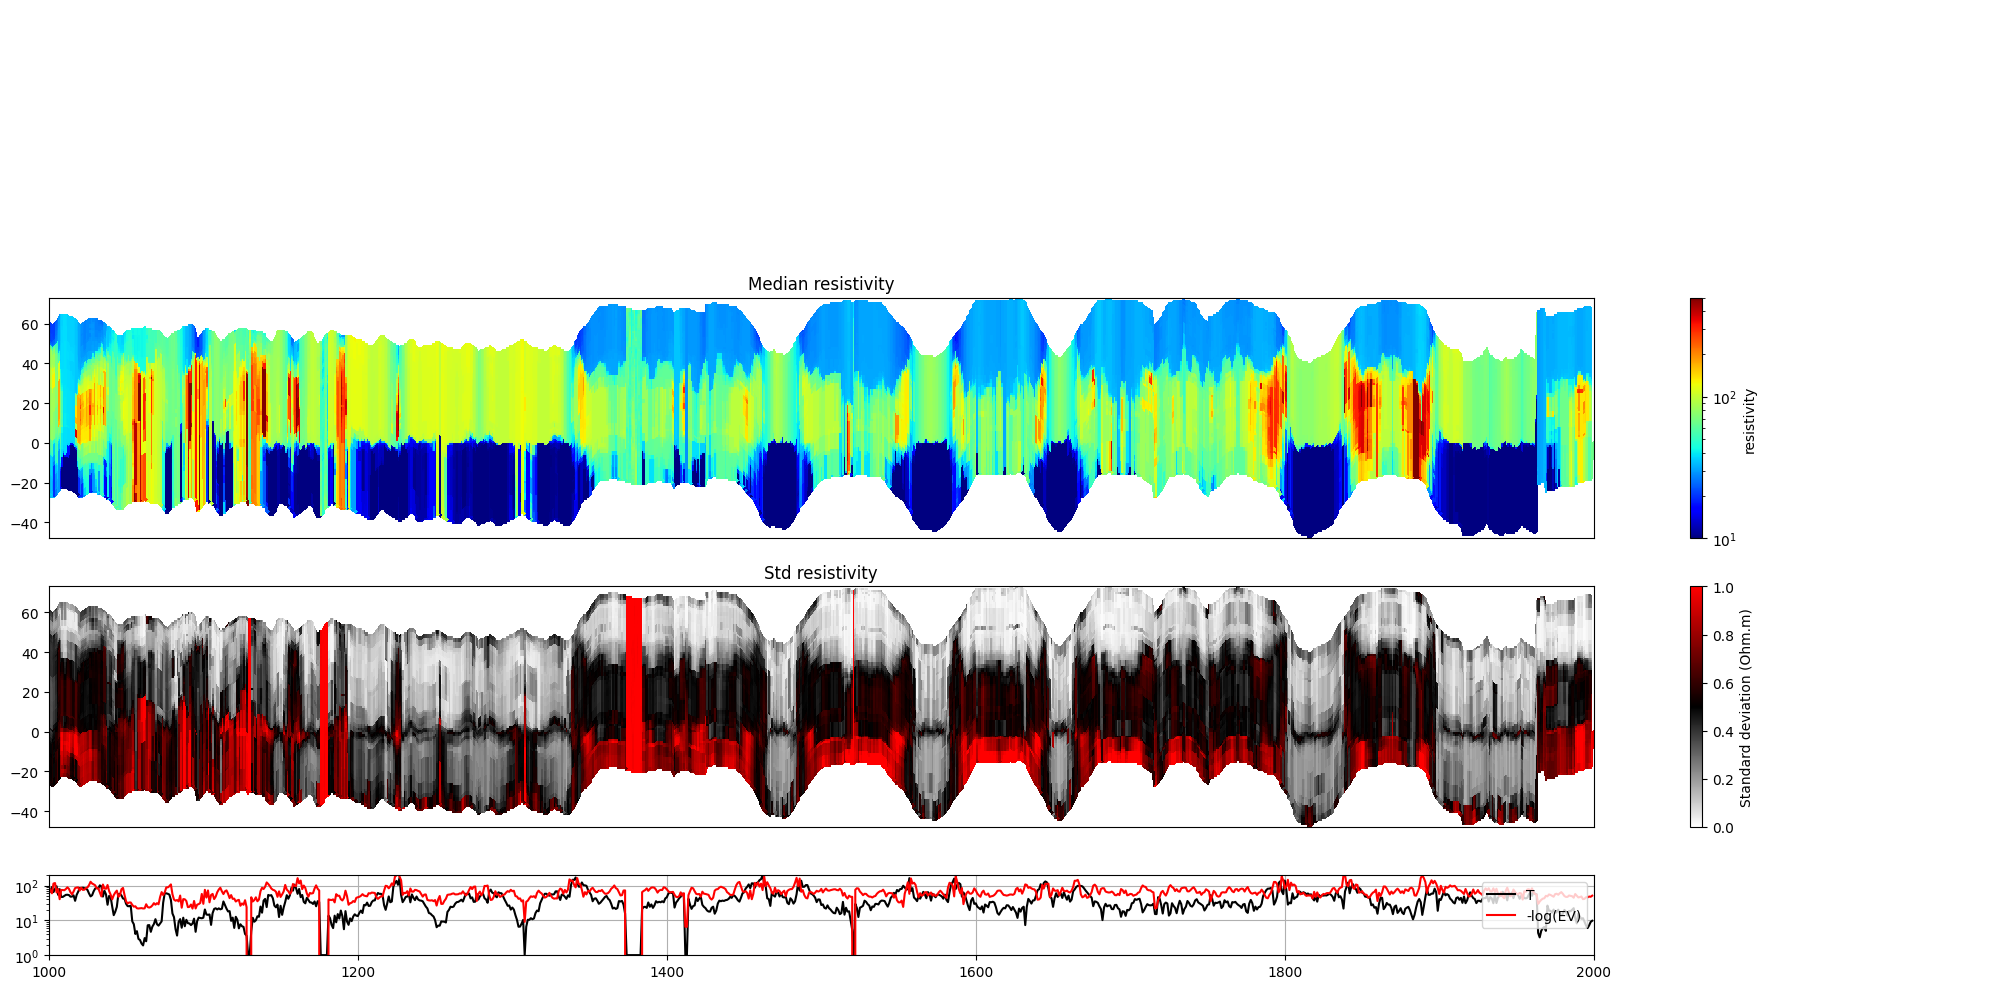

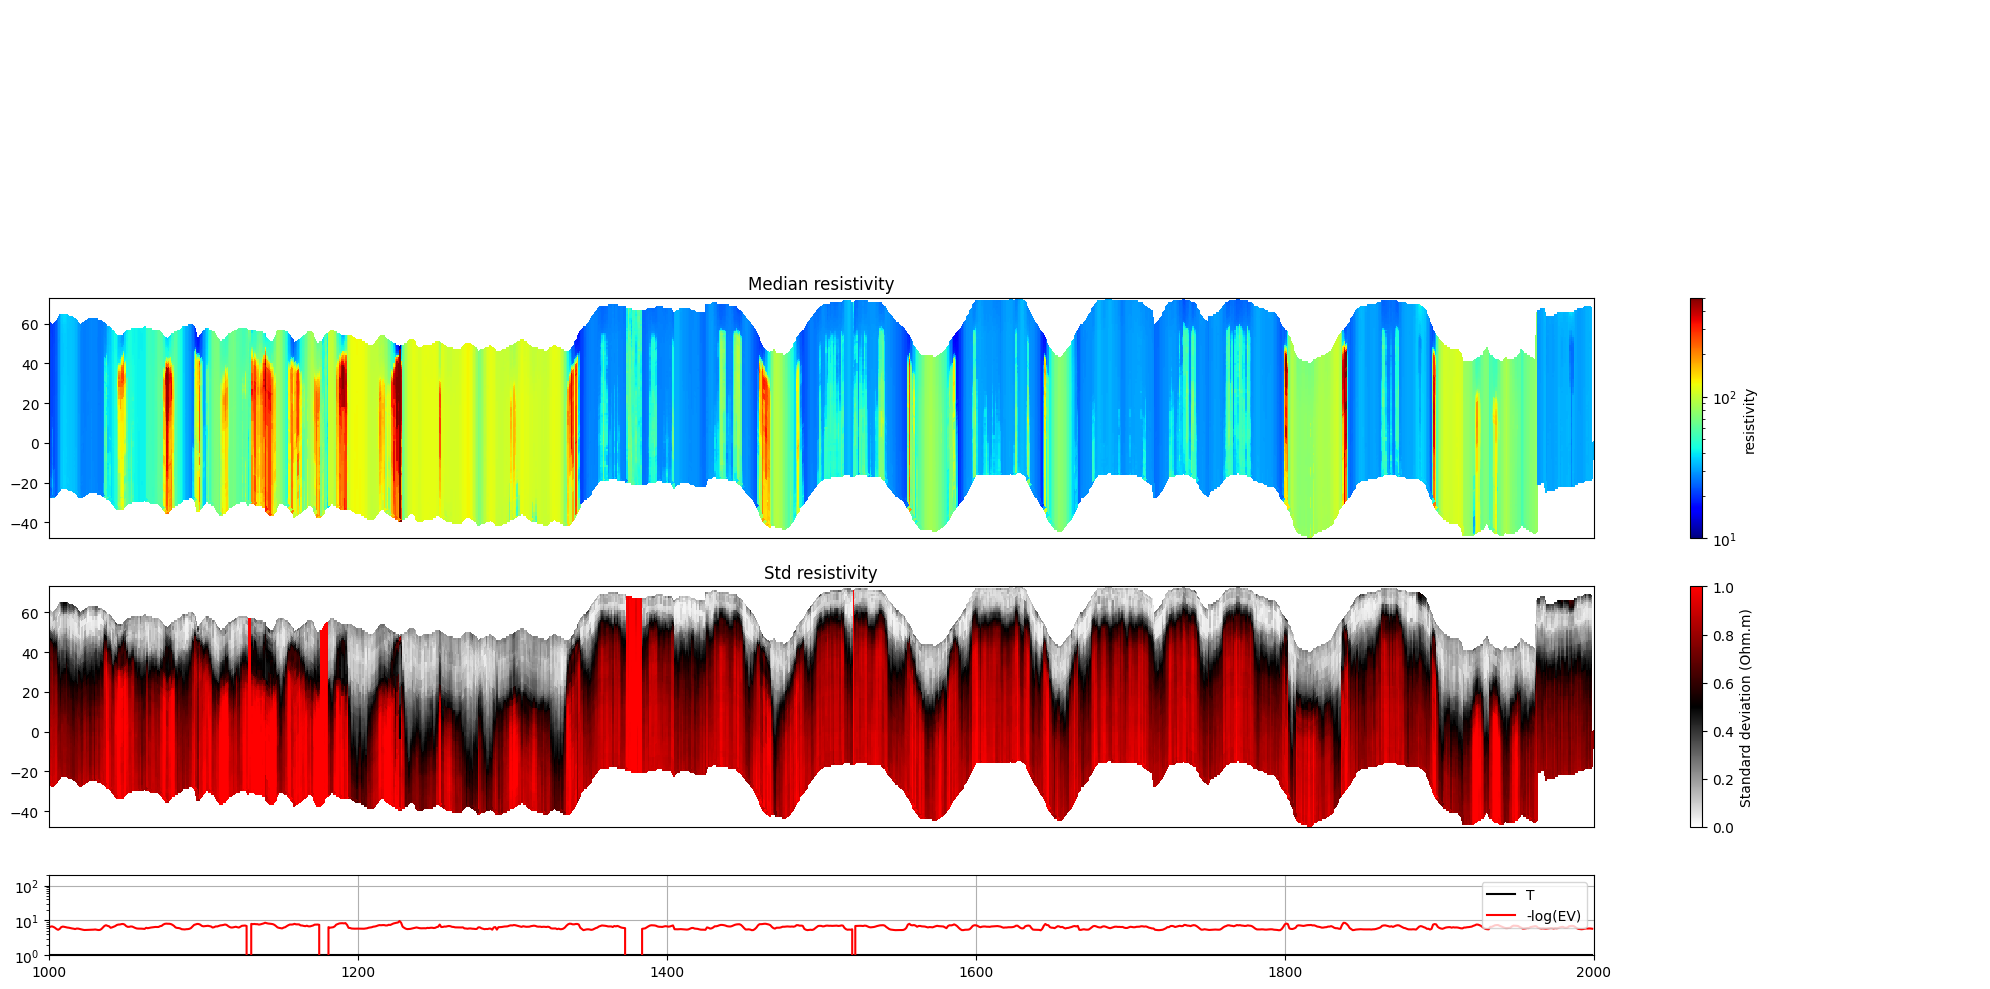

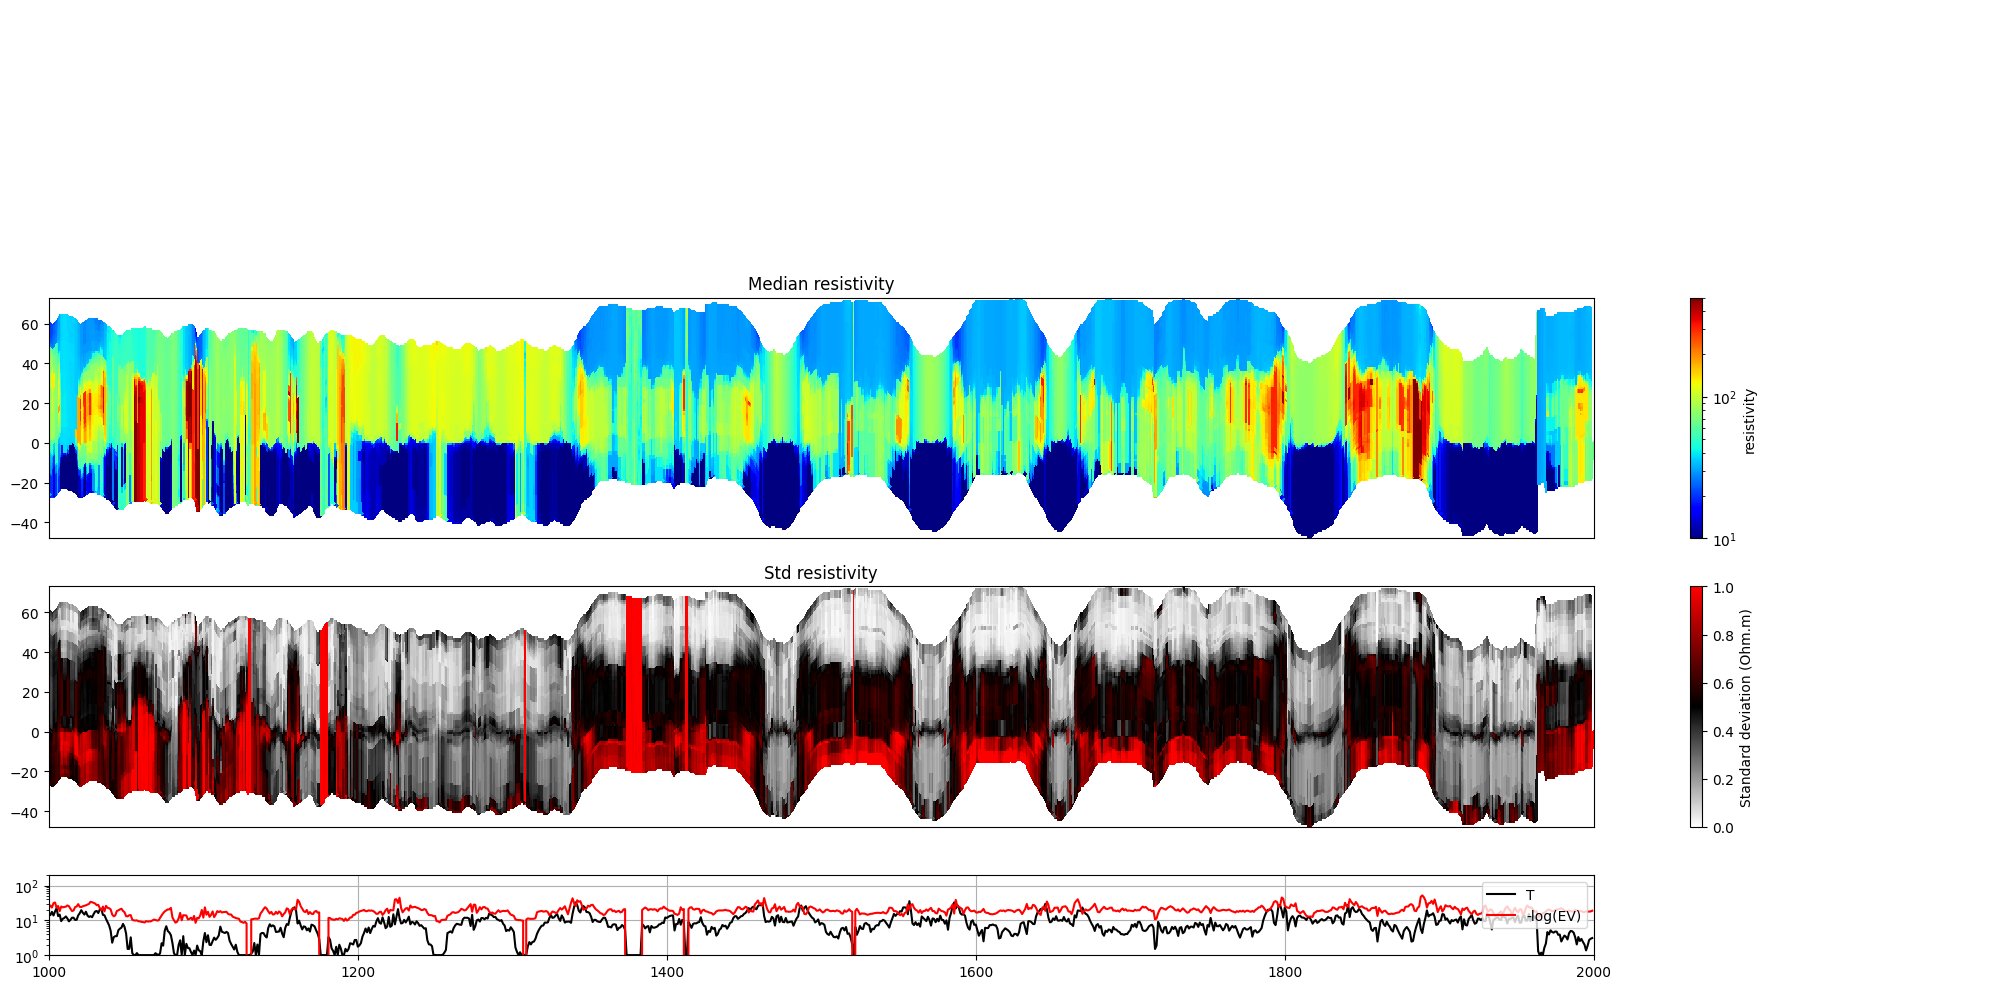

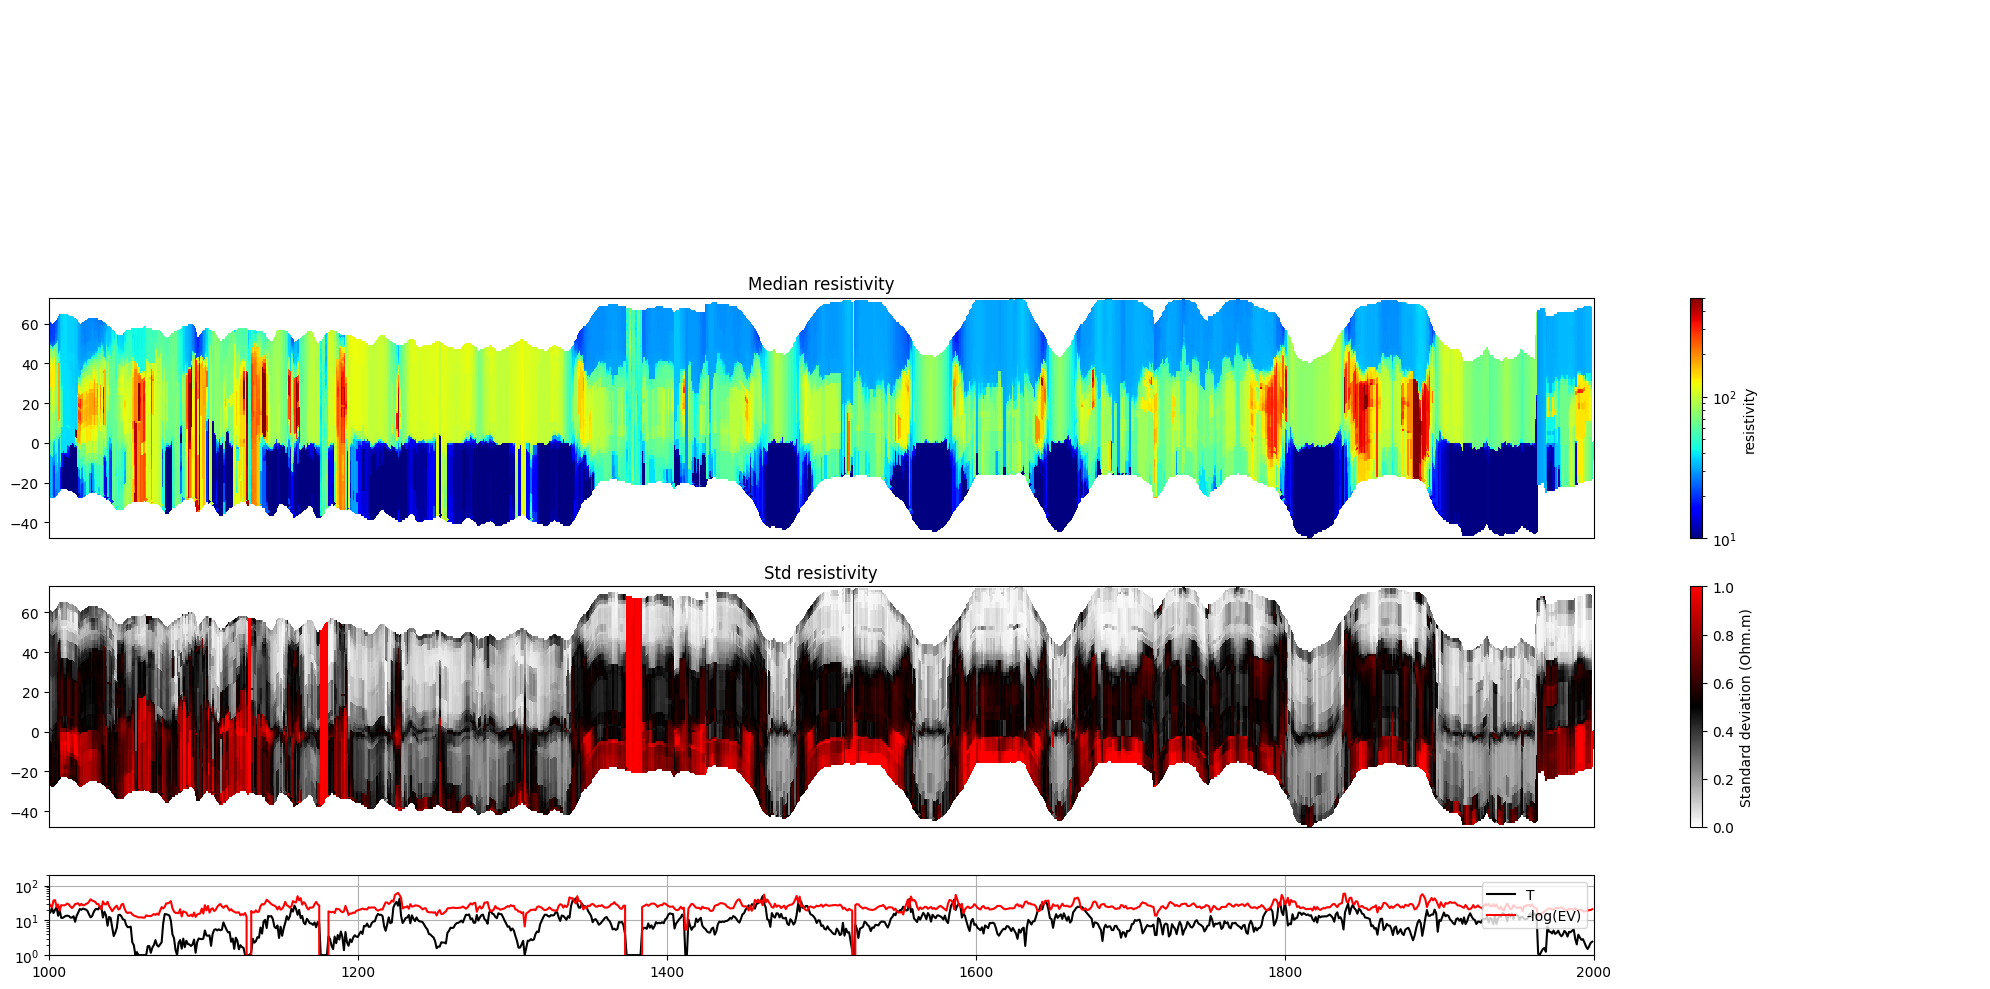

In [12]:
for f_post_h5 in f_post_arr:
    # % Plot Profiles
    ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1, hardcopy=hardcopy)

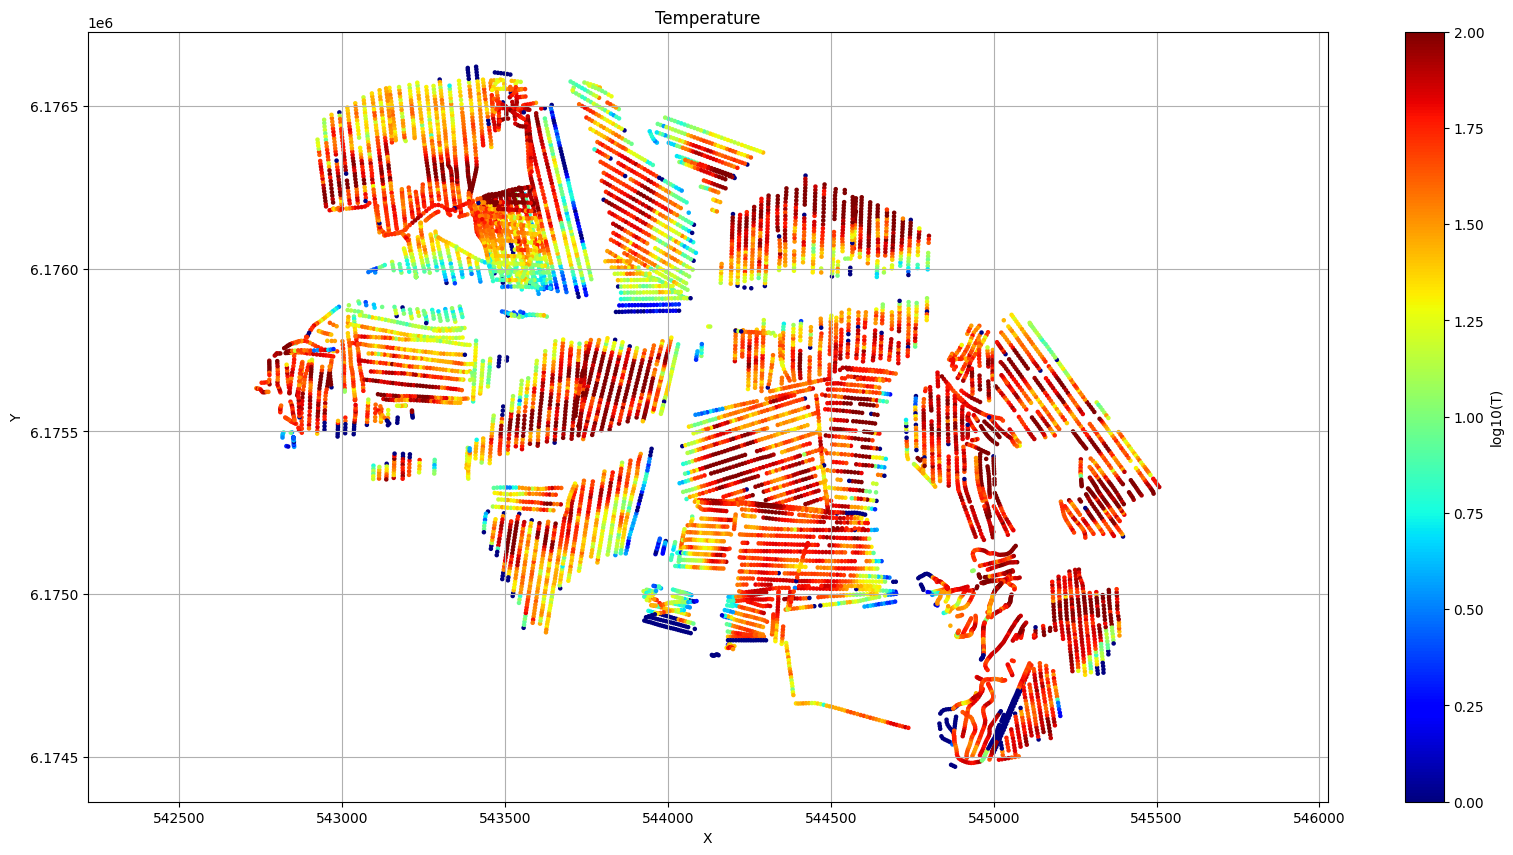

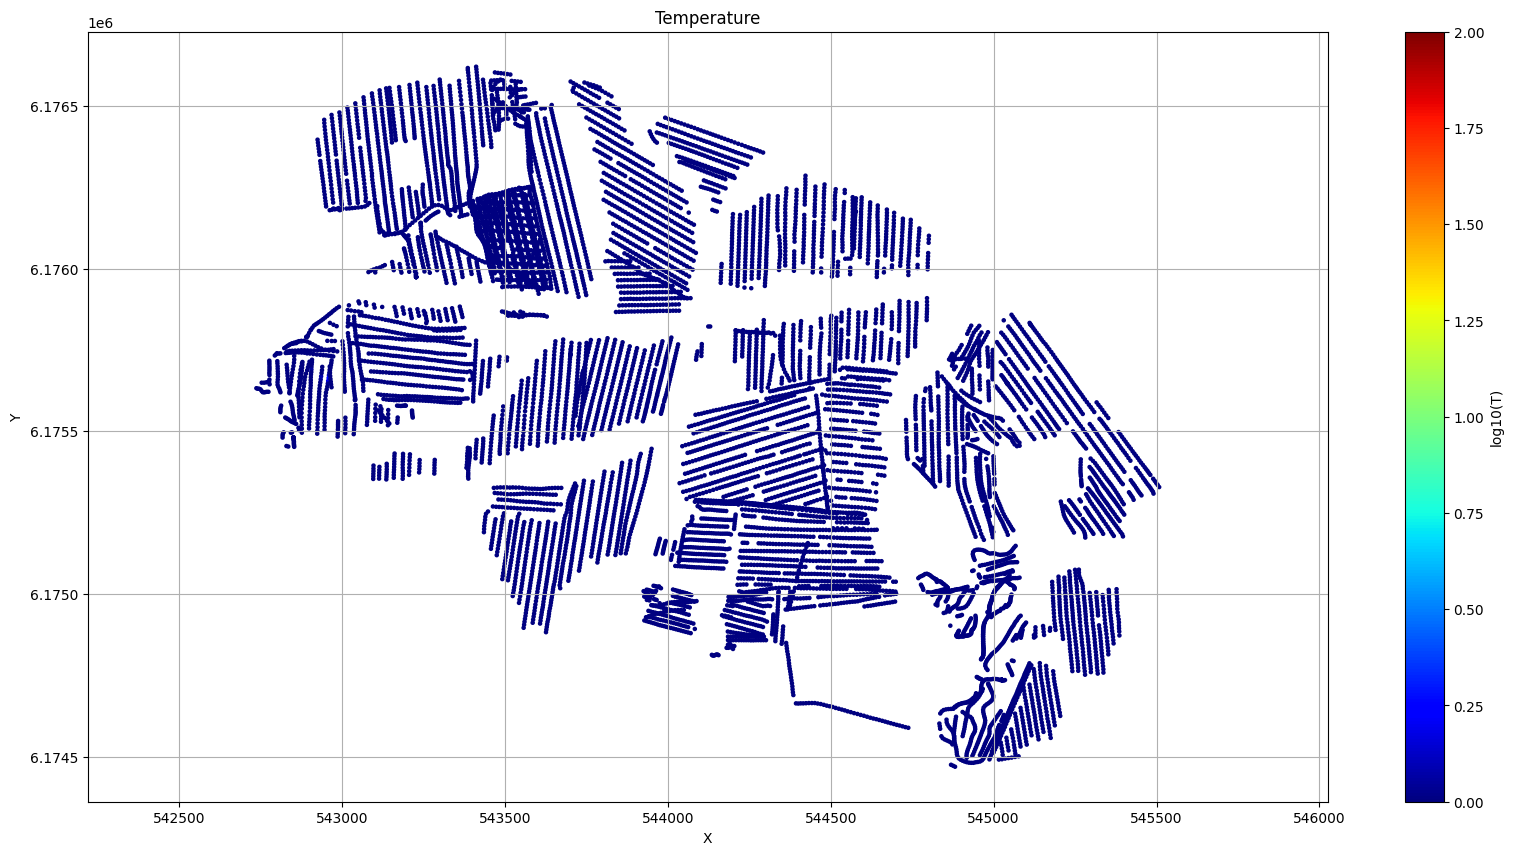

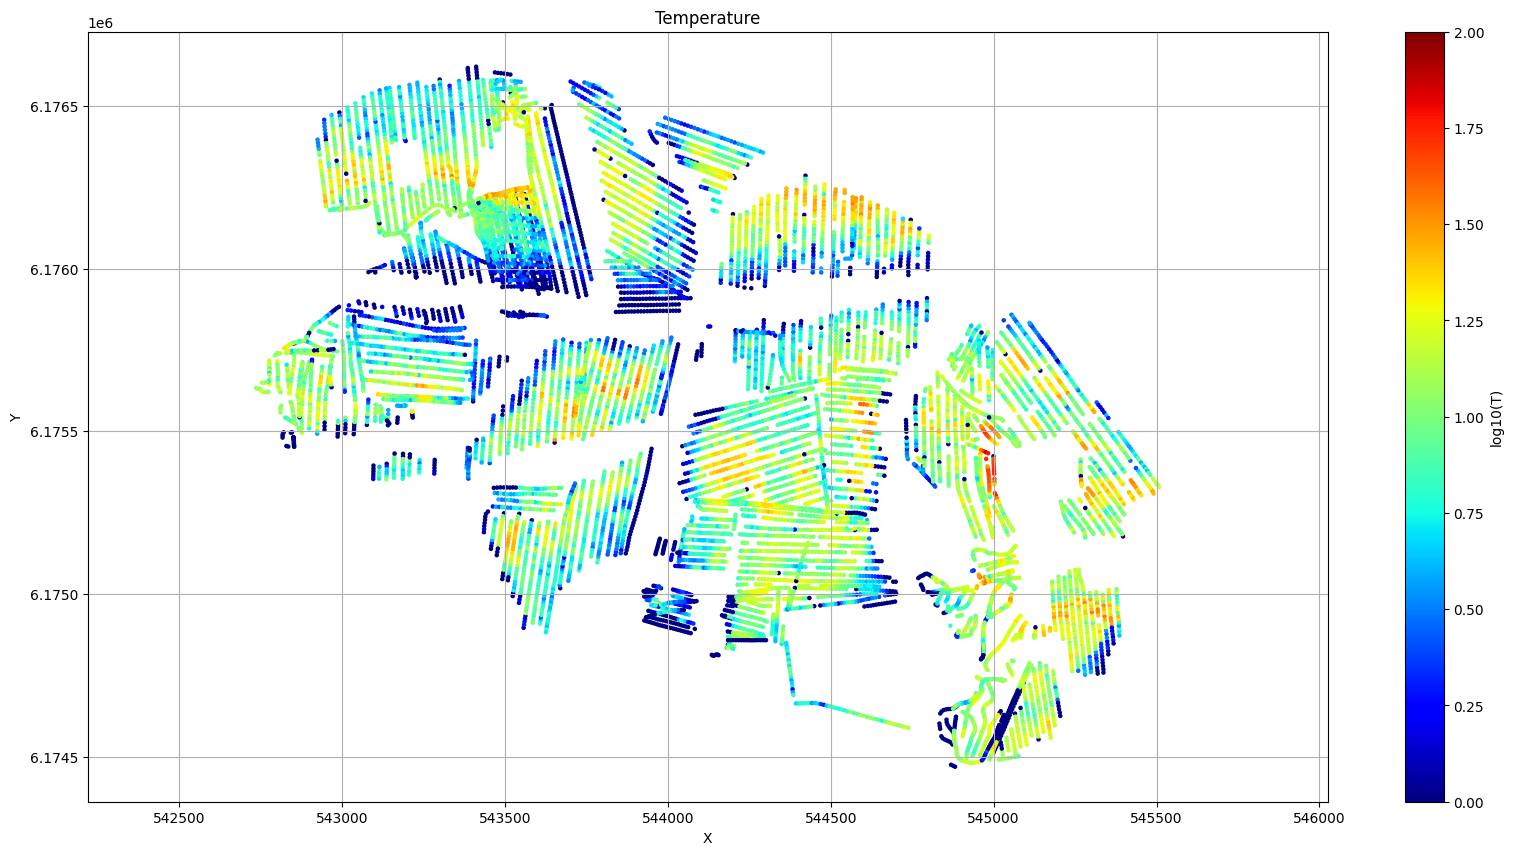

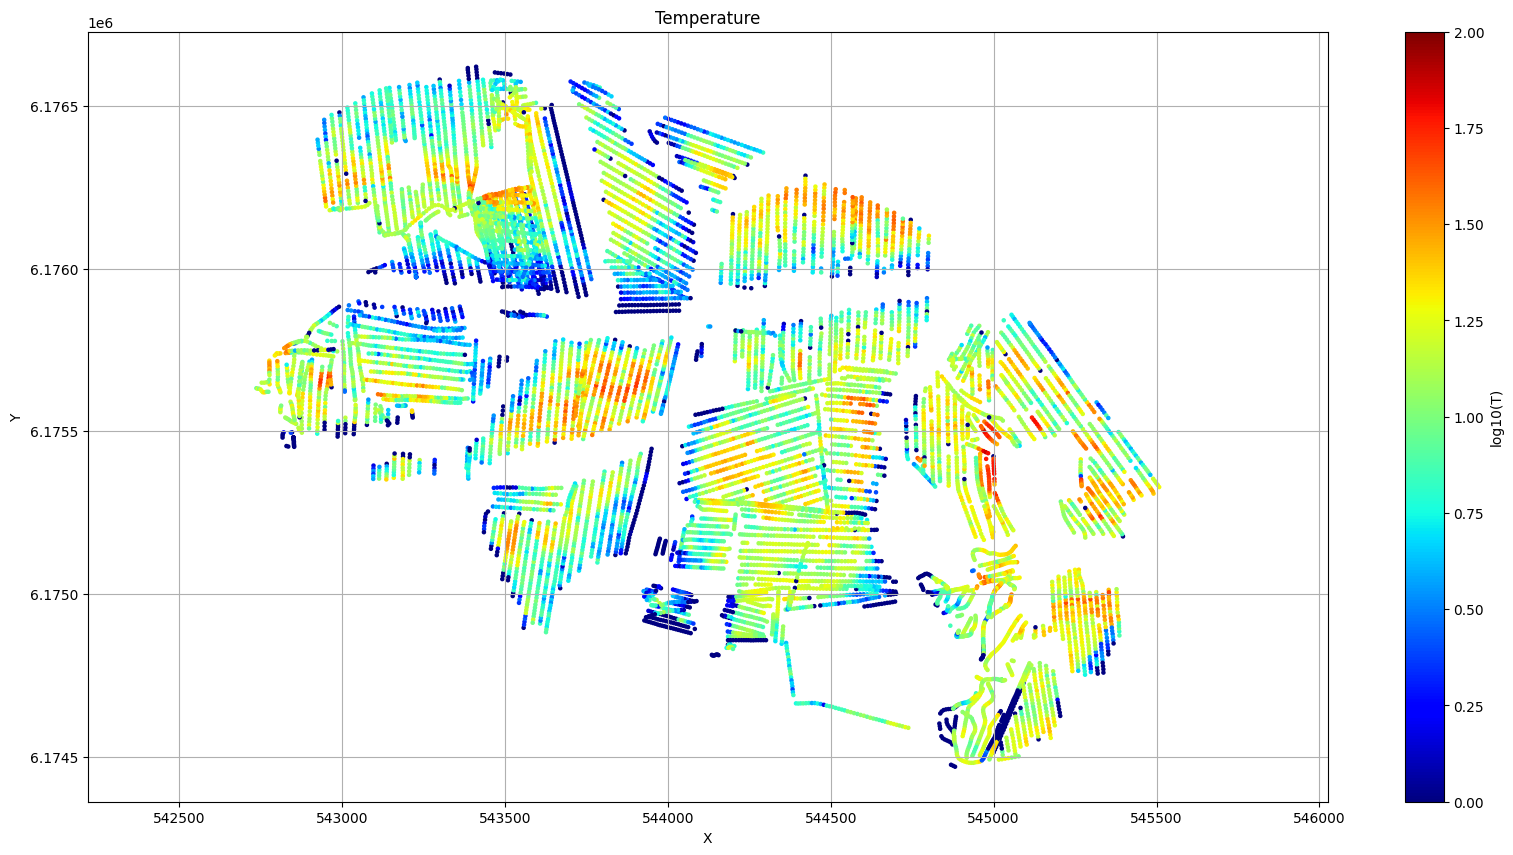

In [13]:
for f_post_h5 in f_post_arr:
    ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
    plt.show()
    #ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

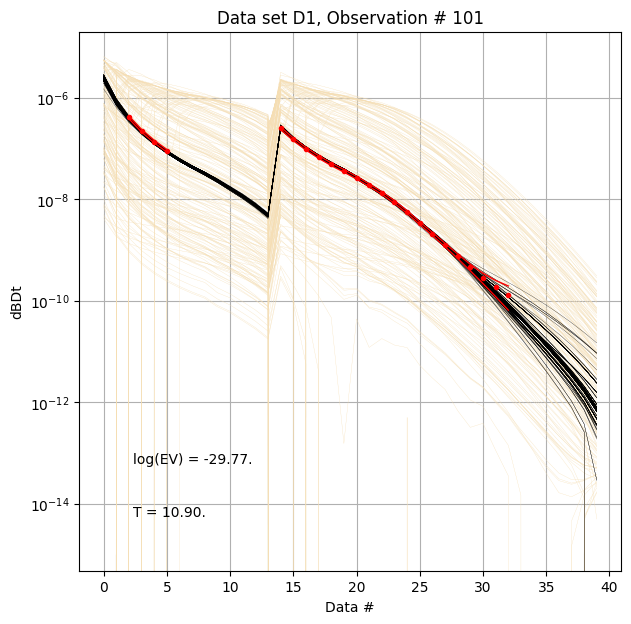

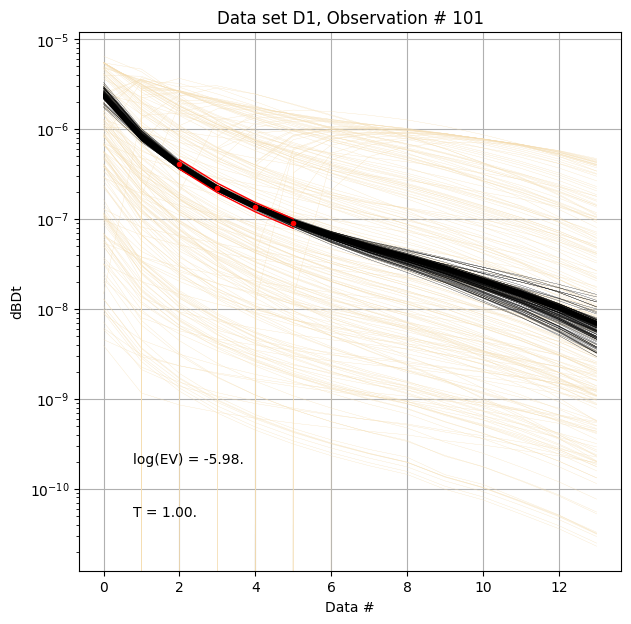

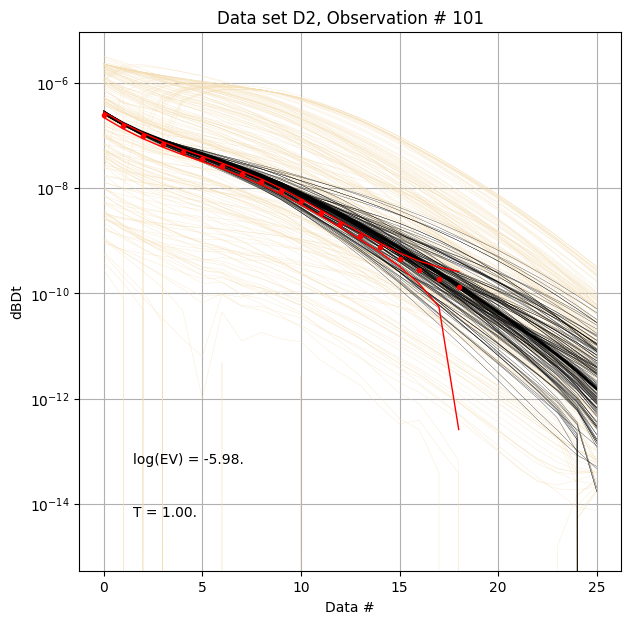

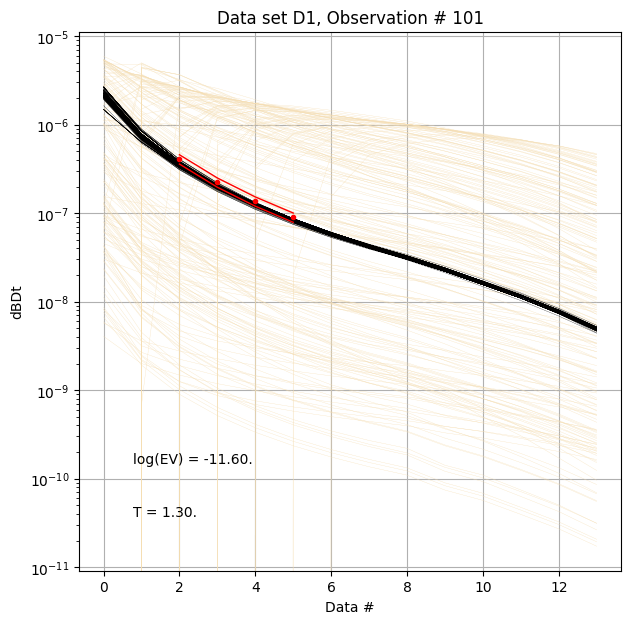

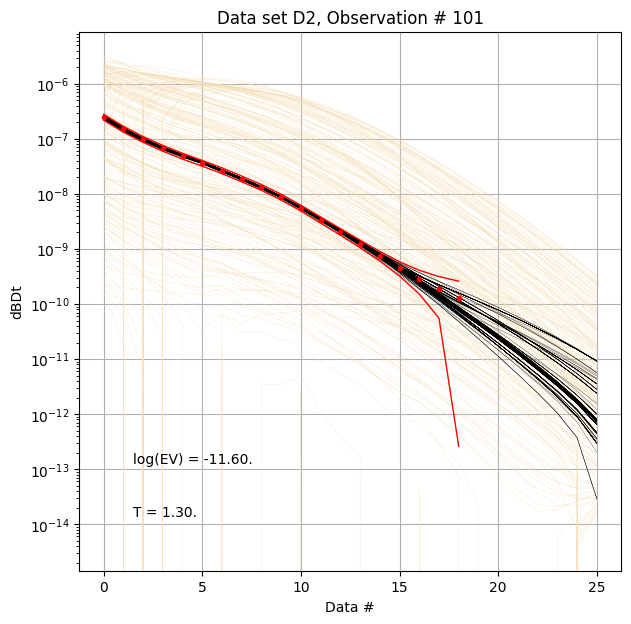

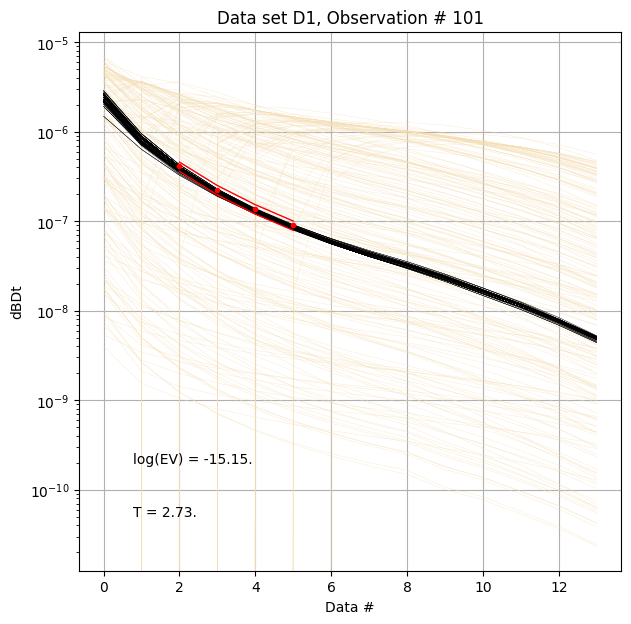

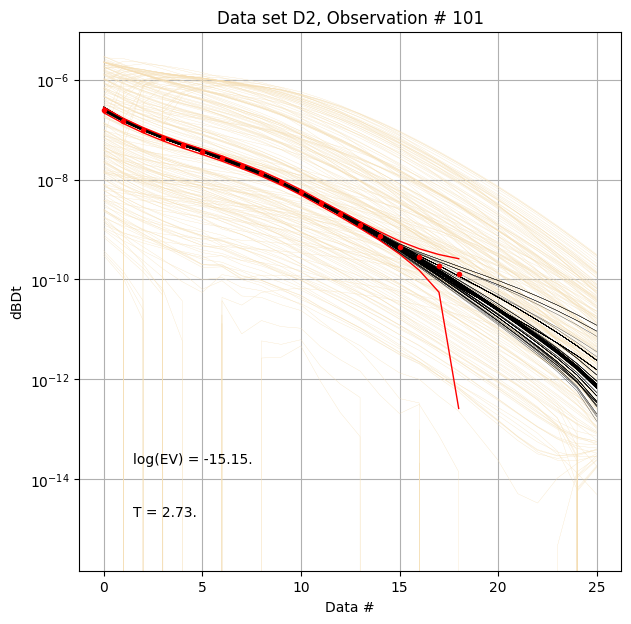

In [14]:
for f_post_h5 in f_post_arr:
    # % Plot prior, posterior, and observed  data
    ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
    #ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)




Text(0, 0.5, 'N_UNIQUE')

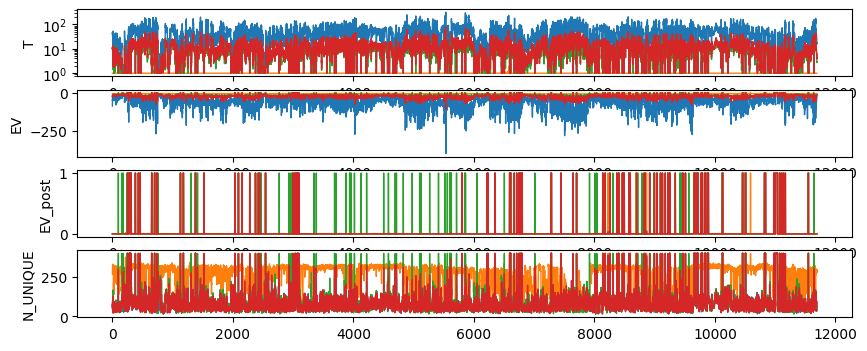

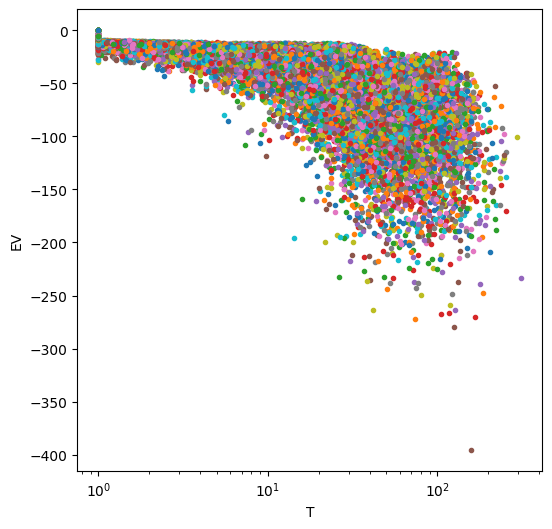

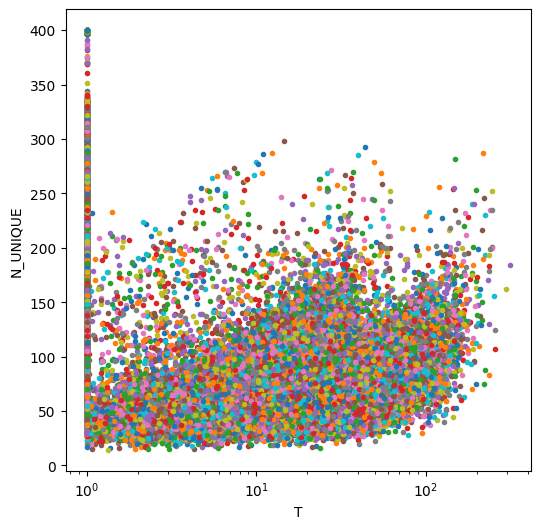

In [15]:
with h5py.File(f_data_h5, 'r') as f:    
    nobs = f['D1/d_obs'].shape[0]
    
ni=len(f_post_arr)

T = np.zeros((ni,nobs))
EV = np.zeros((ni,nobs))
EV_post = np.zeros((ni,nobs))
N_UNIQUE = np.zeros((ni,nobs))

i=-1
for f_post_h5 in f_post_arr:
    with h5py.File(f_post_h5, 'r') as f:
        i=i+1
        T[i] = f['/T'][:]
        EV[i] = f['/EV'][:]
        N_UNIQUE[i] = f['/N_UNIQUE'][:]
        EV_post[i] = f['/EV_post'][:]
    

fig, ax = plt.subplots(4,1,figsize=(10,4))
ax[0].semilogy(T.T,'-', linewidth=1)
ax[0].set_ylabel('T')
ax[1].plot(EV.T,'-', linewidth=1)
ax[1].set_ylabel('EV')
ax[2].plot(EV_post.T,'-', linewidth=1)
ax[2].set_ylabel('EV_post')
ax[3].plot(N_UNIQUE.T,'-', linewidth=1)
ax[3].set_ylabel('N_UNIQUE')

fig=plt.figure(figsize=(6,6))
plt.semilogx(T,EV,'.')
plt.xlabel('T')
plt.ylabel('EV')


fig=plt.figure(figsize=(6,6))
plt.semilogx(T,N_UNIQUE,'.')
plt.xlabel('T')
plt.ylabel('N_UNIQUE')



In [16]:
#ig.post_to_csv(f_post_h5)